# Formulating Recommendation System

## Developing attribute pairing weights

The recommendation system works through developing a dictionary with all the combinations of attributes that were predicted for the images within the Consumer item sub dataset which formulates another part of the deepfashion dataset. 
The dataset used was different from the one trained upon, since it was intended that the predictions were made on images the model had never referenced to before to prevent biasing of the results since it was trained on individual pieces of clothing for the model. 

Eventually integrate content based influence by the user through the use having their own matrix, when they reject recommended outfits, the combinations toward the tyles are decreased.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from fastai import *
from fastai.vision import *
np.random.seed(42)
torch.cuda.set_device(0)

In [2]:
def process_folders():
    with open('./Eval/list_eval_partition.txt', 'r') as eval_partition_file:
        return [('./Img/' + line2.split(' ')[0]) for line2 in [line.rstrip('\n') for line in eval_partition_file][2:]]
images = process_folders()

./Img/img/Sheer_Pleated-Front_Blouse/img_00000006.jpg


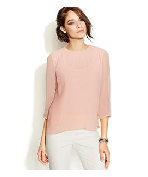

In [3]:
predict_img_path = images[5]
show_image(open_image(predict_img_path))
learn = load_learner('./Img/', 'shape-resnet50-size150-fr5-unfr4.pkl')
# texture classes = ['abstract', 'abstract chevron', 'abstract chevron print', 'abstract diamond', 'abstract floral', 'abstract floral print', 'abstract geo', 'abstract geo print', 'abstract paisley', 'abstract pattern', 'abstract print', 'abstract printed', 'abstract stripe', 'animal', 'animal print', 'bandana', 'bandana print', 'baroque', 'baroque print', 'bird', 'bird print', 'botanical', 'botanical print', 'boxy striped', 'breton', 'breton stripe', 'brushstroke', 'brushstroke print', 'butterfly', 'butterfly print', 'camo', 'camouflage', 'checked', 'checkered', 'cheetah', 'chevron', 'chevron print', 'chiffon floral', 'circle', 'clashist', 'classic striped', 'colorblock', 'colorblocked', 'crochet floral', 'daisy', 'daisy print', 'diamond', 'diamond print', 'ditsy', 'ditsy floral', 'ditsy floral print', 'dot', 'dots', 'dotted', 'embroidered floral', 'floral', 'floral flutter', 'floral paisley', 'floral pattern', 'floral print', 'floral textured', 'floral-embroidered', 'flower', 'foil', 'folk', 'folk print', 'geo', 'geo pattern', 'geo print', 'geo stripe', 'giraffe', 'giraffe print', 'graphic', 'grid', 'grid print', 'heart', 'heart print', 'heathered stripe', 'houndstooth', 'ikat', 'ikat print', 'kaleidoscope', 'kaleidoscope print', 'knit stripe', 'knit striped', 'leaf', 'leaf print', 'leave', 'leopard', 'leopard print', 'linen', 'linen-blend', 'mandala', 'mandala print', 'marble', 'marble print', 'marled', 'marled stripe', 'medallion', 'medallion print', 'mixed', 'mixed print', 'mixed stripe', 'mosaic', 'mosaic print', 'multi-stripe', 'nautical', 'nautical stripe', 'nautical striped', 'ombre', 'ornate', 'ornate paisley', 'ornate print', 'paint', 'paint splatter', 'painted', 'paisley', 'paisley print', 'palm', 'palm print', 'palm springs', 'palm tree', 'pattern', 'patterned', 'pinstripe', 'pinstriped', 'polka dot', 'pom-pom', 'print', 'print shirt', 'print woven', 'printed', 'ribbed stripe', 'ringer', 'rugby stripe', 'rugby striped', 'sophisticated', 'southwestern', 'southwestern-inspired', 'southwestern-patterned', 'southwestern-print', 'speckled', 'splatter', 'spotted', 'stripe', 'striped', 'stripes', 'structured', 'tonal', 'tribal', 'tribal-inspired', 'two-tone', 'varsity-striped', 'watercolor', 'zig', 'zigzag']
# classes = ['Blazer', 'Blouse', 'Bomber', 'Button-Down', 'Cardigan', 'Chinos', 'Coat', 'Culottes', 'Cutoffs', 'Dress', 'Flannel', 'Henley', 'Hoodie', 'Jacket', 'Jeans', 'Jeggings', 'Jersey', 'Joggers', 'Jumpsuit', 'Kimono', 'Leggings', 'Parka', 'Poncho', 'Romper', 'Shorts', 'Skirt', 'Sweater', 'Sweatpants', 'Sweatshorts', 'Tank', 'Tee', 'Top', 'Trunks']
# shapeclasses = ['a-line', 'ankle', 'asymmetric', 'asymmetrical', 'baja', 'bandage', 'beaded shift', 'bermuda', 'bib', 'big', 'bodycon', 'bodycon midi', 'box', 'box pleat', 'box-pleated', 'boxy', 'boxy crop', 'boxy knit', 'boxy lace', 'bustier', 'caged', 'cami', 'cami crop', 'cami maxi', 'capri', 'cargo', 'chiffon maxi', 'chiffon paneled', 'chiffon pleated', 'chiffon shift', 'chiffon-paneled', 'classic fit', 'classic skinny', 'combo', 'combo maxi', 'cover-up', 'cozy', 'crepe shift', 'crochet crop', 'crochet maxi', 'crochet-paneled', 'crop', 'cropped', 'cropped knit', 'cut', 'cutoff', 'cutout', 'cutout maxi', 'cutout sheath', 'denim pencil', 'denim shift', 'denim skater', 'distressed low-rise', 'distressed mid-rise', 'distressed skinny', 'drapey', 'embroidered fit', 'embroidered gauze peasant', 'embroidered maxi', 'embroidered peasant', 'embroidered shift', 'eyelet fit', 'faux leather mini', 'faux leather moto', 'faux leather paneled', 'faux leather pencil', 'faux leather skater', 'faux leather varsity', 'faux leather-paneled', 'faux-wrap', 'fit', 'fit flare', 'fit skinny', 'fitted', 'flare', 'flared', 'floral lace mini', 'floral lace sheath', 'floral lace skater', 'floral maxi', 'floral midi', 'floral mini', 'floral peasant', 'floral pleated', 'floral print skater', 'floral shift', 'floral skater', 'flounce maxi', 'flowy', 'fold-over', 'foldover', 'gaucho', 'gauze maxi', 'gauze peasant', 'graphic muscle', 'harem', 'high-low', 'high-rise', 'high-rise skinny', 'knee-length', 'knit longline', 'knit maxi', 'knit mini', 'knit pencil', 'knit skater', 'knit trapeze', 'kurt', 'lace maxi', 'lace midi', 'lace mini', 'lace pencil', 'lace sheath', 'lace shift', 'lace skater', 'leather mini', 'leather moto', 'leather pencil', 'leather skater', 'leather varsity', 'longline', 'longline shirt', 'low-rise', 'low-rise skinny', 'maxi', 'medium', 'mid rise', 'mid rise skinny', 'mid-rise', 'mid-rise skinny', 'midi', 'mini', 'moto', 'muscle', 'overlay sheath', 'oversized', 'peasant', 'pencil', 'pleated skater', 'polo', 'popover', 'print shift', 'print skater', 'print smock', 'print smocked', 'print tulip', 'puffer', 'pullover', 'raw', 'raw-cut', 'rise', 'rise skinny', 'rose skater', 'round', 'scuba skater', 'sheath', 'shift', 'shirt', 'skater', 'skinny', 'skinny stretch', 'skort', 'slim', 'slip', 'slouchy', 'smock', 'smocked', 'square', 'straight-leg', 'striped trapeze', 'swing', 'trapeze', 'trouser', 'tube', 'tulip', 'tunic', 'vertical', 'wide-leg', 'windbreaker', 'windowpane', 'wrap']
# partsclasses = ['arrow collar', 'asymmetrical hem', 'back bow', 'back cutout', 'back knit', 'back lace', 'back striped', 'backless', 'batwing', 'beaded collar', 'bell', 'bell-sleeve', 'belted', 'belted chiffon', 'belted floral', 'belted floral print', 'belted lace', 'belted maxi', 'belted plaid', 'boat neck', 'bow', 'bow-back', 'bow-front', 'boxy pocket', 'braided', 'button', 'button-front', 'buttoned', 'cap-sleeve', 'chiffon surplice', 'cinched', 'classic crew', 'classic crew neck', 'classic pocket', 'classic v-neck', 'collar', 'collar lace', 'collared', 'collarless', 'collarless faux', 'colorblock pocket', 'contrast', 'contrast trim', 'contrast-trimmed', 'convertible', 'cowl', 'cowl neck', 'crew', 'crew neck', 'crisscross', 'crisscross-back', 'crochet fringe', 'crochet-trimmed', 'cross-back', 'crossback', 'cuffed', 'cuffed-sleeve', 'curved', 'curved hem', 'cutout-back', 'deep v-neck', 'deep-v', 'dolman', 'dolman sleeve', 'dolman-sleeve', 'dolphin', 'dolphin hem', 'double-breasted', 'drape-front', 'draped', 'draped open-front', 'draped shawl', 'draped surplice', 'drawstring', 'drop waist', 'drop-sleeve', 'drop-waist', 'dropped', 'elephant', 'elephant print', 'faux leather-trimmed', 'fitted v-neck', 'flat', 'flat front', 'flat-front', 'floral print strapless', 'floral print surplice', 'floral surplice', 'flounce', 'flounced', 'fluted', 'flutter', 'flutter sleeve', 'flutter-sleeve', 'fringe', 'fringed', 'gathered waistline', 'graphic racerback', 'heathered v-neck', 'hem', 'high-neck', 'high-slit', 'high-slit maxi', 'high-waist', 'high-waisted', 'hood', 'hooded', 'hooded maxi', 'hooded utility', 'illusion', 'illusion neckline', 'kangaroo', 'kangaroo pocket', 'keyhole', 'knit open', 'knit pocket', 'knit raglan', 'knit shawl', 'knit v-neck', 'knotted', 'lace peplum', 'lace sleeve', 'lace trim', 'lace-trim', 'lace-trimmed', 'lace-up', 'ladder-back', 'lapel', 'leather peplum', 'leather trimmed', 'leather-trimmed', 'long sleeve', 'long-sleeve', 'long-sleeved', 'm-slit', 'm-slit maxi', 'mesh racerback', 'mesh-trimmed', 'mock', 'mock neck', 'mock-neck', 'neck ribbed', 'neck skater', 'neck striped', 'neckline', 'notched collar', 'off-the-shoulder', 'one-button', 'one-shoulder', 'open-back', 'open-front', 'open-knit', 'open-shoulder', 'peplum', 'pin', 'pocket', 'print racerback', 'print strapless', 'print strappy', 'print surplice', 'print v-neck', 'racerback', 'raglan', 'raglan sleeve', 'ruffle trim', 'scallop', 'scalloped', 'scoop', 'scoop-neck', 'self-tie', 'shawl', 'shoulder', 'side slit', 'side-slit', 'single-button', 'sleeve', 'sleeveless', 'slit', 'split', 'split-back', 'split-neck', 'strap', 'strapless', 'strapless tribal', 'strappy', 'striped v-neck', 'surplice', 'suspender', 't-back', 'tassel', 'tasseled', 'tie-back', 'tie-front', 'tie-neck', 'toggle', 'topstitched', 'trim', 'trimmed', 'tulip-back', 'turtle-neck', 'twist-front', 'twisted', 'two-button', 'v-back', 'v-cut', 'v-neck', 'vent', 'vented hem', 'y-back', 'zip', 'zip-front', 'zip-pocket', 'zip-up', 'zipped', 'zipper', 'zippered']
classes = ['acid', 'acid wash', 'applique', 'bead', 'beaded', 'beaded chiffon', 'beaded sheer', 'bejeweled', 'bleach', 'bleached', 'bleached denim', 'brocade', 'burnout', 'cable', 'cable knit', 'cable-knit', 'canvas', 'chambray', 'chambray drawstring', 'chenille', 'chiffon', 'chiffon lace', 'chiffon layered', 'chiffon shirt', 'chino', 'chunky', 'chunky knit', 'classic cotton', 'classic denim', 'classic knit', 'classic woven', 'clean', 'clean wash', 'cloud', 'cloud wash', 'coated', 'corduroy', 'cotton', 'cotton drawstring', 'cotton knit', 'cotton-blend', 'crepe', 'crepe woven', 'crinkled', 'crochet', 'crochet embroidered', 'crochet knit', 'crochet lace', 'crochet mesh', 'crochet overlay', 'crocheted', 'crocheted lace', 'cuffed denim', 'cutout lace', 'damask', 'denim', 'denim drawstring', 'denim shirt', 'denim utility', 'dip-dye', 'dip-dyed', 'distressed', 'dye', 'elasticized', 'embellished', 'embroidered', 'embroidered gauze', 'embroidered lace', 'embroidered mesh', 'embroidered woven', 'embroidery', 'eyelash', 'eyelash knit', 'eyelash lace', 'eyelet', 'faded', 'fair', 'fair isle', 'faux', 'faux fur', 'faux leather', 'faux shearling', 'faux suede', 'feather', 'floral knit', 'floral lace', 'floral mesh', 'foulard', 'frayed', 'french', 'french terry', 'fur', 'fuzzy', 'fuzzy knit', 'gauze', 'gauzy', 'gem', 'georgette', 'gingham', 'glass', 'glitter', 'heathered', 'heathered knit', 'herringbone', 'jacquard', 'knit', 'knit lace', 'lace', 'lace layered', 'lace mesh', 'lace overlay', 'lace panel', 'lace paneled', 'lace pleated', 'lace print', 'lace sheer', 'lace-paneled', 'lacy', 'lattice', 'layered', 'leather', 'leather paneled', 'leather quilted', 'leather-paneled', 'led', 'loop', 'loose', 'loose-knit', 'mesh', 'mesh overlay', 'mesh panel', 'mesh paneled', 'mesh-paneled', 'metallic', 'mineral', 'mineral wash', 'neon', 'neoprene', 'nets', 'netted', 'nylon', 'oil', 'organza', 'origami', 'overlay', 'panel', 'paneled', 'patched', 'patchwork', 'perforated', 'pima', 'pintuck', 'pintuck pleated', 'pintucked', 'plaid', 'plaid shirt', 'pleat', 'pleated', 'pleated woven', 'pointelle', 'ponte', 'print satin', 'print scuba', 'purl', 'quilted', 'rhinestone', 'rib', 'rib-knit', 'ribbed', 'ribbed-knit', 'ripped', 'ruched', 'ruffle', 'ruffled', 'sateen', 'satin', 'scuba', 'seam', 'seamless', 'seersucker', 'semi-sheer', 'sequin', 'sequined', 'shaggy', 'shearling', 'sheer', 'sheer-paneled', 'shirred', 'shredded', 'sleek', 'slick', 'slub', 'slub-knit', 'sparkling', 'stone', 'stone washed', 'stones', 'stretch', 'stretch-knit', 'studded', 'suede', 'tapestry', 'tartan', 'terry', 'textured', 'textured woven', 'tie-dye', 'tiered', 'tile', 'tulle', 'tweed', 'twill', 'velvet', 'velveteen', 'waffle', 'wash', 'washed', 'woven']
print(predict_img_path)

In [4]:
category,classIndex,losses = learn.predict(open_image(predict_img_path))
predictions2 = sorted(zip(classes, map(float, losses)), key=lambda p: p[1], reverse=True)[:2]
predictions2

[('cable-knit', 0.4688734710216522), ('crepe woven', 0.17331689596176147)]

In [5]:
print(images[5])

./Img/img/Sheer_Pleated-Front_Blouse/img_00000006.jpg


In [6]:
predictions = []
imageLen = len(images)
count = 0
for image in images:
    category,classIndex,losses = learn.predict(open_image(image))
    predictions.append(sorted(zip(classes, map(float, losses)), key=lambda p: p[1], reverse=True)[:2])
    count = count + 1

0.00034575516385337217
0.0006915103277067443
0.0010372654915601165
0.0013830206554134887
0.0017287758192668606
0.002074530983120233
0.002420286146973605
0.0027660413108269773
0.0031117964746803497
0.0034575516385337212
0.003803306802387094
0.004149061966240466
0.0044948171300938375
0.00484057229394721
0.005186327457800582
0.005532082621653955
0.005877837785507326
0.0062235929493606994
0.00656934811321407
0.0069151032770674425
0.007260858440920816
0.007606613604774188
0.007952368768627559
0.008298123932480932
0.008643879096334304
0.008989634260187675
0.009335389424041048
0.00968114458789442
0.010026899751747793
0.010372654915601165
0.010718410079454536
0.01106416524330791
0.01140992040716128
0.011755675571014652
0.012101430734868026
0.012447185898721399
0.012792941062574769
0.01313869622642814
0.013484451390281515
0.013830206554134885
0.01417596171798826
0.014521716881841631
0.014867472045695001
0.015213227209548376
0.015558982373401748
0.015904737537255118
0.016250492701108493
0.016596

0.14417990332685618
0.14452565849070956
0.1448714136545629
0.14521716881841631
0.1455629239822697
0.14590867914612304
0.14625443430997642
0.1466001894738298
0.14694594463768315
0.14729169980153653
0.1476374549653899
0.14798321012924326
0.14832896529309664
0.14867472045695002
0.1490204756208034
0.14936623078465677
0.14971198594851015
0.1500577411123635
0.15040349627621688
0.15074925144007026
0.1510950066039236
0.151440761767777
0.15178651693163037
0.15213227209548374
0.15247802725933712
0.1528237824231905
0.15316953758704385
0.15351529275089723
0.1538610479147506
0.15420680307860396
0.15455255824245734
0.15489831340631072
0.1552440685701641
0.15558982373401747
0.15593557889787085
0.1562813340617242
0.15662708922557758
0.15697284438943096
0.1573185995532843
0.1576643547171377
0.15801010988099107
0.15835586504484445
0.15870162020869782
0.1590473753725512
0.15939313053640458
0.15973888570025793
0.1600846408641113
0.1604303960279647
0.16077615119181804
0.16112190635567142
0.1614676615195248

0.29078009280068595
0.2911258479645394
0.2914716031283927
0.2918173582922461
0.29216311345609947
0.29250886861995284
0.29285462378380617
0.2932003789476596
0.293546134111513
0.2938918892753663
0.29423764443921974
0.29458339960307306
0.29492915476692644
0.2952749099307798
0.2956206650946332
0.2959664202584865
0.29631217542233995
0.2966579305861933
0.29700368575004665
0.29734944091390003
0.2976951960777534
0.2980409512416068
0.29838670640546017
0.29873246156931355
0.29907821673316687
0.2994239718970203
0.2997697270608736
0.300115482224727
0.3004612373885804
0.30080699255243376
0.30115274771628714
0.3014985028801405
0.3018442580439939
0.3021900132078472
0.30253576837170065
0.302881523535554
0.30322727869940735
0.30357303386326073
0.3039187890271141
0.3042645441909675
0.30461029935482087
0.30495605451867425
0.30530180968252757
0.305647564846381
0.3059933200102343
0.3063390751740877
0.3066848303379411
0.30703058550179446
0.30737634066564784
0.3077220958295012
0.3080678509933546
0.3084136061

0.439454813257636
0.4398005684214894
0.4401463235853427
0.4404920787491961
0.4408378339130495
0.4411835890769028
0.4415293442407563
0.4418750994046096
0.442220854568463
0.4425666097323163
0.4429123648961697
0.4432581200600231
0.4436038752238765
0.44394963038772983
0.4442953855515832
0.4446411407154366
0.4449868958792899
0.4453326510431433
0.4456784062069967
0.4460241613708501
0.4463699165347034
0.4467156716985568
0.4470614268624102
0.4474071820262635
0.44775293719011694
0.4480986923539703
0.4484444475178237
0.448790202681677
0.4491359578455304
0.4494817130093838
0.4498274681732372
0.45017322333709053
0.4505189785009439
0.4508647336647973
0.4512104888286506
0.451556243992504
0.4519019991563574
0.4522477543202108
0.4525935094840641
0.4529392646479175
0.4532850198117709
0.4536307749756243
0.45397653013947764
0.454322285303331
0.4546680404671844
0.4550137956310377
0.4553595507948911
0.45570530595874453
0.4560510611225979
0.45639681628645123
0.4567425714503046
0.457088326614158
0.4574340817

0.5891667992061461
0.5895125543699995
0.5898583095338529
0.5902040646977063
0.5905498198615596
0.590895575025413
0.5912413301892664
0.5915870853531198
0.591932840516973
0.5922785956808265
0.5926243508446799
0.5929701060085333
0.5933158611723865
0.5936616163362399
0.5940073715000933
0.5943531266639468
0.5946988818278001
0.5950446369916534
0.5953903921555068
0.5957361473193602
0.5960819024832136
0.596427657647067
0.5967734128109203
0.5971191679747737
0.5974649231386271
0.5978106783024805
0.5981564334663337
0.5985021886301872
0.5988479437940406
0.599193698957894
0.5995394541217473
0.5998852092856006
0.600230964449454
0.6005767196133075
0.6009224747771608
0.6012682299410141
0.6016139851048675
0.6019597402687209
0.6023054954325743
0.6026512505964277
0.602997005760281
0.6033427609241344
0.6036885160879878
0.6040342712518412
0.6043800264156944
0.6047257815795479
0.6050715367434013
0.6054172919072547
0.605763047071108
0.6061088022349613
0.6064545573988147
0.6068003125626682
0.6071460677265215


0.7447566229401635
0.745102378104017
0.7454481332678704
0.7457938884317238
0.746139643595577
0.7464853987594304
0.7468311539232838
0.7471769090871373
0.7475226642509906
0.7478684194148439
0.7482141745786973
0.7485599297425507
0.7489056849064041
0.7492514400702575
0.7495971952341108
0.7499429503979642
0.7502887055618176
0.750634460725671
0.7509802158895242
0.7513259710533777
0.7516717262172311
0.7520174813810845
0.7523632365449378
0.7527089917087911
0.7530547468726445
0.753400502036498
0.7537462572003513
0.7540920123642046
0.754437767528058
0.7547835226919114
0.7551292778557648
0.7554750330196182
0.7558207881834715
0.7561665433473249
0.7565122985111783
0.7568580536750316
0.7572038088388849
0.7575495640027384
0.7578953191665918
0.7582410743304452
0.7585868294942985
0.7589325846581518
0.7592783398220052
0.7596240949858587
0.759969850149712
0.7603156053135653
0.7606613604774187
0.7610071156412721
0.7613528708051255
0.7616986259689789
0.7620443811328322
0.7623901362966856
0.762735891460539


0.8968888950356474
0.8972346501995008
0.897580405363354
0.8979261605272074
0.8982719156910608
0.8986176708549142
0.8989634260187676
0.899309181182621
0.8996549363464744
0.9000006915103278
0.9003464466741811
0.9006922018380344
0.9010379570018878
0.9013837121657412
0.9017294673295946
0.9020752224934478
0.9024209776573012
0.9027667328211546
0.903112487985008
0.9034582431488615
0.9038039983127149
0.9041497534765682
0.9044955086404216
0.9048412638042749
0.9051870189681283
0.9055327741319816
0.905878529295835
0.9062242844596884
0.9065700396235418
0.906915794787395
0.9072615499512486
0.907607305115102
0.9079530602789553
0.9082988154428087
0.908644570606662
0.9089903257705154
0.9093360809343688
0.9096818360982221
0.9100275912620754
0.9103733464259288
0.9107191015897822
0.9110648567536356
0.9114106119174891
0.9117563670813424
0.9121021222451958
0.9124478774090492
0.9127936325729025
0.9131393877367558
0.9134851429006092
0.9138308980644626
0.914176653228316
0.9145224083921693
0.9148681635560226
0

1.0514414532781047
1.051787208441958
1.0521329636058114
1.052478718769665
1.0528244739335182
1.0531702290973717
1.053515984261225
1.0538617394250782
1.0542074945889317
1.054553249752785
1.0548990049166385
1.0552447600804917
1.055590515244345
1.0559362704081985
1.056282025572052
1.0566277807359055
1.0569735358997587
1.057319291063612
1.0576650462274655
1.0580108013913188
1.0583565565551722
1.0587023117190255
1.0590480668828788
1.0593938220467323
1.0597395772105855
1.060085332374439
1.0604310875382925
1.0607768427021458
1.0611225978659993
1.0614683530298525
1.0618141081937058
1.0621598633575593
1.0625056185214126
1.062851373685266
1.0631971288491193
1.0635428840129726
1.063888639176826
1.0642343943406793
1.0645801495045328
1.0649259046683863
1.0652716598322396
1.065617414996093
1.0659631701599463
1.0663089253237996
1.066654680487653
1.0670004356515064
1.0673461908153599
1.0676919459792131
1.0680377011430664
1.0683834563069199
1.0687292114707734
1.0690749666346266
1.0694207217984801
1.069

1.205994011520562
1.2063397666844156
1.2066855218482688
1.207031277012122
1.2073770321759756
1.2077227873398289
1.2080685425036823
1.2084142976675356
1.2087600528313889
1.2091058079952426
1.2094515631590959
1.2097973183229491
1.2101430734868026
1.2104888286506559
1.2108345838145094
1.2111803389783626
1.211526094142216
1.2118718493060694
1.2122176044699227
1.2125633596337761
1.2129091147976294
1.213254869961483
1.2136006251253364
1.2139463802891897
1.214292135453043
1.2146378906168964
1.2149836457807497
1.2153294009446032
1.2156751561084564
1.2160209112723097
1.2163666664361632
1.2167124216000165
1.21705817676387
1.2174039319277234
1.2177496870915767
1.2180954422554302
1.2184411974192835
1.218786952583137
1.2191327077469902
1.2194784629108435
1.219824218074697
1.2201699732385503
1.2205157284024037
1.220861483566257
1.2212072387301103
1.221552993893964
1.2218987490578173
1.2222445042216705
1.222590259385524
1.2229360145493773
1.2232817697132308
1.223627524877084
1.2239732800409373
1.2243

1.361929590418433
1.3622753455822862
1.3626211007461397
1.362966855909993
1.3633126110738465
1.3636583662376998
1.364004121401553
1.3643498765654065
1.3646956317292598
1.3650413868931133
1.3653871420569665
1.3657328972208198
1.3660786523846735
1.3664244075485268
1.3667701627123803
1.3671159178762335
1.3674616730400868
1.3678074282039403
1.3681531833677936
1.368498938531647
1.3688446936955003
1.3691904488593536
1.369536204023207
1.3698819591870603
1.3702277143509138
1.3705734695147673
1.3709192246786206
1.371264979842474
1.3716107350063274
1.3719564901701806
1.372302245334034
1.3726480004978874
1.3729937556617409
1.3733395108255941
1.3736852659894474
1.374031021153301
1.3743767763171544
1.3747225314810076
1.3750682866448611
1.3754140418087144
1.375759796972568
1.3761055521364212
1.3764513073002744
1.376797062464128
1.3771428176279812
1.3774885727918347
1.377834327955688
1.3781800831195412
1.378525838283395
1.3788715934472482
1.3792173486111015
1.379563103774955
1.3799088589388082
1.3802

1.5133703521862099
1.5137161073500631
1.5140618625139166
1.5144076176777699
1.5147533728416234
1.5150991280054769
1.5154448831693301
1.5157906383331836
1.5161363934970369
1.5164821486608904
1.5168279038247436
1.517173658988597
1.5175194141524504
1.5178651693163037
1.5182109244801572
1.5185566796440104
1.5189024348078637
1.5192481899717174
1.5195939451355707
1.519939700299424
1.5202854554632774
1.5206312106271307
1.5209769657909842
1.5213227209548374
1.5216684761186907
1.5220142312825442
1.5223599864463975
1.522705741610251
1.5230514967741042
1.5233972519379577
1.5237430071018112
1.5240887622656645
1.5244345174295177
1.5247802725933712
1.5251260277572245
1.525471782921078
1.5258175380849313
1.5261632932487845
1.526509048412638
1.5268548035764913
1.5272005587403448
1.5275463139041983
1.5278920690680515
1.528237824231905
1.5285835793957583
1.5289293345596118
1.529275089723465
1.5296208448873183
1.5299666000511718
1.530312355215025
1.5306581103788786
1.5310038655427318
1.531349620706585
1.

1.6689601759202273
1.6693059310840808
1.669651686247934
1.6699974414117875
1.670343196575641
1.6706889517394943
1.6710347069033478
1.6713804620672008
1.6717262172310545
1.6720719723949076
1.672417727558761
1.6727634827226143
1.6731092378864678
1.673454993050321
1.6738007482141746
1.674146503378028
1.6744922585418813
1.6748380137057348
1.675183768869588
1.6755295240334416
1.6758752791972946
1.6762210343611483
1.6765667895250014
1.676912544688855
1.6772582998527081
1.6776040550165616
1.677949810180415
1.6782955653442684
1.6786413205081219
1.6789870756719751
1.6793328308358286
1.679678585999682
1.6800243411635354
1.6803700963273887
1.6807158514912421
1.6810616066550952
1.681407361818949
1.681753116982802
1.6820988721466554
1.6824446273105091
1.6827903824743622
1.6831361376382157
1.683481892802069
1.6838276479659224
1.6841734031297757
1.6845191582936292
1.6848649134574825
1.685210668621336
1.685556423785189
1.6859021789490427
1.6862479341128958
1.6865936892767492
1.686939444440603
1.687285

1.8228212238349781
1.8231669789988314
1.823512734162685
1.823858489326538
1.8242042444903916
1.8245499996542447
1.8248957548180984
1.8252415099819514
1.825587265145805
1.8259330203096582
1.8262787754735117
1.826624530637365
1.8269702858012185
1.827316040965072
1.8276617961289252
1.8280075512927787
1.828353306456632
1.8286990616204855
1.8290448167843385
1.8293905719481922
1.8297363271120453
1.8300820822758987
1.830427837439752
1.8307735926036055
1.831119347767459
1.8314651029313123
1.8318108580951658
1.832156613259019
1.8325023684228725
1.8328481235867258
1.8331938787505793
1.8335396339144323
1.833885389078286
1.834231144242139
1.8345768994059926
1.8349226545698458
1.8352684097336993
1.8356141648975528
1.835959920061406
1.8363056752252596
1.8366514303891128
1.8369971855529663
1.8373429407168196
1.837688695880673
1.8380344510445261
1.8383802062083798
1.8387259613722329
1.8390717165360866
1.83941747169994
1.8397632268637931
1.8401089820276466
1.8404547371914999
1.8408004923553534
1.841146

1.9784110475689953
1.9787568027328488
1.979102557896702
1.9794483130605556
1.9797940682244088
1.9801398233882623
1.9804855785521158
1.980831333715969
1.9811770888798226
1.9815228440436756
1.9818685992075293
1.9822143543713824
1.9825601095352359
1.9829058646990891
1.9832516198629426
1.983597375026796
1.9839431301906494
1.9842888853545029
1.9846346405183561
1.9849803956822096
1.985326150846063
1.9856719060099164
1.9860176611737694
1.9863634163376231
1.9867091715014762
1.98705492666533
1.987400681829183
1.9877464369930364
1.9880921921568897
1.9884379473207432
1.9887837024845967
1.98912945764845
1.9894752128123034
1.9898209679761567
1.9901667231400102
1.9905124783038635
1.990858233467717
1.99120398863157
1.9915497437954237
1.9918954989592768
1.9922412541231302
1.992587009286984
1.992932764450837
1.9932785196146905
1.9936242747785438
1.9939700299423972
1.9943157851062505
1.994661540270104
1.9950072954339573
1.9953530505978108
1.9956988057616638
1.9960445609255175
1.996390316089371
1.9967360

2.132963605811453
2.133309360975306
2.1336551161391597
2.1340008713030127
2.1343466264668662
2.1346923816307197
2.135038136794573
2.1353838919584263
2.1357296471222798
2.136075402286133
2.1364211574499867
2.1367669126138398
2.1371126677776933
2.1374584229415468
2.1378041781054
2.1381499332692533
2.138495688433107
2.1388414435969603
2.1391871987608133
2.139532953924667
2.1398787090885203
2.140224464252374
2.140570219416227
2.1409159745800803
2.141261729743934
2.1416074849077873
2.141953240071641
2.142298995235494
2.1426447503993473
2.1429905055632004
2.143336260727054
2.1436820158909073
2.144027771054761
2.144373526218614
2.1447192813824674
2.145065036546321
2.1454107917101743
2.145756546874028
2.146102302037881
2.1464480572017344
2.1467938123655874
2.1471395675294414
2.1474853226932944
2.147831077857148
2.148176833021001
2.1485225881848544
2.148868343348708
2.1492140985125614
2.149559853676415
2.149905608840268
2.1502513640041214
2.150597119167975
2.1509428743318284
2.1512886294956814


2.28751616405391
2.2878619192177636
2.288207674381617
2.28855342954547
2.2888991847093236
2.2892449398731767
2.28959069503703
2.289936450200884
2.290282205364737
2.2906279605285906
2.2909737156924437
2.291319470856297
2.2916652260201507
2.292010981184004
2.292356736347857
2.2927024915117107
2.293048246675564
2.2933940018394177
2.2937397570032707
2.294085512167124
2.2944312673309777
2.2947770224948307
2.2951227776586847
2.2954685328225377
2.295814287986391
2.2961600431502442
2.2965057983140977
2.2968515534779512
2.2971973086418047
2.2975430638056578
2.2978888189695112
2.2982345741333647
2.2985803292972182
2.2989260844610717
2.2992718396249248
2.2996175947887783
2.2999633499526313
2.300309105116485
2.3006548602803383
2.3010006154441918
2.301346370608045
2.3016921257718983
2.302037880935752
2.3023836360996053
2.3027293912634588
2.303075146427312
2.3034209015911653
2.303766656755019
2.3041124119188723
2.3044581670827253
2.304803922246579
2.305149677410432
2.3054954325742854
2.3058411877381

2.445180518771048
2.445526273934901
2.4458720290987546
2.4462177842626076
2.4465635394264615
2.446909294590315
2.447255049754168
2.4476008049180216
2.4479465600818746
2.448292315245728
2.4486380704095816
2.448983825573435
2.449329580737288
2.4496753359011416
2.450021091064995
2.4503668462288486
2.4507126013927016
2.451058356556555
2.4514041117204086
2.4517498668842617
2.4520956220481156
2.4524413772119686
2.452787132375822
2.453132887539675
2.4534786427035287
2.453824397867382
2.4541701530312356
2.4545159081950887
2.454861663358942
2.4552074185227957
2.455553173686649
2.4558989288505026
2.4562446840143557
2.456590439178209
2.4569361943420622
2.457281949505916
2.457627704669769
2.4579734598336227
2.4583192149974757
2.4586649701613292
2.4590107253251827
2.459356480489036
2.4597022356528897
2.4600479908167427
2.4603937459805962
2.4607395011444497
2.461085256308303
2.4614310114721563
2.4617767666360098
2.462122521799863
2.4624682769637163
2.4628140321275698
2.4631597872914233
2.46350554245

2.600424587341212
2.6007703425050654
2.6011160976689185
2.601461852832772
2.6018076079966255
2.602153363160479
2.602499118324332
2.6028448734881855
2.603190628652039
2.6035363838158925
2.6038821389797455
2.604227894143599
2.6045736493074525
2.6049194044713055
2.6052651596351595
2.6056109147990125
2.605956669962866
2.606302425126719
2.6066481802905725
2.606993935454426
2.6073396906182795
2.6076854457821326
2.608031200945986
2.6083769561098396
2.608722711273693
2.6090684664375465
2.6094142216013996
2.609759976765253
2.610105731929106
2.6104514870929596
2.610797242256813
2.6111429974206666
2.6114887525845196
2.611834507748373
2.6121802629122266
2.61252601807608
2.6128717732399336
2.6132175284037866
2.61356328356764
2.613909038731493
2.614254793895347
2.6146005490592
2.6149463042230536
2.6152920593869067
2.61563781455076
2.6159835697146137
2.616329324878467
2.6166750800423206
2.6170208352061737
2.617366590370027
2.6177123455338807
2.618058100697734
2.618403855861587
2.6187496110254407
2.61

2.7549771455836694
2.755322900747523
2.755668655911376
2.7560144110752294
2.7563601662390824
2.7567059214029364
2.75705167656679
2.757397431730643
2.7577431868944964
2.7580889420583494
2.758434697222203
2.7587804523860564
2.75912620754991
2.759471962713763
2.7598177178776164
2.76016347304147
2.7605092282053234
2.7608549833691765
2.76120073853303
2.7615464936968834
2.761892248860737
2.7622380040245904
2.7625837591884435
2.762929514352297
2.76327526951615
2.7636210246800035
2.763966779843857
2.7643125350077105
2.7646582901715635
2.765004045335417
2.7653498004992705
2.765695555663124
2.7660413108269775
2.7663870659908305
2.766732821154684
2.767078576318537
2.767424331482391
2.767770086646244
2.7681158418100975
2.7684615969739506
2.768807352137804
2.7691531073016575
2.769498862465511
2.7698446176293645
2.7701903727932176
2.770536127957071
2.7708818831209245
2.771227638284778
2.771573393448631
2.7719191486124846
2.7722649037763376
2.772610658940191
2.7729564141040446
2.773302169267898
2.773

2.9102212141538337
2.9105669693176868
2.9109127244815403
2.9112584796453933
2.911604234809247
2.9119499899731003
2.9122957451369538
2.912641500300807
2.9129872554646603
2.913333010628514
2.9136787657923673
2.9140245209562208
2.914370276120074
2.9147160312839273
2.9150617864477804
2.9154075416116343
2.9157532967754873
2.916099051939341
2.916444807103194
2.9167905622670474
2.917136317430901
2.9174820725947543
2.9178278277586074
2.918173582922461
2.9185193380863144
2.918865093250168
2.9192108484140213
2.9195566035778744
2.919902358741728
2.920248113905581
2.9205938690694344
2.920939624233288
2.9212853793971414
2.9216311345609944
2.921976889724848
2.9223226448887014
2.922668400052555
2.9230141552164084
2.9233599103802614
2.923705665544115
2.9240514207079684
2.924397175871822
2.924742931035675
2.9250886861995284
2.9254344413633815
2.925780196527235
2.9261259516910885
2.926471706854942
2.9268174620187954
2.9271632171826485
2.927508972346502
2.9278547275103555
2.928200482674209
2.928546237838

3.064428017232437
3.0647737723962907
3.065119527560144
3.0654652827239977
3.0658110378878507
3.066156793051704
3.0665025482155572
3.066848303379411
3.0671940585432647
3.0675398137071177
3.067885568870971
3.0682313240348242
3.0685770791986777
3.068922834362531
3.0692685895263847
3.0696143446902378
3.0699600998540912
3.0703058550179447
3.070651610181798
3.0709973653456513
3.0713431205095048
3.0716888756733582
3.0720346308372113
3.0723803860010652
3.0727261411649183
3.0730718963287718
3.073417651492625
3.0737634066564783
3.074109161820332
3.0744549169841853
3.0748006721480383
3.075146427311892
3.0754921824757453
3.075837937639599
3.0761836928034523
3.0765294479673053
3.076875203131159
3.077220958295012
3.077566713458866
3.077912468622719
3.0782582237865723
3.0786039789504254
3.078949734114279
3.0792954892781323
3.079641244441986
3.0799869996058393
3.0803327547696924
3.080678509933546
3.0810242650973994
3.081370020261253
3.081715775425106
3.0820615305889594
3.0824072857528124
3.08275304091

3.220363596130308
3.220709351294162
3.221055106458015
3.221400861621868
3.2217466167857216
3.222092371949575
3.2224381271134286
3.2227838822772816
3.2231296374411347
3.2234753926049886
3.223821147768842
3.224166902932695
3.224512658096549
3.224858413260402
3.225204168424255
3.2255499235881087
3.2258956787519626
3.2262414339158156
3.2265871890796687
3.226932944243522
3.2272786994073757
3.227624454571229
3.227970209735082
3.228315964898936
3.228661720062789
3.2290074752266427
3.2293532303904957
3.2296989855543496
3.2300447407182027
3.2303904958820557
3.2307362510459092
3.231082006209763
3.231427761373616
3.2317735165374692
3.2321192717013227
3.2324650268651762
3.2328107820290297
3.2331565371928828
3.2335022923567367
3.2338480475205897
3.234193802684443
3.2345395578482963
3.23488531301215
3.2352310681760033
3.2355768233398563
3.23592257850371
3.2362683336675637
3.2366140888314168
3.23695984399527
3.2373055991591237
3.237651354322977
3.2379971094868303
3.2383428646506833
3.2386886198145373

3.3787194611751525
3.3790652163390065
3.3794109715028595
3.3797567266667126
3.3801024818305656
3.3804482369944195
3.380793992158273
3.381139747322126
3.38148550248598
3.381831257649833
3.3821770128136865
3.3825227679775396
3.3828685231413935
3.3832142783052466
3.3835600334690996
3.383905788632953
3.3842515437968066
3.38459729896066
3.384943054124513
3.385288809288367
3.38563456445222
3.3859803196160736
3.3863260747799266
3.3866718299437806
3.3870175851076336
3.3873633402714867
3.38770909543534
3.388054850599194
3.388400605763047
3.3887463609269
3.3890921160907537
3.389437871254607
3.3897836264184606
3.3901293815823137
3.3904751367461676
3.3908208919100207
3.391166647073874
3.391512402237727
3.391858157401581
3.392203912565434
3.3925496677292872
3.3928954228931407
3.3932411780569947
3.3935869332208477
3.3939326883847007
3.3942784435485547
3.3946241987124077
3.394969953876261
3.3953157090401143
3.395661464203968
3.3960072193678212
3.3963529745316743
3.3966987296955278
3.3970444848593817


3.537075326219997
3.5374210813838505
3.537766836547704
3.538112591711557
3.538458346875411
3.538804102039264
3.5391498572031175
3.5394956123669705
3.5398413675308245
3.5401871226946775
3.5405328778585305
3.540878633022384
3.541224388186238
3.541570143350091
3.541915898513944
3.542261653677798
3.542607408841651
3.5429531640055045
3.5432989191693576
3.5436446743332115
3.5439904294970646
3.544336184660918
3.544681939824771
3.545027694988625
3.545373450152478
3.545719205316331
3.5460649604801846
3.546410715644038
3.5467564708078916
3.5471022259717446
3.5474479811355986
3.5477937362994516
3.548139491463305
3.548485246627158
3.548831001791012
3.549176756954865
3.549522512118718
3.5498682672825717
3.5502140224464256
3.5505597776102786
3.5509055327741317
3.5512512879379856
3.5515970431018387
3.551942798265692
3.552288553429545
3.552634308593399
3.552980063757252
3.5533258189211057
3.5536715740849587
3.5540173292488126
3.5543630844126657
3.5547088395765187
3.5550545947403727
3.555400349904226
3

3.695776946428695
3.6961227015925484
3.6964684567564015
3.6968142119202554
3.6971599670841084
3.6975057222479615
3.697851477411815
3.698197232575669
3.698542987739522
3.698888742903375
3.6992344980672285
3.699580253231082
3.6999260083949355
3.7002717635587885
3.7006175187226424
3.7009632738864955
3.701309029050349
3.701654784214202
3.702000539378056
3.702346294541909
3.702692049705762
3.7030378048696155
3.7033835600334695
3.7037293151973225
3.7040750703611756
3.7044208255250295
3.7047665806888825
3.705112335852736
3.705458091016589
3.705803846180443
3.706149601344296
3.7064953565081495
3.7068411116720026
3.7071868668358565
3.7075326219997096
3.7078783771635626
3.7082241323274165
3.7085698874912696
3.708915642655123
3.709261397818976
3.70960715298283
3.709952908146683
3.7102986633105366
3.7106444184743896
3.7109901736382436
3.7113359288020966
3.7116816839659497
3.7120274391298036
3.712373194293657
3.71271894945751
3.713064704621363
3.713410459785217
3.71375621494907
3.7141019701129236
3

3.8492922391795923
3.8496379943434453
3.8499837495072993
3.8503295046711523
3.8506752598350054
3.851021014998859
3.851366770162713
3.851712525326566
3.852058280490419
3.852404035654273
3.852749790818126
3.8530955459819793
3.8534413011458324
3.8537870563096863
3.8541328114735394
3.8544785666373924
3.854824321801246
3.8551700769651
3.855515832128953
3.855861587292806
3.8562073424566594
3.8565530976205133
3.8568988527843664
3.8572446079482194
3.8575903631120734
3.8579361182759264
3.85828187343978
3.858627628603633
3.858973383767487
3.85931913893134
3.859664894095193
3.8600106492590465
3.8603564044229004
3.8607021595867534
3.8610479147506065
3.8613936699144604
3.8617394250783135
3.862085180242167
3.86243093540602
3.862776690569874
3.863122445733727
3.8634682008975805
3.8638139560614335
3.8641597112252875
3.8645054663891405
3.8648512215529935
3.8651969767168475
3.865542731880701
3.865888487044554
3.866234242208407
3.866579997372261
3.866925752536114
3.8672715076999675
3.8676172628638206
3.8

4.005573573241317
4.00591932840517
4.006265083569023
4.006610838732876
4.00695659389673
4.007302349060583
4.007648104224437
4.007993859388289
4.008339614552144
4.008685369715996
4.00903112487985
4.009376880043704
4.009722635207557
4.01006839037141
4.010414145535264
4.010759900699117
4.011105655862971
4.011451411026823
4.011797166190677
4.01214292135453
4.012488676518384
4.012834431682237
4.01318018684609
4.013525942009944
4.013871697173797
4.01421745233765
4.014563207501505
4.014908962665357
4.015254717829211
4.015600472993064
4.015946228156918
4.016291983320771
4.016637738484624
4.016983493648477
4.017329248812331
4.017675003976184
4.018020759140038
4.018366514303891
4.018712269467745
4.0190580246315974
4.019403779795451
4.019749534959304
4.020095290123158
4.020441045287011
4.020786800450864
4.021132555614718
4.021478310778572
4.0218240659424245
4.022169821106279
4.0225155762701315
4.022861331433985
4.023207086597838
4.023552841761692
4.023898596925545
4.024244352089398
4.024590107253

4.166695479596988
4.167041234760841
4.167386989924695
4.167732745088548
4.168078500252402
4.168424255416254
4.168770010580108
4.169115765743961
4.169461520907815
4.169807276071668
4.170153031235521
4.170498786399375
4.170844541563228
4.171190296727081
4.171536051890936
4.171881807054788
4.172227562218642
4.172573317382495
4.172919072546349
4.173264827710202
4.173610582874055
4.173956338037908
4.174302093201762
4.174647848365615
4.174993603529469
4.175339358693322
4.175685113857176
4.176030869021028
4.176376624184882
4.176722379348736
4.177068134512589
4.177413889676442
4.177759644840295
4.178105400004149
4.178451155168003
4.178796910331855
4.17914266549571
4.179488420659562
4.179834175823416
4.180179930987269
4.180525686151123
4.180871441314976
4.181217196478829
4.181562951642682
4.181908706806537
4.182254461970389
4.182600217134243
4.182945972298096
4.18329172746195
4.183637482625803
4.183983237789656
4.18432899295351
4.184674748117363
4.185020503281216
4.18536625844507
4.185712013608

4.325742854969539
4.326088610133392
4.326434365297246
4.326780120461099
4.327125875624952
4.327471630788806
4.32781738595266
4.328163141116512
4.328508896280367
4.328854651444219
4.329200406608073
4.329546161771926
4.32989191693578
4.330237672099633
4.330583427263486
4.330929182427339
4.331274937591193
4.331620692755046
4.3319664479189
4.332312203082753
4.332657958246607
4.333003713410459
4.333349468574313
4.333695223738167
4.33404097890202
4.334386734065873
4.334732489229727
4.33507824439358
4.335423999557434
4.335769754721286
4.336115509885141
4.336461265048993
4.336807020212847
4.3371527753767
4.337498530540554
4.337844285704407
4.33819004086826
4.338535796032113
4.338881551195968
4.33922730635982
4.339573061523674
4.339918816687527
4.340264571851381
4.340610327015234
4.340956082179087
4.341301837342941
4.341647592506794
4.341993347670647
4.342339102834501
4.342684857998354
4.343030613162208
4.34337636832606
4.343722123489914
4.344067878653767
4.344413633817621
4.344759388981474
4.3

4.487210516489064
4.487556271652917
4.48790202681677
4.488247781980624
4.488593537144477
4.488939292308331
4.489285047472184
4.489630802636038
4.48997655779989
4.490322312963744
4.490668068127598
4.491013823291451
4.491359578455304
4.491705333619158
4.492051088783011
4.492396843946865
4.492742599110717
4.493088354274572
4.493434109438424
4.493779864602278
4.494125619766131
4.494471374929985
4.494817130093838
4.495162885257691
4.495508640421544
4.495854395585399
4.496200150749251
4.496545905913105
4.496891661076958
4.497237416240812
4.497583171404665
4.497928926568518
4.498274681732372
4.498620436896225
4.498966192060078
4.499311947223932
4.499657702387785
4.500003457551639
4.500349212715491
4.500694967879345
4.501040723043199
4.501386478207052
4.501732233370905
4.502077988534759
4.502423743698612
4.502769498862466
4.503115254026318
4.503461009190173
4.503806764354025
4.504152519517879
4.504498274681732
4.504844029845586
4.505189785009439
4.505535540173292
4.505881295337146
4.5062270505

4.647640912517029
4.647986667680882
4.648332422844735
4.648678178008589
4.649023933172442
4.649369688336296
4.649715443500148
4.650061198664003
4.650406953827855
4.650752708991709
4.651098464155562
4.651444219319416
4.651789974483269
4.652135729647123
4.652481484810975
4.65282723997483
4.653172995138682
4.653518750302536
4.653864505466389
4.654210260630243
4.654556015794096
4.654901770957949
4.655247526121803
4.655593281285656
4.655939036449509
4.656284791613363
4.656630546777216
4.65697630194107
4.657322057104922
4.657667812268776
4.65801356743263
4.658359322596483
4.658705077760336
4.65905083292419
4.659396588088043
4.659742343251897
4.660088098415749
4.660433853579604
4.660779608743456
4.66112536390731
4.661471119071163
4.661816874235017
4.66216262939887
4.662508384562723
4.662854139726577
4.663199894890431
4.663545650054283
4.663891405218137
4.66423716038199
4.664582915545844
4.664928670709697
4.66527442587355
4.665620181037404
4.665965936201257
4.66631169136511
4.666657446528964
4

4.809454329200406
4.8098000843642605
4.810145839528113
4.810491594691967
4.81083734985582
4.811183105019674
4.811528860183527
4.81187461534738
4.812220370511234
4.812566125675087
4.81291188083894
4.813257636002794
4.813603391166647
4.813949146330501
4.814294901494353
4.814640656658207
4.814986411822061
4.815332166985914
4.815677922149767
4.816023677313621
4.816369432477474
4.816715187641328
4.81706094280518
4.817406697969035
4.817752453132887
4.818098208296741
4.818443963460594
4.818789718624448
4.819135473788301
4.819481228952154
4.819826984116008
4.820172739279862
4.820518494443714
4.820864249607568
4.821210004771421
4.821555759935275
4.821901515099128
4.822247270262981
4.822593025426835
4.822938780590688
4.823284535754541
4.823630290918395
4.823976046082248
4.824321801246102
4.824667556409954
4.825013311573809
4.825359066737662
4.825704821901515
4.826050577065368
4.826396332229222
4.826742087393075
4.827087842556929
4.827433597720781
4.827779352884636
4.828125108048488
4.82847086321

4.971267745883785
4.971613501047638
4.971959256211492
4.972305011375345
4.972650766539198
4.972996521703052
4.973342276866905
4.973688032030759
4.974033787194611
4.974379542358466
4.974725297522318
4.975071052686172
4.975416807850025
4.975762563013879
4.976108318177732
4.976454073341586
4.976799828505439
4.977145583669293
4.977491338833145
4.977837093996999
4.978182849160852
4.978528604324706
4.978874359488559
4.979220114652412
4.979565869816266
4.979911624980119
4.980257380143972
4.980603135307826
4.980948890471679
4.981294645635533
4.981640400799385
4.98198615596324
4.982331911127093
4.982677666290946
4.983023421454799
4.983369176618653
4.983714931782506
4.98406068694636
4.984406442110212
4.984752197274067
4.985097952437919
4.985443707601773
4.985789462765626
4.98613521792948
4.986480973093333
4.986826728257186
4.98717248342104
4.987518238584894
4.987863993748746
4.9882097489126
4.988555504076453
4.988901259240307
4.98924701440416
4.989592769568014
4.989938524731867
4.99028427989572


5.131698141911749
5.132043897075603
5.132389652239456
5.13273540740331
5.133081162567163
5.133426917731017
5.13377267289487
5.1341184280587235
5.134464183222576
5.13480993838643
5.135155693550283
5.135501448714137
5.13584720387799
5.136192959041843
5.136538714205697
5.13688446936955
5.137230224533403
5.137575979697257
5.13792173486111
5.138267490024964
5.138613245188816
5.138959000352671
5.139304755516524
5.139650510680377
5.13999626584423
5.140342021008084
5.140687776171937
5.141033531335791
5.141379286499643
5.141725041663498
5.14207079682735
5.142416551991204
5.142762307155058
5.143108062318911
5.143453817482764
5.143799572646617
5.144145327810471
5.144491082974325
5.144836838138177
5.145182593302031
5.145528348465884
5.145874103629738
5.146219858793591
5.146565613957445
5.146911369121298
5.147257124285151
5.147602879449004
5.147948634612858
5.148294389776711
5.148640144940565
5.148985900104417
5.149331655268272
5.149677410432125
5.150023165595978
5.150368920759832
5.150714675923685

5.291782782775861
5.292128537939714
5.2924742931035675
5.292820048267421
5.293165803431274
5.293511558595128
5.293857313758981
5.294203068922834
5.294548824086688
5.294894579250541
5.295240334414395
5.295586089578248
5.2959318447421015
5.296277599905955
5.296623355069808
5.296969110233661
5.297314865397515
5.297660620561368
5.298006375725222
5.298352130889074
5.298697886052929
5.299043641216781
5.299389396380635
5.299735151544489
5.300080906708342
5.300426661872195
5.300772417036049
5.301118172199902
5.301463927363756
5.301809682527608
5.302155437691462
5.302501192855315
5.302846948019169
5.303192703183022
5.303538458346876
5.303884213510729
5.304229968674582
5.304575723838435
5.304921479002289
5.305267234166142
5.305612989329996
5.305958744493848
5.306304499657703
5.306650254821556
5.306996009985409
5.307341765149263
5.307687520313116
5.308033275476969
5.308379030640823
5.308724785804676
5.30907054096853
5.309416296132382
5.309762051296236
5.310107806460089
5.310453561623943
5.3107993

5.451867423639972
5.4522131788038255
5.452558933967679
5.4529046891315325
5.453250444295386
5.453596199459239
5.453941954623092
5.4542877097869455
5.454633464950799
5.4549792201146525
5.455324975278505
5.4556707304423595
5.456016485606212
5.456362240770066
5.45670799593392
5.457053751097773
5.457399506261626
5.4577452614254796
5.458091016589333
5.4584367717531865
5.458782526917039
5.459128282080893
5.459474037244746
5.4598197924086
5.460165547572453
5.460511302736307
5.46085705790016
5.461202813064013
5.461548568227866
5.4618943233917205
5.462240078555573
5.462585833719427
5.462931588883279
5.463277344047134
5.463623099210987
5.46396885437484
5.464314609538694
5.464660364702547
5.4650061198664
5.465351875030254
5.465697630194107
5.466043385357961
5.466389140521813
5.466734895685667
5.467080650849521
5.467426406013374
5.467772161177227
5.46811791634108
5.468463671504934
5.468809426668788
5.46915518183264
5.469500936996495
5.469846692160347
5.470192447324201
5.470538202488054
5.470883957

5.61160630934023
5.6119520645040835
5.612297819667936
5.61264357483179
5.612989329995644
5.6133350851594965
5.613680840323351
5.6140265954872035
5.614372350651057
5.6147181058149105
5.615063860978764
5.6154096161426175
5.61575537130647
5.616101126470324
5.616446881634177
5.6167926367980305
5.617138391961884
5.6174841471257375
5.617829902289591
5.618175657453444
5.618521412617297
5.6188671677811515
5.619212922945004
5.619558678108858
5.619904433272711
5.6202501884365645
5.620595943600418
5.620941698764271
5.621287453928125
5.621633209091978
5.621978964255831
5.622324719419685
5.622670474583538
5.623016229747392
5.623361984911244
5.623707740075098
5.624053495238952
5.624399250402805
5.624745005566658
5.625090760730512
5.625436515894365
5.625782271058219
5.626128026222071
5.626473781385926
5.626819536549778
5.627165291713632
5.627511046877485
5.627856802041339
5.628202557205192
5.628548312369045
5.628894067532898
5.629239822696752
5.629585577860605
5.629931333024459
5.630277088188312
5.63

5.771690950204341
5.772036705368195
5.772382460532048
5.772728215695901
5.7730739708597545
5.773419726023608
5.7737654811874615
5.774111236351315
5.7744569915151684
5.774802746679022
5.7751485018428745
5.775494257006728
5.775840012170582
5.776185767334435
5.7765315224982885
5.776877277662142
5.7772230328259955
5.777568787989849
5.777914543153702
5.778260298317555
5.7786060534814085
5.778951808645262
5.7792975638091155
5.779643318972969
5.7799890741368225
5.780334829300675
5.780680584464529
5.781026339628383
5.781372094792236
5.781717849956089
5.7820636051199426
5.782409360283796
5.7827551154476495
5.783100870611502
5.7834466257753565
5.783792380939209
5.784138136103063
5.784483891266916
5.78482964643077
5.785175401594623
5.785521156758476
5.785866911922329
5.7862126670861835
5.786558422250036
5.78690417741389
5.787249932577743
5.787595687741597
5.78794144290545
5.788287198069303
5.788632953233157
5.78897870839701
5.789324463560863
5.789670218724717
5.79001597388857
5.790361729052424
5.

5.931429835904599
5.931775591068453
5.932121346232306
5.932467101396159
5.932812856560013
5.933158611723866
5.933504366887719
5.933850122051573
5.934195877215426
5.93454163237928
5.9348873875431325
5.935233142706986
5.9355788978708395
5.935924653034693
5.9362704081985465
5.9366161633624
5.936961918526253
5.937307673690107
5.9376534288539595
5.937999184017814
5.9383449391816665
5.93869069434552
5.9390364495093735
5.939382204673227
5.9397279598370805
5.940073715000933
5.940419470164787
5.94076522532864
5.9411109804924935
5.941456735656347
5.9418024908202005
5.942148245984054
5.942494001147907
5.94283975631176
5.9431855114756145
5.943531266639467
5.943877021803321
5.944222776967174
5.9445685321310275
5.944914287294881
5.945260042458734
5.945605797622588
5.945951552786441
5.946297307950294
5.946643063114148
5.946988818278001
5.947334573441855
5.947680328605707
5.9480260837695615
5.948371838933415
5.948717594097268
5.949063349261121
5.949409104424975
5.949754859588828
5.950100614752682
5.95

6.09255174226027
6.092897497424124
6.093243252587977
6.093589007751831
6.093934762915684
6.094280518079538
6.0946262732433905
6.094972028407245
6.095317783571097
6.095663538734951
6.096009293898804
6.096355049062658
6.096700804226511
6.097046559390364
6.097392314554218
6.097738069718071
6.0980838248819245
6.098429580045778
6.098775335209631
6.099121090373485
6.0994668455373375
6.099812600701191
6.100158355865045
6.100504111028898
6.1008498661927515
6.101195621356605
6.1015413765204585
6.101887131684312
6.102232886848165
6.102578642012019
6.1029243971758715
6.103270152339725
6.1036159075035785
6.103961662667432
6.1043074178312855
6.104653172995138
6.1049989281589925
6.105344683322846
6.105690438486699
6.106036193650552
6.1063819488144055
6.106727703978259
6.1070734591421125
6.107419214305965
6.1077649694698195
6.108110724633672
6.108456479797526
6.108802234961379
6.109147990125233
6.109493745289086
6.109839500452939
6.110185255616793
6.1105310107806465
6.110876765944499
6.11122252110835

6.250216096977408
6.250561852141262
6.250907607305114
6.251253362468969
6.251599117632822
6.251944872796675
6.252290627960528
6.252636383124383
6.252982138288235
6.253327893452089
6.253673648615942
6.254019403779795
6.254365158943649
6.254710914107502
6.255056669271355
6.25540242443521
6.2557481795990615
6.256093934762916
6.256439689926769
6.256785445090622
6.257131200254476
6.257476955418328
6.257822710582182
6.258168465746036
6.2585142209098885
6.258859976073743
6.259205731237596
6.259551486401449
6.2598972415653025
6.260242996729157
6.2605887518930095
6.260934507056863
6.2612802622207155
6.26162601738457
6.261971772548423
6.262317527712276
6.2626632828761295
6.263009038039984
6.2633547932038365
6.26370054836769
6.2640463035315435
6.264392058695396
6.26473781385925
6.265083569023103
6.2654293241869565
6.26577507935081
6.266120834514663
6.266466589678517
6.2668123448423705
6.267158100006223
6.2675038551700775
6.267849610333931
6.2681953654977836
6.268541120661637
6.26888687582549
6.26

6.4082262068584
6.408571962022252
6.408917717186107
6.409263472349959
6.409609227513813
6.409954982677666
6.410300737841519
6.410646493005373
6.410992248169227
6.411338003333079
6.411683758496933
6.412029513660787
6.41237526882464
6.412721023988493
6.413066779152346
6.4134125343162
6.413758289480054
6.414104044643906
6.41444979980776
6.414795554971614
6.415141310135467
6.41548706529932
6.415832820463175
6.416178575627026
6.416524330790881
6.416870085954733
6.417215841118587
6.417561596282441
6.417907351446293
6.418253106610147
6.418598861774001
6.4189446169378535
6.419290372101708
6.419636127265561
6.419981882429414
6.420327637593267
6.42067339275712
6.421019147920974
6.421364903084828
6.4217106582486805
6.422056413412534
6.422402168576388
6.422747923740241
6.423093678904094
6.423439434067949
6.4237851892318005
6.424130944395655
6.4244766995595075
6.424822454723361
6.425168209887215
6.425513965051068
6.4258597202149215
6.426205475378775
6.426551230542628
6.426896985706482
6.42724274087

6.569348113214072
6.569693868377923
6.570039623541778
6.570385378705631
6.570731133869484
6.571076889033338
6.571422644197191
6.571768399361044
6.572114154524898
6.57245990968875
6.572805664852605
6.573151420016458
6.573497175180311
6.573842930344165
6.574188685508019
6.574534440671871
6.574880195835725
6.575225950999577
6.575571706163432
6.575917461327285
6.576263216491138
6.576608971654991
6.576954726818846
6.577300481982698
6.577646237146552
6.577991992310405
6.578337747474258
6.578683502638112
6.579029257801965
6.579375012965818
6.579720768129673
6.5800665232935245
6.580412278457379
6.580758033621232
6.581103788785085
6.581449543948939
6.581795299112793
6.582141054276645
6.582486809440499
6.5828325646043515
6.583178319768206
6.583524074932059
6.583869830095912
6.5842155852597655
6.58456134042362
6.5849070955874724
6.585252850751326
6.58559860591518
6.585944361079033
6.586290116242886
6.586635871406739
6.5869816265705925
6.587327381734447
6.5876731368982995
6.588018892062153
6.58836

6.730815774733595
6.731161529897449
6.731507285061303
6.731853040225156
6.732198795389009
6.732544550552863
6.732890305716715
6.73323606088057
6.733581816044423
6.733927571208276
6.734273326372129
6.734619081535982
6.734964836699836
6.73531059186369
6.735656347027542
6.736002102191396
6.73634785735525
6.736693612519103
6.737039367682956
6.737385122846811
6.737730878010663
6.738076633174517
6.738422388338369
6.738768143502223
6.739113898666077
6.73945965382993
6.739805408993783
6.740151164157638
6.740496919321489
6.740842674485344
6.741188429649196
6.74153418481305
6.741879939976904
6.742225695140756
6.74257145030461
6.742917205468464
6.7432629606323164
6.743608715796171
6.743954470960024
6.744300226123877
6.74464598128773
6.744991736451583
6.745337491615437
6.745683246779291
6.7460290019431435
6.746374757106997
6.746720512270851
6.747066267434704
6.747412022598557
6.747757777762412
6.7481035329262635
6.748449288090118
6.7487950432539705
6.749140798417824
6.749486553581678
6.74983230874

6.891937681089268
6.89228343625312
6.892629191416974
6.892974946580827
6.89332070174468
6.893666456908535
6.894012212072386
6.894357967236241
6.894703722400094
6.895049477563947
6.895395232727801
6.895740987891655
6.896086743055507
6.896432498219361
6.896778253383213
6.897124008547068
6.897469763710921
6.897815518874774
6.898161274038628
6.898507029202482
6.898852784366334
6.899198539530188
6.899544294694042
6.899890049857895
6.900235805021748
6.900581560185601
6.900927315349454
6.901273070513309
6.901618825677161
6.901964580841015
6.902310336004868
6.902656091168721
6.903001846332575
6.903347601496429
6.903693356660281
6.904039111824136
6.9043848669879875
6.904730622151842
6.905076377315695
6.905422132479548
6.905767887643402
6.906113642807256
6.906459397971108
6.906805153134962
6.907150908298816
6.907496663462669
6.907842418626522
6.908188173790375
6.9085339289542285
6.908879684118083
6.909225439281935
6.909571194445789
6.909916949609643
6.910262704773496
6.910608459937349
6.91095421

7.050985056461818
7.051330811625671
7.051676566789525
7.052022321953379
7.052368077117231
7.052713832281085
7.053059587444939
7.053405342608792
7.053751097772645
7.0540968529365
7.054442608100351
7.054788363264206
7.055134118428058
7.055479873591912
7.055825628755766
7.056171383919619
7.056517139083472
7.056862894247326
7.057208649411178
7.057554404575033
7.057900159738886
7.058245914902739
7.058591670066592
7.058937425230445
7.059283180394299
7.059628935558153
7.059974690722005
7.060320445885859
7.060666201049713
7.061011956213566
7.061357711377419
7.061703466541274
7.062049221705126
7.06239497686898
7.062740732032832
7.063086487196686
7.06343224236054
7.063777997524393
7.064123752688246
7.064469507852101
7.064815263015952
7.065161018179807
7.06550677334366
7.065852528507513
7.066198283671367
7.066544038835219
7.066889793999073
7.067235549162927
7.0675813043267794
7.067927059490634
7.068272814654487
7.06861856981834
7.068964324982193
7.069310080146048
7.0696558353099
7.070001590473754

7.210032431834369
7.2103781869982235
7.210723942162075
7.21106969732593
7.211415452489783
7.211761207653636
7.21210696281749
7.212452717981344
7.212798473145196
7.21314422830905
7.213489983472904
7.213835738636757
7.21418149380061
7.214527248964463
7.214873004128316
7.215218759292171
7.215564514456023
7.215910269619877
7.216256024783731
7.216601779947583
7.216947535111437
7.217293290275291
7.217639045439143
7.217984800602998
7.218330555766849
7.218676310930704
7.219022066094557
7.21936782125841
7.219713576422264
7.220059331586118
7.22040508674997
7.220750841913824
7.221096597077678
7.221442352241531
7.221788107405384
7.222133862569237
7.222479617733091
7.222825372896945
7.223171128060797
7.223516883224651
7.223862638388505
7.224208393552358
7.224554148716211
7.224899903880064
7.225245659043917
7.225591414207772
7.225937169371624
7.226282924535478
7.226628679699331
7.226974434863184
7.227320190027038
7.227665945190892
7.228011700354744
7.228357455518599
7.2287032106824505
7.229048965846

7.370462827862334
7.370808583026188
7.37115433819004
7.371500093353895
7.371845848517748
7.372191603681601
7.372537358845454
7.372883114009307
7.373228869173161
7.373574624337015
7.373920379500867
7.374266134664722
7.374611889828575
7.374957644992428
7.375303400156281
7.3756491553201355
7.375994910483988
7.376340665647842
7.376686420811694
7.377032175975548
7.377377931139402
7.377723686303255
7.378069441467108
7.378415196630963
7.378760951794814
7.379106706958669
7.379452462122522
7.379798217286375
7.380143972450229
7.380489727614082
7.380835482777935
7.381181237941789
7.381526993105641
7.381872748269496
7.382218503433349
7.382564258597202
7.382910013761055
7.38325576892491
7.383601524088762
7.383947279252616
7.384293034416468
7.384638789580322
7.384984544744176
7.385330299908029
7.385676055071882
7.386021810235737
7.386367565399589
7.386713320563443
7.387059075727296
7.387404830891149
7.387750586055003
7.388096341218856
7.388442096382709
7.388787851546564
7.389133606710415
7.389479361

7.5277814274156185
7.528127182579472
7.528472937743325
7.528818692907178
7.5291644480710325
7.529510203234885
7.529855958398739
7.530201713562593
7.530547468726445
7.530893223890299
7.5312389790541525
7.531584734218005
7.5319304893818595
7.532276244545712
7.532621999709566
7.532967754873419
7.533313510037272
7.533659265201126
7.5340050203649795
7.534350775528832
7.5346965306926865
7.53504228585654
7.535388041020393
7.535733796184246
7.536079551348099
7.536425306511953
7.536771061675807
7.537116816839659
7.537462572003513
7.537808327167367
7.53815408233122
7.538499837495073
7.538845592658926
7.539191347822779
7.539537102986634
7.539882858150486
7.54022861331434
7.540574368478194
7.540920123642046
7.5412658788059
7.541611633969754
7.541957389133606
7.542303144297461
7.542648899461312
7.542994654625167
7.54334040978902
7.543686164952873
7.544031920116727
7.544377675280581
7.544723430444433
7.545069185608287
7.545414940772141
7.545760695935994
7.546106451099847
7.5464522062637
7.5467979614

7.687174557952023
7.6875203131158765
7.687866068279729
7.6882118234435834
7.688557578607437
7.6889033337712895
7.689249088935143
7.689594844098997
7.68994059926285
7.6902863544267035
7.690632109590556
7.69097786475441
7.691323619918264
7.691669375082117
7.69201513024597
7.692360885409824
7.692706640573677
7.6930523957375305
7.693398150901384
7.693743906065237
7.694089661229091
7.694435416392944
7.694781171556797
7.695126926720651
7.695472681884503
7.6958184370483576
7.696164192212211
7.696509947376064
7.696855702539917
7.6972014577037715
7.697547212867624
7.697892968031478
7.69823872319533
7.698584478359185
7.698930233523038
7.699275988686891
7.699621743850744
7.6999674990145985
7.700313254178451
7.700659009342305
7.701004764506159
7.701350519670011
7.701696274833865
7.702042029997718
7.702387785161571
7.702733540325426
7.703079295489277
7.703425050653132
7.703770805816985
7.704116560980838
7.704462316144692
7.704808071308546
7.705153826472398
7.705499581636252
7.705845336800104
7.7061

7.848642219471548
7.8489879746354
7.8493337297992545
7.849679484963108
7.850025240126961
7.850370995290815
7.850716750454668
7.851062505618521
7.8514082607823745
7.851754015946229
7.8520997711100815
7.852445526273935
7.852791281437788
7.853137036601641
7.8534827917654955
7.853828546929348
7.8541743020932016
7.854520057257056
7.854865812420908
7.855211567584762
7.8555573227486155
7.855903077912468
7.8562488330763225
7.856594588240175
7.856940343404029
7.857286098567882
7.857631853731735
7.857977608895589
7.8583233640594425
7.858669119223295
7.8590148743871495
7.859360629551003
7.859706384714856
7.860052139878709
7.860397895042562
7.860743650206416
7.86108940537027
7.861435160534122
7.861780915697976
7.86212667086183
7.862472426025683
7.862818181189536
7.86316393635339
7.863509691517242
7.863855446681097
7.864201201844949
7.864546957008803
7.864892712172657
7.865238467336509
7.865584222500363
7.865929977664217
7.866275732828069
7.866621487991924
7.866967243155777
7.86731299831963
7.86765

8.009418370663365
8.00976412582722
8.010109880991074
8.010455636154926
8.010801391318779
8.011147146482633
8.011492901646486
8.01183865681034
8.012184411974193
8.012530167138046
8.0128759223019
8.013221677465753
8.013567432629607
8.01391318779346
8.014258942957312
8.014604698121166
8.01495045328502
8.015296208448873
8.015641963612726
8.015987718776579
8.016333473940433
8.016679229104287
8.01702498426814
8.017370739431993
8.017716494595847
8.0180622497597
8.018408004923554
8.018753760087408
8.01909951525126
8.019445270415114
8.019791025578966
8.02013678074282
8.020482535906675
8.020828291070528
8.02117404623438
8.021519801398235
8.021865556562087
8.022211311725941
8.022557066889794
8.022902822053647
8.023248577217501
8.023594332381354
8.023940087545208
8.02428584270906
8.024631597872913
8.024977353036768
8.025323108200622
8.025668863364475
8.026014618528327
8.02636037369218
8.026706128856034
8.027051884019889
8.027397639183741
8.027743394347594
8.028089149511448
8.0284349046753
8.028780

8.16881150119977
8.169157256363624
8.169503011527478
8.16984876669133
8.170194521855183
8.170540277019036
8.17088603218289
8.171231787346745
8.171577542510597
8.17192329767445
8.172269052838304
8.172614808002157
8.172960563166011
8.173306318329864
8.173652073493717
8.173997828657571
8.174343583821424
8.174689338985278
8.175035094149132
8.175380849312983
8.175726604476838
8.176072359640692
8.176418114804545
8.176763869968399
8.177109625132251
8.177455380296104
8.177801135459958
8.178146890623811
8.178492645787665
8.178838400951518
8.17918415611537
8.179529911279225
8.17987566644308
8.180221421606932
8.180567176770785
8.180912931934639
8.181258687098492
8.181604442262346
8.181950197426199
8.182295952590051
8.182641707753906
8.182987462917758
8.183333218081613
8.183678973245465
8.184024728409318
8.184370483573172
8.184716238737026
8.185061993900879
8.185407749064733
8.185753504228584
8.186099259392439
8.186445014556293
8.186790769720146
8.187136524884
8.187482280047853
8.187828035211705
8

8.333390959193975
8.333736714357828
8.334082469521682
8.334428224685537
8.33477397984939
8.335119735013242
8.335465490177096
8.335811245340949
8.336157000504803
8.336502755668656
8.336848510832509
8.337194265996363
8.337540021160216
8.33788577632407
8.338231531487923
8.338577286651775
8.33892304181563
8.339268796979484
8.339614552143336
8.339960307307189
8.340306062471042
8.340651817634896
8.34099757279875
8.341343327962603
8.341689083126456
8.34203483829031
8.342380593454163
8.342726348618017
8.343072103781871
8.343417858945724
8.343763614109577
8.34410936927343
8.344455124437284
8.344800879601138
8.34514663476499
8.345492389928843
8.345838145092698
8.34618390025655
8.346529655420404
8.346875410584257
8.34722116574811
8.347566920911964
8.347912676075817
8.348258431239671
8.348604186403524
8.348949941567376
8.34929569673123
8.349641451895085
8.349987207058938
8.35033296222279
8.350678717386645
8.351024472550497
8.351370227714352
8.351715982878204
8.352061738042057
8.352407493205911
8.3

8.496241641368913
8.496587396532767
8.49693315169662
8.497278906860474
8.497624662024329
8.49797041718818
8.498316172352034
8.498661927515888
8.499007682679741
8.499353437843595
8.499699193007446
8.5000449481713
8.500390703335155
8.500736458499007
8.501082213662862
8.501427968826714
8.501773723990567
8.502119479154421
8.502465234318276
8.502810989482128
8.503156744645981
8.503502499809834
8.503848254973688
8.504194010137542
8.504539765301395
8.504885520465248
8.505231275629102
8.505577030792955
8.505922785956809
8.506268541120662
8.506614296284514
8.506960051448369
8.507305806612221
8.507651561776076
8.507997316939928
8.50834307210378
8.508688827267635
8.50903458243149
8.509380337595342
8.509726092759195
8.510071847923047
8.510417603086902
8.510763358250756
8.511109113414609
8.511454868578463
8.511800623742316
8.512146378906168
8.512492134070023
8.512837889233877
8.51318364439773
8.513529399561582
8.513875154725435
8.51422090988929
8.514566665053144
8.514912420216996
8.515258175380849


8.656326282233024
8.656672037396879
8.657017792560733
8.657363547724586
8.657709302888438
8.658055058052291
8.658400813216145
8.65874656838
8.659092323543852
8.659438078707705
8.65978383387156
8.660129589035412
8.660475344199266
8.660821099363119
8.661166854526972
8.661512609690826
8.661858364854679
8.662204120018533
8.662549875182386
8.662895630346238
8.663241385510092
8.663587140673947
8.6639328958378
8.664278651001652
8.664624406165506
8.664970161329359
8.665315916493213
8.665661671657066
8.666007426820919
8.666353181984773
8.666698937148626
8.66704469231248
8.667390447476334
8.667736202640185
8.66808195780404
8.668427712967894
8.668773468131747
8.669119223295601
8.669464978459454
8.669810733623306
8.67015648878716
8.670502243951013
8.670847999114867
8.67119375427872
8.671539509442573
8.671885264606427
8.672231019770281
8.672576774934134
8.672922530097987
8.67326828526184
8.673614040425694
8.673959795589548
8.6743055507534
8.674651305917253
8.674997061081108
8.67534281624496
8.67568

8.817102433424843
8.817448188588696
8.81779394375255
8.818139698916404
8.818485454080257
8.81883120924411
8.819176964407964
8.819522719571816
8.81986847473567
8.820214229899523
8.820559985063376
8.82090574022723
8.821251495391083
8.821597250554937
8.82194300571879
8.822288760882643
8.822634516046497
8.822980271210351
8.823326026374204
8.823671781538058
8.82401753670191
8.824363291865764
8.824709047029618
8.82505480219347
8.825400557357325
8.825746312521177
8.82609206768503
8.826437822848884
8.826783578012739
8.827129333176591
8.827475088340444
8.827820843504297
8.828166598668151
8.828512353832005
8.828858108995858
8.82920386415971
8.829549619323565
8.829895374487418
8.830241129651272
8.830586884815125
8.830932639978977
8.831278395142832
8.831624150306684
8.831969905470539
8.832315660634391
8.832661415798244
8.833007170962098
8.833352926125952
8.833698681289805
8.83404443645366
8.834390191617512
8.834735946781365
8.835081701945219
8.835427457109072
8.835773212272926
8.836118967436779
8.

8.9768413191251
8.977187074288954
8.977532829452809
8.977878584616661
8.978224339780514
8.978570094944368
8.978915850108221
8.979261605272075
8.979607360435928
8.97995311559978
8.980298870763635
8.980644625927487
8.980990381091342
8.981336136255196
8.981681891419049
8.982027646582901
8.982373401746756
8.982719156910608
8.983064912074463
8.983410667238315
8.983756422402168
8.984102177566022
8.984447932729875
8.98479368789373
8.985139443057582
8.985485198221435
8.985830953385289
8.986176708549143
8.986522463712996
8.986868218876849
8.987213974040701
8.987559729204555
8.98790548436841
8.988251239532262
8.988596994696115
8.98894274985997
8.989288505023822
8.989634260187676
8.98998001535153
8.990325770515382
8.990671525679236
8.991017280843089
8.991363036006943
8.991708791170797
8.99205454633465
8.992400301498503
8.992746056662357
8.99309181182621
8.993437566990064
8.993783322153917
8.99412907731777
8.994474832481623
8.994820587645476
8.99516634280933
8.995512097973183
8.995857853137036
8.9

9.136580204825359
9.136925959989213
9.137271715153066
9.13761747031692
9.137963225480771
9.138308980644625
9.13865473580848
9.139000490972332
9.139346246136187
9.13969200130004
9.140037756463892
9.140383511627746
9.1407292667916
9.141075021955453
9.141420777119306
9.141766532283158
9.142112287447013
9.142458042610867
9.14280379777472
9.143149552938572
9.143495308102427
9.14384106326628
9.144186818430134
9.144532573593986
9.144878328757839
9.145224083921693
9.145569839085546
9.1459155942494
9.146261349413255
9.146607104577106
9.14695285974096
9.147298614904814
9.147644370068667
9.147990125232521
9.148335880396374
9.148681635560227
9.14902739072408
9.149373145887933
9.149718901051788
9.15006465621564
9.150410411379493
9.150756166543347
9.151101921707202
9.151447676871054
9.151793432034907
9.152139187198761
9.152484942362614
9.152830697526468
9.153176452690321
9.153522207854174
9.153867963018028
9.15421371818188
9.154559473345735
9.154905228509588
9.15525098367344
9.155596738837295
9.1559

9.296319090525618
9.29666484568947
9.297010600853325
9.297356356017177
9.29770211118103
9.298047866344884
9.298393621508737
9.298739376672591
9.299085131836444
9.299430887000296
9.29977664216415
9.300122397328005
9.300468152491858
9.30081390765571
9.301159662819563
9.301505417983417
9.301851173147272
9.302196928311124
9.302542683474977
9.302888438638831
9.303234193802684
9.303579948966538
9.30392570413039
9.304271459294245
9.304617214458098
9.30496296962195
9.305308724785805
9.30565447994966
9.306000235113512
9.306345990277364
9.306691745441219
9.307037500605071
9.307383255768926
9.307729010932778
9.308074766096631
9.308420521260485
9.308766276424338
9.309112031588192
9.309457786752045
9.309803541915898
9.310149297079752
9.310495052243606
9.310840807407459
9.311186562571311
9.311532317735164
9.311878072899018
9.312223828062873
9.312569583226725
9.312915338390578
9.313261093554432
9.313606848718285
9.31395260388214
9.314298359045994
9.314644114209845
9.314989869373699
9.315335624537552


9.457095241717434
9.457440996881289
9.457786752045141
9.458132507208996
9.45847826237285
9.4588240175367
9.459169772700555
9.459515527864408
9.459861283028262
9.460207038192117
9.460552793355967
9.460898548519822
9.461244303683676
9.461590058847529
9.461935814011383
9.462281569175236
9.462627324339088
9.462973079502943
9.463318834666795
9.46366458983065
9.464010344994502
9.464356100158355
9.46470185532221
9.465047610486064
9.465393365649916
9.465739120813769
9.466084875977623
9.466430631141476
9.46677638630533
9.467122141469183
9.467467896633035
9.46781365179689
9.468159406960742
9.468505162124597
9.46885091728845
9.469196672452302
9.469542427616156
9.46988818278001
9.470233937943863
9.470579693107716
9.470925448271569
9.471271203435423
9.471616958599277
9.47196271376313
9.472308468926984
9.472654224090837
9.47299997925469
9.473345734418544
9.473691489582398
9.47403724474625
9.474382999910103
9.474728755073956
9.47507451023781
9.475420265401665
9.475766020565517
9.47611177572937
9.4764

9.6175256377454
9.617871392909253
9.618217148073107
9.61856290323696
9.618908658400812
9.619254413564667
9.619600168728521
9.619945923892374
9.620291679056226
9.62063743422008
9.620983189383933
9.621328944547788
9.62167469971164
9.622020454875493
9.622366210039347
9.6227119652032
9.623057720367054
9.623403475530907
9.62374923069476
9.624094985858614
9.624440741022468
9.62478649618632
9.625132251350173
9.625478006514026
9.62582376167788
9.626169516841735
9.626515272005587
9.62686102716944
9.627206782333294
9.627552537497147
9.627898292661001
9.628244047824856
9.628589802988706
9.62893555815256
9.629281313316413
9.629627068480268
9.629972823644122
9.630318578807975
9.630664333971827
9.631010089135682
9.631355844299534
9.631701599463389
9.632047354627241
9.632393109791094
9.632738864954948
9.633084620118801
9.633430375282655
9.633776130446508
9.63412188561036
9.634467640774215
9.63481339593807
9.635159151101922
9.635504906265774
9.635850661429629
9.636196416593481
9.636542171757336
9.6368

9.779339054428778
9.77968480959263
9.780030564756485
9.780376319920338
9.780722075084192
9.781067830248045
9.781413585411897
9.781759340575752
9.782105095739604
9.782450850903459
9.782796606067311
9.783142361231164
9.783488116395018
9.783833871558873
9.784179626722725
9.78452538188658
9.78487113705043
9.785216892214285
9.78556264737814
9.785908402541992
9.786254157705846
9.786599912869699
9.786945668033551
9.787291423197406
9.78763717836126
9.787982933525113
9.788328688688965
9.788674443852818
9.789020199016672
9.789365954180527
9.78971170934438
9.790057464508232
9.790403219672086
9.790748974835939
9.791094729999793
9.791440485163646
9.791786240327498
9.792131995491353
9.792477750655205
9.79282350581906
9.793169260982912
9.793515016146765
9.79386077131062
9.794206526474474
9.794552281638326
9.79489803680218
9.795243791966032
9.795589547129886
9.79593530229374
9.796281057457593
9.796626812621447
9.7969725677853
9.797318322949153
9.797664078113007
9.798009833276861
9.798355588440714
9.79

9.939769450456742
9.940115205620597
9.94046096078445
9.940806715948302
9.941152471112156
9.941498226276009
9.941843981439863
9.942189736603718
9.94253549176757
9.942881246931423
9.943227002095275
9.94357275725913
9.943918512422984
9.944264267586837
9.94461002275069
9.944955777914544
9.945301533078396
9.94564728824225
9.945993043406103
9.946338798569956
9.94668455373381
9.947030308897663
9.947376064061517
9.94772181922537
9.948067574389222
9.948413329553077
9.948759084716931
9.949104839880784
9.949450595044636
9.94979635020849
9.950142105372343
9.950487860536198
9.95083361570005
9.951179370863903
9.951525126027757
9.95187088119161
9.952216636355464
9.952562391519319
9.952908146683171
9.953253901847024
9.953599657010878
9.95394541217473
9.954291167338585
9.954636922502438
9.95498267766629
9.955328432830145
9.955674187993997
9.956019943157852
9.956365698321704
9.956711453485557
9.957057208649411
9.957402963813266
9.957748718977118
9.958094474140971
9.958440229304824
9.958785984468678
9.95

10.093976253535347
10.0943220086992
10.094667763863054
10.095013519026907
10.09535927419076
10.095705029354614
10.096050784518466
10.09639653968232
10.096742294846175
10.097088050010026
10.09743380517388
10.097779560337734
10.098125315501587
10.098471070665441
10.098816825829292
10.099162580993147
10.099508336157001
10.099854091320854
10.100199846484708
10.10054560164856
10.100891356812413
10.101237111976268
10.10158286714012
10.101928622303975
10.102274377467827
10.10262013263168
10.102965887795534
10.103311642959389
10.103657398123241
10.104003153287094
10.104348908450948
10.1046946636148
10.105040418778655
10.105386173942508
10.10573192910636
10.106077684270215
10.106423439434067
10.106769194597922
10.107114949761776
10.107460704925627
10.107806460089481
10.108152215253336
10.108497970417188
10.108843725581043
10.109189480744893
10.109535235908748
10.109880991072602
10.110226746236455
10.11057250140031
10.110918256564162
10.111264011728014
10.111609766891869
10.111955522055723
10.11

10.246454280794683
10.246800035958536
10.24714579112239
10.247491546286245
10.247837301450097
10.24818305661395
10.248528811777804
10.248874566941657
10.249220322105511
10.249566077269364
10.249911832433217
10.250257587597071
10.250603342760924
10.250949097924778
10.25129485308863
10.251640608252483
10.251986363416338
10.252332118580192
10.252677873744044
10.253023628907897
10.25336938407175
10.253715139235604
10.254060894399458
10.254406649563311
10.254752404727165
10.255098159891018
10.25544391505487
10.255789670218725
10.25613542538258
10.256481180546432
10.256826935710285
10.257172690874137
10.257518446037992
10.257864201201846
10.258209956365699
10.258555711529551
10.258901466693406
10.259247221857258
10.259592977021113
10.259938732184965
10.260284487348818
10.260630242512672
10.260975997676525
10.261321752840379
10.261667508004232
10.262013263168084
10.262359018331939
10.262704773495793
10.263050528659646
10.263396283823498
10.263742038987353
10.264087794151205
10.26443354931506


10.399623818381727
10.399969573545581
10.400315328709436
10.400661083873288
10.40100683903714
10.401352594200993
10.401698349364848
10.402044104528702
10.402389859692555
10.402735614856407
10.403081370020262
10.403427125184114
10.403772880347969
10.404118635511821
10.404464390675674
10.404810145839528
10.405155901003381
10.405501656167235
10.405847411331088
10.40619316649494
10.406538921658795
10.40688467682265
10.407230431986502
10.407576187150354
10.407921942314209
10.408267697478061
10.408613452641916
10.408959207805768
10.409304962969621
10.409650718133475
10.409996473297328
10.410342228461182
10.410687983625037
10.411033738788888
10.411379493952742
10.411725249116596
10.412071004280449
10.412416759444303
10.412762514608156
10.413108269772009
10.413454024935863
10.413799780099716
10.41414553526357
10.414491290427422
10.414837045591275
10.41518280075513
10.415528555918982
10.415874311082836
10.416220066246689
10.416565821410542
10.416911576574396
10.41725733173825
10.417603086902103

10.550718824985651
10.551064580149506
10.551410335313358
10.55175609047721
10.552101845641063
10.552447600804918
10.552793355968772
10.553139111132625
10.553484866296477
10.553830621460332
10.554176376624184
10.554522131788039
10.554867886951893
10.555213642115744
10.555559397279598
10.55590515244345
10.556250907607305
10.55659666277116
10.556942417935012
10.557288173098865
10.55763392826272
10.557979683426572
10.558325438590426
10.558671193754279
10.559016948918131
10.559362704081986
10.559708459245838
10.560054214409693
10.560399969573545
10.560745724737398
10.561091479901252
10.561437235065107
10.56178299022896
10.562128745392812
10.562474500556666
10.562820255720519
10.563166010884373
10.563511766048226
10.563857521212078
10.564203276375933
10.564549031539785
10.56489478670364
10.565240541867492
10.565586297031345
10.5659320521952
10.566277807359054
10.566623562522906
10.56696931768676
10.567315072850612
10.567660828014466
10.56800658317832
10.568352338342173
10.568698093506027
10.

10.703196852244988
10.703542607408842
10.703888362572695
10.704234117736549
10.704579872900402
10.704925628064254
10.705271383228109
10.705617138391963
10.705962893555816
10.706308648719668
10.706654403883523
10.707000159047375
10.70734591421123
10.707691669375082
10.708037424538935
10.708383179702789
10.708728934866642
10.709074690030496
10.709420445194349
10.709766200358201
10.710111955522056
10.71045771068591
10.710803465849763
10.711149221013617
10.711494976177468
10.711840731341322
10.712186486505177
10.71253224166903
10.712877996832884
10.713223751996736
10.713569507160589
10.713915262324443
10.714261017488298
10.71460677265215
10.714952527816003
10.715298282979855
10.71564403814371
10.715989793307564
10.716335548471417
10.71668130363527
10.717027058799124
10.717372813962976
10.71771856912683
10.718064324290683
10.718410079454536
10.71875583461839
10.719101589782243
10.719447344946097
10.71979310010995
10.720138855273802
10.720484610437657
10.720830365601511
10.721176120765364
10

10.858786675979006
10.859132431142859
10.859478186306712
10.859823941470566
10.86016969663442
10.860515451798273
10.860861206962126
10.86120696212598
10.861552717289833
10.861898472453687
10.86224422761754
10.862589982781392
10.862935737945246
10.863281493109099
10.863627248272953
10.863973003436806
10.864318758600659
10.864664513764513
10.865010268928367
10.86535602409222
10.865701779256073
10.866047534419925
10.86639328958378
10.866739044747634
10.867084799911487
10.86743055507534
10.867776310239194
10.868122065403046
10.8684678205669
10.868813575730755
10.869159330894608
10.86950508605846
10.869850841222313
10.870196596386167
10.870542351550021
10.870888106713874
10.871233861877727
10.871579617041581
10.871925372205434
10.872271127369288
10.87261688253314
10.872962637696993
10.873308392860848
10.8736541480247
10.873999903188555
10.874345658352407
10.87469141351626
10.875037168680114
10.875382923843969
10.875728679007821
10.876074434171674
10.876420189335528
10.87676594449938
10.8771

11.009535927419076
11.009881682582929
11.010227437746781
11.010573192910636
11.01091894807449
11.011264703238343
11.011610458402195
11.01195621356605
11.012301968729902
11.012647723893757
11.012993479057611
11.013339234221462
11.013684989385316
11.014030744549169
11.014376499713023
11.014722254876878
11.015068010040729
11.015413765204583
11.015759520368437
11.01610527553229
11.016451030696144
11.016796785859997
11.01714254102385
11.017488296187704
11.017834051351556
11.01817980651541
11.018525561679263
11.018871316843116
11.01921707200697
11.019562827170825
11.019908582334677
11.02025433749853
11.020600092662384
11.020945847826237
11.021291602990091
11.021637358153944
11.021983113317797
11.022328868481651
11.022674623645504
11.023020378809358
11.023366133973212
11.023711889137063
11.024057644300918
11.024403399464772
11.024749154628624
11.025094909792479
11.02544066495633
11.025786420120184
11.026132175284038
11.026477930447891
11.026823685611745
11.027169440775598
11.02751519593945
11

11.160630934023
11.160976689186853
11.161322444350706
11.16166819951456
11.162013954678413
11.162359709842267
11.16270546500612
11.163051220169972
11.163396975333827
11.163742730497681
11.164088485661534
11.164434240825386
11.16477999598924
11.165125751153093
11.165471506316948
11.1658172614808
11.166163016644653
11.166508771808507
11.16685452697236
11.167200282136214
11.167546037300067
11.16789179246392
11.168237547627774
11.168583302791628
11.16892905795548
11.169274813119333
11.169620568283186
11.16996632344704
11.170312078610895
11.170657833774747
11.171003588938602
11.171349344102454
11.171695099266307
11.172040854430161
11.172386609594016
11.172732364757868
11.17307811992172
11.173423875085573
11.173769630249428
11.174115385413282
11.174461140577135
11.174806895740987
11.175152650904842
11.175498406068694
11.175844161232549
11.176189916396401
11.176535671560254
11.176881426724108
11.177227181887961
11.177572937051815
11.177918692215668
11.17826444737952
11.178610202543375
11.1789

11.31138018546307
11.311725940626923
11.312071695790776
11.31241745095463
11.312763206118484
11.313108961282337
11.31345471644619
11.313800471610042
11.314146226773897
11.314491981937751
11.314837737101604
11.315183492265458
11.31552924742931
11.315875002593163
11.316220757757018
11.31656651292087
11.316912268084725
11.317258023248577
11.31760377841243
11.317949533576284
11.318295288740138
11.318641043903991
11.318986799067844
11.319332554231698
11.31967830939555
11.320024064559405
11.320369819723258
11.32071557488711
11.321061330050965
11.321407085214817
11.321752840378672
11.322098595542524
11.322444350706377
11.322790105870231
11.323135861034086
11.323481616197938
11.32382737136179
11.324173126525643
11.324518881689498
11.324864636853352
11.325210392017205
11.325556147181057
11.325901902344912
11.326247657508764
11.326593412672619
11.326939167836473
11.327284923000324
11.327630678164178
11.32797643332803
11.328322188491885
11.32866794365574
11.329013698819592
11.329359453983445
11.3

11.464549723050114
11.464895478213966
11.46524123337782
11.465586988541673
11.465932743705528
11.46627849886938
11.466624254033233
11.466970009197087
11.467315764360942
11.467661519524794
11.468007274688647
11.4683530298525
11.468698785016354
11.469044540180208
11.469390295344061
11.469736050507914
11.470081805671768
11.47042756083562
11.470773315999475
11.47111907116333
11.47146482632718
11.471810581491034
11.472156336654887
11.472502091818741
11.472847846982596
11.473193602146448
11.473539357310301
11.473885112474155
11.474230867638008
11.474576622801862
11.474922377965715
11.475268133129568
11.475613888293422
11.475959643457275
11.476305398621129
11.476651153784982
11.476996908948834
11.477342664112689
11.477688419276543
11.478034174440396
11.478379929604248
11.478725684768103
11.479071439931955
11.47941719509581
11.479762950259662
11.480108705423515
11.480454460587369
11.480800215751222
11.481145970915076
11.481491726078929
11.481837481242781
11.482183236406636
11.48252899157049
11

11.620831057111838
11.62117681227569
11.621522567439545
11.6218683226034
11.622214077767252
11.622559832931104
11.622905588094959
11.623251343258811
11.623597098422666
11.623942853586518
11.624288608750371
11.624634363914225
11.624980119078078
11.625325874241932
11.625671629405785
11.626017384569638
11.626363139733492
11.626708894897344
11.627054650061199
11.627400405225053
11.627746160388904
11.628091915552758
11.628437670716613
11.628783425880465
11.62912918104432
11.629474936208172
11.629820691372025
11.63016644653588
11.630512201699732
11.630857956863586
11.631203712027439
11.631549467191292
11.631895222355146
11.632240977519
11.632586732682853
11.632932487846706
11.63327824301056
11.633623998174413
11.633969753338267
11.63431550850212
11.634661263665972
11.635007018829826
11.635352773993679
11.635698529157533
11.636044284321386
11.636390039485239
11.636735794649093
11.637081549812947
11.6374273049768
11.637773060140653
11.638118815304505
11.63846457046836
11.638810325632214
11.639

11.774346349862736
11.774692105026588
11.775037860190443
11.775383615354295
11.775729370518148
11.776075125682002
11.776420880845857
11.77676663600971
11.777112391173562
11.777458146337416
11.777803901501269
11.778149656665123
11.778495411828976
11.778841166992828
11.779186922156683
11.779532677320535
11.77987843248439
11.780224187648242
11.780569942812095
11.78091569797595
11.781261453139804
11.781607208303656
11.781952963467509
11.782298718631361
11.782644473795216
11.78299022895907
11.783335984122923
11.783681739286775
11.78402749445063
11.784373249614482
11.784719004778337
11.785064759942191
11.785410515106044
11.785756270269896
11.786102025433749
11.786447780597603
11.786793535761458
11.78713929092531
11.787485046089163
11.787830801253017
11.78817655641687
11.788522311580724
11.788868066744577
11.78921382190843
11.789559577072284
11.789905332236136
11.79025108739999
11.790596842563843
11.790942597727696
11.79128835289155
11.791634108055405
11.791979863219257
11.79232561838311
11.7

11.925787111630513
11.926132866794365
11.926478621958218
11.926824377122072
11.927170132285926
11.927515887449779
11.927861642613632
11.928207397777486
11.928553152941339
11.928898908105193
11.929244663269047
11.929590418432898
11.929936173596753
11.930281928760605
11.93062768392446
11.930973439088314
11.931319194252165
11.93166494941602
11.932010704579874
11.932356459743726
11.93270221490758
11.933047970071433
11.933393725235286
11.93373948039914
11.934085235562993
11.934430990726847
11.9347767458907
11.935122501054552
11.935468256218407
11.935814011382261
11.936159766546114
11.936505521709966
11.93685127687382
11.937197032037673
11.937542787201528
11.93788854236538
11.938234297529233
11.938580052693087
11.93892580785694
11.939271563020794
11.939617318184649
11.9399630733485
11.940308828512354
11.940654583676206
11.94100033884006
11.941346094003915
11.941691849167766
11.94203760433162
11.942383359495475
11.942729114659327
11.943074869823182
11.943420624987034
11.943766380150887
11.944

12.078956649217556
12.079302404381409
12.079648159545263
12.079993914709117
12.08033966987297
12.080685425036823
12.081031180200675
12.08137693536453
12.081722690528384
12.082068445692236
12.082414200856089
12.082759956019943
12.083105711183796
12.08345146634765
12.083797221511503
12.084142976675356
12.08448873183921
12.084834487003063
12.085180242166917
12.08552599733077
12.085871752494622
12.086217507658477
12.086563262822331
12.086909017986184
12.087254773150038
12.08760052831389
12.087946283477743
12.088292038641598
12.08863779380545
12.088983548969304
12.089329304133157
12.08967505929701
12.090020814460864
12.090366569624718
12.090712324788571
12.091058079952424
12.091403835116278
12.09174959028013
12.092095345443985
12.092441100607838
12.09278685577169
12.093132610935545
12.093478366099397
12.093824121263252
12.094169876427104
12.094515631590957
12.094861386754811
12.095207141918666
12.095552897082518
12.09589865224637
12.096244407410223
12.096590162574078
12.096935917737932
12.0

12.23523798327928
12.235583738443134
12.235929493606987
12.236275248770841
12.236621003934694
12.236966759098546
12.2373125142624
12.237658269426253
12.238004024590108
12.23834977975396
12.238695534917813
12.239041290081667
12.239387045245522
12.239732800409374
12.240078555573227
12.24042431073708
12.240770065900934
12.241115821064788
12.241461576228641
12.241807331392494
12.242153086556348
12.2424988417202
12.242844596884055
12.24319035204791
12.24353610721176
12.243881862375614
12.244227617539467
12.244573372703321
12.244919127867176
12.245264883031028
12.245610638194881
12.245956393358735
12.246302148522588
12.246647903686442
12.246993658850295
12.247339414014148
12.247685169178002
12.248030924341855
12.248376679505709
12.248722434669562
12.249068189833414
12.249413944997269
12.249759700161123
12.250105455324976
12.250451210488828
12.25079696565268
12.251142720816535
12.25148847598039
12.251834231144242
12.252179986308095
12.252525741471949
12.252871496635802
12.253217251799656
12.2

12.391519317341004
12.391865072504858
12.39221082766871
12.392556582832565
12.392902337996418
12.39324809316027
12.393593848324125
12.39393960348798
12.394285358651832
12.394631113815684
12.394976868979537
12.395322624143391
12.395668379307246
12.396014134471098
12.396359889634951
12.396705644798805
12.397051399962658
12.397397155126512
12.397742910290365
12.398088665454218
12.398434420618072
12.398780175781924
12.399125930945779
12.399471686109633
12.399817441273484
12.400163196437338
12.400508951601193
12.400854706765045
12.4012004619289
12.401546217092752
12.401891972256605
12.40223772742046
12.402583482584312
12.402929237748166
12.403274992912019
12.403620748075872
12.403966503239726
12.40431225840358
12.404658013567433
12.405003768731286
12.40534952389514
12.405695279058992
12.406041034222847
12.4063867893867
12.406732544550552
12.407078299714406
12.407424054878259
12.407769810042113
12.408115565205966
12.408461320369819
12.408807075533673
12.409152830697527
12.40949858586138
12.4

12.54296007910878
12.543305834272637
12.54365158943649
12.54399734460034
12.544343099764193
12.544688854928049
12.545034610091902
12.545380365255754
12.545726120419609
12.546071875583461
12.546417630747314
12.54676338591117
12.547109141075023
12.547454896238875
12.54780065140273
12.548146406566582
12.548492161730435
12.54883791689429
12.549183672058142
12.549529427221994
12.54987518238585
12.550220937549703
12.550566692713556
12.55091244787741
12.551258203041263
12.551603958205115
12.551949713368968
12.552295468532822
12.552641223696675
12.552986978860528
12.553332734024384
12.553678489188236
12.554024244352089
12.554369999515943
12.554715754679796
12.555061509843648
12.555407265007505
12.555753020171355
12.556098775335208
12.556444530499064
12.556790285662917
12.55713604082677
12.557481795990624
12.557827551154476
12.558173306318329
12.558519061482185
12.558864816646038
12.55921057180989
12.559556326973741
12.559902082137597
12.56024783730145
12.560593592465302
12.560939347629157
12.5

12.695438106368117
12.695783861531973
12.696129616695826
12.696475371859679
12.696821127023533
12.697166882187386
12.697512637351238
12.697858392515094
12.698204147678945
12.698549902842798
12.698895658006654
12.699241413170506
12.699587168334359
12.699932923498212
12.700278678662066
12.700624433825919
12.700970188989771
12.701315944153627
12.70166169931748
12.70200745448133
12.702353209645187
12.70269896480904
12.703044719972892
12.703390475136747
12.7037362303006
12.704081985464452
12.704427740628308
12.70477349579216
12.705119250956013
12.705465006119868
12.70581076128372
12.706156516447573
12.706502271611427
12.70684802677528
12.707193781939132
12.707539537102985
12.707885292266841
12.708231047430694
12.708576802594546
12.7089225577584
12.709268312922253
12.709614068086106
12.70995982324996
12.710305578413813
12.710651333577665
12.710997088741522
12.711342843905374
12.711688599069227
12.712034354233081
12.712380109396934
12.712725864560786
12.713071619724643
12.713417374888495
12.7

12.847570378463601
12.847916133627454
12.84826188879131
12.848607643955162
12.848953399119015
12.84929915428287
12.849644909446722
12.849990664610575
12.85033641977443
12.850682174938283
12.851027930102136
12.85137368526599
12.851719440429843
12.852065195593696
12.85241095075755
12.852756705921403
12.853102461085255
12.853448216249111
12.853793971412964
12.854139726576816
12.85448548174067
12.854831236904523
12.855176992068376
12.855522747232229
12.855868502396085
12.856214257559936
12.856560012723788
12.856905767887644
12.857251523051497
12.85759727821535
12.857943033379204
12.858288788543057
12.85863454370691
12.858980298870765
12.859326054034618
12.85967180919847
12.860017564362325
12.860363319526178
12.86070907469003
12.861054829853884
12.861400585017737
12.86174634018159
12.862092095345442
12.862437850509298
12.862783605673151
12.863129360837004
12.863475116000858
12.86382087116471
12.864166626328563
12.864512381492418
12.86485813665627
12.865203891820123
12.865549646983979
12.865

12.999356895395234
12.999702650559087
13.00004840572294
13.000394160886794
13.000739916050646
13.001085671214499
13.001431426378355
13.001777181542206
13.002122936706058
13.002468691869911
13.002814447033767
13.00316020219762
13.003505957361472
13.003851712525327
13.00419746768918
13.004543222853032
13.004888978016888
13.00523473318074
13.005580488344592
13.005926243508448
13.0062719986723
13.006617753836153
13.006963509000007
13.00730926416386
13.007655019327713
13.008000774491569
13.008346529655421
13.008692284819274
13.009038039983128
13.00938379514698
13.009729550310833
13.010075305474686
13.01042106063854
13.010766815802393
13.011112570966246
13.011458326130102
13.011804081293954
13.012149836457807
13.012495591621661
13.012841346785514
13.013187101949367
13.013532857113223
13.013878612277075
13.014224367440926
13.014570122604782
13.014915877768635
13.015261632932488
13.015607388096342
13.015953143260194
13.016298898424047
13.016644653587903
13.016990408751756
13.017336163915608
13

13.150451901999155
13.150797657163011
13.151143412326864
13.151489167490716
13.15183492265457
13.152180677818423
13.152526432982276
13.15287218814613
13.153217943309983
13.153563698473835
13.153909453637691
13.154255208801544
13.154600963965397
13.154946719129251
13.155292474293104
13.155638229456956
13.15598398462081
13.156329739784663
13.156675494948516
13.157021250112372
13.157367005276225
13.157712760440077
13.15805851560393
13.158404270767784
13.158750025931637
13.15909578109549
13.159441536259346
13.159787291423196
13.160133046587049
13.160478801750905
13.160824556914758
13.16117031207861
13.161516067242465
13.161861822406317
13.16220757757017
13.162553332734026
13.162899087897879
13.163244843061731
13.163590598225586
13.163936353389438
13.16428210855329
13.164627863717145
13.164973618880998
13.16531937404485
13.165665129208703
13.16601088437256
13.166356639536412
13.166702394700264
13.167048149864119
13.167393905027971
13.167739660191824
13.16808541535568
13.168431170519531
13.1

13.30673323606088
13.307078991224733
13.307424746388588
13.30777050155244
13.308116256716293
13.308462011880149
13.308807767044001
13.309153522207854
13.309499277371708
13.309845032535561
13.310190787699414
13.310536542863268
13.31088229802712
13.311228053190973
13.31157380835483
13.311919563518682
13.312265318682535
13.312611073846387
13.312956829010242
13.313302584174094
13.313648339337947
13.313994094501801
13.314339849665654
13.314685604829506
13.315031359993363
13.315377115157215
13.315722870321068
13.316068625484922
13.316414380648775
13.316760135812627
13.317105890976483
13.317451646140336
13.317797401304187
13.318143156468043
13.318488911631896
13.318834666795748
13.319180421959603
13.319526177123455
13.319871932287308
13.32021768745116
13.320563442615017
13.32090919777887
13.321254952942722
13.321600708106576
13.321946463270429
13.322292218434281
13.322637973598136
13.322983728761988
13.323329483925841
13.323675239089697
13.32402099425355
13.324366749417402
13.324712504581257


13.459557018484073
13.459902773647926
13.460248528811777
13.46059428397563
13.460940039139485
13.461285794303338
13.46163154946719
13.461977304631045
13.462323059794898
13.46266881495875
13.463014570122606
13.463360325286459
13.463706080450311
13.464051835614166
13.464397590778018
13.464743345941871
13.465089101105725
13.465434856269578
13.46578061143343
13.466126366597287
13.46647212176114
13.466817876924992
13.467163632088846
13.467509387252699
13.467855142416552
13.468200897580404
13.468546652744259
13.468892407908111
13.469238163071964
13.46958391823582
13.469929673399673
13.470275428563525
13.47062118372738
13.470966938891232
13.471312694055085
13.47165844921894
13.472004204382792
13.472349959546644
13.4726957147105
13.473041469874353
13.473387225038206
13.47373298020206
13.474078735365913
13.474424490529765
13.474770245693621
13.475116000857474
13.475461756021327
13.475807511185177
13.476153266349034
13.476499021512886
13.476844776676739
13.477190531840593
13.477536287004446
13.4

13.61410957672653
13.614455331890381
13.614801087054234
13.61514684221809
13.615492597381943
13.615838352545795
13.616184107709648
13.616529862873502
13.616875618037355
13.617221373201208
13.617567128365064
13.617912883528916
13.618258638692767
13.618604393856623
13.618950149020476
13.619295904184328
13.619641659348183
13.619987414512035
13.620333169675888
13.620678924839744
13.621024680003597
13.62137043516745
13.621716190331304
13.622061945495156
13.622407700659009
13.622753455822862
13.623099210986716
13.623444966150569
13.623790721314421
13.624136476478277
13.62448223164213
13.624827986805983
13.625173741969837
13.62551949713369
13.625865252297542
13.626211007461396
13.626556762625249
13.626902517789102
13.627248272952958
13.62759402811681
13.627939783280663
13.628285538444517
13.62863129360837
13.628977048772223
13.629322803936079
13.629668559099931
13.630014314263782
13.630360069427635
13.630705824591491
13.631051579755344
13.631397334919196
13.63174309008305
13.632088845246903
1

13.76797062464128
13.768316379805132
13.768662134968986
13.769007890132839
13.769353645296691
13.769699400460548
13.7700451556244
13.770390910788253
13.770736665952105
13.77108242111596
13.771428176279812
13.771773931443665
13.772119686607521
13.772465441771372
13.772811196935224
13.77315695209908
13.773502707262933
13.773848462426786
13.77419421759064
13.774539972754493
13.774885727918345
13.775231483082202
13.775577238246054
13.775922993409907
13.776268748573761
13.776614503737614
13.776960258901466
13.77730601406532
13.777651769229173
13.777997524393026
13.778343279556879
13.778689034720735
13.779034789884587
13.77938054504844
13.779726300212294
13.780072055376147
13.78041781054
13.780763565703854
13.781109320867706
13.781455076031559
13.781800831195415
13.782146586359268
13.78249234152312
13.782838096686975
13.783183851850827
13.78352960701468
13.783875362178536
13.784221117342387
13.78456687250624
13.784912627670096
13.785258382833948
13.785604137997801
13.785949893161654
13.78629

13.919065631245203
13.919411386409056
13.919757141572909
13.920102896736763
13.920448651900616
13.920794407064468
13.921140162228324
13.921485917392177
13.921831672556028
13.922177427719884
13.922523182883737
13.92286893804759
13.923214693211444
13.923560448375296
13.923906203539149
13.924251958703005
13.924597713866858
13.92494346903071
13.925289224194564
13.925634979358417
13.92598073452227
13.926326489686122
13.926672244849977
13.92701800001383
13.927363755177682
13.927709510341538
13.92805526550539
13.928401020669243
13.928746775833098
13.92909253099695
13.929438286160803
13.929784041324659
13.930129796488512
13.930475551652362
13.930821306816219
13.931167061980071
13.931512817143924
13.931858572307778
13.93220432747163
13.932550082635483
13.932895837799336
13.933241592963192
13.933587348127045
13.933933103290897
13.934278858454752
13.934624613618604
13.934970368782457
13.935316123946311
13.935661879110164
13.936007634274016
13.936353389437873
13.936699144601725
13.937044899765578


14.072926679159952
14.073272434323805
14.07361818948766
14.073963944651513
14.074309699815366
14.07465545497922
14.075001210143073
14.075346965306926
14.075692720470782
14.076038475634633
14.076384230798485
14.076729985962341
14.077075741126194
14.077421496290047
14.077767251453901
14.078113006617754
14.078458761781606
14.078804516945462
14.079150272109315
14.079496027273168
14.079841782437022
14.080187537600874
14.080533292764727
14.08087904792858
14.081224803092434
14.081570558256287
14.08191631342014
14.082262068583995
14.082607823747848
14.0829535789117
14.083299334075555
14.083645089239408
14.08399084440326
14.084336599567116
14.084682354730967
14.08502810989482
14.085373865058676
14.085719620222529
14.086065375386381
14.086411130550236
14.086756885714088
14.08710264087794
14.087448396041797
14.08779415120565
14.088139906369502
14.088485661533353
14.088831416697209
14.089177171861062
14.089522927024914
14.089868682188769
14.090214437352621
14.090560192516474
14.09090594768033
14.0

14.225058951255438
14.22540470641929
14.225750461583145
14.226096216746997
14.22644197191085
14.226787727074704
14.227133482238557
14.22747923740241
14.227824992566266
14.228170747730118
14.22851650289397
14.228862258057823
14.229208013221678
14.22955376838553
14.229899523549383
14.230245278713237
14.23059103387709
14.230936789040943
14.231282544204799
14.231628299368651
14.231974054532504
14.232319809696358
14.232665564860211
14.233011320024064
14.23335707518792
14.233702830351772
14.234048585515623
14.23439434067948
14.234740095843332
14.235085851007184
14.235431606171039
14.235777361334891
14.236123116498744
14.236468871662597
14.236814626826453
14.237160381990305
14.237506137154158
14.237851892318012
14.238197647481865
14.238543402645718
14.238889157809572
14.239234912973425
14.239580668137277
14.239926423301133
14.240272178464986
14.240617933628839
14.240963688792693
14.241309443956546
14.241655199120398
14.242000954284254
14.242346709448107
14.242692464611958
14.24303821977581
14

14.376845468187065
14.377191223350922
14.377536978514774
14.377882733678627
14.378228488842481
14.378574244006334
14.378919999170186
14.379265754334043
14.379611509497895
14.379957264661748
14.380303019825602
14.380648774989455
14.380994530153307
14.381340285317162
14.381686040481014
14.382031795644867
14.382377550808723
14.382723305972576
14.383069061136428
14.38341481630028
14.383760571464135
14.384106326627988
14.38445208179184
14.384797836955695
14.385143592119547
14.3854893472834
14.385835102447256
14.386180857611109
14.386526612774961
14.386872367938816
14.387218123102668
14.387563878266521
14.387909633430377
14.388255388594228
14.38860114375808
14.388946898921937
14.38929265408579
14.389638409249642
14.389984164413496
14.390329919577349
14.390675674741201
14.391021429905054
14.39136718506891
14.391712940232763
14.392058695396614
14.39240445056047
14.392750205724322
14.393095960888175
14.39344171605203
14.393787471215882
14.394133226379735
14.39447898154359
14.394824736707443
14.

14.528286229954846
14.528631985118698
14.528977740282551
14.529323495446405
14.529669250610258
14.53001500577411
14.530360760937967
14.530706516101818
14.53105227126567
14.531398026429523
14.531743781593379
14.532089536757232
14.532435291921084
14.532781047084939
14.533126802248791
14.533472557412644
14.5338183125765
14.534164067740353
14.534509822904203
14.53485557806806
14.535201333231912
14.535547088395765
14.535892843559619
14.536238598723472
14.536584353887324
14.53693010905118
14.537275864215033
14.537621619378886
14.53796737454274
14.538313129706593
14.538658884870445
14.539004640034298
14.539350395198152
14.539696150362005
14.540041905525857
14.540387660689714
14.540733415853566
14.541079171017419
14.541424926181273
14.541770681345126
14.542116436508978
14.542462191672833
14.542807946836685
14.543153702000538
14.543499457164394
14.543845212328247
14.5441909674921
14.544536722655954
14.544882477819806
14.545228232983659
14.545573988147515
14.545919743311368
14.546265498475218
14

14.683876053688863
14.684221808852715
14.684567564016568
14.684913319180422
14.685259074344275
14.685604829508128
14.685950584671984
14.686296339835836
14.686642094999689
14.686987850163542
14.687333605327396
14.687679360491249
14.688025115655101
14.688370870818957
14.688716625982808
14.68906238114666
14.689408136310517
14.68975389147437
14.690099646638222
14.690445401802076
14.690791156965929
14.691136912129782
14.691482667293638
14.69182842245749
14.692174177621343
14.692519932785197
14.69286568794905
14.693211443112903
14.693557198276755
14.69390295344061
14.694248708604462
14.694594463768315
14.694940218932171
14.695285974096024
14.695631729259876
14.69597748442373
14.696323239587583
14.696668994751436
14.69701474991529
14.697360505079143
14.697706260242995
14.698052015406851
14.698397770570704
14.698743525734557
14.699089280898411
14.699435036062264
14.699780791226116
14.700126546389972
14.700472301553823
14.700818056717676
14.701163811881528
14.701509567045385
14.701855322209237


14.839811632586732
14.840157387750585
14.840503142914441
14.840848898078294
14.841194653242146
14.841540408405999
14.841886163569853
14.842231918733706
14.842577673897559
14.842923429061413
14.843269184225266
14.843614939389118
14.843960694552974
14.844306449716827
14.84465220488068
14.844997960044534
14.845343715208386
14.845689470372239
14.846035225536095
14.846380980699948
14.846726735863799
14.847072491027655
14.847418246191507
14.84776400135536
14.848109756519214
14.848455511683067
14.84880126684692
14.849147022010772
14.849492777174628
14.849838532338481
14.850184287502334
14.850530042666188
14.85087579783004
14.851221552993893
14.851567308157748
14.8519130633216
14.852258818485453
14.852604573649309
14.852950328813161
14.853296083977014
14.853641839140868
14.853987594304721
14.854333349468574
14.854679104632428
14.85502485979628
14.855370614960133
14.85571637012399
14.856062125287842
14.856407880451695
14.856753635615547
14.857099390779402
14.857445145943254
14.857790901107107
1

14.996092966648458
14.99643872181231
14.996784476976163
14.997130232140016
14.99747598730387
14.997821742467723
14.998167497631576
14.998513252795432
14.998859007959284
14.999204763123137
14.999550518286991
14.999896273450844
15.000242028614696
15.000587783778553
15.000933538942403
15.001279294106256
15.001625049270112
15.001970804433965
15.002316559597817
15.002662314761672
15.003008069925524
15.003353825089377
15.00369958025323
15.004045335417086
15.004391090580938
15.00473684574479
15.005082600908645
15.005428356072498
15.00577411123635
15.006119866400205
15.006465621564057
15.00681137672791
15.007157131891766
15.007502887055619
15.007848642219471
15.008194397383326
15.008540152547178
15.008885907711031
15.009231662874885
15.009577418038738
15.00992317320259
15.010268928366447
15.0106146835303
15.010960438694152
15.011306193858005
15.011651949021859
15.011997704185712
15.012343459349564
15.012689214513419
15.013034969677271
15.013380724841124
15.01372648000498
15.014072235168832
15.

15.150991280054768
15.15133703521862
15.151682790382473
15.152028545546328
15.15237430071018
15.152720055874033
15.153065811037889
15.153411566201742
15.153757321365594
15.154103076529449
15.154448831693301
15.154794586857154
15.155140342021008
15.15548609718486
15.155831852348713
15.15617760751257
15.156523362676422
15.156869117840275
15.15721487300413
15.157560628167982
15.157906383331834
15.15825213849569
15.158597893659543
15.158943648823394
15.159289403987247
15.159635159151103
15.159980914314955
15.160326669478808
15.160672424642662
15.161018179806515
15.161363934970367
15.161709690134224
15.162055445298076
15.162401200461929
15.162746955625783
15.163092710789636
15.163438465953488
15.163784221117343
15.164129976281195
15.164475731445048
15.164821486608904
15.165167241772757
15.16551299693661
15.165858752100464
15.166204507264316
15.166550262428169
15.166896017592022
15.167241772755876
15.167587527919729
15.167933283083581
15.168279038247437
15.16862479341129
15.168970548575142
1

15.303123552150252
15.303469307314105
15.303815062477957
15.304160817641813
15.304506572805664
15.304852327969517
15.305198083133373
15.305543838297226
15.305889593461078
15.306235348624933
15.306581103788785
15.306926858952638
15.30727261411649
15.307618369280346
15.307964124444199
15.30830987960805
15.308655634771906
15.309001389935759
15.309347145099611
15.309692900263466
15.310038655427318
15.31038441059117
15.310730165755027
15.31107592091888
15.311421676082732
15.311767431246587
15.31211318641044
15.312458941574292
15.312804696738148
15.313150451901999
15.313496207065851
15.313841962229708
15.31418771739356
15.314533472557413
15.314879227721265
15.31522498288512
15.315570738048972
15.315916493212825
15.316262248376681
15.316608003540534
15.316953758704384
15.31729951386824
15.317645269032093
15.317991024195946
15.3183367793598
15.318682534523653
15.319028289687505
15.319374044851362
15.319719800015214
15.320065555179067
15.320411310342921
15.320757065506774
15.321102820670626
15.

15.455255824245734
15.455601579409588
15.455947334573441
15.456293089737294
15.45663884490115
15.456984600065002
15.457330355228855
15.45767611039271
15.458021865556562
15.458367620720415
15.458713375884269
15.459059131048122
15.459404886211974
15.45975064137583
15.460096396539683
15.460442151703536
15.46078790686739
15.461133662031243
15.461479417195095
15.461825172358948
15.462170927522804
15.462516682686655
15.462862437850507
15.463208193014363
15.463553948178216
15.463899703342069
15.464245458505923
15.464591213669776
15.464936968833628
15.465282723997484
15.465628479161337
15.46597423432519
15.466319989489044
15.466665744652897
15.46701149981675
15.467357254980604
15.467703010144456
15.468048765308309
15.468394520472165
15.468740275636018
15.46908603079987
15.469431785963723
15.469777541127577
15.47012329629143
15.470469051455282
15.470814806619138
15.47116056178299
15.471506316946842
15.471852072110698
15.47219782727455
15.472543582438403
15.472889337602258
15.47323509276611
15.4

15.611191403143607
15.61153715830746
15.611882913471312
15.612228668635167
15.61257442379902
15.612920178962872
15.613265934126726
15.613611689290579
15.613957444454432
15.614303199618288
15.61464895478214
15.614994709945993
15.615340465109847
15.6156862202737
15.616031975437553
15.616377730601409
15.61672348576526
15.617069240929112
15.617414996092965
15.61776075125682
15.618106506420673
15.618452261584526
15.61879801674838
15.619143771912233
15.619489527076086
15.619835282239942
15.620181037403794
15.620526792567645
15.620872547731501
15.621218302895354
15.621564058059207
15.621909813223061
15.622255568386914
15.622601323550766
15.622947078714622
15.623292833878475
15.623638589042327
15.623984344206182
15.624330099370034
15.624675854533887
15.62502160969774
15.625367364861594
15.625713120025447
15.6260588751893
15.626404630353155
15.626750385517008
15.62709614068086
15.627441895844715
15.627787651008568
15.62813340617242
15.628479161336276
15.628824916500129
15.62917067166398
15.6295

15.763323675239091
15.763669430402944
15.764015185566796
15.76436094073065
15.764706695894503
15.765052451058356
15.765398206222208
15.765743961386065
15.766089716549917
15.76643547171377
15.766781226877624
15.767126982041477
15.76747273720533
15.767818492369184
15.768164247533036
15.768510002696889
15.768855757860745
15.769201513024598
15.76954726818845
15.769893023352305
15.770238778516157
15.77058453368001
15.770930288843864
15.771276044007717
15.77162179917157
15.771967554335422
15.772313309499278
15.77265906466313
15.773004819826983
15.773350574990838
15.77369633015469
15.774042085318543
15.7743878404824
15.77473359564625
15.775079350810103
15.775425105973959
15.775770861137811
15.776116616301664
15.776462371465518
15.776808126629371
15.777153881793224
15.77749963695708
15.777845392120932
15.778191147284785
15.77853690244864
15.778882657612492
15.779228412776344
15.779574167940197
15.779919923104051
15.780265678267904
15.780611433431757
15.780957188595613
15.781302943759465
15.781

15.919950764464666
15.920296519628522
15.920642274792375
15.920988029956225
15.921333785120082
15.921679540283934
15.922025295447787
15.922371050611641
15.922716805775494
15.923062560939346
15.923408316103203
15.923754071267055
15.924099826430908
15.924445581594762
15.924791336758615
15.925137091922467
15.925482847086322
15.925828602250174
15.926174357414027
15.926520112577883
15.926865867741736
15.927211622905588
15.92755737806944
15.927903133233295
15.928248888397148
15.928594643561
15.928940398724855
15.929286153888707
15.92963190905256
15.929977664216416
15.930323419380269
15.930669174544121
15.931014929707976
15.931360684871828
15.931706440035681
15.932052195199537
15.93239795036339
15.93274370552724
15.933089460691097
15.93343521585495
15.933780971018802
15.934126726182656
15.934472481346509
15.934818236510361
15.935163991674214
15.93550974683807
15.935855502001923
15.936201257165775
15.93654701232963
15.936892767493482
15.937238522657335
15.93758427782119
15.937930032985042
15.9

16.0717372813963
16.07208303656015
16.072428791724004
16.072774546887857
16.07312030205171
16.073466057215565
16.073811812379418
16.07415756754327
16.074503322707127
16.07484907787098
16.075194833034832
16.075540588198685
16.075886343362537
16.07623209852639
16.076577853690242
16.0769236088541
16.07726936401795
16.077615119181804
16.07796087434566
16.078306629509513
16.078652384673365
16.078998139837218
16.07934389500107
16.079689650164923
16.08003540532878
16.08038116049263
16.080726915656484
16.08107267082034
16.081418425984193
16.081764181148046
16.0821099363119
16.082455691475754
16.082801446639607
16.083147201803456
16.083492956967312
16.083838712131165
16.084184467295017
16.084530222458874
16.084875977622726
16.08522173278658
16.085567487950435
16.085913243114287
16.08625899827814
16.086604753441993
16.086950508605845
16.087296263769698
16.087642018933554
16.087987774097407
16.08833352926126
16.088679284425115
16.089025039588968
16.08937079475282
16.089716549916673
16.09006230508

16.229055880949584
16.229401636113437
16.22974739127729
16.230093146441142
16.230438901604995
16.230784656768847
16.2311304119327
16.231476167096556
16.23182192226041
16.23216767742426
16.232513432588117
16.23285918775197
16.233204942915822
16.233550698079675
16.233896453243528
16.23424220840738
16.234587963571236
16.23493371873509
16.23527947389894
16.235625229062798
16.23597098422665
16.236316739390503
16.23666249455436
16.237008249718208
16.23735400488206
16.237699760045913
16.23804551520977
16.238391270373622
16.238737025537475
16.23908278070133
16.239428535865184
16.239774291029036
16.240120046192892
16.240465801356745
16.240811556520597
16.24115731168445
16.241503066848303
16.241848822012155
16.24219457717601
16.242540332339864
16.242886087503717
16.243231842667573
16.243577597831425
16.243923352995278
16.24426910815913
16.244614863322983
16.244960618486836
16.24530637365069
16.245652128814545
16.245997883978397
16.24634363914225
16.246689394306106
16.24703514946996
16.2473809046

16.38153390820892
16.38187966337277
16.382225418536624
16.38257117370048
16.382916928864333
16.383262684028185
16.38360843919204
16.383954194355894
16.384299949519747
16.3846457046836
16.384991459847452
16.385337215011305
16.385682970175157
16.386028725339013
16.386374480502866
16.38672023566672
16.387065990830575
16.387411745994427
16.38775750115828
16.388103256322132
16.388449011485985
16.388794766649838
16.389140521813694
16.389486276977546
16.3898320321414
16.390177787305255
16.390523542469108
16.39086929763296
16.391215052796817
16.391560807960666
16.391906563124518
16.39225231828837
16.392598073452227
16.39294382861608
16.393289583779932
16.39363533894379
16.39398109410764
16.394326849271494
16.39467260443535
16.3950183595992
16.39536411476305
16.395709869926907
16.39605562509076
16.396401380254613
16.39674713541847
16.39709289058232
16.397438645746174
16.39778440091003
16.398130156073883
16.398475911237735
16.398821666401588
16.39916742156544
16.399513176729293
16.39985893189314

16.53643222161523
16.53677797677908
16.537123731942938
16.53746948710679
16.537815242270643
16.5381609974345
16.53850675259835
16.538852507762204
16.539198262926057
16.53954401808991
16.539889773253762
16.540235528417615
16.54058128358147
16.540927038745323
16.541272793909176
16.541618549073032
16.541964304236885
16.542310059400737
16.54265581456459
16.543001569728442
16.543347324892295
16.54369308005615
16.544038835220004
16.544384590383856
16.544730345547713
16.545076100711565
16.545421855875418
16.54576761103927
16.546113366203123
16.546459121366976
16.54680487653083
16.547150631694684
16.547496386858537
16.54784214202239
16.548187897186246
16.5485336523501
16.54887940751395
16.549225162677807
16.549570917841656
16.54991667300551
16.550262428169365
16.550608183333217
16.55095393849707
16.551299693660926
16.55164544882478
16.55199120398863
16.552336959152488
16.55268271431634
16.55302846948019
16.553374224644045
16.553719979807898
16.55406573497175
16.554411490135607
16.5547572452994

16.694788086660076
16.695133841823928
16.69547959698778
16.695825352151633
16.69617110731549
16.696516862479342
16.696862617643195
16.697208372807047
16.6975541279709
16.697899883134752
16.69824563829861
16.69859139346246
16.698937148626314
16.69928290379017
16.699628658954023
16.699974414117875
16.700320169281728
16.70066592444558
16.701011679609433
16.70135743477329
16.70170318993714
16.702048945100994
16.702394700264847
16.702740455428703
16.703086210592556
16.70343196575641
16.70377772092026
16.704123476084114
16.704469231247966
16.704814986411822
16.705160741575675
16.705506496739527
16.705852251903384
16.706198007067236
16.70654376223109
16.706889517394945
16.707235272558798
16.707581027722647
16.707926782886503
16.708272538050355
16.708618293214208
16.708964048378064
16.709309803541917
16.70965555870577
16.710001313869622
16.710347069033478
16.71069282419733
16.71103857936118
16.711384334525036
16.71173008968889
16.71207584485274
16.712421600016597
16.71276735518045
16.713113110

16.851415175885652
16.851760931049505
16.852106686213357
16.85245244137721
16.852798196541066
16.85314395170492
16.85348970686877
16.853835462032627
16.85418121719648
16.854526972360333
16.854872727524185
16.855218482688038
16.85556423785189
16.855909993015747
16.8562557481796
16.85660150334345
16.856947258507308
16.85729301367116
16.857638768835013
16.857984523998866
16.85833027916272
16.85867603432657
16.859021789490424
16.85936754465428
16.859713299818132
16.860059054981985
16.86040481014584
16.860750565309694
16.861096320473546
16.8614420756374
16.86178783080125
16.862133585965104
16.86247934112896
16.862825096292813
16.863170851456665
16.86351660662052
16.863862361784374
16.864208116948227
16.864553872112083
16.864899627275936
16.865245382439788
16.865591137603637
16.865936892767493
16.866282647931346
16.8666284030952
16.866974158259055
16.867319913422907
16.86766566858676
16.868011423750616
16.86835717891447
16.86870293407832
16.869048689242174
16.869394444406026
16.8697401995698

17.009425285766643
17.009771040930495
17.010116796094348
17.010462551258204
17.010808306422057
17.01115406158591
17.011499816749765
17.011845571913618
17.01219132707747
17.012537082241323
17.012882837405176
17.01322859256903
17.01357434773288
17.013920102896737
17.01426585806059
17.014611613224442
17.0149573683883
17.01530312355215
17.015648878716004
17.015994633879856
17.01634038904371
17.01668614420756
17.017031899371418
17.01737765453527
17.017723409699123
17.01806916486298
17.01841492002683
17.018760675190684
17.01910643035454
17.01945218551839
17.019797940682242
17.020143695846095
17.02048945100995
17.020835206173803
17.021180961337656
17.021526716501512
17.021872471665365
17.022218226829217
17.022563981993073
17.022909737156926
17.02325549232078
17.02360124748463
17.023947002648484
17.024292757812336
17.024638512976193
17.024984268140045
17.025330023303898
17.025675778467754
17.026021533631607
17.02636728879546
17.02671304395931
17.027058799123164
17.027404554287017
17.0277503094

17.166743885319928
17.16708964048378
17.167435395647633
17.167781150811486
17.16812690597534
17.168472661139194
17.168818416303047
17.1691641714669
17.169509926630756
17.16985568179461
17.17020143695846
17.170547192122314
17.170892947286166
17.17123870245002
17.171584457613875
17.171930212777728
17.17227596794158
17.172621723105436
17.17296747826929
17.17331323343314
17.173658988596998
17.174004743760847
17.1743504989247
17.174696254088555
17.175042009252408
17.17538776441626
17.175733519580113
17.17607927474397
17.176425029907822
17.176770785071675
17.17711654023553
17.17746229539938
17.177808050563232
17.17815380572709
17.17849956089094
17.178845316054794
17.17919107121865
17.179536826382503
17.179882581546355
17.18022833671021
17.180574091874064
17.180919847037917
17.18126560220177
17.18161135736562
17.181957112529474
17.18230286769333
17.182648622857183
17.182994378021036
17.18334013318489
17.183685888348744
17.184031643512597
17.18437739867645
17.184723153840302
17.185068909004155

17.324062484873213
17.324408240037066
17.32475399520092
17.32509975036477
17.325445505528624
17.325791260692476
17.326137015856332
17.326482771020185
17.326828526184038
17.327174281347894
17.327520036511746
17.3278657916756
17.32821154683945
17.328557302003304
17.328903057167157
17.329248812331013
17.329594567494865
17.329940322658718
17.33028607782257
17.330631832986427
17.33097758815028
17.331323343314132
17.331669098477988
17.332014853641837
17.33236060880569
17.332706363969546
17.3330521191334
17.33339787429725
17.333743629461107
17.33408938462496
17.334435139788813
17.33478089495267
17.33512665011652
17.33547240528037
17.335818160444227
17.33616391560808
17.33650967077193
17.336855425935788
17.33720118109964
17.337546936263493
17.337892691427346
17.338238446591202
17.338584201755054
17.338929956918907
17.33927571208276
17.339621467246612
17.339967222410465
17.34031297757432
17.340658732738174
17.341004487902026
17.341350243065882
17.341695998229735
17.342041753393588
17.3423875085

17.47965230860723
17.47999806377108
17.480343818934934
17.48068957409879
17.481035329262642
17.481381084426495
17.48172683959035
17.482072594754204
17.482418349918056
17.48276410508191
17.48310986024576
17.483455615409614
17.48380137057347
17.484147125737323
17.484492880901175
17.48483863606503
17.485184391228884
17.485530146392737
17.48587590155659
17.486221656720442
17.486567411884295
17.486913167048147
17.487258922212003
17.487604677375856
17.48795043253971
17.488296187703565
17.488641942867417
17.48898769803127
17.489333453195126
17.48967920835898
17.490024963522828
17.490370718686684
17.490716473850537
17.49106222901439
17.491407984178245
17.491753739342098
17.49209949450595
17.492445249669807
17.49279100483366
17.493136759997512
17.49348251516136
17.493828270325217
17.49417402548907
17.494519780652922
17.49486553581678
17.49521129098063
17.495557046144484
17.49590280130834
17.496248556472192
17.496594311636045
17.496940066799898
17.49728582196375
17.497631577127603
17.49797733229

17.636970908160514
17.637316663324366
17.63766241848822
17.63800817365207
17.638353928815928
17.63869968397978
17.639045439143633
17.63939119430749
17.63973694947134
17.640082704635194
17.640428459799047
17.6407742149629
17.641119970126752
17.641465725290605
17.64181148045446
17.642157235618313
17.642502990782166
17.642848745946022
17.643194501109875
17.643540256273727
17.64388601143758
17.644231766601433
17.644577521765285
17.64492327692914
17.645269032092994
17.645614787256847
17.645960542420703
17.646306297584555
17.646652052748408
17.646997807912264
17.647343563076117
17.64768931823997
17.64803507340382
17.648380828567674
17.648726583731527
17.64907233889538
17.649418094059236
17.64976384922309
17.65010960438694
17.650455359550797
17.65080111471465
17.651146869878502
17.651492625042355
17.651838380206208
17.65218413537006
17.652529890533916
17.65287564569777
17.65322140086162
17.653567156025478
17.65391291118933
17.654258666353183
17.654604421517035
17.654950176680888
17.6552959318

17.794981018041504
17.795326773205357
17.79567252836921
17.796018283533062
17.796364038696918
17.79670979386077
17.797055549024623
17.79740130418848
17.797747059352332
17.798092814516185
17.798438569680037
17.79878432484389
17.799130080007743
17.7994758351716
17.79982159033545
17.800167345499304
17.80051310066316
17.800858855827013
17.801204610990865
17.80155036615472
17.80189612131857
17.802241876482423
17.80258763164628
17.802933386810132
17.803279141973984
17.803624897137837
17.803970652301693
17.804316407465546
17.8046621626294
17.805007917793255
17.805353672957107
17.80569942812096
17.806045183284812
17.806390938448665
17.806736693612518
17.807082448776374
17.807428203940226
17.80777395910408
17.808119714267935
17.808465469431788
17.80881122459564
17.809156979759493
17.809502734923345
17.809848490087198
17.81019424525105
17.810540000414907
17.81088575557876
17.811231510742612
17.811577265906468
17.81192302107032
17.812268776234173
17.812614531398026
17.81296028656188
17.8133060417

17.947459045300842
17.947804800464695
17.948150555628548
17.948496310792404
17.948842065956256
17.94918782112011
17.94953357628396
17.949879331447814
17.950225086611667
17.95057084177552
17.950916596939376
17.951262352103228
17.95160810726708
17.951953862430937
17.95229961759479
17.952645372758642
17.952991127922495
17.953336883086347
17.9536826382502
17.954028393414056
17.95437414857791
17.95471990374176
17.955065658905617
17.95541141406947
17.955757169233323
17.95610292439718
17.956448679561028
17.95679443472488
17.957140189888737
17.95748594505259
17.957831700216442
17.958177455380294
17.95852321054415
17.958868965708003
17.959214720871856
17.959560476035712
17.95990623119956
17.960251986363414
17.96059774152727
17.960943496691122
17.961289251854975
17.96163500701883
17.961980762182684
17.962326517346536
17.962672272510392
17.963018027674245
17.963363782838098
17.96370953800195
17.964055293165803
17.964401048329655
17.96474680349351
17.965092558657364
17.965438313821217
17.965784068

18.103394624198714
18.103740379362566
18.10408613452642
18.10443188969027
18.104777644854124
18.10512340001798
18.105469155181833
18.105814910345686
18.106160665509538
18.106506420673394
18.106852175837247
18.1071979310011
18.107543686164952
18.107889441328805
18.108235196492657
18.108580951656513
18.108926706820366
18.10927246198422
18.109618217148075
18.109963972311927
18.11030972747578
18.110655482639633
18.111001237803485
18.111346992967338
18.111692748131194
18.112038503295047
18.1123842584589
18.112730013622755
18.113075768786608
18.11342152395046
18.113767279114313
18.11411303427817
18.11445878944202
18.11480454460587
18.115150299769727
18.11549605493358
18.115841810097432
18.11618756526129
18.11653332042514
18.116879075588994
18.11722483075285
18.117570585916702
18.11791634108055
18.118262096244408
18.11860785140826
18.118953606572113
18.11929936173597
18.11964511689982
18.119990872063674
18.12033662722753
18.120682382391383
18.121028137555236
18.121373892719088
18.121719647882

18.26105897891585
18.261404734079704
18.261750489243557
18.26209624440741
18.262441999571262
18.262787754735115
18.26313350989897
18.263479265062823
18.263825020226676
18.264170775390532
18.264516530554385
18.264862285718237
18.26520804088209
18.265553796045943
18.265899551209795
18.26624530637365
18.266591061537504
18.266936816701357
18.267282571865213
18.267628327029065
18.267974082192918
18.26831983735677
18.268665592520623
18.269011347684476
18.26935710284833
18.269702858012185
18.270048613176037
18.27039436833989
18.270740123503746
18.2710858786676
18.27143163383145
18.271777388995307
18.27212314415916
18.27246889932301
18.272814654486865
18.273160409650718
18.27350616481457
18.273851919978426
18.27419767514228
18.27454343030613
18.274889185469988
18.27523494063384
18.275580695797693
18.275926450961542
18.276272206125398
18.27661796128925
18.276963716453103
18.27730947161696
18.277655226780812
18.278000981944665
18.27834673710852
18.278692492272373
18.279038247436226
18.2793840026

18.414228516502895
18.414574271666748
18.4149200268306
18.415265781994457
18.41561153715831
18.41595729232216
18.416303047486014
18.416648802649867
18.41699455781372
18.417340312977572
18.41768606814143
18.41803182330528
18.418377578469133
18.41872333363299
18.419069088796842
18.419414843960695
18.419760599124547
18.4201063542884
18.420452109452253
18.42079786461611
18.42114361977996
18.421489374943814
18.42183513010767
18.422180885271523
18.422526640435375
18.422872395599228
18.42321815076308
18.423563905926933
18.423909661090786
18.424255416254642
18.424601171418495
18.424946926582347
18.425292681746203
18.425638436910056
18.42598419207391
18.42632994723776
18.426675702401614
18.427021457565466
18.427367212729322
18.427712967893175
18.428058723057028
18.428404478220884
18.428750233384736
18.42909598854859
18.429441743712445
18.429787498876298
18.43013325404015
18.430479009204003
18.430824764367856
18.431170519531708
18.43151627469556
18.431862029859417
18.43220778502327
18.4325535401

18.571201360892324
18.571547116056177
18.57189287122003
18.572238626383886
18.57258438154774
18.57293013671159
18.573275891875447
18.5736216470393
18.573967402203152
18.574313157367005
18.574658912530857
18.57500466769471
18.575350422858566
18.57569617802242
18.57604193318627
18.576387688350128
18.57673344351398
18.577079198677833
18.577424953841685
18.577770709005538
18.57811646416939
18.578462219333243
18.5788079744971
18.579153729660952
18.579499484824805
18.57984523998866
18.580190995152513
18.580536750316366
18.58088250548022
18.58122826064407
18.581574015807924
18.58191977097178
18.582265526135632
18.582611281299485
18.58295703646334
18.583302791627194
18.583648546791046
18.583994301954903
18.58434005711875
18.584685812282604
18.58503156744646
18.585377322610313
18.585723077774166
18.586068832938018
18.586414588101874
18.586760343265727
18.58710609842958
18.587451853593436
18.58779760875729
18.58814336392114
18.588489119084993
18.588834874248846
18.5891806294127
18.58952638457655

18.729211470773315
18.729557225937167
18.729902981101024
18.730248736264876
18.73059449142873
18.730940246592585
18.731286001756438
18.73163175692029
18.731977512084143
18.732323267247995
18.732669022411848
18.733014777575704
18.733360532739557
18.73370628790341
18.734052043067262
18.734397798231118
18.73474355339497
18.735089308558823
18.735435063722676
18.73578081888653
18.73612657405038
18.736472329214237
18.73681808437809
18.737163839541942
18.7375095947058
18.73785534986965
18.738201105033504
18.73854686019736
18.73889261536121
18.73923837052506
18.739584125688918
18.73992988085277
18.740275636016623
18.74062139118048
18.74096714634433
18.741312901508184
18.741658656672037
18.742004411835893
18.742350166999742
18.742695922163595
18.74304167732745
18.743387432491303
18.743733187655156
18.744078942819012
18.744424697982865
18.744770453146717
18.745116208310574
18.745461963474426
18.74580771863828
18.74615347380213
18.746499228965984
18.746844984129837
18.747190739293693
18.747536494

18.881689498032653
18.882035253196506
18.882381008360362
18.882726763524214
18.883072518688067
18.88341827385192
18.883764029015772
18.884109784179625
18.88445553934348
18.884801294507334
18.885147049671186
18.885492804835042
18.885838559998895
18.886184315162748
18.8865300703266
18.886875825490453
18.887221580654305
18.88756733581816
18.887913090982014
18.888258846145867
18.88860460130972
18.888950356473575
18.889296111637428
18.88964186680128
18.889987621965133
18.890333377128986
18.89067913229284
18.891024887456695
18.891370642620547
18.8917163977844
18.892062152948256
18.89240790811211
18.89275366327596
18.893099418439814
18.893445173603666
18.89379092876752
18.894136683931375
18.894482439095228
18.89482819425908
18.895173949422936
18.89551970458679
18.89586545975064
18.896211214914494
18.89655697007835
18.8969027252422
18.897248480406052
18.89759423556991
18.89793999073376
18.898285745897613
18.89863150106147
18.898977256225322
18.899323011389175
18.89966876655303
18.9000145217168

19.037279321766672
19.037625076930524
19.037970832094377
19.03831658725823
19.038662342422082
19.03900809758594
19.03935385274979
19.039699607913644
19.0400453630775
19.040391118241352
19.040736873405205
19.041082628569058
19.04142838373291
19.041774138896763
19.04211989406062
19.04246564922447
19.042811404388324
19.04315715955218
19.043502914716033
19.043848669879885
19.044194425043738
19.04454018020759
19.044885935371443
19.045231690535296
19.045577445699152
19.045923200863005
19.046268956026857
19.046614711190713
19.046960466354566
19.04730622151842
19.04765197668227
19.047997731846124
19.048343487009976
19.048689242173833
19.049034997337685
19.049380752501538
19.049726507665394
19.050072262829246
19.0504180179931
19.05076377315695
19.051109528320804
19.051455283484657
19.05180103864851
19.052146793812366
19.05249254897622
19.05283830414007
19.053184059303927
19.05352981446778
19.053875569631632
19.05422132479549
19.05456707995934
19.05491283512319
19.055258590287046
19.055604345450

19.195289431647662
19.195635186811515
19.195980941975368
19.19632669713922
19.196672452303076
19.19701820746693
19.19736396263078
19.197709717794638
19.19805547295849
19.198401228122343
19.198746983286195
19.199092738450048
19.1994384936139
19.199784248777753
19.20013000394161
19.200475759105462
19.200821514269315
19.20116726943317
19.201513024597023
19.201858779760876
19.20220453492473
19.20255029008858
19.202896045252434
19.20324180041629
19.203587555580143
19.203933310743995
19.20427906590785
19.204624821071704
19.204970576235556
19.20531633139941
19.20566208656326
19.206007841727114
19.206353596890967
19.206699352054823
19.207045107218676
19.20739086238253
19.207736617546384
19.208082372710237
19.20842812787409
19.208773883037942
19.209119638201795
19.209465393365647
19.209811148529504
19.210156903693356
19.21050265885721
19.210848414021065
19.211194169184918
19.21153992434877
19.211885679512626
19.21223143467648
19.21257718984033
19.212922945004184
19.213268700168037
19.2136144553

19.347767458906997
19.348113214070853
19.348458969234706
19.34880472439856
19.349150479562415
19.349496234726267
19.34984198989012
19.350187745053972
19.350533500217825
19.350879255381678
19.351225010545534
19.351570765709386
19.35191652087324
19.352262276037095
19.352608031200948
19.3529537863648
19.353299541528653
19.353645296692505
19.353991051856358
19.35433680702021
19.354682562184067
19.35502831734792
19.355374072511772
19.355719827675628
19.35606558283948
19.356411338003333
19.356757093167186
19.35710284833104
19.35744860349489
19.357794358658747
19.3581401138226
19.358485868986453
19.35883162415031
19.35917737931416
19.359523134478014
19.359868889641866
19.36021464480572
19.36056039996957
19.360906155133428
19.36125191029728
19.361597665461133
19.361943420624986
19.362289175788842
19.362634930952694
19.362980686116547
19.3633264412804
19.363672196444252
19.364017951608105
19.36436370677196
19.364709461935814
19.365055217099666
19.365400972263522
19.365746727427375
19.3660924825

19.50059124133019
19.50093699649404
19.501282751657897
19.50162850682175
19.501974261985602
19.502320017149454
19.50266577231331
19.503011527477163
19.503357282641016
19.503703037804872
19.504048792968725
19.504394548132574
19.50474030329643
19.505086058460282
19.505431813624135
19.50577756878799
19.506123323951844
19.506469079115696
19.506814834279552
19.507160589443405
19.507506344607258
19.50785209977111
19.508197854934963
19.508543610098815
19.508889365262668
19.509235120426524
19.509580875590377
19.50992663075423
19.510272385918086
19.510618141081938
19.51096389624579
19.511309651409643
19.511655406573496
19.51200116173735
19.512346916901205
19.512692672065057
19.51303842722891
19.513384182392766
19.51372993755662
19.51407569272047
19.514421447884324
19.514767203048176
19.51511295821203
19.515458713375885
19.515804468539738
19.51615022370359
19.516495978867443
19.5168417340313
19.517187489195152
19.517533244359004
19.517878999522857
19.51822475468671
19.518570509850562
19.51891626

19.658601351211182
19.65894710637503
19.659292861538887
19.65963861670274
19.659984371866592
19.66033012703045
19.6606758821943
19.661021637358154
19.66136739252201
19.661713147685862
19.662058902849715
19.662404658013568
19.66275041317742
19.663096168341273
19.66344192350513
19.66378767866898
19.664133433832834
19.664479188996687
19.664824944160543
19.665170699324396
19.665516454488248
19.6658622096521
19.666207964815953
19.666553719979806
19.666899475143662
19.667245230307515
19.667590985471367
19.667936740635223
19.668282495799076
19.66862825096293
19.66897400612678
19.669319761290634
19.669665516454486
19.670011271618343
19.670357026782195
19.670702781946048
19.671048537109904
19.671394292273757
19.67174004743761
19.672085802601462
19.672431557765314
19.672777312929167
19.67312306809302
19.673468823256876
19.67381457842073
19.67416033358458
19.674506088748437
19.67485184391229
19.675197599076142
19.675543354239995
19.675889109403847
19.6762348645677
19.676580619731556
19.6769263748

19.81246239912593
19.812808154289783
19.813153909453636
19.81349966461749
19.813845419781345
19.814191174945197
19.81453693010905
19.814882685272906
19.81522844043676
19.81557419560061
19.815919950764467
19.81626570592832
19.816611461092172
19.816957216256025
19.817302971419878
19.81764872658373
19.817994481747586
19.81834023691144
19.81868599207529
19.819031747239148
19.819377502403
19.819723257566853
19.820069012730706
19.820414767894558
19.82076052305841
19.821106278222263
19.82145203338612
19.821797788549972
19.822143543713825
19.82248929887768
19.822835054041533
19.823180809205386
19.82352656436924
19.82387231953309
19.824218074696944
19.8245638298608
19.824909585024653
19.825255340188505
19.82560109535236
19.825946850516214
19.826292605680067
19.82663836084392
19.82698411600777
19.827329871171624
19.827675626335477
19.828021381499333
19.828367136663186
19.82871289182704
19.829058646990894
19.829404402154747
19.8297501573186
19.830095912482452
19.830441667646305
19.830787422810157

19.970472509006925
19.970818264170774
19.971164019334626
19.971509774498482
19.971855529662335
19.972201284826188
19.972547039990044
19.972892795153896
19.97323855031775
19.973584305481605
19.973930060645458
19.97427581580931
19.974621570973163
19.974967326137016
19.975313081300868
19.97565883646472
19.976004591628577
19.97635034679243
19.976696101956282
19.97704185712014
19.97738761228399
19.977733367447843
19.978079122611696
19.97842487777555
19.9787706329394
19.979116388103257
19.97946214326711
19.979807898430963
19.98015365359482
19.98049940875867
19.980845163922524
19.981190919086377
19.98153667425023
19.98188242941408
19.982228184577934
19.98257393974179
19.982919694905643
19.983265450069496
19.983611205233352
19.983956960397204
19.984302715561057
19.98464847072491
19.984994225888762
19.985339981052615
19.98568573621647
19.986031491380324
19.986377246544176
19.986723001708032
19.987068756871885
19.987414512035738
19.98776026719959
19.988106022363443
19.988451777527295
19.98879753

20.123296291430112
20.123642046593964
20.12398780175782
20.124333556921673
20.124679312085526
20.125025067249382
20.12537082241323
20.125716577577084
20.12606233274094
20.126408087904792
20.126753843068645
20.1270995982325
20.127445353396354
20.127791108560206
20.128136863724063
20.128482618887915
20.128828374051764
20.12917412921562
20.129519884379473
20.129865639543326
20.130211394707178
20.130557149871034
20.130902905034887
20.13124866019874
20.131594415362596
20.13194017052645
20.1322859256903
20.132631680854153
20.132977436018006
20.13332319118186
20.133668946345715
20.134014701509567
20.13436045667342
20.134706211837276
20.13505196700113
20.13539772216498
20.135743477328834
20.136089232492687
20.13643498765654
20.13678074282039
20.137126497984248
20.1374722531481
20.137818008311953
20.13816376347581
20.138509518639662
20.138855273803514
20.139201028967367
20.13954678413122
20.139892539295072
20.14023829445893
20.14058404962278
20.140929804786634
20.14127555995049
20.1416213151143

20.281306401311102
20.28165215647496
20.28199791163881
20.282343666802664
20.28268942196652
20.283035177130373
20.28338093229422
20.283726687458078
20.28407244262193
20.284418197785783
20.284763952949636
20.28510970811349
20.285455463277344
20.285801218441197
20.286146973605053
20.286492728768906
20.286838483932755
20.28718423909661
20.287529994260463
20.287875749424316
20.288221504588172
20.288567259752025
20.288913014915877
20.289258770079734
20.289604525243586
20.28995028040744
20.29029603557129
20.290641790735144
20.290987545898997
20.291333301062853
20.291679056226705
20.292024811390558
20.29237056655441
20.292716321718267
20.29306207688212
20.293407832045972
20.293753587209824
20.294099342373677
20.29444509753753
20.294790852701386
20.29513660786524
20.29548236302909
20.295828118192947
20.2961738733568
20.296519628520652
20.296865383684505
20.297211138848358
20.29755689401221
20.297902649176066
20.29824840433992
20.29859415950377
20.298939914667628
20.29928566983148
20.2996314249

20.43897075602824
20.439316511192096
20.43966226635595
20.4400080215198
20.440353776683654
20.44069953184751
20.441045287011363
20.441391042175212
20.44173679733907
20.44208255250292
20.442428307666773
20.44277406283063
20.443119817994482
20.443465573158335
20.44381132832219
20.444157083486044
20.444502838649896
20.44484859381375
20.4451943489776
20.445540104141454
20.44588585930531
20.446231614469163
20.446577369633015
20.446923124796868
20.447268879960724
20.447614635124577
20.44796039028843
20.448306145452282
20.448651900616134
20.448997655779987
20.449343410943843
20.449689166107696
20.45003492127155
20.450380676435405
20.450726431599257
20.45107218676311
20.451417941926962
20.451763697090815
20.452109452254668
20.452455207418524
20.452800962582376
20.45314671774623
20.453492472910085
20.453838228073938
20.45418398323779
20.454529738401643
20.454875493565496
20.455221248729348
20.4555670038932
20.455912759057057
20.45625851422091
20.456604269384762
20.456950024548618
20.45729577971

20.597326621073087
20.59767237623694
20.598018131400792
20.59836388656465
20.5987096417285
20.599055396892354
20.599401152056206
20.59974690722006
20.60009266238391
20.600438417547768
20.60078417271162
20.601129927875473
20.60147568303933
20.60182143820318
20.602167193367034
20.602512948530887
20.60285870369474
20.603204458858592
20.603550214022444
20.6038959691863
20.604241724350153
20.604587479514006
20.604933234677862
20.605278989841715
20.605624745005567
20.60597050016942
20.606316255333272
20.606662010497125
20.60700776566098
20.607353520824834
20.607699275988686
20.608045031152542
20.608390786316395
20.608736541480248
20.6090822966441
20.609428051807953
20.609773806971805
20.610119562135658
20.610465317299514
20.610811072463367
20.61115682762722
20.611502582791076
20.611848337954928
20.61219409311878
20.612539848282633
20.612885603446486
20.61323135861034
20.613577113774195
20.613922868938047
20.6142686241019
20.614614379265756
20.61496013442961
20.61530588959346
20.6156516447573

20.754990975790225
20.755336730954077
20.75568248611793
20.756028241281786
20.75637399644564
20.75671975160949
20.757065506773344
20.757411261937197
20.75775701710105
20.758102772264902
20.758448527428758
20.75879428259261
20.759140037756463
20.75948579292032
20.759831548084172
20.760177303248025
20.760523058411877
20.76086881357573
20.761214568739582
20.76156032390344
20.76190607906729
20.762251834231144
20.762597589395
20.762943344558852
20.763289099722705
20.763634854886558
20.76398061005041
20.764326365214263
20.764672120378115
20.76501787554197
20.765363630705824
20.765709385869677
20.766055141033533
20.766400896197386
20.766746651361238
20.76709240652509
20.767438161688943
20.767783916852796
20.768129672016652
20.768475427180505
20.768821182344357
20.769166937508214
20.769512692672066
20.76985844783592
20.77020420299977
20.770549958163624
20.770895713327477
20.771241468491333
20.771587223655185
20.771932978819038
20.77227873398289
20.772624489146747
20.7729702443106
20.7733159994

20.90850626854112
20.908852023704974
20.909197778868826
20.909543534032682
20.909889289196535
20.910235044360387
20.910580799524244
20.910926554688096
20.911272309851945
20.9116180650158
20.911963820179654
20.912309575343507
20.91265533050736
20.913001085671215
20.913346840835068
20.91369259599892
20.914038351162777
20.91438410632663
20.914729861490482
20.915075616654335
20.915421371818187
20.91576712698204
20.916112882145896
20.91645863730975
20.9168043924736
20.917150147637457
20.91749590280131
20.917841657965162
20.918187413129015
20.918533168292868
20.91887892345672
20.919224678620576
20.91957043378443
20.91991618894828
20.920261944112134
20.92060769927599
20.920953454439843
20.921299209603696
20.921644964767548
20.9219907199314
20.922336475095253
20.92268223025911
20.923027985422962
20.923373740586815
20.92371949575067
20.924065250914524
20.924411006078376
20.92475676124223
20.92510251640608
20.925448271569934
20.92579402673379
20.926139781897643
20.926485537061495
20.926831292225

21.06236731645587
21.062713071619722
21.06305882678358
21.06340458194743
21.063750337111284
21.06409609227514
21.064441847438992
21.064787602602845
21.0651333577667
21.065479112930554
21.065824868094403
21.06617062325826
21.06651637842211
21.066862133585964
21.06720788874982
21.067553643913673
21.067899399077525
21.068245154241378
21.068590909405234
21.068936664569087
21.069282419732936
21.069628174896792
21.069973930060645
21.070319685224497
21.070665440388353
21.071011195552206
21.07135695071606
21.071702705879915
21.072048461043767
21.07239421620762
21.072739971371472
21.073085726535325
21.073431481699178
21.073777236863034
21.074122992026886
21.07446874719074
21.07481450235459
21.075160257518448
21.0755060126823
21.075851767846153
21.076197523010006
21.076543278173858
21.07688903333771
21.077234788501567
21.07758054366542
21.077926298829272
21.07827205399313
21.07861780915698
21.078963564320834
21.079309319484686
21.07965507464854
21.08000082981239
21.080346584976247
21.08069234014

21.219340160845302
21.219685916009155
21.220031671173007
21.22037742633686
21.220723181500716
21.22106893666457
21.22141469182842
21.221760446992278
21.22210620215613
21.222451957319983
21.222797712483835
21.22314346764769
21.223489222811544
21.223834977975393
21.22418073313925
21.224526488303102
21.224872243466955
21.22521799863081
21.225563753794663
21.225909508958516
21.226255264122372
21.226601019286225
21.226946774450077
21.22729252961393
21.227638284777782
21.227984039941635
21.22832979510549
21.228675550269344
21.229021305433196
21.229367060597053
21.229712815760905
21.230058570924758
21.23040432608861
21.230750081252463
21.231095836416316
21.231441591580168
21.231787346744024
21.232133101907877
21.23247885707173
21.232824612235586
21.23317036739944
21.23351612256329
21.233861877727144
21.234207632890996
21.23455338805485
21.234899143218705
21.235244898382557
21.23559065354641
21.235936408710266
21.23628216387412
21.23662791903797
21.236973674201824
21.237319429365677
21.2376651

21.371818188104637
21.372163943268493
21.372509698432346
21.3728554535962
21.373201208760054
21.373546963923907
21.37389271908776
21.374238474251612
21.374584229415465
21.374929984579317
21.375275739743174
21.375621494907026
21.37596725007088
21.376313005234735
21.376658760398588
21.37700451556244
21.377350270726296
21.377696025890145
21.378041781053998
21.37838753621785
21.378733291381707
21.37907904654556
21.379424801709412
21.379770556873268
21.38011631203712
21.380462067200973
21.38080782236483
21.381153577528682
21.381499332692535
21.381845087856387
21.38219084302024
21.382536598184092
21.38288235334795
21.3832281085118
21.383573863675654
21.38391961883951
21.384265374003363
21.384611129167215
21.384956884331068
21.38530263949492
21.385648394658773
21.385994149822626
21.38633990498648
21.386685660150334
21.387031415314187
21.387377170478043
21.387722925641896
21.38806868080575
21.3884144359696
21.388760191133454
21.389105946297306
21.389451701461162
21.389797456625015
21.390143211

21.529136787657922
21.529482542821775
21.52982829798563
21.530174053149484
21.530519808313336
21.530865563477192
21.531211318641045
21.531557073804898
21.531902828968754
21.532248584132603
21.532594339296455
21.532940094460308
21.533285849624164
21.533631604788017
21.53397735995187
21.534323115115725
21.534668870279578
21.53501462544343
21.535360380607287
21.535706135771136
21.53605189093499
21.536397646098845
21.536743401262697
21.53708915642655
21.537434911590406
21.53778066675426
21.53812642191811
21.538472177081967
21.53881793224582
21.539163687409673
21.539509442573525
21.539855197737378
21.54020095290123
21.540546708065083
21.54089246322894
21.54123821839279
21.541583973556644
21.5419297287205
21.542275483884353
21.542621239048206
21.54296699421206
21.54331274937591
21.543658504539763
21.54400425970362
21.544350014867472
21.544695770031325
21.54504152519518
21.545387280359034
21.545733035522886
21.54607879068674
21.54642454585059
21.546770301014444
21.5471160561783
21.54746181134

21.682997835572674
21.683343590736527
21.68368934590038
21.684035101064232
21.68438085622809
21.68472661139194
21.685072366555794
21.68541812171965
21.685763876883502
21.686109632047355
21.686455387211208
21.68680114237506
21.687146897538913
21.68749265270277
21.68783840786662
21.688184163030474
21.688529918194327
21.688875673358183
21.689221428522035
21.689567183685888
21.689912938849744
21.690258694013593
21.690604449177446
21.690950204341302
21.691295959505155
21.691641714669007
21.691987469832863
21.692333224996716
21.69267898016057
21.693024735324425
21.693370490488277
21.693716245652126
21.694062000815983
21.694407755979835
21.694753511143688
21.69509926630754
21.695445021471397
21.69579077663525
21.6961365317991
21.696482286962958
21.69682804212681
21.697173797290663
21.697519552454516
21.69786530761837
21.69821106278222
21.698556817946077
21.69890257310993
21.699248328273782
21.69959408343764
21.69993983860149
21.700285593765344
21.700631348929196
21.70097710409305
21.701322859

21.8392791696344
21.83962492479825
21.839970679962107
21.84031643512596
21.840662190289812
21.841007945453665
21.841353700617518
21.84169945578137
21.842045210945226
21.84239096610908
21.84273672127293
21.843082476436784
21.84342823160064
21.843773986764493
21.844119741928345
21.844465497092198
21.84481125225605
21.845157007419903
21.84550276258376
21.845848517747612
21.846194272911465
21.84654002807532
21.846885783239173
21.847231538403026
21.847577293566882
21.847923048730735
21.848268803894584
21.84861455905844
21.848960314222293
21.849306069386145
21.84965182455
21.849997579713854
21.850343334877707
21.85068909004156
21.851034845205415
21.851380600369268
21.851726355533117
21.852072110696973
21.852417865860826
21.85276362102468
21.853109376188534
21.853455131352387
21.85380088651624
21.854146641680096
21.85449239684395
21.8548381520078
21.855183907171654
21.855529662335506
21.85587541749936
21.856221172663215
21.856566927827068
21.85691268299092
21.857258438154776
21.85760419331863

21.996943524351536
21.99728927951539
21.997635034679245
21.997980789843098
21.99832654500695
21.998672300170803
21.999018055334655
21.999363810498508
21.99970956566236
22.000055320826217
22.00040107599007
22.000746831153922
22.001092586317778
22.00143834148163
22.001784096645483
22.002129851809336
22.00247560697319
22.00282136213704
22.003167117300897
22.00351287246475
22.003858627628603
22.00420438279246
22.00455013795631
22.004895893120164
22.005241648284017
22.005587403447873
22.005933158611725
22.006278913775574
22.00662466893943
22.006970424103283
22.007316179267136
22.007661934430992
22.008007689594844
22.008353444758697
22.008699199922553
22.009044955086406
22.00939071025026
22.00973646541411
22.010082220577964
22.010427975741816
22.010773730905672
22.011119486069525
22.011465241233378
22.011810996397234
22.012156751561086
22.01250250672494
22.01284826188879
22.013194017052644
22.013539772216497
22.01388552738035
22.014231282544205
22.014577037708058
22.01492279287191
22.0152685

22.15322485841326
22.153570613577113
22.153916368740965
22.154262123904818
22.154607879068674
22.154953634232527
22.15529938939638
22.155645144560236
22.155990899724088
22.15633665488794
22.156682410051793
22.157028165215646
22.1573739203795
22.157719675543355
22.158065430707207
22.15841118587106
22.158756941034916
22.15910269619877
22.15944845136262
22.159794206526477
22.160139961690327
22.16048571685418
22.16083147201803
22.161177227181888
22.16152298234574
22.161868737509593
22.16221449267345
22.162560247837302
22.162906003001154
22.16325175816501
22.163597513328863
22.163943268492716
22.16428902365657
22.16463477882042
22.164980533984274
22.16532628914813
22.165672044311982
22.166017799475835
22.16636355463969
22.166709309803544
22.167055064967396
22.16740082013125
22.1677465752951
22.168092330458954
22.168438085622807
22.168783840786663
22.169129595950515
22.169475351114368
22.169821106278224
22.170166861442077
22.17051261660593
22.170858371769782
22.171204126933635
22.17154988209

22.310543457966546
22.310889213130398
22.31123496829425
22.311580723458103
22.311926478621956
22.312272233785812
22.312617988949665
22.312963744113517
22.313309499277374
22.313655254441226
22.31400100960508
22.314346764768935
22.314692519932784
22.315038275096637
22.31538403026049
22.315729785424345
22.316075540588198
22.31642129575205
22.316767050915907
22.31711280607976
22.317458561243612
22.317804316407468
22.318150071571317
22.31849582673517
22.318841581899026
22.31918733706288
22.31953309222673
22.319878847390587
22.32022460255444
22.320570357718292
22.32091611288215
22.321261868046
22.321607623209854
22.321953378373706
22.32229913353756
22.32264488870141
22.322990643865264
22.32333639902912
22.323682154192973
22.324027909356825
22.32437366452068
22.324719419684534
22.325065174848387
22.32541093001224
22.325756685176092
22.326102440339945
22.3264481955038
22.326793950667653
22.327139705831506
22.327485460995362
22.327831216159215
22.328176971323067
22.32852272648692
22.32886848165

22.46786205751983
22.468207812683683
22.468553567847536
22.46889932301139
22.46924507817524
22.469590833339094
22.46993658850295
22.470282343666803
22.470628098830655
22.470973853994508
22.471319609158364
22.471665364322217
22.47201111948607
22.472356874649925
22.472702629813774
22.473048384977627
22.473394140141483
22.473739895305336
22.47408565046919
22.474431405633045
22.474777160796897
22.47512291596075
22.475468671124606
22.47581442628846
22.476160181452308
22.476505936616164
22.476851691780016
22.47719744694387
22.477543202107725
22.477888957271578
22.47823471243543
22.478580467599283
22.47892622276314
22.47927197792699
22.479617733090844
22.479963488254697
22.48030924341855
22.480654998582402
22.481000753746258
22.48134650891011
22.481692264073963
22.48203801923782
22.482383774401672
22.482729529565525
22.483075284729377
22.48342103989323
22.483766795057083
22.48411255022094
22.48445830538479
22.484804060548644
22.4851498157125
22.485495570876353
22.485841326040205
22.4861870812

22.626217922564674
22.626563677728527
22.62690943289238
22.627255188056232
22.627600943220084
22.62794669838394
22.628292453547793
22.628638208711646
22.628983963875502
22.629329719039355
22.629675474203207
22.630021229367063
22.630366984530916
22.630712739694765
22.63105849485862
22.631404250022474
22.631750005186326
22.632095760350182
22.632441515514035
22.632787270677888
22.63313302584174
22.633478781005596
22.63382453616945
22.634170291333298
22.634516046497154
22.634861801661007
22.63520755682486
22.635553311988716
22.635899067152568
22.63624482231642
22.636590577480277
22.63693633264413
22.637282087807982
22.637627842971835
22.637973598135687
22.63831935329954
22.638665108463396
22.63901086362725
22.6393566187911
22.639702373954957
22.64004812911881
22.640393884282663
22.640739639446515
22.641085394610368
22.64143114977422
22.641776904938073
22.64212266010193
22.642468415265782
22.642814170429634
22.64315992559349
22.643505680757343
22.643851435921196
22.64419719108505
22.6445429

22.78353652211796
22.783882277281812
22.784228032445665
22.784573787609517
22.78491954277337
22.785265297937222
22.78561105310108
22.78595680826493
22.786302563428784
22.78664831859264
22.786994073756492
22.787339828920345
22.7876855840842
22.788031339248054
22.788377094411906
22.788722849575755
22.78906860473961
22.789414359903464
22.789760115067317
22.790105870231173
22.790451625395026
22.790797380558878
22.791143135722734
22.791488890886587
22.79183464605044
22.792180401214292
22.792526156378145
22.792871911541997
22.793217666705853
22.793563421869706
22.79390917703356
22.794254932197415
22.794600687361267
22.79494644252512
22.795292197688973
22.795637952852825
22.795983708016678
22.79632946318053
22.796675218344387
22.79702097350824
22.797366728672092
22.797712483835948
22.7980582389998
22.798403994163653
22.798749749327506
22.79909550449136
22.79944125965521
22.799787014819067
22.80013276998292
22.800478525146772
22.80082428031063
22.80117003547448
22.801515790638334
22.8018615458

22.93981785617968
22.940163611343536
22.94050936650739
22.94085512167124
22.941200876835097
22.94154663199895
22.941892387162802
22.94223814232666
22.942583897490508
22.94292965265436
22.943275407818213
22.94362116298207
22.94396691814592
22.944312673309774
22.94465842847363
22.945004183637483
22.945349938801336
22.94569569396519
22.946041449129044
22.946387204292897
22.94673295945675
22.947078714620602
22.947424469784455
22.94777022494831
22.948115980112163
22.948461735276016
22.948807490439872
22.949153245603725
22.949499000767577
22.94984475593143
22.950190511095283
22.950536266259135
22.950882021422988
22.951227776586844
22.951573531750697
22.95191928691455
22.952265042078405
22.952610797242258
22.95295655240611
22.953302307569963
22.953648062733816
22.95399381789767
22.954339573061525
22.954685328225377
22.95503108338923
22.955376838553086
22.95572259371694
22.95606834888079
22.956414104044644
22.956759859208496
22.95710561437235
22.957451369536205
22.957797124700058
22.9581428798

23.092987393766727
23.09333314893058
23.093678904094432
23.094024659258285
23.094370414422137
23.094716169585993
23.095061924749846
23.0954076799137
23.095753435077555
23.096099190241407
23.09644494540526
23.096790700569116
23.097136455732965
23.097482210896818
23.097827966060674
23.098173721224526
23.09851947638838
23.09886523155223
23.099210986716088
23.09955674187994
23.099902497043793
23.10024825220765
23.100594007371498
23.10093976253535
23.101285517699207
23.10163127286306
23.101977028026912
23.10232278319077
23.10266853835462
23.103014293518473
23.10336004868233
23.103705803846182
23.104051559010035
23.104397314173887
23.10474306933774
23.105088824501593
23.10543457966545
23.1057803348293
23.106126089993154
23.106471845157007
23.106817600320863
23.107163355484715
23.107509110648568
23.10785486581242
23.108200620976273
23.108546376140126
23.108892131303982
23.109237886467834
23.109583641631687
23.109929396795543
23.110275151959396
23.11062090712325
23.1109666622871
23.11131241745

23.245811176189918
23.24615693135377
23.246502686517623
23.246848441681475
23.24719419684533
23.247539952009184
23.247885707173037
23.24823146233689
23.248577217500742
23.248922972664595
23.24926872782845
23.249614482992303
23.249960238156156
23.250305993320012
23.250651748483865
23.250997503647717
23.25134325881157
23.251689013975422
23.252034769139275
23.25238052430313
23.252726279466984
23.253072034630836
23.25341778979469
23.253763544958545
23.254109300122398
23.25445505528625
23.254800810450106
23.255146565613956
23.255492320777808
23.255838075941664
23.256183831105517
23.25652958626937
23.256875341433226
23.25722109659708
23.25756685176093
23.257912606924787
23.25825836208864
23.25860411725249
23.258949872416345
23.259295627580197
23.25964138274405
23.259987137907906
23.26033289307176
23.26067864823561
23.261024403399464
23.26137015856332
23.261715913727173
23.262061668891025
23.262407424054878
23.26275317921873
23.263098934382583
23.26344468954644
23.263790444710292
23.264136199

23.40416704123476
23.404512796398613
23.40485855156247
23.405204306726322
23.405550061890175
23.405895817054027
23.40624157221788
23.406587327381732
23.40693308254559
23.40727883770944
23.407624592873294
23.40797034803715
23.408316103201003
23.408661858364855
23.409007613528708
23.40935336869256
23.409699123856413
23.410044879020266
23.41039063418412
23.410736389347974
23.411082144511827
23.411427899675683
23.411773654839536
23.41211941000339
23.412465165167244
23.412810920331097
23.413156675494946
23.413502430658802
23.413848185822655
23.414193940986507
23.414539696150364
23.414885451314216
23.41523120647807
23.415576961641925
23.415922716805778
23.41626847196963
23.41661422713348
23.416959982297335
23.417305737461188
23.41765149262504
23.417997247788897
23.41834300295275
23.418688758116602
23.419034513280458
23.41938026844431
23.419726023608163
23.420071778772016
23.42041753393587
23.42076328909972
23.421109044263577
23.42145479942743
23.421800554591282
23.42214630975514
23.422492064

23.561485640788046
23.5618313959519
23.56217715111575
23.562522906279607
23.56286866144346
23.563214416607313
23.563560171771165
23.563905926935018
23.56425168209887
23.564597437262723
23.56494319242658
23.56528894759043
23.565634702754284
23.56598045791814
23.566326213081993
23.566671968245846
23.5670177234097
23.56736347857355
23.567709233737403
23.56805498890126
23.568400744065112
23.568746499228965
23.56909225439282
23.569438009556674
23.569783764720526
23.570129519884382
23.570475275048235
23.570821030212088
23.571166785375937
23.571512540539793
23.571858295703645
23.572204050867498
23.572549806031354
23.572895561195207
23.57324131635906
23.573587071522915
23.573932826686768
23.57427858185062
23.574624337014473
23.574970092178326
23.57531584734218
23.575661602506035
23.576007357669887
23.57635311283374
23.576698867997596
23.57704462316145
23.5773903783253
23.577736133489154
23.578081888653006
23.57842764381686
23.57877339898071
23.579119154144568
23.57946490930842
23.5798106644722

23.714309423211237
23.71465517837509
23.715000933538942
23.715346688702795
23.715692443866647
23.716038199030503
23.716383954194356
23.71672970935821
23.717075464522065
23.717421219685917
23.71776697484977
23.718112730013623
23.718458485177475
23.718804240341328
23.71914999550518
23.719495750669036
23.71984150583289
23.72018726099674
23.720533016160598
23.72087877132445
23.721224526488303
23.721570281652156
23.72191603681601
23.72226179197986
23.722607547143717
23.72295330230757
23.723299057471422
23.72364481263528
23.72399056779913
23.724336322962984
23.72468207812684
23.72502783329069
23.72537358845454
23.725719343618398
23.72606509878225
23.726410853946103
23.726756609109955
23.72710236427381
23.727448119437664
23.727793874601517
23.728139629765373
23.728485384929225
23.728831140093078
23.72917689525693
23.729522650420783
23.729868405584636
23.730214160748492
23.730559915912345
23.730905671076197
23.731251426240053
23.731597181403906
23.73194293656776
23.73228869173161
23.7326344468

23.870936512436813
23.871282267600666
23.871628022764522
23.871973777928375
23.872319533092227
23.87266528825608
23.873011043419933
23.873356798583785
23.87370255374764
23.874048308911494
23.874394064075346
23.8747398192392
23.875085574403055
23.875431329566908
23.87577708473076
23.876122839894613
23.876468595058466
23.87681435022232
23.877160105386174
23.877505860550027
23.87785161571388
23.878197370877736
23.87854312604159
23.87888888120544
23.879234636369297
23.879580391533146
23.879926146697
23.880271901860855
23.880617657024708
23.88096341218856
23.881309167352413
23.88165492251627
23.88200067768012
23.882346432843974
23.88269218800783
23.88303794317168
23.883383698335532
23.883729453499388
23.88407520866324
23.884420963827093
23.88476671899095
23.885112474154802
23.885458229318655
23.88580398448251
23.886149739646363
23.886495494810216
23.88684124997407
23.88718700513792
23.887532760301774
23.88787851546563
23.888224270629483
23.888570025793335
23.888915780957188
23.8892615361210

24.024106050023857
24.02445180518771
24.024797560351562
24.025143315515418
24.02548907067927
24.025834825843123
24.02618058100698
24.026526336170832
24.026872091334685
24.027217846498537
24.02756360166239
24.027909356826243
24.0282551119901
24.02860086715395
24.028946622317804
24.029292377481656
24.029638132645513
24.029983887809365
24.030329642973218
24.03067539813707
24.031021153300923
24.031366908464776
24.031712663628632
24.032058418792484
24.032404173956337
24.032749929120193
24.033095684284046
24.0334414394479
24.03378719461175
24.034132949775604
24.034478704939456
24.034824460103312
24.035170215267165
24.035515970431018
24.035861725594874
24.036207480758726
24.03655323592258
24.03689899108643
24.037244746250288
24.037590501414137
24.03793625657799
24.038282011741845
24.038627766905698
24.03897352206955
24.039319277233407
24.03966503239726
24.040010787561112
24.040356542724968
24.04070229788882
24.04104805305267
24.041393808216526
24.04173956338038
24.04208531854423
24.0424310737

24.177621342774756
24.17796709793861
24.17831285310246
24.178658608266314
24.179004363430167
24.17935011859402
24.179695873757876
24.180041628921728
24.18038738408558
24.180733139249437
24.18107889441329
24.181424649577142
24.181770404740995
24.182116159904847
24.1824619150687
24.182807670232556
24.18315342539641
24.18349918056026
24.183844935724117
24.18419069088797
24.184536446051823
24.184882201215675
24.185227956379528
24.18557371154338
24.185919466707233
24.18626522187109
24.186610977034942
24.186956732198794
24.18730248736265
24.187648242526503
24.187993997690356
24.18833975285421
24.18868550801806
24.189031263181914
24.18937701834577
24.189722773509622
24.190068528673475
24.19041428383733
24.190760039001184
24.191105794165036
24.19145154932889
24.19179730449274
24.192143059656594
24.192488814820447
24.192834569984303
24.193180325148155
24.193526080312008
24.193871835475864
24.194217590639717
24.19456334580357
24.194909100967426
24.195254856131278
24.195600611295127
24.1959463664

24.334248432000333
24.334594187164186
24.334939942328038
24.335285697491894
24.335631452655747
24.3359772078196
24.336322962983452
24.336668718147305
24.337014473311157
24.337360228475013
24.337705983638866
24.33805173880272
24.338397493966575
24.338743249130427
24.33908900429428
24.339434759458133
24.339780514621985
24.340126269785838
24.34047202494969
24.340817780113547
24.3411635352774
24.341509290441252
24.341855045605108
24.34220080076896
24.342546555932813
24.342892311096666
24.34323806626052
24.34358382142437
24.343929576588227
24.34427533175208
24.344621086915932
24.34496684207979
24.34531259724364
24.345658352407494
24.346004107571346
24.3463498627352
24.34669561789905
24.347041373062904
24.34738712822676
24.347732883390613
24.348078638554465
24.34842439371832
24.348770148882174
24.349115904046027
24.34946165920988
24.349807414373732
24.350153169537585
24.35049892470144
24.350844679865293
24.351190435029146
24.351536190193002
24.351881945356855
24.352227700520707
24.3525734556

24.49087552122591
24.491221276389762
24.491567031553615
24.49191278671747
24.492258541881323
24.492604297045176
24.492950052209032
24.493295807372885
24.493641562536737
24.49398731770059
24.494333072864443
24.494678828028295
24.495024583192148
24.495370338356004
24.495716093519857
24.49606184868371
24.496407603847565
24.496753359011418
24.49709911417527
24.497444869339123
24.497790624502976
24.49813637966683
24.498482134830684
24.498827889994537
24.49917364515839
24.499519400322246
24.4998651554861
24.50021091064995
24.500556665813804
24.500902420977656
24.50124817614151
24.50159393130536
24.501939686469218
24.50228544163307
24.502631196796923
24.50297695196078
24.50332270712463
24.503668462288484
24.504014217452337
24.50435997261619
24.504705727780042
24.505051482943898
24.50539723810775
24.505742993271603
24.50608874843546
24.506434503599312
24.506780258763165
24.50712601392702
24.50747176909087
24.507817524254722
24.50816327941858
24.50850903458243
24.508854789746284
24.509200544910

24.6488856311069
24.649231386270753
24.649577141434605
24.64992289659846
24.650268651762314
24.650614406926167
24.650960162090023
24.651305917253875
24.651651672417728
24.65199742758158
24.652343182745433
24.652688937909286
24.653034693073142
24.653380448236994
24.653726203400847
24.654071958564703
24.654417713728556
24.65476346889241
24.65510922405626
24.655454979220114
24.655800734383966
24.656146489547822
24.656492244711675
24.656837999875528
24.65718375503938
24.657529510203236
24.65787526536709
24.65822102053094
24.658566775694794
24.658912530858647
24.6592582860225
24.659604041186356
24.659949796350208
24.66029555151406
24.660641306677917
24.66098706184177
24.661332817005622
24.66167857216948
24.662024327333327
24.66237008249718
24.662715837661036
24.66306159282489
24.66340734798874
24.663753103152597
24.66409885831645
24.664444613480303
24.664790368644155
24.66513612380801
24.66548187897186
24.665827634135713
24.66617338929957
24.66651914446342
24.666864899627274
24.667210654791

24.80689574098789
24.807241496151743
24.8075872513156
24.807933006479452
24.808278761643304
24.80862451680716
24.808970271971013
24.809316027134866
24.80966178229872
24.81000753746257
24.810353292626424
24.81069904779028
24.811044802954132
24.811390558117985
24.811736313281838
24.812082068445694
24.812427823609546
24.8127735787734
24.81311933393725
24.813465089101104
24.813810844264957
24.814156599428813
24.814502354592666
24.814848109756518
24.815193864920374
24.815539620084227
24.81588537524808
24.816231130411932
24.816576885575785
24.816922640739637
24.817268395903493
24.817614151067346
24.8179599062312
24.818305661395055
24.818651416558907
24.81899717172276
24.819342926886613
24.81968868205047
24.820034437214318
24.82038019237817
24.820725947542027
24.82107170270588
24.82141745786973
24.821763213033588
24.82210896819744
24.822454723361293
24.82280047852515
24.823146233689002
24.82349198885285
24.823837744016707
24.82418349918056
24.824529254344412
24.82487500950827
24.8252207646721

24.960065278574938
24.96041103373879
24.960756788902643
24.961102544066495
24.961448299230348
24.9617940543942
24.962139809558057
24.96248556472191
24.962831319885762
24.963177075049618
24.96352283021347
24.963868585377323
24.964214340541176
24.96456009570503
24.96490585086888
24.965251606032737
24.96559736119659
24.965943116360442
24.9662888715243
24.96663462668815
24.966980381852004
24.967326137015856
24.96767189217971
24.96801764734356
24.968363402507414
24.96870915767127
24.969054912835123
24.969400667998976
24.96974642316283
24.970092178326684
24.970437933490537
24.97078368865439
24.971129443818242
24.971475198982095
24.97182095414595
24.972166709309803
24.972512464473656
24.972858219637512
24.973203974801365
24.973549729965217
24.97389548512907
24.974241240292923
24.974586995456775
24.974932750620628
24.975278505784484
24.975624260948337
24.97597001611219
24.976315771276045
24.976661526439898
24.97700728160375
24.977353036767607
24.97769879193146
24.97804454709531
24.978390302259

25.11288906099813
25.113234816161977
25.113580571325834
25.11392632648969
25.11427208165354
25.114617836817395
25.114963591981248
25.1153093471451
25.115655102308953
25.11600085747281
25.116346612636658
25.116692367800514
25.11703812296437
25.11738387812822
25.117729633292075
25.118075388455928
25.11842114361978
25.118766898783633
25.119112653947482
25.11945840911134
25.119804164275195
25.120149919439044
25.1204956746029
25.120841429766756
25.121187184930605
25.12153294009446
25.121878695258314
25.122224450422166
25.12257020558602
25.122915960749875
25.123261715913724
25.12360747107758
25.123953226241436
25.124298981405286
25.12464473656914
25.124990491732994
25.125336246896847
25.1256820020607
25.126027757224556
25.126373512388405
25.12671926755226
25.127065022716117
25.127410777879966
25.127756533043822
25.12810228820768
25.128448043371527
25.12879379853538
25.129139553699236
25.129485308863085
25.12983106402694
25.130176819190797
25.130522574354647
25.130868329518503
25.131214084682

25.26605859858517
25.26640435374902
25.266750108912877
25.267095864076726
25.267441619240582
25.26778737440444
25.268133129568287
25.268478884732144
25.268824639896
25.26917039505985
25.2695161502237
25.269861905387557
25.270207660551407
25.270553415715263
25.27089917087912
25.271244926042968
25.271590681206824
25.27193643637068
25.27228219153453
25.272627946698385
25.272973701862238
25.27331945702609
25.273665212189943
25.2740109673538
25.27435672251765
25.274702477681505
25.27504823284536
25.27539398800921
25.275739743173066
25.27608549833692
25.27643125350077
25.276777008664624
25.27712276382848
25.27746851899233
25.277814274156185
25.27816002932004
25.27850578448389
25.278851539647746
25.2791972948116
25.27954304997545
25.279888805139304
25.28023456030316
25.28058031546701
25.280926070630866
25.281271825794715
25.28161758095857
25.281963336122427
25.282309091286276
25.282654846450132
25.283000601613985
25.283346356777837
25.28369211194169
25.284037867105546
25.284383622269395
25.28

25.42441446363001
25.424760218793867
25.425105973957724
25.425451729121573
25.42579748428543
25.426143239449285
25.426488994613134
25.42683474977699
25.427180504940843
25.427526260104692
25.427872015268548
25.428217770432404
25.428563525596253
25.42890928076011
25.42925503592396
25.429600791087815
25.42994654625167
25.43029230141552
25.430638056579376
25.43098381174323
25.43132956690708
25.431675322070934
25.43202107723479
25.43236683239864
25.432712587562495
25.43305834272635
25.4334040978902
25.433749853054056
25.43409560821791
25.43444136338176
25.434787118545614
25.43513287370947
25.43547862887332
25.435824384037176
25.43617013920103
25.43651589436488
25.436861649528737
25.43720740469259
25.437553159856442
25.437898915020295
25.43824467018415
25.438590425348
25.438936180511856
25.439281935675712
25.43962769083956
25.439973446003417
25.44031920116727
25.440664956331123
25.441010711494975
25.44135646665883
25.44170222182268
25.442047976986537
25.442393732150393
25.442739487314242
25.

25.578275511544764
25.578621266708616
25.578967021872472
25.57931277703632
25.579658532200177
25.580004287364034
25.580350042527883
25.58069579769174
25.581041552855595
25.581387308019444
25.5817330631833
25.582078818347153
25.582424573511002
25.582770328674858
25.583116083838714
25.583461839002563
25.58380759416642
25.584153349330276
25.584499104494125
25.58484485965798
25.585190614821833
25.585536369985682
25.58588212514954
25.586227880313395
25.586573635477244
25.5869193906411
25.587265145804956
25.587610900968805
25.58795665613266
25.588302411296514
25.588648166460366
25.58899392162422
25.589339676788075
25.589685431951924
25.59003118711578
25.590376942279637
25.590722697443486
25.59106845260734
25.59141420777119
25.591759962935047
25.5921057180989
25.592451473262752
25.592797228426605
25.59314298359046
25.59348873875431
25.593834493918166
25.594180249082022
25.59452600424587
25.594871759409727
25.59521751457358
25.595563269737433
25.595909024901285
25.59625478006514
25.59660053522

25.736631376589607
25.736977131753463
25.73732288691732
25.737668642081168
25.738014397245024
25.73836015240888
25.73870590757273
25.739051662736586
25.739397417900435
25.73974317306429
25.740088928228143
25.740434683391992
25.74078043855585
25.741126193719705
25.741471948883554
25.74181770404741
25.742163459211266
25.742509214375115
25.74285496953897
25.743200724702824
25.743546479866673
25.74389223503053
25.744237990194385
25.744583745358234
25.74492950052209
25.745275255685947
25.745621010849796
25.74596676601365
25.746312521177504
25.746658276341357
25.74700403150521
25.747349786669066
25.747695541832915
25.74804129699677
25.748387052160627
25.748732807324476
25.749078562488332
25.749424317652185
25.749770072816037
25.75011582797989
25.750461583143746
25.750807338307595
25.75115309347145
25.751498848635308
25.751844603799157
25.752190358963013
25.75253611412687
25.752881869290718
25.75322762445457
25.753573379618423
25.753919134782276
25.754264889946132
25.75461064510998
25.7549564

25.89222120032363
25.892566955487478
25.892912710651334
25.89325846581519
25.89360422097904
25.893949976142892
25.894295731306748
25.894641486470597
25.894987241634453
25.89533299679831
25.89567875196216
25.896024507126015
25.89637026228987
25.89671601745372
25.897061772617576
25.89740752778143
25.89775328294528
25.898099038109134
25.89844479327299
25.89879054843684
25.899136303600695
25.89948205876455
25.8998278139284
25.900173569092257
25.90051932425611
25.90086507941996
25.901210834583814
25.901556589747663
25.90190234491152
25.902248100075376
25.902593855239225
25.90293961040308
25.903285365566937
25.903631120730786
25.903976875894642
25.904322631058495
25.904668386222347
25.9050141413862
25.905359896550056
25.905705651713905
25.90605140687776
25.906397162041618
25.906742917205467
25.907088672369323
25.907434427533175
25.907780182697028
25.90812593786088
25.908471693024737
25.908817448188586
25.909163203352442
25.909508958516298
25.909854713680147
25.910200468844003
25.910546224007

26.047465268893795
26.047811024057644
26.0481567792215
26.048502534385353
26.048848289549202
26.049194044713058
26.049539799876907
26.049885555040763
26.05023131020462
26.05057706536847
26.050922820532325
26.05126857569618
26.05161433086003
26.051960086023882
26.05230584118774
26.052651596351588
26.052997351515444
26.0533431066793
26.05368886184315
26.054034617007005
26.05438037217086
26.05472612733471
26.055071882498567
26.05541763766242
26.05576339282627
26.056109147990124
26.05645490315398
26.05680065831783
26.057146413481686
26.057492168645542
26.05783792380939
26.058183678973247
26.0585294341371
26.058875189300952
26.059220944464805
26.05956669962866
26.05991245479251
26.060258209956366
26.060603965120222
26.06094972028407
26.061295475447928
26.06164123061178
26.061986985775633
26.062332740939485
26.06267849610334
26.06302425126719
26.063370006431047
26.063715761594896
26.064061516758752
26.064407271922608
26.064753027086457
26.065098782250313
26.065444537414166
26.06579029257802


26.203400847791663
26.203746602955512
26.204092358119368
26.204438113283224
26.204783868447073
26.20512962361093
26.205475378774786
26.205821133938635
26.20616688910249
26.206512644266343
26.206858399430192
26.20720415459405
26.207549909757905
26.207895664921754
26.20824142008561
26.208587175249466
26.208932930413315
26.20927868557717
26.209624440741024
26.209970195904873
26.21031595106873
26.210661706232585
26.211007461396434
26.21135321656029
26.21169897172414
26.212044726887996
26.212390482051852
26.2127362372157
26.213081992379557
26.21342774754341
26.213773502707262
26.214119257871115
26.21446501303497
26.21481076819882
26.215156523362676
26.215502278526532
26.21584803369038
26.216193788854238
26.21653954401809
26.216885299181943
26.217231054345795
26.21757680950965
26.2179225646735
26.218268319837357
26.218614075001213
26.218959830165062
26.219305585328918
26.21965134049277
26.219997095656623
26.220342850820476
26.220688605984332
26.22103436114818
26.221380116312037
26.2217258714

26.35864491636183
26.358990671525678
26.359336426689534
26.359682181853383
26.36002793701724
26.360373692181092
26.360719447344945
26.361065202508797
26.361410957672653
26.361756712836502
26.36210246800036
26.362448223164215
26.362793978328064
26.36313973349192
26.363485488655776
26.363831243819625
26.36417699898348
26.364522754147334
26.364868509311183
26.36521426447504
26.365560019638895
26.365905774802744
26.3662515299666
26.366597285130457
26.366943040294306
26.367288795458162
26.367634550622014
26.367980305785863
26.36832606094972
26.368671816113576
26.369017571277425
26.36936332644128
26.369709081605137
26.370054836768986
26.370400591932842
26.370746347096695
26.371092102260548
26.3714378574244
26.371783612588256
26.372129367752105
26.37247512291596
26.372820878079818
26.373166633243667
26.373512388407523
26.373858143571372
26.374203898735228
26.37454965389908
26.374895409062933
26.375241164226786
26.375586919390642
26.37593267455449
26.376278429718347
26.376624184882203
26.37696

26.513197474604283
26.51354322976814
26.513888984931988
26.514234740095844
26.5145804952597
26.51492625042355
26.515272005587402
26.515617760751258
26.515963515915107
26.516309271078963
26.51665502624282
26.51700078140667
26.517346536570525
26.51769229173438
26.51803804689823
26.518383802062083
26.51872955722594
26.519075312389788
26.519421067553644
26.5197668227175
26.52011257788135
26.520458333045205
26.52080408820906
26.52114984337291
26.521495598536767
26.521841353700616
26.522187108864472
26.522532864028324
26.522878619192173
26.52322437435603
26.523570129519886
26.523915884683735
26.52426163984759
26.524607395011447
26.524953150175296
26.525298905339152
26.525644660503005
26.525990415666854
26.52633617083071
26.526681925994566
26.527027681158415
26.52737343632227
26.527719191486128
26.528064946649977
26.528410701813833
26.528756456977685
26.529102212141538
26.52944796730539
26.529793722469247
26.530139477633096
26.530485232796952
26.530830987960808
26.531176743124657
26.531522498

26.66567550186362
26.666021257027474
26.666367012191326
26.666712767355182
26.66705852251903
26.667404277682888
26.667750032846744
26.668095788010593
26.66844154317445
26.6687872983383
26.669133053502154
26.669478808666007
26.66982456382986
26.670170318993712
26.670516074157568
26.670861829321417
26.671207584485273
26.67155333964913
26.67189909481298
26.672244849976835
26.67259060514069
26.67293636030454
26.673282115468393
26.67362787063225
26.673973625796098
26.674319380959954
26.67466513612381
26.67501089128766
26.675356646451515
26.67570240161537
26.67604815677922
26.676393911943073
26.67673966710693
26.67708542227078
26.677431177434634
26.67777693259849
26.67812268776234
26.678468442926196
26.678814198090052
26.6791599532539
26.679505708417757
26.67985146358161
26.680197218745462
26.680542973909315
26.68088872907317
26.68123448423702
26.681580239400876
26.681925994564732
26.68227174972858
26.682617504892438
26.68296326005629
26.683309015220143
26.683654770383995
26.684000525547845


26.81884503945066
26.819190794614517
26.819536549778373
26.819882304942222
26.82022806010608
26.82057381526993
26.820919570433784
26.821265325597636
26.821611080761492
26.82195683592534
26.822302591089198
26.822648346253054
26.822994101416903
26.82333985658076
26.82368561174461
26.824031366908464
26.824377122072317
26.824722877236173
26.825068632400022
26.825414387563878
26.825760142727734
26.826105897891583
26.82645165305544
26.826797408219292
26.827143163383145
26.827488918546997
26.827834673710854
26.828180428874703
26.82852618403856
26.828871939202415
26.829217694366264
26.82956344953012
26.829909204693976
26.830254959857825
26.83060071502168
26.830946470185534
26.831292225349383
26.83163798051324
26.83198373567709
26.832329490840944
26.8326752460048
26.83302100116865
26.833366756332506
26.833712511496362
26.83405826666021
26.834404021824064
26.83474977698792
26.83509553215177
26.835441287315625
26.83578704247948
26.83613279764333
26.836478552807186
26.836824307971042
26.8371700631

26.97685514933166
26.977200904495508
26.977546659659364
26.977892414823216
26.97823816998707
26.97858392515092
26.978929680314778
26.979275435478627
26.979621190642483
26.979966945806332
26.980312700970188
26.980658456134044
26.981004211297893
26.98134996646175
26.981695721625602
26.982041476789455
26.982387231953307
26.982732987117164
26.983078742281013
26.98342449744487
26.983770252608725
26.984116007772574
26.98446176293643
26.984807518100283
26.985153273264135
26.985499028427988
26.985844783591844
26.986190538755693
26.98653629391955
26.986882049083405
26.987227804247254
26.98757355941111
26.987919314574967
26.988265069738816
26.988610824902672
26.988956580066525
26.989302335230374
26.98964809039423
26.989993845558086
26.990339600721935
26.99068535588579
26.991031111049647
26.991376866213496
26.991722621377352
26.992068376541205
26.992414131705054
26.99275988686891
26.993105642032766
26.993451397196615
26.99379715236047
26.99414290752432
26.994488662688177
26.994834417852033
26.995

27.13037044208255
27.130716197246407
27.131061952410256
27.131407707574112
27.13175346273797
27.132099217901818
27.132444973065674
27.132790728229526
27.13313648339338
27.13348223855723
27.133827993721088
27.134173748884937
27.134519504048793
27.13486525921265
27.135211014376498
27.135556769540354
27.135902524704207
27.13624827986806
27.136594035031912
27.13693979019577
27.137285545359617
27.137631300523473
27.13797705568733
27.13832281085118
27.138668566015035
27.13901432117889
27.13936007634274
27.139705831506593
27.14005158667045
27.140397341834298
27.140743096998154
27.14108885216201
27.14143460732586
27.141780362489715
27.142126117653564
27.14247187281742
27.142817627981273
27.143163383145126
27.14350913830898
27.143854893472835
27.144200648636684
27.14454640380054
27.144892158964396
27.145237914128245
27.1455836692921
27.145929424455957
27.146275179619806
27.146620934783662
27.146966689947515
27.147312445111364
27.14765820027522
27.148003955439076
27.148349710602925
27.1486954657

27.287689041635836
27.288034796799693
27.28838055196354
27.288726307127398
27.289072062291254
27.289417817455103
27.28976357261896
27.290109327782808
27.290455082946664
27.290800838110517
27.29114659327437
27.291492348438222
27.29183810360208
27.292183858765927
27.292529613929783
27.29287536909364
27.29322112425749
27.293566879421345
27.293912634585197
27.29425838974905
27.294604144912903
27.29494990007676
27.295295655240608
27.295641410404464
27.29598716556832
27.29633292073217
27.296678675896025
27.29702443105988
27.29737018622373
27.297715941387583
27.29806169655144
27.29840745171529
27.298753206879145
27.299098962043
27.29944471720685
27.299790472370706
27.300136227534562
27.30048198269841
27.300827737862264
27.30117349302612
27.30151924818997
27.301865003353825
27.30221075851768
27.30255651368153
27.302902268845386
27.303248024009243
27.30359377917309
27.303939534336948
27.304285289500797
27.304631044664653
27.304976799828506
27.305322554992355
27.30566831015621
27.306014065320067

27.440512824059027
27.440858579222883
27.441204334386732
27.44155008955059
27.44189584471444
27.442241599878294
27.442587355042146
27.442933110206003
27.44327886536985
27.443624620533708
27.443970375697564
27.444316130861413
27.44466188602527
27.44500764118912
27.445353396352974
27.445699151516827
27.446044906680683
27.446390661844532
27.44673641700839
27.447082172172244
27.447427927336093
27.44777368249995
27.448119437663802
27.448465192827655
27.448810947991507
27.449156703155364
27.449502458319213
27.44984821348307
27.450193968646925
27.450539723810774
27.45088547897463
27.451231234138483
27.451576989302335
27.451922744466188
27.45226849963004
27.452614254793893
27.45296000995775
27.4533057651216
27.453651520285455
27.45399727544931
27.45434303061316
27.454688785777016
27.455034540940872
27.45538029610472
27.455726051268574
27.45607180643243
27.45641756159628
27.456763316760135
27.45710907192399
27.45745482708784
27.457800582251696
27.458146337415553
27.4584920925794
27.458837847743

27.597485668448456
27.597831423612313
27.59817717877617
27.598522933940018
27.598868689103874
27.599214444267727
27.59956019943158
27.59990595459543
27.600251709759284
27.600597464923137
27.600943220086993
27.601288975250842
27.6016347304147
27.601980485578554
27.602326240742403
27.60267199590626
27.603017751070112
27.603363506233965
27.603709261397817
27.604055016561674
27.604400771725523
27.60474652688938
27.605092282053235
27.605438037217084
27.60578379238094
27.606129547544793
27.606475302708645
27.606821057872498
27.607166813036354
27.607512568200203
27.60785832336406
27.608204078527915
27.608549833691765
27.60889558885562
27.609241344019473
27.609587099183326
27.60993285434718
27.610278609511035
27.610624364674884
27.61097011983874
27.611315875002596
27.611661630166445
27.6120073853303
27.612353140494157
27.612698895658006
27.613044650821863
27.613390405985715
27.613736161149564
27.61408191631342
27.614427671477277
27.614773426641126
27.61511918180498
27.61546493696883
27.6158106

27.754112757674037
27.754458512837886
27.75480426800174
27.755150023165598
27.755495778329447
27.755841533493303
27.75618728865716
27.75653304382101
27.756878798984864
27.757224554148717
27.75757030931257
27.757916064476422
27.75826181964028
27.758607574804127
27.758953329967984
27.75929908513184
27.75964484029569
27.759990595459545
27.760336350623398
27.76068210578725
27.761027860951103
27.76137361611496
27.761719371278808
27.762065126442664
27.762410881606513
27.76275663677037
27.763102391934225
27.763448147098075
27.76379390226193
27.764139657425783
27.764485412589636
27.76483116775349
27.765176922917345
27.765522678081194
27.76586843324505
27.766214188408906
27.766559943572755
27.76690569873661
27.767251453900464
27.767597209064316
27.76794296422817
27.768288719392025
27.768634474555874
27.76898022971973
27.769325984883587
27.769671740047436
27.77001749521129
27.770363250375148
27.770709005538997
27.771054760702853
27.771400515866706
27.771746271030555
27.77209202619441
27.77243778

27.90970258140805
27.910048336571908
27.910394091735757
27.910739846899613
27.91108560206347
27.91143135722732
27.911777112391174
27.912122867555027
27.912468622718876
27.912814377882732
27.91316013304659
27.913505888210437
27.913851643374294
27.91419739853815
27.914543153702
27.914888908865855
27.915234664029708
27.91558041919356
27.915926174357413
27.91627192952127
27.916617684685118
27.916963439848974
27.91730919501283
27.91765495017668
27.918000705340535
27.918346460504388
27.91869221566824
27.919037970832093
27.91938372599595
27.9197294811598
27.920075236323655
27.92042099148751
27.92076674665136
27.921112501815216
27.921458256979072
27.92180401214292
27.922149767306774
27.92249552247063
27.92284127763448
27.923187032798335
27.92353278796219
27.92387854312604
27.924224298289896
27.924570053453753
27.9249158086176
27.925261563781454
27.925607318945307
27.92595307410916
27.926298829273016
27.926644584436865
27.92699033960072
27.927336094764577
27.927681849928426
27.928027605092282
2

28.066329670633632
28.066675425797484
28.067021180961337
28.067366936125193
28.067712691289042
28.0680584464529
28.068404201616755
28.068749956780604
28.06909571194446
28.069441467108312
28.069787222272165
28.070132977436018
28.070478732599874
28.070824487763723
28.07117024292758
28.071515998091435
28.071861753255284
28.07220750841914
28.07255326358299
28.072899018746845
28.073244773910698
28.07359052907455
28.073936284238403
28.07428203940226
28.07462779456611
28.074973549729965
28.07531930489382
28.07566506005767
28.076010815221526
28.07635657038538
28.07670232554923
28.077048080713084
28.07739383587694
28.07773959104079
28.078085346204645
28.0784311013685
28.07877685653235
28.079122611696206
28.079468366860063
28.07981412202391
28.080159877187764
28.08050563235162
28.08085138751547
28.081197142679326
28.081542897843182
28.08188865300703
28.082234408170887
28.082580163334743
28.082925918498592
28.083271673662445
28.0836174288263
28.08396318399015
28.084308939154006
28.084654694317862

28.221919494367647
28.222265249531503
28.222611004695352
28.22295675985921
28.223302515023065
28.223648270186914
28.22399402535077
28.224339780514622
28.224685535678475
28.225031290842328
28.225377046006184
28.225722801170033
28.22606855633389
28.226414311497745
28.226760066661594
28.22710582182545
28.227451576989303
28.227797332153155
28.228143087317008
28.228488842480864
28.228834597644713
28.22918035280857
28.229526107972426
28.229871863136275
28.23021761830013
28.230563373463983
28.230909128627836
28.23125488379169
28.231600638955545
28.231946394119394
28.23229214928325
28.232637904447106
28.232983659610955
28.23332941477481
28.233675169938664
28.234020925102516
28.23436668026637
28.234712435430225
28.235058190594074
28.23540394575793
28.23574970092178
28.236095456085636
28.236441211249492
28.23678696641334
28.237132721577197
28.237478476741053
28.237824231904902
28.238169987068755
28.23851574223261
28.23886149739646
28.239207252560316
28.239553007724172
28.23989876288802
28.240244

28.375780542282396
28.376126297446252
28.376472052610108
28.376817807773957
28.377163562937813
28.37750931810167
28.37785507326552
28.378200828429375
28.378546583593227
28.378892338757076
28.379238093920932
28.37958384908479
28.379929604248638
28.380275359412494
28.38062111457635
28.3809668697402
28.381312624904055
28.381658380067908
28.38200413523176
28.382349890395613
28.382695645559465
28.383041400723318
28.383387155887174
28.383732911051023
28.38407866621488
28.384424421378736
28.384770176542585
28.38511593170644
28.385461686870293
28.385807442034146
28.386153197198
28.386498952361855
28.386844707525704
28.38719046268956
28.387536217853416
28.387881973017265
28.38822772818112
28.388573483344974
28.388919238508826
28.38926499367268
28.389610748836535
28.389956504000384
28.39030225916424
28.390648014328097
28.390993769491946
28.391339524655802
28.391685279819654
28.392031034983507
28.39237679014736
28.392722545311216
28.393068300475065
28.39341405563892
28.393759810802777
28.39410556

28.533099141835685
28.533444896999537
28.533790652163386
28.534136407327242
28.5344821624911
28.534827917654948
28.535173672818804
28.53551942798266
28.53586518314651
28.536210938310365
28.536556693474218
28.536902448638067
28.537248203801923
28.53759395896578
28.537939714129628
28.538285469293484
28.53863122445734
28.53897697962119
28.539322734785046
28.539668489948898
28.54001424511275
28.540360000276603
28.54070575544046
28.54105151060431
28.541397265768165
28.54174302093202
28.54208877609587
28.542434531259726
28.54278028642358
28.54312604158743
28.543471796751284
28.54381755191514
28.54416330707899
28.544509062242845
28.5448548174067
28.54520057257055
28.545546327734407
28.545892082898256
28.546237838062112
28.546583593225964
28.546929348389817
28.54727510355367
28.547620858717526
28.547966613881375
28.54831236904523
28.548658124209087
28.549003879372936
28.549349634536792
28.549695389700645
28.550041144864498
28.55038690002835
28.550732655192206
28.551078410356055
28.551424165519

28.688688965569703
28.689034720733552
28.68938047589741
28.689726231061265
28.690071986225114
28.69041774138897
28.690763496552822
28.691109251716675
28.691455006880528
28.691800762044384
28.692146517208233
28.69249227237209
28.692838027535938
28.693183782699794
28.69352953786365
28.6938752930275
28.694221048191356
28.694566803355208
28.694912558519057
28.695258313682913
28.69560406884677
28.69594982401062
28.696295579174475
28.69664133433833
28.69698708950218
28.697332844666036
28.69767859982989
28.69802435499374
28.698370110157594
28.69871586532145
28.6990616204853
28.699407375649155
28.69975313081301
28.70009888597686
28.700444641140717
28.70079039630457
28.701136151468422
28.701481906632274
28.70182766179613
28.70217341695998
28.702519172123836
28.702864927287692
28.70321068245154
28.703556437615397
28.703902192779253
28.704247947943102
28.704593703106955
28.70493945827081
28.70528521343466
28.705630968598516
28.705976723762372
28.70632247892622
28.706668234090078
28.70701398925393

28.845316054795276
28.845661809959132
28.84600756512298
28.846353320286838
28.846699075450694
28.847044830614543
28.8473905857784
28.847736340942255
28.848082096106104
28.84842785126996
28.848773606433813
28.849119361597666
28.849465116761518
28.849810871925374
28.850156627089223
28.85050238225308
28.850848137416936
28.851193892580785
28.85153964774464
28.851885402908493
28.852231158072346
28.8525769132362
28.852922668400055
28.853268423563904
28.85361417872776
28.853959933891616
28.854305689055465
28.85465144421932
28.854997199383174
28.855342954547027
28.85568870971088
28.856034464874732
28.856380220038584
28.85672597520244
28.85707173036629
28.857417485530146
28.857763240694002
28.85810899585785
28.858454751021707
28.85880050618556
28.859146261349412
28.859492016513265
28.85983777167712
28.86018352684097
28.860529282004826
28.860875037168682
28.86122079233253
28.861566547496388
28.861912302660244
28.862258057824093
28.862603812987945
28.8629495681518
28.86329532331565
28.86364107847

29.002980409512414
29.003326164676267
29.003671919840123
29.004017675003972
29.004363430167828
29.004709185331684
29.005054940495533
29.00540069565939
29.005746450823246
29.006092205987095
29.00643796115095
29.006783716314803
29.007129471478656
29.00747522664251
29.007820981806365
29.008166736970214
29.00851249213407
29.008858247297926
29.009204002461775
29.00954975762563
29.009895512789484
29.010241267953337
29.01058702311719
29.010932778281045
29.011278533444894
29.01162428860875
29.011970043772607
29.012315798936456
29.012661554100312
29.013007309264164
29.013353064428017
29.01369881959187
29.014044574755726
29.014390329919575
29.01473608508343
29.015081840247287
29.015427595411136
29.015773350574992
29.016119105738845
29.016464860902698
29.01681061606655
29.017156371230406
29.017502126394255
29.01784788155811
29.01819363672196
29.018539391885817
29.018885147049673
29.019230902213522
29.019576657377378
29.019922412541234
29.020268167705083
29.020613922868936
29.020959678032792
29.02

29.159607498737994
29.15995325390185
29.1602990090657
29.160644764229556
29.16099051939341
29.161336274557257
29.161682029721113
29.16202778488497
29.16237354004882
29.162719295212675
29.16306505037653
29.16341080554038
29.163756560704236
29.16410231586809
29.16444807103194
29.164793826195794
29.16513958135965
29.1654853365235
29.165831091687355
29.166176846851204
29.16652260201506
29.166868357178917
29.167214112342766
29.167559867506622
29.167905622670474
29.168251377834327
29.16859713299818
29.168942888162036
29.169288643325885
29.16963439848974
29.169980153653597
29.170325908817446
29.170671663981302
29.171017419145155
29.171363174309008
29.17170892947286
29.172054684636716
29.172400439800565
29.17274619496442
29.173091950128278
29.173437705292127
29.173783460455983
29.174129215619836
29.174474970783688
29.17482072594754
29.175166481111397
29.175512236275246
29.175857991439102
29.17620374660296
29.176549501766807
29.176895256930663
29.17724101209452
29.17758676725837
29.177932522422

29.31727185345513
29.317617608618985
29.31796336378284
29.31830911894669
29.318654874110546
29.3190006292744
29.319346384438248
29.319692139602104
29.32003789476596
29.32038364992981
29.320729405093665
29.32107516025752
29.32142091542137
29.321766670585227
29.32211242574908
29.322458180912932
29.322803936076784
29.32314969124064
29.32349544640449
29.323841201568346
29.324186956732202
29.32453271189605
29.324878467059907
29.32522422222376
29.325569977387612
29.325915732551465
29.32626148771532
29.32660724287917
29.326952998043026
29.327298753206883
29.32764450837073
29.327990263534588
29.328336018698437
29.328681773862293
29.329027529026146
29.329373284189998
29.32971903935385
29.330064794517707
29.330410549681556
29.330756304845412
29.33110206000927
29.331447815173117
29.331793570336973
29.332139325500826
29.33248508066468
29.33283083582853
29.333176590992387
29.333522346156236
29.333868101320093
29.33421385648395
29.334559611647798
29.334905366811654
29.33525112197551
29.3355968771393

29.469749880714467
29.470095635878323
29.470441391042172
29.47078714620603
29.471132901369884
29.471478656533733
29.47182441169759
29.472170166861446
29.472515922025295
29.47286167718915
29.473207432353004
29.473553187516856
29.47389894268071
29.474244697844565
29.474590453008414
29.47493620817227
29.475281963336126
29.475627718499975
29.47597347366383
29.47631922882768
29.476664983991537
29.47701073915539
29.47735649431924
29.477702249483094
29.47804800464695
29.4783937598108
29.478739514974656
29.479085270138512
29.47943102530236
29.479776780466217
29.48012253563007
29.480468290793922
29.480814045957775
29.48115980112163
29.48150555628548
29.481851311449336
29.482197066613193
29.48254282177704
29.482888576940898
29.48323433210475
29.483580087268603
29.483925842432456
29.48427159759631
29.48461735276016
29.484963107924017
29.485308863087873
29.485654618251722
29.48600037341558
29.486346128579434
29.486691883743283
29.487037638907136
29.487383394070992
29.48772914923484
29.488074904398

29.623956683793075
29.624302438956924
29.624648194120777
29.624993949284633
29.625339704448482
29.62568545961234
29.626031214776194
29.626376969940043
29.6267227251039
29.627068480267756
29.627414235431605
29.627759990595457
29.628105745759314
29.628451500923163
29.62879725608702
29.629143011250875
29.629488766414724
29.62983452157858
29.630180276742436
29.630526031906285
29.63087178707014
29.631217542233994
29.631563297397847
29.6319090525617
29.632254807725555
29.632600562889404
29.63294631805326
29.633292073217117
29.633637828380966
29.633983583544822
29.634329338708675
29.634675093872527
29.63502084903638
29.635366604200236
29.635712359364085
29.63605811452794
29.636403869691797
29.636749624855646
29.637095380019502
29.637441135183355
29.637786890347208
29.63813264551106
29.638478400674913
29.638824155838766
29.63916991100262
29.63951566616647
29.639861421330327
29.640207176494183
29.640552931658032
29.640898686821888
29.64124444198574
29.641590197149593
29.641935952313446
29.64228

29.781966793674066
29.78231254883792
29.782658304001767
29.783004059165624
29.78334981432948
29.78369556949333
29.784041324657185
29.78438707982104
29.78473283498489
29.785078590148746
29.7854243453126
29.785770100476448
29.786115855640304
29.786461610804153
29.78680736596801
29.787153121131865
29.787498876295714
29.78784463145957
29.788190386623427
29.788536141787276
29.788881896951132
29.789227652114985
29.789573407278837
29.78991916244269
29.790264917606546
29.790610672770395
29.79095642793425
29.791302183098107
29.791647938261956
29.791993693425812
29.792339448589665
29.792685203753518
29.79303095891737
29.793376714081226
29.793722469245076
29.79406822440893
29.794413979572788
29.794759734736637
29.795105489900493
29.795451245064346
29.795797000228198
29.79614275539205
29.796488510555907
29.796834265719756
29.797180020883612
29.79752577604747
29.797871531211317
29.798217286375174
29.798563041539026
29.79890879670288
29.79925455186673
29.799600307030587
29.799946062194437
29.8002918

29.9396311483912
29.939976903555056
29.94032265871891
29.940668413882758
29.941014169046614
29.94135992421047
29.94170567937432
29.942051434538175
29.94239718970203
29.94274294486588
29.943088700029737
29.94343445519359
29.94378021035744
29.944125965521295
29.94447172068515
29.944817475849
29.945163231012856
29.945508986176712
29.94585474134056
29.946200496504417
29.94654625166827
29.946892006832122
29.947237761995975
29.94758351715983
29.94792927232368
29.948275027487536
29.948620782651385
29.94896653781524
29.949312292979098
29.949658048142947
29.950003803306803
29.950349558470656
29.950695313634508
29.95104106879836
29.951386823962217
29.951732579126066
29.952078334289922
29.95242408945378
29.952769844617627
29.953115599781484
29.953461354945336
29.95380711010919
29.95415286527304
29.954498620436897
29.954844375600747
29.955190130764603
29.95553588592846
29.955881641092308
29.956227396256164
29.956573151420017
29.95691890658387
29.957264661747722
29.957610416911578
29.95795617207542

30.09729550310834
30.09764125827219
30.097987013436047
30.0983327685999
30.09867852376375
30.099024278927605
30.09937003409146
30.09971578925531
30.100061544419166
30.100407299583022
30.10075305474687
30.101098809910727
30.10144456507458
30.10179032023843
30.102136075402285
30.10248183056614
30.10282758572999
30.103173340893846
30.103519096057703
30.10386485122155
30.104210606385408
30.10455636154926
30.104902116713113
30.105247871876966
30.10559362704082
30.10593938220467
30.106285137368527
30.106630892532383
30.106976647696232
30.10732240286009
30.10766815802394
30.108013913187794
30.108359668351646
30.108705423515502
30.10905117867935
30.109396933843207
30.109742689007064
30.110088444170913
30.11043419933477
30.110779954498625
30.111125709662474
30.111471464826327
30.11181721999018
30.112162975154032
30.112508730317888
30.112854485481737
30.113200240645593
30.11354599580945
30.1138917509733
30.114237506137155
30.114583261301007
30.11492901646486
30.115274771628712
30.11562052679257


30.253922592333915
30.25426834749777
30.254614102661627
30.254959857825476
30.255305612989332
30.255651368153185
30.255997123317037
30.25634287848089
30.256688633644746
30.257034388808595
30.25738014397245
30.257725899136307
30.258071654300156
30.258417409464013
30.25876316462786
30.259108919791718
30.25945467495557
30.25980043011942
30.260146185283276
30.26049194044713
30.26083769561098
30.261183450774837
30.261529205938693
30.261874961102542
30.2622207162664
30.26256647143025
30.262912226594104
30.263257981757956
30.263603736921812
30.26394949208566
30.264295247249517
30.264641002413374
30.264986757577223
30.26533251274108
30.26567826790493
30.266024023068784
30.266369778232637
30.266715533396493
30.267061288560342
30.267407043724198
30.267752798888054
30.268098554051903
30.26844430921576
30.268790064379616
30.269135819543465
30.269481574707317
30.269827329871173
30.270173085035022
30.27051884019888
30.270864595362735
30.271210350526584
30.27155610569044
30.271901860854296
30.2722476

30.409512416067937
30.409858171231786
30.41020392639564
30.410549681559495
30.410895436723344
30.4112411918872
30.411586947051056
30.411932702214905
30.41227845737876
30.412624212542617
30.412969967706466
30.413315722870323
30.413661478034175
30.414007233198028
30.41435298836188
30.414698743525737
30.415044498689586
30.41539025385344
30.415736009017298
30.416081764181147
30.416427519345003
30.416773274508856
30.41711902967271
30.41746478483656
30.417810540000417
30.418156295164266
30.418502050328122
30.41884780549198
30.419193560655827
30.419539315819684
30.419885070983536
30.42023082614739
30.42057658131124
30.420922336475098
30.421268091638947
30.421613846802803
30.421959601966652
30.422305357130508
30.422651112294364
30.422996867458213
30.42334262262207
30.423688377785922
30.424034132949775
30.424379888113627
30.424725643277483
30.425071398441332
30.42541715360519
30.425762908769045
30.426108663932894
30.42645441909675
30.426800174260606
30.427145929424455
30.427491684588308
30.4278

30.56579375012966
30.56613950529351
30.566485260457366
30.566831015621222
30.56717677078507
30.567522525948927
30.56786828111278
30.56821403627663
30.568559791440485
30.568905546604334
30.56925130176819
30.569597056932047
30.569942812095896
30.57028856725975
30.570634322423608
30.570980077587457
30.571325832751313
30.571671587915166
30.57201734307902
30.57236309824287
30.572708853406727
30.573054608570576
30.573400363734432
30.57374611889829
30.574091874062137
30.574437629225994
30.574783384389846
30.5751291395537
30.57547489471755
30.575820649881408
30.576166405045257
30.576512160209113
30.57685791537297
30.577203670536818
30.577549425700674
30.577895180864527
30.57824093602838
30.578586691192232
30.578932446356088
30.579278201519937
30.579623956683793
30.57996971184765
30.5803154670115
30.580661222175355
30.581006977339207
30.58135273250306
30.581698487666912
30.58204424283077
30.582389997994618
30.582735753158474
30.58308150832233
30.58342726348618
30.583773018650035
30.584118773813

30.72069206353597
30.72103781869982
30.721383573863676
30.721729329027532
30.72207508419138
30.722420839355237
30.72276659451909
30.72311234968294
30.723458104846795
30.72380386001065
30.7241496151745
30.724495370338357
30.724841125502213
30.72518688066606
30.725532635829918
30.72587839099377
30.72622414615762
30.726569901321476
30.726915656485332
30.72726141164918
30.727607166813037
30.727952921976893
30.728298677140742
30.7286444323046
30.72899018746845
30.729335942632304
30.729681697796156
30.730027452960012
30.73037320812386
30.730718963287718
30.731064718451574
30.731410473615423
30.73175622877928
30.732101983943128
30.732447739106984
30.732793494270837
30.73313924943469
30.733485004598542
30.733830759762398
30.734176514926247
30.734522270090103
30.73486802525396
30.73521378041781
30.735559535581665
30.735905290745517
30.73625104590937
30.736596801073222
30.73694255623708
30.737288311400928
30.737634066564784
30.73797982172864
30.73832557689249
30.738671332056345
30.73901708722019

30.87559037694228
30.875936132106137
30.876281887269986
30.87662764243384
30.876973397597695
30.877319152761544
30.8776649079254
30.878010663089256
30.878356418253105
30.87870217341696
30.87904792858081
30.879393683744667
30.879739438908523
30.88008519407237
30.880430949236228
30.88077670440008
30.88112245956393
30.881468214727786
30.881813969891642
30.88215972505549
30.882505480219347
30.882851235383203
30.883196990547052
30.88354274571091
30.88388850087476
30.88423425603861
30.884580011202466
30.884925766366322
30.88527152153017
30.885617276694028
30.885963031857884
30.886308787021733
30.88665454218559
30.88700029734944
30.887346052513294
30.887691807677147
30.888037562841003
30.888383318004852
30.888729073168708
30.889074828332564
30.889420583496413
30.88976633866027
30.890112093824122
30.890457848987975
30.890803604151827
30.891149359315683
30.891495114479532
30.89184086964339
30.892186624807245
30.892532379971094
30.89287813513495
30.893223890298806
30.893569645462655
30.893915400

31.03256322133171
31.032908976495566
31.033254731659415
31.03360048682327
31.033946241987127
31.034291997150977
31.03463775231483
31.034983507478685
31.035329262642534
31.03567501780639
31.036020772970247
31.036366528134096
31.036712283297952
31.037058038461808
31.037403793625657
31.037749548789513
31.038095303953366
31.03844105911722
31.03878681428107
31.039132569444927
31.039478324608776
31.039824079772632
31.04016983493649
31.040515590100338
31.040861345264194
31.041207100428046
31.0415528555919
31.04189861075575
31.0422443659196
31.042590121083457
31.042935876247313
31.043281631411162
31.043627386575018
31.043973141738874
31.044318896902723
31.04466465206658
31.045010407230432
31.045356162394285
31.045701917558137
31.046047672721993
31.046393427885842
31.0467391830497
31.047084938213555
31.047430693377404
31.04777644854126
31.048122203705113
31.048467958868965
31.048813714032818
31.049159469196674
31.049505224360523
31.04985097952438
31.050196734688235
31.050542489852084
31.0508882

31.189190310557287
31.18953606572114
31.189881820884995
31.190227576048844
31.1905733312127
31.190919086376557
31.191264841540406
31.191610596704262
31.191956351868118
31.192302107031967
31.19264786219582
31.192993617359676
31.193339372523525
31.19368512768738
31.194030882851237
31.194376638015086
31.194722393178942
31.1950681483428
31.195413903506648
31.195759658670504
31.196105413834356
31.19645116899821
31.19679692416206
31.197142679325918
31.197488434489767
31.197834189653623
31.19817994481748
31.198525699981328
31.198871455145184
31.199217210309037
31.19956296547289
31.199908720636742
31.200254475800598
31.200600230964447
31.200945986128303
31.20129174129216
31.20163749645601
31.201983251619865
31.202329006783717
31.20267476194757
31.203020517111423
31.20336627227528
31.203712027439128
31.204057782602984
31.204403537766833
31.20474929293069
31.205095048094545
31.205440803258394
31.20578655842225
31.206132313586103
31.206478068749956
31.20682382391381
31.207169579077664
31.20751533

31.343742868799744
31.3440886239636
31.34443437912745
31.344780134291305
31.34512588945516
31.34547164461901
31.345817399782867
31.346163154946723
31.346508910110572
31.346854665274428
31.34720042043828
31.34754617560213
31.347891930765986
31.348237685929842
31.34858344109369
31.348929196257547
31.349274951421403
31.349620706585252
31.34996646174911
31.35031221691296
31.35065797207681
31.351003727240666
31.351349482404522
31.35169523756837
31.352040992732228
31.352386747896077
31.352732503059933
31.35307825822379
31.353424013387638
31.353769768551494
31.354115523715347
31.3544612788792
31.354807034043052
31.355152789206908
31.355498544370757
31.355844299534613
31.35619005469847
31.35653580986232
31.356881565026175
31.357227320190027
31.35757307535388
31.357918830517733
31.35826458568159
31.358610340845438
31.358956096009294
31.35930185117315
31.359647606337
31.359993361500855
31.360339116664708
31.36068487182856
31.361030626992413
31.36137638215627
31.36172213732012
31.362067892483974


31.496566651222935
31.49691240638679
31.497258161550647
31.497603916714496
31.49794967187835
31.498295427042205
31.498641182206054
31.49898693736991
31.49933269253376
31.499678447697615
31.50002420286147
31.50036995802532
31.500715713189177
31.50106146835303
31.501407223516882
31.501752978680734
31.50209873384459
31.50244448900844
31.502790244172296
31.503135999336152
31.5034817545
31.503827509663857
31.504173264827713
31.504519019991562
31.50486477515542
31.50521053031927
31.50555628548312
31.505902040646976
31.506247795810832
31.50659355097468
31.506939306138538
31.507285061302394
31.507630816466243
31.5079765716301
31.50832232679395
31.5086680819578
31.509013837121657
31.509359592285513
31.509705347449362
31.510051102613218
31.510396857777074
31.510742612940923
31.51108836810478
31.511434123268632
31.511779878432485
31.512125633596337
31.512471388760193
31.512817143924043
31.5131628990879
31.513508654251755
31.513854409415604
31.51420016457946
31.51454591974331
31.514891674907165
31

31.654231005940076
31.654576761103925
31.65492251626778
31.655268271431638
31.655614026595487
31.65595978175934
31.656305536923195
31.656651292087044
31.6569970472509
31.657342802414757
31.657688557578606
31.658034312742462
31.658380067906318
31.658725823070167
31.65907157823402
31.659417333397876
31.659763088561725
31.66010884372558
31.660454598889437
31.660800354053286
31.661146109217142
31.661491864381
31.661837619544848
31.662183374708704
31.662529129872553
31.66287488503641
31.66322064020026
31.66356639536411
31.663912150527967
31.664257905691823
31.664603660855672
31.664949416019528
31.665295171183384
31.665640926347233
31.66598668151109
31.666332436674942
31.66667819183879
31.667023947002647
31.667369702166503
31.667715457330353
31.66806121249421
31.668406967658065
31.668752722821914
31.66909847798577
31.669444233149623
31.669789988313475
31.670135743477328
31.670481498641184
31.670827253805033
31.67117300896889
31.671518764132745
31.671864519296594
31.67221027446045
31.67255602

31.807054788363263
31.80740054352712
31.80774629869097
31.808092053854825
31.80843780901868
31.80878356418253
31.809129319346386
31.809475074510235
31.80982082967409
31.810166584837944
31.810512340001797
31.81085809516565
31.811203850329505
31.811549605493354
31.81189536065721
31.812241115821067
31.812586870984916
31.812932626148772
31.813278381312628
31.813624136476477
31.81396989164033
31.814315646804186
31.814661401968035
31.81500715713189
31.815352912295747
31.815698667459596
31.816044422623452
31.81639017778731
31.816735932951158
31.81708168811501
31.817427443278866
31.817773198442715
31.81811895360657
31.818464708770428
31.818810463934277
31.819156219098133
31.81950197426199
31.819847729425838
31.820193484589694
31.820539239753547
31.8208849949174
31.821230750081252
31.82157650524511
31.821922260408957
31.822268015572813
31.82261377073667
31.82295952590052
31.823305281064375
31.823651036228227
31.82399679139208
31.824342546555933
31.82468830171978
31.825034056883638
31.8253798120

31.96437338791655
31.9647191430804
31.965064898244254
31.96541065340811
31.96575640857196
31.966102163735815
31.96644791889967
31.96679367406352
31.967139429227377
31.96748518439123
31.967830939555082
31.968176694718935
31.96852244988279
31.96886820504664
31.969213960210496
31.969559715374352
31.9699054705382
31.970251225702057
31.970596980865913
31.970942736029762
31.97128849119362
31.97163424635747
31.97198000152132
31.972325756685176
31.972671511849025
31.97301726701288
31.973363022176738
31.973708777340587
31.974054532504443
31.9744002876683
31.974746042832148
31.975091797996
31.975437553159857
31.975783308323706
31.976129063487562
31.97647481865142
31.976820573815267
31.977166328979123
31.97751208414298
31.97785783930683
31.978203594470685
31.978549349634537
31.97889510479839
31.979240859962243
31.9795866151261
31.979932370289948
31.980278125453804
31.98062388061766
31.98096963578151
31.981315390945365
31.981661146109218
31.98200690127307
31.982352656436923
31.98269841160078
31.98

32.121000477142125
32.12134623230598
32.12169198746983
32.12203774263369
32.12238349779754
32.12272925296139
32.12307500812525
32.123420763289104
32.12376651845295
32.12411227361681
32.12445802878066
32.124803783944515
32.125149539108364
32.12549529427222
32.12584104943607
32.126186804599925
32.12653255976378
32.12687831492763
32.127224070091486
32.12756982525534
32.12791558041919
32.12826133558305
32.128607090746904
32.12895284591075
32.12929860107461
32.129644356238465
32.129990111402314
32.13033586656617
32.13068162173002
32.131027376893876
32.131373132057725
32.13171888722158
32.13206464238543
32.132410397549286
32.13275615271314
32.13310190787699
32.13344766304085
32.133793418204704
32.13413917336855
32.13448492853241
32.13483068369626
32.135176438860114
32.13552219402397
32.13586794918782
32.136213704351675
32.13655945951553
32.13690521467938
32.13725096984324
32.137596725007086
32.13794248017094
32.13828823533479
32.13863399049865
32.138979745662496
32.13932550082635
32.13967125

32.27728181120385
32.277627566367705
32.277973321531555
32.27831907669541
32.27866483185927
32.279010587023116
32.27935634218697
32.27970209735083
32.28004785251468
32.28039360767853
32.28073936284239
32.28108511800624
32.281430873170095
32.281776628333944
32.2821223834978
32.28246813866165
32.282813893825505
32.283159648989354
32.28350540415321
32.28385115931706
32.284196914480916
32.28454266964477
32.28488842480862
32.28523417997248
32.28557993513633
32.28592569030018
32.28627144546404
32.286617200627894
32.28696295579174
32.2873087109556
32.287654466119456
32.288000221283305
32.28834597644716
32.28869173161101
32.289037486774866
32.289383241938715
32.28972899710257
32.29007475226642
32.29042050743028
32.29076626259413
32.29111201775798
32.29145777292184
32.291803528085694
32.29214928324954
32.2924950384134
32.292840793577255
32.293186548741105
32.29353230390496
32.29387805906882
32.294223814232666
32.29456956939652
32.29491532456038
32.29526107972423
32.295606834888076
32.2959525900

32.43805796239567
32.438403717559524
32.43874947272338
32.43909522788723
32.439440983051085
32.439786738214934
32.44013249337879
32.44047824854264
32.440824003706496
32.441169758870345
32.4415155140342
32.44186126919806
32.442207024361906
32.44255277952576
32.44289853468962
32.44324428985347
32.443590045017324
32.44393580018118
32.44428155534503
32.444627310508885
32.444973065672734
32.44531882083659
32.445664576000446
32.446010331164295
32.44635608632815
32.446701841492
32.44704759665586
32.447393351819706
32.44773910698356
32.44808486214741
32.44843061731127
32.44877637247512
32.44912212763897
32.44946788280283
32.449813637966685
32.450159393130534
32.45050514829439
32.450850903458246
32.451196658622095
32.45154241378595
32.45188816894981
32.452233924113656
32.45257967927751
32.45292543444137
32.45327118960522
32.45361694476907
32.45396269993292
32.45430845509677
32.45465421026063
32.454999965424484
32.45534572058833
32.45569147575219
32.456037230916046
32.456382986079895
32.45672874

32.59537656194895
32.59572231711281
32.59606807227666
32.596413827440514
32.59675958260437
32.59710533776822
32.597451092932076
32.597796848095925
32.59814260325978
32.59848835842363
32.598834113587486
32.599179868751335
32.59952562391519
32.59987137907905
32.6002171342429
32.60056288940675
32.60090864457061
32.60125439973446
32.601600154898314
32.60194591006217
32.60229166522602
32.602637420389875
32.60298317555373
32.60332893071758
32.60367468588144
32.60402044104529
32.60436619620914
32.60471195137299
32.60505770653685
32.605403461700696
32.60574921686455
32.60609497202841
32.60644072719226
32.606786482356114
32.60713223751996
32.60747799268382
32.607823747847675
32.608169503011524
32.60851525817538
32.60886101333924
32.609206768503086
32.60955252366694
32.6098982788308
32.61024403399465
32.6105897891585
32.61093554432236
32.61128129948621
32.61162705465006
32.61197280981391
32.61231856497776
32.61266432014162
32.613010075305475
32.613355830469324
32.61370158563318
32.61404734079703

32.75649846830462
32.75684422346848
32.757189978632326
32.75753573379618
32.75788148896004
32.75822724412389
32.75857299928774
32.7589187544516
32.75926450961545
32.759610264779305
32.75995601994316
32.76030177510701
32.760647530270866
32.76099328543472
32.76133904059857
32.76168479576243
32.76203055092628
32.76237630609013
32.76272206125398
32.76306781641784
32.76341357158169
32.76375932674554
32.7641050819094
32.76445083707325
32.764796592237104
32.76514234740096
32.76548810256481
32.765833857728666
32.76617961289252
32.76652536805637
32.76687112322023
32.76721687838408
32.76756263354793
32.76790838871179
32.768254143875645
32.76859989903949
32.76894565420335
32.7692914093672
32.76963716453105
32.769982919694904
32.77032867485875
32.77067443002261
32.771020185186465
32.771365940350314
32.77171169551417
32.77205745067803
32.772403205841876
32.77274896100573
32.77309471616959
32.77344047133344
32.77378622649729
32.77413198166115
32.774477736825
32.774823491988855
32.77516924715271
32.7

32.912088292038646
32.912434047202495
32.91277980236635
32.9131255575302
32.91347131269406
32.913817067857906
32.91416282302176
32.91450857818561
32.91485433334947
32.91520008851332
32.91554584367717
32.91589159884103
32.916237354004885
32.916583109168734
32.91692886433259
32.917274619496446
32.917620374660295
32.91796612982415
32.918311884988
32.91865764015186
32.91900339531571
32.91934915047956
32.91969490564342
32.920040660807274
32.92038641597112
32.92073217113497
32.92107792629883
32.92142368146268
32.92176943662653
32.92211519179039
32.92246094695424
32.922806702118095
32.92315245728195
32.9234982124458
32.923843967609656
32.92418972277351
32.92453547793736
32.92488123310122
32.925226988265074
32.92557274342892
32.92591849859278
32.926264253756635
32.926610008920484
32.92695576408434
32.92730151924819
32.92764727441204
32.927993029575894
32.92833878473975
32.9286845399036
32.929030295067456
32.92937605023131
32.92972180539516
32.93006756055902
32.93041331572287
32.93075907088672


33.07009840191964
33.070444157083486
33.07078991224734
33.07113566741119
33.07148142257505
33.071827177738896
33.07217293290275
33.0725186880666
33.07286444323046
33.073210198394314
33.07355595355816
33.07390170872202
33.074247463885875
33.074593219049724
33.07493897421358
33.07528472937744
33.075630484541286
33.07597623970514
33.076321994869
33.07666775003285
33.0770135051967
33.07735926036056
33.07770501552441
33.078050770688264
33.07839652585211
33.07874228101596
33.07908803617982
33.079433791343675
33.079779546507524
33.08012530167138
33.08047105683523
33.080816811999085
33.08116256716294
33.08150832232679
33.08185407749065
33.0821998326545
33.08254558781835
33.08289134298221
33.083237098146064
33.08358285330991
33.08392860847377
33.084274363637626
33.084620118801475
33.08496587396533
33.08531162912918
33.08565738429303
33.086003139456885
33.08634889462074
33.08669464978459
33.087040404948446
33.0873861601123
33.08773191527615
33.08807767044001
33.088423425603864
33.08876918076771


33.22776275663677
33.22810851180063
33.22845426696448
33.22880002212833
33.22914577729218
33.22949153245604
33.22983728761989
33.23018304278374
33.23052879794759
33.23087455311145
33.231220308275304
33.23156606343915
33.23191181860301
33.232257573766866
33.232603328930715
33.23294908409457
33.23329483925843
33.233640594422276
33.23398634958613
33.23433210474999
33.23467785991384
33.235023615077694
33.23536937024155
33.2357151254054
33.236060880569255
33.236406635733104
33.23675239089695
33.23709814606081
33.237443901224665
33.237789656388514
33.23813541155237
33.23848116671623
33.238826921880076
33.23917267704393
33.23951843220779
33.23986418737164
33.24020994253549
33.24055569769935
33.2409014528632
33.241247208027055
33.24159296319091
33.24193871835476
33.242284473518616
33.242630228682465
33.24297598384632
33.24332173901017
33.24366749417402
33.244013249337875
33.24435900450173
33.24470475966558
33.24505051482944
33.24539626999329
33.24574202515714
33.246087780321
33.246433535484854

33.38369833553464
33.384044090698495
33.38438984586235
33.3847356010262
33.38508135619006
33.38542711135391
33.38577286651776
33.38611862168162
33.38646437684547
33.38681013200932
33.38715588717317
33.38750164233703
33.38784739750088
33.38819315266473
33.38853890782859
33.38888466299244
33.389230418156295
33.38957617332015
33.389921928484
33.390267683647856
33.390613438811705
33.39095919397556
33.39130494913942
33.39165070430327
33.39199645946712
33.39234221463098
33.39268796979483
33.393033724958684
33.39337948012254
33.39372523528639
33.394070990450246
33.394416745614095
33.394762500777944
33.3951082559418
33.395454011105656
33.395799766269505
33.39614552143336
33.39649127659722
33.396837031761066
33.39718278692492
33.39752854208878
33.39787429725263
33.398220052416484
33.39856580758034
33.39891156274419
33.399257317908045
33.3996030730719
33.39994882823575
33.40029458339961
33.400640338563456
33.40098609372731
33.40133184889116
33.40167760405502
33.402023359218866
33.40236911438272


33.54170844541563
33.542054200579486
33.54239995574334
33.54274571090719
33.54309146607105
33.5434372212349
33.54378297639875
33.54412873156261
33.54447448672646
33.544820241890314
33.54516599705416
33.54551175221802
33.54585750738187
33.546203262545724
33.54654901770958
33.54689477287343
33.547240528037285
33.54758628320114
33.54793203836499
33.54827779352885
33.5486235486927
33.54896930385655
33.54931505902041
33.549660814184264
33.55000656934811
33.55035232451197
33.550698079675826
33.551043834839675
33.55138959000353
33.55173534516738
33.552081100331236
33.552426855495085
33.552772610658934
33.55311836582279
33.553464120986646
33.553809876150495
33.55415563131435
33.55450138647821
33.55484714164206
33.55519289680591
33.55553865196977
33.55588440713362
33.556230162297474
33.55657591746133
33.55692167262518
33.557267427789036
33.55761318295289
33.55795893811674
33.5583046932806
33.558650448444446
33.5589962036083
33.55934195877215
33.55968771393601
33.56003346909986
33.56037922426371

33.69833553464121
33.698681289805066
33.699027044968915
33.69937280013277
33.69971855529663
33.700064310460476
33.70041006562433
33.70075582078818
33.70110157595204
33.701447331115894
33.70179308627974
33.7021388414436
33.70248459660745
33.702830351771304
33.70317610693515
33.70352186209901
33.70386761726286
33.704213372426715
33.70455912759057
33.70490488275442
33.705250637918276
33.70559639308213
33.70594214824598
33.70628790340984
33.70663365857369
33.70697941373754
33.7073251689014
33.707670924065255
33.708016679229104
33.70836243439296
33.708708189556816
33.709053944720665
33.70939969988452
33.70974545504837
33.71009121021223
33.710436965376076
33.71078272053993
33.71112847570378
33.71147423086764
33.71181998603149
33.71216574119534
33.7125114963592
33.712857251523054
33.7132030066869
33.71354876185076
33.713894517014616
33.714240272178465
33.71458602734232
33.71493178250617
33.715277537670026
33.71562329283388
33.71596904799773
33.71631480316159
33.71666055832544
33.7170063134892

33.85876593066918
33.85911168583303
33.859457440996884
33.85980319616074
33.86014895132459
33.86049470648844
33.860840461652295
33.861186216816144
33.86153197198
33.861877727143856
33.862223482307705
33.86256923747156
33.86291499263541
33.863260747799266
33.86360650296312
33.86395225812697
33.86429801329083
33.864643768454684
33.86498952361853
33.86533527878239
33.865681033946245
33.866026789110094
33.86637254427395
33.86671829943781
33.867064054601656
33.86740980976551
33.86775556492936
33.86810132009322
33.868447075257066
33.86879283042092
33.86913858558477
33.86948434074863
33.869830095912484
33.87017585107633
33.87052160624019
33.870867361404045
33.871213116567894
33.87155887173175
33.871904626895606
33.872250382059455
33.87259613722331
33.87294189238717
33.87328764755102
33.87363340271487
33.87397915787872
33.87432491304258
33.87467066820643
33.87501642337028
33.87536217853413
33.87570793369799
33.876053688861845
33.876399444025694
33.87674519918955
33.877090954353406
33.877436709

34.020233592188696
34.02057934735255
34.02092510251641
34.02127085768026
34.02161661284411
34.02196236800797
34.02230812317182
34.022653878335674
34.02299963349953
34.02334538866338
34.023691143827236
34.02403689899109
34.02438265415494
34.0247284093188
34.025074164482646
34.0254199196465
34.02576567481035
34.02611142997421
34.02645718513806
34.02680294030191
34.02714869546576
34.02749445062962
34.027840205793474
34.02818596095732
34.02853171612118
34.028877471285035
34.029223226448885
34.02956898161274
34.0299147367766
34.030260491940446
34.0306062471043
34.03095200226816
34.03129775743201
34.03164351259586
34.03198926775971
34.03233502292357
34.03268077808742
34.033026533251274
34.03337228841512
34.03371804357898
34.034063798742835
34.034409553906684
34.03475530907054
34.0351010642344
34.035446819398246
34.0357925745621
34.03613832972596
34.03648408488981
34.03682984005366
34.03717559521752
34.03752135038137
34.037867105545224
34.03821286070908
34.03855861587293
34.03890437103678
34.

34.17616917108657
34.17651492625042
34.176860681414276
34.177206436578125
34.17755219174198
34.17789794690584
34.178243702069686
34.17858945723354
34.1789352123974
34.17928096756125
34.179626722725104
34.17997247788896
34.18031823305281
34.180663988216665
34.18100974338052
34.18135549854437
34.181701253708226
34.18204700887208
34.18239276403593
34.18273851919979
34.18308427436364
34.18343002952749
34.18377578469134
34.1841215398552
34.18446729501905
34.1848130501829
34.18515880534676
34.18550456051061
34.185850315674465
34.18619607083832
34.18654182600217
34.186887581166026
34.18723333632988
34.18757909149373
34.18792484665759
34.188270601821436
34.18861635698529
34.18896211214915
34.189307867313
34.189653622476854
34.1899993776407
34.19034513280456
34.19069088796841
34.191036643132264
34.19138239829611
34.19172815345997
34.192073908623826
34.192419663787675
34.19276541895153
34.19311117411539
34.193456929279236
34.19380268444309
34.19414843960695
34.1944941947708
34.194839949934654
34

34.33417928096756
34.33452503613141
34.334870791295266
34.33521654645912
34.33556230162297
34.33590805678683
34.33625381195068
34.33659956711453
34.33694532227839
34.33729107744224
34.337636832606094
34.33798258776995
34.3383283429338
34.338674098097655
34.33901985326151
34.33936560842536
34.33971136358922
34.34005711875307
34.34040287391692
34.34074862908078
34.34109438424463
34.34144013940848
34.34178589457233
34.34213164973619
34.34247740490004
34.342823160063894
34.34316891522775
34.3435146703916
34.343860425555455
34.34420618071931
34.34455193588316
34.34489769104702
34.34524344621087
34.34558920137472
34.34593495653858
34.346280711702434
34.34662646686628
34.34697222203014
34.347317977193995
34.347663732357844
34.34800948752169
34.34835524268555
34.3487009978494
34.349046753013255
34.34939250817711
34.34973826334096
34.350084018504816
34.350429773668665
34.35077552883252
34.35112128399638
34.35146703916023
34.35181279432408
34.35215854948794
34.35250430465179
34.352850059815644
3

34.495646942487085
34.49599269765094
34.4963384528148
34.496684207978646
34.4970299631425
34.49737571830636
34.49772147347021
34.49806722863406
34.49841298379791
34.49875873896177
34.49910449412562
34.499450249289474
34.49979600445332
34.50014175961718
34.50048751478103
34.500833269944884
34.50117902510874
34.50152478027259
34.501870535436446
34.5022162906003
34.50256204576415
34.50290780092801
34.50325355609186
34.50359931125571
34.50394506641957
34.504290821583425
34.504636576747274
34.50498233191113
34.505328087074986
34.505673842238835
34.506019597402684
34.50636535256654
34.50671110773039
34.507056862894245
34.5074026180581
34.50774837322195
34.50809412838581
34.50843988354966
34.50878563871351
34.50913139387737
34.509477149041224
34.50982290420507
34.51016865936893
34.510514414532786
34.510860169696635
34.51120592486049
34.51155168002435
34.511897435188196
34.51224319035205
34.5125889455159
34.51293470067975
34.513280455843606
34.513626211007455
34.51397196617131
34.5143177213351

34.6512367662211
34.65158252138495
34.65192827654881
34.652274031712665
34.652619786876514
34.65296554204037
34.653311297204226
34.653657052368075
34.65400280753193
34.65434856269579
34.65469431785964
34.65504007302349
34.65538582818735
34.6557315833512
34.656077338515054
34.6564230936789
34.65676884884276
34.65711460400661
34.657460359170464
34.65780611433431
34.65815186949817
34.658497624662026
34.658843379825875
34.65918913498973
34.65953489015359
34.659880645317436
34.66022640048129
34.66057215564514
34.660917910809
34.661263665972854
34.6616094211367
34.66195517630056
34.662300931464415
34.662646686628264
34.66299244179212
34.663338196955976
34.663683952119825
34.664029707283674
34.66437546244753
34.66472121761138
34.665066972775236
34.66541272793909
34.66575848310294
34.6661042382668
34.66644999343065
34.6667957485945
34.66714150375836
34.667487258922215
34.667833014086064
34.66817876924992
34.668524524413776
34.668870279577625
34.66921603474148
34.66956178990534
34.6699075450691

34.809246876102094
34.80959263126594
34.8099383864298
34.810284141593655
34.810629896757504
34.81097565192136
34.81132140708522
34.811667162249066
34.81201291741292
34.81235867257678
34.81270442774063
34.81305018290448
34.81339593806834
34.81374169323219
34.814087448396045
34.814433203559894
34.81477895872375
34.8151247138876
34.815470469051455
34.815816224215304
34.81616197937916
34.816507734543016
34.816853489706865
34.81719924487072
34.81754500003458
34.81789075519843
34.81823651036228
34.81858226552614
34.81892802068999
34.819273775853844
34.8196195310177
34.81996528618155
34.820311041345406
34.82065679650926
34.82100255167311
34.82134830683697
34.821694062000816
34.822039817164665
34.82238557232852
34.82273132749238
34.823077082656226
34.82342283782008
34.82376859298393
34.82411434814779
34.824460103311644
34.82480585847549
34.82515161363935
34.825497368803205
34.825843123967054
34.82618887913091
34.82653463429477
34.826880389458616
34.82722614462247
34.82757189978633
34.827917654

34.96760274114694
34.96794849631079
34.968294251474646
34.9686400066385
34.96898576180235
34.96933151696621
34.96967727213006
34.97002302729391
34.97036878245777
34.97071453762162
34.971060292785474
34.97140604794933
34.97175180311318
34.972097558277035
34.972443313440884
34.97278906860474
34.97313482376859
34.973480578932445
34.973826334096294
34.97417208926015
34.97451784442401
34.974863599587856
34.97520935475171
34.97555510991557
34.97590086507942
34.97624662024327
34.97659237540713
34.97693813057098
34.977283885734835
34.97762964089869
34.97797539606254
34.978321151226396
34.97866690639025
34.9790126615541
34.97935841671796
34.97970417188181
34.980049927045656
34.98039568220951
34.98074143737337
34.98108719253722
34.98143294770107
34.98177870286493
34.98212445802878
34.982470213192634
34.98281596835649
34.98316172352034
34.983507478684196
34.98385323384805
34.9841989890119
34.98454474417576
34.98489049933961
34.98523625450346
34.98558200966732
34.98592776483117
34.986273519995024


35.125267095864075
35.12561285102793
35.12595860619178
35.126304361355636
35.12665011651949
35.12699587168334
35.1273416268472
35.127687382011054
35.1280331371749
35.12837889233876
35.128724647502615
35.129070402666464
35.12941615783032
35.12976191299417
35.130107668158026
35.130453423321875
35.13079917848573
35.13114493364958
35.131490688813436
35.13183644397729
35.13218219914114
35.132527954305
35.13287370946885
35.1332194646327
35.13356521979656
35.13391097496041
35.134256730124264
35.13460248528812
35.13494824045197
35.135293995615825
35.13563975077968
35.13598550594353
35.13633126110739
35.13667701627124
35.13702277143509
35.13736852659895
35.1377142817628
35.138060036926646
35.1384057920905
35.13875154725436
35.13909730241821
35.13944305758206
35.13978881274592
35.14013456790977
35.140480323073625
35.14082607823748
35.14117183340133
35.141517588565186
35.14186334372904
35.14220909889289
35.14255485405675
35.142900609220604
35.14324636438445
35.14359211954831
35.14393787471216
35.

35.283277205745065
35.28362296090892
35.28396871607277
35.28431447123663
35.28466022640048
35.28500598156433
35.28535173672819
35.285697491892044
35.28604324705589
35.28638900221975
35.286734757383606
35.287080512547455
35.28742626771131
35.28777202287516
35.288117778039016
35.288463533202865
35.28880928836672
35.28915504353057
35.28950079869443
35.28984655385828
35.29019230902213
35.29053806418599
35.290883819349844
35.29122957451369
35.29157532967755
35.291921084841405
35.292266840005254
35.29261259516911
35.29295835033297
35.293304105496816
35.29364986066067
35.29399561582453
35.29434137098838
35.29468712615223
35.29503288131608
35.29537863647994
35.29572439164379
35.29607014680764
35.29641590197149
35.29676165713535
35.2971074122992
35.297453167463054
35.29779892262691
35.29814467779076
35.298490432954615
35.29883618811847
35.29918194328232
35.29952769844618
35.29987345361003
35.30021920877388
35.30056496393774
35.300910719101594
35.30125647426544
35.3016022294293
35.30194798459315

35.443707601773035
35.444053356936884
35.44439911210074
35.444744867264596
35.445090622428445
35.4454363775923
35.44578213275615
35.44612788792001
35.446473643083856
35.44681939824771
35.44716515341156
35.44751090857542
35.44785666373927
35.44820241890312
35.44854817406698
35.448893929230834
35.44923968439468
35.44958543955854
35.449931194722396
35.450276949886245
35.4506227050501
35.45096846021396
35.451314215377806
35.45165997054166
35.45200572570552
35.45235148086937
35.452697236033224
35.45304299119707
35.45338874636093
35.45373450152478
35.454080256688634
35.45442601185248
35.45477176701634
35.455117522180196
35.455463277344045
35.4558090325079
35.45615478767176
35.456500542835606
35.45684629799946
35.45719205316332
35.45753780832717
35.45788356349102
35.45822931865487
35.45857507381873
35.458920828982585
35.459266584146434
35.45961233931029
35.45995809447414
35.460303849637995
35.460649604801844
35.4609953599657
35.46134111512955
35.461686870293406
35.46203262545726
35.4623783806

35.60344648747329
35.60379224263714
35.604137997801
35.604483752964846
35.6048295081287
35.60517526329256
35.60552101845641
35.605866773620264
35.60621252878411
35.60655828394797
35.606904039111825
35.607249794275674
35.60759554943953
35.607941304603386
35.608287059767235
35.60863281493109
35.60897857009495
35.6093243252588
35.60967008042265
35.61001583558651
35.61036159075036
35.610707345914214
35.61105310107806
35.61139885624192
35.61174461140577
35.612090366569625
35.612436121733474
35.61278187689733
35.613127632061186
35.613473387225035
35.61381914238889
35.61416489755275
35.614510652716596
35.61485640788045
35.61520216304431
35.61554791820816
35.615893673372014
35.61623942853587
35.61658518369972
35.616930938863575
35.617276694027424
35.61762244919128
35.61796820435513
35.618313959518986
35.618659714682835
35.61900546984669
35.61935122501055
35.619696980174396
35.62004273533825
35.6203884905021
35.62073424566596
35.621080000829814
35.62142575599366
35.62177151115752
35.62211726632

35.76422263866511
35.76456839382896
35.764914148992816
35.76525990415667
35.76560565932052
35.76595141448438
35.76629716964823
35.76664292481208
35.76698867997594
35.767334435139794
35.76768019030364
35.7680259454675
35.76837170063135
35.768717455795205
35.769063210959054
35.76940896612291
35.76975472128676
35.770100476450615
35.770446231614464
35.77079198677832
35.77113774194218
35.771483497106026
35.77182925226988
35.77217500743374
35.77252076259759
35.77286651776144
35.7732122729253
35.77355802808915
35.773903783253004
35.77424953841686
35.77459529358071
35.774941048744566
35.775286803908415
35.77563255907227
35.77597831423612
35.776324069399976
35.776669824563825
35.77701557972768
35.77736133489154
35.77770709005539
35.77805284521924
35.7783986003831
35.77874435554695
35.779090110710804
35.77943586587466
35.77978162103851
35.780127376202365
35.78047313136622
35.78081888653007
35.78116464169393
35.78151039685778
35.78185615202163
35.78220190718548
35.78254766234934
35.78289341751318

35.92465303469307
35.92499878985693
35.925344545020785
35.925690300184634
35.92603605534849
35.92638181051234
35.926727565676195
35.927073320840044
35.9274190760039
35.92776483116775
35.928110586331606
35.92845634149546
35.92880209665931
35.92914785182317
35.92949360698702
35.92983936215087
35.93018511731473
35.930530872478585
35.930876627642434
35.93122238280629
35.93156813797014
35.931913893133995
35.93225964829785
35.9326054034617
35.932951158625556
35.933296913789405
35.93364266895326
35.93398842411711
35.93433417928097
35.934679934444816
35.93502568960867
35.93537144477253
35.93571719993638
35.93606295510023
35.93640871026409
35.93675446542794
35.937100220591795
35.93744597575565
35.9377917309195
35.938137486083356
35.93848324124721
35.93882899641106
35.93917475157492
35.93952050673877
35.93986626190262
35.94021201706647
35.94055777223033
35.94090352739418
35.94124928255803
35.94159503772189
35.94194079288574
35.942286548049594
35.94263230321345
35.9429780583773
35.943323813541156

36.083354654901775
36.083700410065624
36.08404616522948
36.08439192039333
36.084737675557186
36.085083430721035
36.08542918588489
36.08577494104874
36.086120696212596
36.08646645137645
36.0868122065403
36.08715796170416
36.087503716868014
36.08784947203186
36.08819522719572
36.088540982359575
36.088886737523424
36.08923249268728
36.089578247851136
36.089924003014985
36.09026975817884
36.0906155133427
36.09096126850655
36.091307023670396
36.09165277883425
36.0919985339981
36.09234428916196
36.09269004432581
36.09303579948966
36.09338155465352
36.09372730981737
36.094073064981224
36.09441882014508
36.09476457530893
36.095110330472785
36.09545608563664
36.09580184080049
36.09614759596435
36.0964933511282
36.09683910629205
36.09718486145591
36.097530616619764
36.09787637178361
36.09822212694746
36.09856788211132
36.09891363727517
36.09925939243902
36.09960514760288
36.09995090276673
36.100296657930585
36.10064241309444
36.10098816825829
36.101333923422146
36.101679678586
36.10202543374985


36.24343929576588
36.24378505092973
36.24413080609359
36.24447656125744
36.24482231642129
36.24516807158515
36.245513826749004
36.24585958191285
36.24620533707671
36.246551092240566
36.246896847404415
36.24724260256827
36.24758835773213
36.247934112895976
36.24827986805983
36.24862562322369
36.24897137838754
36.249317133551386
36.24966288871524
36.25000864387909
36.25035439904295
36.250700154206804
36.25104590937065
36.25139166453451
36.251737419698365
36.252083174862214
36.25242893002607
36.25277468518993
36.253120440353776
36.25346619551763
36.25381195068149
36.25415770584534
36.25450346100919
36.25484921617305
36.2551949713369
36.255540726500755
36.255886481664604
36.25623223682845
36.25657799199231
36.25692374715616
36.257269502320014
36.25761525748387
36.25796101264772
36.258306767811575
36.25865252297543
36.25899827813928
36.25934403330314
36.25968978846699
36.26003554363084
36.2603812987947
36.260727053958554
36.2610728091224
36.26141856428626
36.261764319450116
36.2621100746139

36.40214091597458
36.40248667113843
36.40283242630229
36.40317818146614
36.403523936629995
36.403869691793844
36.4042154469577
36.404561202121556
36.404906957285405
36.40525271244926
36.40559846761312
36.40594422277697
36.40628997794082
36.40663573310468
36.40698148826853
36.40732724343238
36.40767299859623
36.40801875376008
36.40836450892394
36.408710264087794
36.40905601925164
36.4094017744155
36.409747529579356
36.410093284743205
36.41043903990706
36.41078479507092
36.411130550234766
36.41147630539862
36.41182206056248
36.41216781572633
36.412513570890184
36.41285932605404
36.41320508121789
36.413550836381745
36.413896591545594
36.41424234670944
36.4145881018733
36.414933857037155
36.415279612201005
36.41562536736486
36.41597112252872
36.416316877692566
36.41666263285642
36.41700838802028
36.41735414318413
36.41769989834798
36.41804565351183
36.41839140867569
36.418737163839545
36.419082919003394
36.41942867416725
36.419774429331106
36.420120184494955
36.42046593965881
36.4208116948

36.55945951552786
36.55980527069172
36.56015102585557
36.560496781019424
36.56084253618328
36.56118829134713
36.561534046510985
36.56187980167484
36.56222555683869
36.56257131200255
36.5629170671664
36.56326282233025
36.56360857749411
36.563954332657964
36.56430008782181
36.56464584298567
36.56499159814952
36.56533735331337
36.565683108477224
36.56602886364107
36.56637461880493
36.566720373968785
36.567066129132634
36.56741188429649
36.567757639460346
36.568103394624195
36.56844914978805
36.56879490495191
36.56914066011576
36.56948641527961
36.56983217044347
36.57017792560732
36.570523680771174
36.57086943593503
36.57121519109888
36.571560946262736
36.571906701426585
36.572252456590434
36.57259821175429
36.572943966918146
36.573289722081995
36.57363547724585
36.57398123240971
36.574326987573556
36.57467274273741
36.57501849790127
36.57536425306512
36.575710008228974
36.57605576339283
36.57640151855668
36.576747273720535
36.57709302888439
36.57743878404824
36.5777845392121
36.5781302943

36.71608660475344
36.71643235991729
36.71677811508115
36.717123870245
36.71746962540885
36.71781538057271
36.71816113573656
36.718506890900414
36.71885264606427
36.71919840122812
36.719544156391976
36.71988991155583
36.72023566671968
36.72058142188354
36.72092717704739
36.72127293221124
36.7216186873751
36.721964442538955
36.722310197702804
36.72265595286666
36.72300170803051
36.72334746319436
36.723693218358214
36.72403897352207
36.72438472868592
36.724730483849775
36.72507623901363
36.72542199417748
36.72576774934134
36.72611350450519
36.72645925966904
36.7268050148329
36.727150769996754
36.7274965251606
36.72784228032446
36.728188035488316
36.728533790652165
36.72887954581602
36.72922530097987
36.729571056143726
36.729916811307575
36.730262566471424
36.73060832163528
36.73095407679914
36.731299831962986
36.73164558712684
36.7319913422907
36.73233709745455
36.7326828526184
36.73302860778226
36.73337436294611
36.733720118109964
36.73406587327382
36.73441162843767
36.734757383601526
36

36.87478822496214
36.875133980125995
36.875479735289844
36.8758254904537
36.87617124561755
36.876517000781405
36.87686275594526
36.87720851110911
36.877554266272966
36.87790002143682
36.87824577660067
36.87859153176453
36.878937286928384
36.87928304209223
36.87962879725609
36.879974552419945
36.880320307583794
36.88066606274765
36.8810118179115
36.88135757307535
36.881703328239205
36.88204908340306
36.88239483856691
36.882740593730766
36.88308634889462
36.88343210405847
36.88377785922233
36.88412361438618
36.88446936955003
36.88481512471389
36.885160879877745
36.885506635041594
36.88585239020545
36.886198145369306
36.886543900533155
36.88688965569701
36.88723541086086
36.88758116602472
36.887926921188566
36.88827267635242
36.88861843151627
36.88896418668013
36.88930994184398
36.88965569700783
36.89000145217169
36.890347207335545
36.890692962499394
36.89103871766325
36.8913844728271
36.891730227990955
36.89207598315481
36.89242173831866
36.892767493482516
36.89311324864637
36.8934590038

37.03106955902386
37.03141531418772
37.03176106935157
37.032106824515424
37.03245257967927
37.03279833484313
37.033144090006985
37.033489845170834
37.03383560033469
37.034181355498546
37.034527110662395
37.03487286582625
37.03521862099011
37.03556437615396
37.03591013131781
37.03625588648167
37.03660164164552
37.036947396809374
37.03729315197323
37.03763890713708
37.037984662300936
37.038330417464785
37.03867617262864
37.03902192779249
37.03936768295634
37.039713438120195
37.04005919328405
37.0404049484479
37.04075070361176
37.04109645877561
37.04144221393946
37.04178796910332
37.042133724267174
37.04247947943102
37.04282523459488
37.043170989758735
37.043516744922584
37.04386250008644
37.0442082552503
37.044554010414146
37.044899765578
37.04524552074185
37.04559127590571
37.045937031069556
37.04628278623341
37.04662854139726
37.04697429656112
37.047320051724974
37.04766580688882
37.04801156205268
37.048357317216535
37.048703072380384
37.04904882754424
37.049394582708096
37.04974033787

37.18700513792174
37.187350893085586
37.18769664824944
37.1880424034133
37.18838815857715
37.188733913741004
37.18907966890485
37.18942542406871
37.18977117923256
37.190116934396414
37.19046268956026
37.19080844472412
37.191154199887976
37.191499955051825
37.19184571021568
37.19219146537954
37.192537220543386
37.19288297570724
37.1932287308711
37.19357448603495
37.1939202411988
37.19426599636266
37.19461175152651
37.194957506690365
37.19530326185422
37.19564901701807
37.195994772181926
37.196340527345775
37.19668628250963
37.19703203767348
37.19737779283734
37.197723548001186
37.19806930316504
37.1984150583289
37.19876081349275
37.1991065686566
37.19945232382046
37.19979807898431
37.200143834148165
37.20048958931202
37.20083534447587
37.201181099639726
37.201526854803575
37.20187260996743
37.20221836513129
37.202564120295136
37.20290987545899
37.20325563062284
37.2036013857867
37.20394714095055
37.2042928961144
37.20463865127825
37.20498440644211
37.205330161605964
37.20567591676981
37

37.3474355339497
37.34778128911355
37.348127044277405
37.34847279944126
37.34881855460511
37.349164309768966
37.349510064932815
37.34985582009667
37.35020157526053
37.35054733042438
37.35089308558823
37.35123884075209
37.35158459591594
37.351930351079794
37.35227610624365
37.3526218614075
37.352967616571355
37.35331337173521
37.35365912689906
37.35400488206292
37.354350637226766
37.35469639239062
37.35504214755447
37.35538790271833
37.355733657882176
37.35607941304603
37.35642516820989
37.35677092337374
37.357116678537594
37.35746243370145
37.3578081888653
37.358153944029155
37.35849969919301
37.35884545435686
37.359191209520716
37.35953696468457
37.35988271984842
37.36022847501228
37.36057423017613
37.36091998533998
37.36126574050383
37.36161149566769
37.36195725083154
37.36230300599539
37.36264876115925
37.3629945163231
37.363340271486955
37.363686026650804
37.36403178181466
37.364377536978516
37.364723292142365
37.36506904730622
37.36541480247008
37.36576055763393
37.36610631279778


37.50821168514152
37.508557440305374
37.50890319546922
37.50924895063308
37.509594705796935
37.509940460960784
37.51028621612464
37.5106319712885
37.510977726452346
37.5113234816162
37.51166923678005
37.51201499194391
37.512360747107756
37.51270650227161
37.51305225743546
37.51339801259932
37.51374376776317
37.51408952292702
37.51443527809088
37.51478103325473
37.515126788418584
37.51547254358244
37.51581829874629
37.516164053910146
37.516509809074
37.51685556423785
37.51720131940171
37.51754707456556
37.51789282972941
37.51823858489327
37.51858434005712
37.51893009522097
37.51927585038482
37.51962160554868
37.51996736071253
37.520313115876384
37.52065887104024
37.52100462620409
37.521350381367945
37.5216961365318
37.52204189169565
37.52238764685951
37.52273340202336
37.52307915718721
37.52342491235107
37.523770667514924
37.52411642267877
37.52446217784263
37.524807933006485
37.525153688170334
37.52549944333418
37.52584519849804
37.52619095366189
37.526536708825745
37.526882463989594
3

37.66622179502251
37.666567550186365
37.666913305350214
37.66725906051407
37.667604815677926
37.667950570841775
37.66829632600563
37.66864208116949
37.668987836333336
37.66933359149719
37.66967934666104
37.6700251018249
37.67037085698875
37.6707166121526
37.67106236731645
37.67140812248031
37.671753877644164
37.67209963280801
37.67244538797187
37.672791143135726
37.673136898299575
37.67348265346343
37.67382840862728
37.674174163791136
37.67451991895499
37.67486567411884
37.6752114292827
37.67555718444655
37.6759029396104
37.67624869477426
37.67659444993811
37.676940205101964
37.67728596026581
37.67763171542967
37.67797747059352
37.678323225757374
37.67866898092123
37.67901473608508
37.679360491248936
37.67970624641279
37.68005200157664
37.6803977567405
37.68074351190435
37.6810892670682
37.68143502223206
37.681780777395915
37.682126532559764
37.68247228772362
37.682818042887476
37.683163798051325
37.683509553215174
37.68385530837903
37.68420106354288
37.684546818706735
37.6848925738705

37.82319463941194
37.823540394575794
37.82388614973964
37.8242319049035
37.824577660067355
37.824923415231204
37.82526917039506
37.82561492555892
37.825960680722766
37.82630643588662
37.82665219105048
37.82699794621433
37.82734370137818
37.82768945654203
37.82803521170589
37.82838096686974
37.82872672203359
37.82907247719744
37.8294182323613
37.829763987525155
37.830109742689004
37.83045549785286
37.830801253016716
37.831147008180565
37.83149276334442
37.83183851850828
37.83218427367213
37.83253002883598
37.83287578399984
37.83322153916369
37.833567294327544
37.8339130494914
37.83425880465525
37.8346045598191
37.834950314982954
37.8352960701468
37.83564182531066
37.835987580474516
37.836333335638365
37.83667909080222
37.83702484596607
37.837370601129926
37.83771635629378
37.83806211145763
37.83840786662149
37.838753621785344
37.83909937694919
37.83944513211305
37.839790887276905
37.840136642440754
37.84048239760461
37.84082815276847
37.841173907932316
37.841519663096165
37.841865418260

37.97947597347366
37.97982172863752
37.98016748380137
37.98051323896522
37.98085899412908
37.98120474929293
37.981550504456784
37.98189625962064
37.98224201478449
37.982587769948346
37.9829335251122
37.98327928027605
37.98362503543991
37.983970790603756
37.98431654576761
37.98466230093147
37.98500805609532
37.98535381125917
37.98569956642302
37.98604532158688
37.98639107675073
37.986736831914584
37.98708258707843
37.98742834224229
37.987774097406145
37.988119852569994
37.98846560773385
37.98881136289771
37.989157118061556
37.98950287322541
37.98984862838927
37.99019438355312
37.99054013871697
37.99088589388083
37.99123164904468
37.991577404208535
37.99192315937239
37.99226891453624
37.99261466970009
37.992960424863945
37.993306180027794
37.99365193519165
37.993997690355506
37.994343445519355
37.99468920068321
37.99503495584707
37.99538071101092
37.99572646617477
37.99607222133863
37.99641797650248
37.996763731666334
37.99710948683019
37.99745524199404
37.997800997157896
37.998146752321

38.1364488178631
38.13679457302695
38.137140328190796
38.13748608335465
38.13783183851851
38.13817759368236
38.13852334884621
38.13886910401007
38.13921485917392
38.139560614337775
38.13990636950163
38.14025212466548
38.140597879829336
38.14094363499319
38.14128939015704
38.1416351453209
38.141980900484754
38.1423266556486
38.14267241081246
38.14301816597631
38.143363921140164
38.14370967630401
38.14405543146787
38.14440118663172
38.144746941795574
38.14509269695943
38.14543845212328
38.145784207287136
38.14612996245099
38.14647571761484
38.1468214727787
38.147167227942546
38.1475129831064
38.14785873827026
38.14820449343411
38.148550248597964
38.14889600376182
38.14924175892567
38.149587514089525
38.14993326925338
38.15027902441723
38.15062477958108
38.150970534744935
38.151316289908785
38.15166204507264
38.1520078002365
38.152353555400346
38.1526993105642
38.15304506572806
38.15339082089191
38.15373657605576
38.15408233121962
38.15442808638347
38.154773841547325
38.15511959671118
38.

38.2958419483995
38.29618770356335
38.296533458727204
38.29687921389106
38.29722496905491
38.297570724218765
38.29791647938262
38.29826223454647
38.29860798971033
38.29895374487418
38.29929950003803
38.29964525520189
38.299991010365744
38.30033676552959
38.30068252069345
38.3010282758573
38.301374031021155
38.301719786185004
38.30206554134886
38.30241129651271
38.302757051676565
38.30310280684042
38.30344856200427
38.303794317168126
38.30414007233198
38.30448582749583
38.30483158265969
38.305177337823544
38.30552309298739
38.30586884815125
38.306214603315105
38.306560358478954
38.30690611364281
38.30725186880667
38.307597623970516
38.30794337913437
38.30828913429822
38.30863488946207
38.308980644625926
38.309326399789775
38.30967215495363
38.31001791011749
38.310363665281336
38.31070942044519
38.31105517560905
38.3114009307729
38.311746685936754
38.31209244110061
38.31243819626446
38.312783951428315
38.31312970659217
38.31347546175602
38.31382121691988
38.31416697208373
38.314512727247

38.451777527297374
38.45212328246122
38.45246903762508
38.45281479278893
38.453160547952784
38.45350630311663
38.45385205828049
38.454197813444345
38.454543568608194
38.45488932377205
38.45523507893591
38.455580834099756
38.45592658926361
38.45627234442747
38.45661809959132
38.45696385475517
38.45730960991902
38.45765536508288
38.458001120246735
38.458346875410584
38.45869263057444
38.45903838573829
38.459384140902145
38.459729896065994
38.46007565122985
38.4604214063937
38.460767161557555
38.46111291672141
38.46145867188526
38.46180442704912
38.46215018221297
38.46249593737682
38.46284169254068
38.463187447704534
38.46353320286838
38.46387895803224
38.464224713196096
38.464570468359945
38.4649162235238
38.46526197868766
38.465607733851506
38.46595348901536
38.46629924417921
38.46664499934306
38.46699075450692
38.46733650967077
38.46768226483462
38.46802801999848
38.468373775162334
38.46871953032618
38.46906528549004
38.469411040653895
38.469756795817744
38.4701025509816
38.47044830614

38.61047914750607
38.61082490266992
38.611170657833775
38.611516412997624
38.61186216816148
38.612207923325336
38.612553678489185
38.61289943365304
38.6132451888169
38.613590943980746
38.6139366991446
38.61428245430846
38.61462820947231
38.614973964636164
38.61531971980002
38.61566547496387
38.616011230127725
38.616356985291574
38.61670274045543
38.61704849561928
38.617394250783136
38.617740005946985
38.61808576111084
38.6184315162747
38.618777271438546
38.6191230266024
38.61946878176625
38.61981453693011
38.62016029209396
38.62050604725781
38.62085180242167
38.621197557585525
38.621543312749374
38.62188906791323
38.622234823077086
38.622580578240935
38.62292633340479
38.62327208856865
38.6236178437325
38.62396359889635
38.6243093540602
38.62465510922405
38.62500086438791
38.62534661955176
38.62569237471561
38.62603812987947
38.626383885043325
38.626729640207174
38.62707539537103
38.627421150534886
38.627766905698735
38.62811266086259
38.62845841602645
38.628804171190296
38.62914992635

38.77125529869789
38.77160105386174
38.77194680902559
38.77229256418945
38.7726383193533
38.772984074517154
38.77332982968101
38.77367558484486
38.774021340008716
38.774367095172565
38.77471285033642
38.77505860550027
38.775404360664126
38.775750115827975
38.77609587099183
38.77644162615569
38.77678738131954
38.77713313648339
38.77747889164725
38.7778246468111
38.778170401974954
38.77851615713881
38.77886191230266
38.779207667466515
38.77955342263037
38.77989917779422
38.78024493295808
38.78059068812193
38.78093644328578
38.78128219844964
38.78162795361349
38.78197370877734
38.78231946394119
38.78266521910504
38.7830109742689
38.783356729432754
38.7837024845966
38.78404823976046
38.784393994924315
38.784739750088164
38.78508550525202
38.785431260415876
38.785777015579725
38.78612277074358
38.78646852590744
38.78681428107129
38.78716003623514
38.787505791399
38.78785154656285
38.788197301726704
38.78854305689055
38.78888881205441
38.78923456721826
38.789580322382115
38.789926077545964
3

38.92891965341502
38.92926540857888
38.92961116374273
38.92995691890658
38.93030267407044
38.93064842923429
38.930994184398145
38.931339939562
38.93168569472585
38.932031449889706
38.932377205053555
38.93272296021741
38.93306871538126
38.93341447054512
38.933760225708966
38.93410598087282
38.93445173603668
38.93479749120053
38.93514324636438
38.93548900152824
38.93583475669209
38.936180511855945
38.9365262670198
38.93687202218365
38.937217777347506
38.93756353251136
38.93790928767521
38.93825504283907
38.93860079800292
38.93894655316677
38.93929230833063
38.93963806349448
38.939983818658334
38.94032957382218
38.94067532898604
38.94102108414989
38.941366839313744
38.9417125944776
38.94205834964145
38.942404104805306
38.94274985996916
38.94309561513301
38.94344137029687
38.94378712546072
38.94413288062457
38.94447863578843
38.94482439095228
38.94517014611613
38.94551590127999
38.94586165644384
38.946207411607695
38.946553166771544
38.9468989219354
38.94724467709925
38.947590432263105
38.

39.089004294279135
39.08935004944299
39.08969580460685
39.0900415597707
39.090387314934546
39.0907330700984
39.09107882526225
39.09142458042611
39.091770335589956
39.09211609075381
39.09246184591767
39.09280760108152
39.093153356245374
39.09349911140923
39.09384486657308
39.094190621736935
39.09453637690079
39.09488213206464
39.095227887228496
39.09557364239235
39.0959193975562
39.09626515272006
39.096610907883914
39.09695666304776
39.09730241821162
39.09764817337547
39.097993928539324
39.09833968370317
39.09868543886703
39.09903119403088
39.099376949194735
39.09972270435859
39.10006845952244
39.100414214686296
39.10075996985015
39.101105725014
39.10145148017786
39.101797235341714
39.10214299050556
39.10248874566942
39.102834500833275
39.103180255997124
39.10352601116098
39.10387176632483
39.104217521488685
39.104563276652534
39.10490903181639
39.10525478698024
39.105600542144096
39.10594629730795
39.1062920524718
39.10663780763566
39.106983562799506
39.10732931796336
39.10767507312722

39.249780445470954
39.2501262006348
39.25047195579866
39.250817710962515
39.251163466126364
39.25150922129022
39.25185497645408
39.252200731617926
39.25254648678178
39.25289224194564
39.25323799710949
39.25358375227334
39.2539295074372
39.25427526260105
39.254621017764904
39.25496677292875
39.25531252809261
39.25565828325646
39.256004038420315
39.256349793584164
39.25669554874802
39.25704130391187
39.257387059075725
39.25773281423958
39.25807856940343
39.25842432456729
39.25877007973114
39.25911583489499
39.25946159005885
39.259807345222704
39.26015310038655
39.26049885555041
39.260844610714265
39.261190365878115
39.26153612104197
39.26188187620582
39.262227631369676
39.262573386533525
39.26291914169738
39.26326489686123
39.263610652025086
39.26395640718894
39.26430216235279
39.26464791751665
39.264993672680504
39.26533942784435
39.26568518300821
39.266030938172065
39.266376693335914
39.26672244849977
39.26706820366363
39.267413958827476
39.26775971399133
39.26810546915519
39.268451224

39.40606177953268
39.40640753469653
39.40675328986038
39.40709904502423
39.40744480018809
39.407790555351944
39.40813631051579
39.40848206567965
39.408827820843506
39.409173576007355
39.40951933117121
39.40986508633507
39.410210841498916
39.41055659666277
39.41090235182663
39.41124810699048
39.411593862154334
39.41193961731819
39.41228537248204
39.412631127645895
39.412976882809744
39.4133226379736
39.41366839313745
39.414014148301305
39.414359903465154
39.41470565862901
39.41505141379287
39.415397168956716
39.41574292412057
39.41608867928443
39.41643443444828
39.41678018961213
39.41712594477598
39.41747169993984
39.417817455103695
39.418163210267544
39.4185089654314
39.418854720595256
39.419200475759105
39.41954623092296
39.41989198608681
39.420237741250666
39.420583496414515
39.42092925157837
39.42127500674222
39.42162076190608
39.42196651706993
39.42231227223378
39.42265802739764
39.423003782561494
39.42334953772534
39.4236952928892
39.424041048053056
39.424386803216905
39.424732558

39.566146420396784
39.56649217556064
39.566837930724496
39.567183685888345
39.5675294410522
39.56787519621606
39.56822095137991
39.56856670654376
39.56891246170762
39.56925821687147
39.569603972035324
39.56994972719918
39.57029548236303
39.570641237526885
39.570986992690734
39.57133274785459
39.57167850301844
39.572024258182296
39.572370013346145
39.57271576851
39.57306152367386
39.573407278837706
39.57375303400156
39.57409878916542
39.57444454432927
39.574790299493124
39.57513605465698
39.57548180982083
39.575827564984685
39.57617332014854
39.57651907531239
39.57686483047625
39.5772105856401
39.57755634080395
39.5779020959678
39.57824785113166
39.578593606295506
39.57893936145936
39.57928511662321
39.57963087178707
39.57997662695092
39.58032238211477
39.58066813727863
39.581013892442485
39.581359647606334
39.58170540277019
39.582051157934046
39.582396913097895
39.58274266826175
39.58308842342561
39.58343417858946
39.58377993375331
39.58412568891717
39.58447144408102
39.58481719924487


39.72692257158861
39.72726832675246
39.727614081916315
39.72795983708017
39.72830559224402
39.728651347407876
39.728997102571725
39.72934285773558
39.72968861289943
39.730034368063286
39.730380123227135
39.73072587839099
39.73107163355485
39.7314173887187
39.73176314388255
39.73210889904641
39.73245465421026
39.732800409374114
39.73314616453797
39.73349191970182
39.733837674865676
39.73418343002953
39.73452918519338
39.73487494035724
39.73522069552109
39.73556645068494
39.73591220584879
39.73625796101265
39.7366037161765
39.73694947134035
39.73729522650421
39.73764098166806
39.737986736831914
39.73833249199577
39.73867824715962
39.739024002323475
39.73936975748733
39.73971551265118
39.74006126781504
39.74040702297889
39.74075277814274
39.7410985333066
39.741444288470454
39.7417900436343
39.74213579879816
39.74248155396201
39.74282730912586
39.743173064289714
39.74351881945356
39.74386457461742
39.744210329781275
39.744556084945124
39.74490184010898
39.745247595272836
39.745593350436685

39.88596994696116
39.88631570212501
39.88666145728887
39.887007212452716
39.88735296761657
39.88769872278042
39.88804447794428
39.88839023310813
39.88873598827198
39.88908174343584
39.88942749859969
39.88977325376354
39.8901190089274
39.89046476409125
39.890810519255105
39.89115627441896
39.89150202958281
39.891847784746666
39.89219353991052
39.89253929507437
39.89288505023823
39.893230805402084
39.89357656056593
39.89392231572978
39.89426807089364
39.89461382605749
39.89495958122134
39.8953053363852
39.89565109154905
39.895996846712904
39.89634260187676
39.89668835704061
39.897034112204466
39.89737986736832
39.89772562253217
39.89807137769603
39.89841713285988
39.89876288802373
39.89910864318759
39.899454398351445
39.899800153515294
39.90014590867915
39.900491663843
39.90083741900685
39.901183174170704
39.90152892933456
39.90187468449841
39.902220439662266
39.90256619482612
39.90291194998997
39.90325770515383
39.90360346031768
39.90394921548153
39.90429497064539
39.90464072580924
39.9

40.04709185331683
40.047437608480685
40.047783363644534
40.04812911880839
40.048474873972246
40.048820629136095
40.04916638429995
40.04951213946381
40.04985789462766
40.05020364979151
40.05054940495537
40.05089516011922
40.051240915283074
40.05158667044692
40.05193242561077
40.05227818077463
40.05262393593848
40.052969691102334
40.05331544626619
40.05366120143004
40.054006956593895
40.05435271175775
40.0546984669216
40.055044222085456
40.05538997724931
40.05573573241316
40.05608148757702
40.056427242740874
40.05677299790472
40.05711875306858
40.057464508232435
40.057810263396284
40.05815601856014
40.05850177372399
40.05884752888784
40.059193284051695
40.05953903921555
40.0598847943794
40.060230549543256
40.06057630470711
40.06092205987096
40.06126781503482
40.06161357019867
40.06195932536252
40.06230508052638
40.062650835690235
40.062996590854084
40.06334234601794
40.063688101181796
40.064033856345645
40.0643796115095
40.06472536667335
40.06507112183721
40.065416877001056
40.0657626321

40.20613922868938
40.20648498385324
40.206830739017086
40.20717649418094
40.2075222493448
40.20786800450865
40.2082137596725
40.20855951483636
40.20890527000021
40.209251025164065
40.209596780327914
40.20994253549176
40.21028829065562
40.210634045819475
40.210979800983324
40.21132555614718
40.21167131131104
40.212017066474885
40.21236282163874
40.2127085768026
40.21305433196645
40.2134000871303
40.21374584229416
40.21409159745801
40.214437352621864
40.21478310778571
40.21512886294957
40.215474618113426
40.215820373277275
40.21616612844113
40.21651188360498
40.21685763876883
40.217203393932685
40.21754914909654
40.21789490426039
40.21824065942425
40.2185864145881
40.21893216975195
40.21927792491581
40.219623680079664
40.21996943524351
40.22031519040737
40.220660945571225
40.221006700735074
40.22135245589893
40.22169821106279
40.222043966226636
40.22238972139049
40.22273547655434
40.2230812317182
40.223426986882046
40.2237727420459
40.22411849720975
40.22446425237361
40.224810007537464
4

40.366223869553494
40.36656962471735
40.3669153798812
40.367261135045055
40.367606890208904
40.36795264537275
40.36829840053661
40.368644155700466
40.368989910864315
40.36933566602817
40.36968142119203
40.370027176355876
40.37037293151973
40.37071868668359
40.37106444184744
40.37141019701129
40.37175595217515
40.372101707339
40.372447462502855
40.37279321766671
40.37313897283056
40.373484727994416
40.373830483158265
40.37417623832212
40.37452199348597
40.37486774864983
40.375213503813676
40.37555925897753
40.37590501414139
40.37625076930524
40.37659652446909
40.37694227963294
40.3772880347968
40.377633789960655
40.377979545124504
40.37832530028836
40.378671055452216
40.379016810616065
40.37936256577992
40.37970832094378
40.380054076107626
40.38039983127148
40.38074558643533
40.38109134159919
40.38143709676304
40.38178285192689
40.38212860709074
40.3824743622546
40.382820117418454
40.3831658725823
40.38351162774616
40.383857382910016
40.384203138073865
40.38454889323772
40.3848946484015

40.525271244926046
40.525617000089895
40.525962755253744
40.5263085104176
40.526654265581456
40.527000020745305
40.52734577590916
40.52769153107302
40.52803728623687
40.52838304140072
40.52872879656458
40.52907455172843
40.529420306892284
40.52976606205614
40.53011181721999
40.530457572383845
40.5308033275477
40.53114908271155
40.53149483787541
40.531840593039256
40.53218634820311
40.53253210336696
40.53287785853082
40.533223613694666
40.53356936885852
40.53391512402238
40.53426087918623
40.534606634350084
40.53495238951394
40.53529814467779
40.535643899841645
40.5359896550055
40.53633541016935
40.536681165333206
40.53702692049706
40.53737267566091
40.53771843082477
40.53806418598862
40.53840994115247
40.53875569631632
40.53910145148018
40.53944720664403
40.53979296180788
40.54013871697173
40.54048447213559
40.540830227299445
40.541175982463294
40.54152173762715
40.541867492791006
40.542213247954855
40.54255900311871
40.54290475828257
40.54325051344642
40.54359626861027
40.543942023774

40.68466437546245
40.6850101306263
40.68535588579015
40.68570164095401
40.686047396117864
40.68639315128171
40.68673890644557
40.68708466160942
40.687430416773275
40.68777617193713
40.68812192710098
40.688467682264836
40.68881343742869
40.68915919259254
40.6895049477564
40.689850702920246
40.6901964580841
40.69054221324795
40.69088796841181
40.69123372357566
40.69157947873951
40.69192523390337
40.69227098906722
40.692616744231074
40.69296249939493
40.69330825455878
40.693654009722636
40.69399976488649
40.69434552005034
40.6946912752142
40.69503703037805
40.6953827855419
40.69572854070576
40.69607429586961
40.69642005103346
40.69676580619731
40.69711156136117
40.69745731652502
40.697803071688874
40.69814882685273
40.69849458201658
40.698840337180435
40.69918609234429
40.69953184750814
40.699877602672
40.70022335783585
40.7005691129997
40.70091486816356
40.701260623327414
40.70160637849126
40.70195213365512
40.70229788881897
40.702643643982825
40.70298939914668
40.70333515431053
40.70368

40.84578628181812
40.84613203698198
40.846477792145826
40.84682354730968
40.84716930247353
40.84751505763739
40.84786081280124
40.84820656796509
40.84855232312894
40.8488980782928
40.849243833456654
40.8495895886205
40.84993534378436
40.85028109894821
40.850626854112065
40.85097260927592
40.85131836443977
40.851664119603626
40.85200987476748
40.85235562993133
40.85270138509519
40.853047140259044
40.85339289542289
40.85373865058675
40.8540844057506
40.854430160914454
40.8547759160783
40.85512167124216
40.85546742640601
40.855813181569864
40.85615893673372
40.85650469189757
40.856850447061426
40.85719620222528
40.85754195738913
40.85788771255299
40.85823346771684
40.85857922288069
40.85892497804455
40.859270733208405
40.859616488372254
40.85996224353611
40.860307998699966
40.860653753863815
40.86099950902767
40.86134526419152
40.861691019355376
40.862036774519225
40.86238252968308
40.86272828484693
40.86307404001079
40.86341979517464
40.86376555033849
40.86411130550235
40.8644570606662
4

41.00656243300993
41.00690818817379
41.007253943337645
41.007599698501494
41.00794545366535
41.008291208829206
41.008636963993055
41.00898271915691
41.00932847432077
41.00967422948462
41.01001998464847
41.01036573981233
41.01071149497618
41.011057250140034
41.01140300530389
41.01174876046774
41.01209451563159
41.012440270795445
41.012786025959294
41.01313178112315
41.013477536287
41.013823291450855
41.01416904661471
41.01451480177856
41.014860556942416
41.01520631210627
41.01555206727012
41.01589782243398
41.016243577597834
41.01658933276168
41.01693508792554
41.017280843089395
41.017626598253244
41.0179723534171
41.01831810858096
41.018663863744806
41.01900961890866
41.01935537407251
41.01970112923637
41.020046884400216
41.02039263956407
41.02073839472792
41.02108414989178
41.02142990505563
41.02177566021948
41.02212141538334
41.022467170547195
41.022812925711044
41.0231586808749
41.023504436038756
41.023850191202605
41.02419594636646
41.02454170153032
41.02488745669417
41.02523321185

41.16318952223551
41.16353527739937
41.16388103256322
41.164226787727074
41.16457254289092
41.16491829805478
41.165264053218635
41.165609808382484
41.16595556354634
41.1663013187102
41.166647073874046
41.1669928290379
41.16733858420176
41.16768433936561
41.16803009452946
41.16837584969332
41.16872160485717
41.169067360021025
41.16941311518488
41.16975887034873
41.17010462551258
41.170450380676435
41.170796135840284
41.17114189100414
41.171487646167996
41.171833401331845
41.1721791564957
41.17252491165956
41.17287066682341
41.17321642198726
41.17356217715112
41.17390793231497
41.174253687478824
41.17459944264267
41.17494519780653
41.175290952970386
41.175636708134235
41.17598246329809
41.17632821846195
41.176673973625796
41.17701972878965
41.1773654839535
41.17771123911736
41.17805699428121
41.17840274944506
41.17874850460891
41.17909425977277
41.179440014936624
41.17978577010047
41.18013152526433
41.180477280428185
41.180823035592034
41.18116879075589
41.18151454591975
41.1818603010835

41.31877934596953
41.31912510113339
41.319470856297244
41.31981661146109
41.32016236662495
41.320508121788805
41.320853876952654
41.3211996321165
41.32154538728036
41.32189114244421
41.322236897608065
41.322582652771914
41.32292840793577
41.323274163099626
41.323619918263475
41.32396567342733
41.32431142859119
41.324657183755036
41.32500293891889
41.32534869408275
41.3256944492466
41.326040204410454
41.32638595957431
41.32673171473816
41.327077469902015
41.32742322506587
41.32776898022972
41.32811473539357
41.328460490557426
41.328806245721275
41.32915200088513
41.32949775604899
41.329843511212836
41.33018926637669
41.33053502154055
41.3308807767044
41.33122653186825
41.33157228703211
41.33191804219596
41.332263797359815
41.33260955252367
41.33295530768752
41.333301062851376
41.33364681801523
41.33399257317908
41.33433832834294
41.33468408350679
41.33502983867064
41.33537559383449
41.33572134899835
41.3360671041622
41.33641285932605
41.33675861448991
41.33710436965376
41.33745012481761

41.47436916970355
41.4747149248674
41.475060680031255
41.47540643519511
41.47575219035896
41.47609794552282
41.47644370068667
41.47678945585052
41.47713521101438
41.477480966178234
41.47782672134208
41.47817247650594
41.478518231669796
41.478863986833645
41.479209741997494
41.47955549716135
41.4799012523252
41.480247007489055
41.48059276265291
41.48093851781676
41.481284272980616
41.48163002814447
41.48197578330832
41.48232153847218
41.482667293636034
41.48301304879988
41.48335880396374
41.483704559127595
41.484050314291444
41.4843960694553
41.48474182461915
41.485087579783006
41.48543333494686
41.48577909011071
41.48612484527456
41.486470600438416
41.486816355602265
41.48716211076612
41.48750786592998
41.48785362109383
41.48819937625768
41.48854513142154
41.48889088658539
41.489236641749244
41.4895823969131
41.48992815207695
41.490273907240805
41.49061966240466
41.49096541756851
41.49131117273237
41.49165692789622
41.49200268306007
41.49234843822393
41.49269419338778
41.49303994855163

41.635836831223074
41.63618258638693
41.636528341550786
41.636874096714635
41.637219851878484
41.63756560704234
41.63791136220619
41.638257117370046
41.6386028725339
41.63894862769775
41.63929438286161
41.63964013802546
41.63998589318931
41.64033164835317
41.640677403517024
41.64102315868087
41.64136891384473
41.641714669008586
41.642060424172435
41.64240617933629
41.64275193450015
41.643097689663996
41.64344344482785
41.6437891999917
41.64413495515555
41.64448071031941
41.64482646548326
41.64517222064711
41.64551797581097
41.645863730974824
41.64620948613867
41.64655524130253
41.646900996466385
41.647246751630234
41.64759250679409
41.64793826195794
41.648284017121796
41.64862977228565
41.6489755274495
41.64932128261336
41.64966703777721
41.65001279294106
41.65035854810492
41.65070430326877
41.651050058432624
41.65139581359647
41.65174156876033
41.65208732392418
41.652433079088034
41.65277883425189
41.65312458941574
41.653470344579596
41.65381609974345
41.6541618549073
41.6545076100711

41.79592147208718
41.796267227251036
41.79661298241489
41.79695873757874
41.7973044927426
41.797650247906454
41.7979960030703
41.79834175823416
41.798687513398015
41.799033268561864
41.79937902372572
41.799724778889576
41.800070534053425
41.80041628921728
41.80076204438114
41.80110779954499
41.80145355470884
41.80179930987269
41.80214506503654
41.8024908202004
41.80283657536425
41.8031823305281
41.80352808569196
41.803873840855815
41.804219596019664
41.80456535118352
41.804911106347376
41.805256861511225
41.80560261667508
41.80594837183894
41.806294127002786
41.80663988216664
41.8069856373305
41.80733139249435
41.807677147658204
41.80802290282205
41.80836865798591
41.80871441314976
41.809060168313614
41.80940592347746
41.80975167864132
41.81009743380517
41.810443188969025
41.81078894413288
41.81113469929673
41.811480454460586
41.81182620962444
41.81217196478829
41.81251771995215
41.812863475116
41.81320923027985
41.81355498544371
41.813900740607565
41.814246495771414
41.81459225093527


41.95185705098506
41.95220280614891
41.95254856131277
41.952894316476616
41.953240071640465
41.95358582680432
41.95393158196818
41.95427733713203
41.95462309229588
41.95496884745974
41.95531460262359
41.955660357787444
41.9560061129513
41.95635186811515
41.956697623279005
41.95704337844286
41.95738913360671
41.95773488877057
41.958080643934416
41.95842639909827
41.95877215426213
41.95911790942598
41.95946366458983
41.95980941975368
41.96015517491753
41.96050093008139
41.960846685245244
41.96119244040909
41.96153819557295
41.961883950736805
41.962229705900654
41.96257546106451
41.96292121622837
41.963266971392216
41.96361272655607
41.96395848171993
41.96430423688378
41.96464999204763
41.96499574721149
41.96534150237534
41.965687257539194
41.96603301270304
41.9663787678669
41.96672452303075
41.967070278194605
41.967416033358454
41.96776178852231
41.968107543686166
41.968453298850015
41.96879905401387
41.96914480917773
41.96949056434158
41.96983631950543
41.97018207466929
41.9705278298331

42.11055867119376
42.11090442635761
42.111250181521456
42.11159593668531
42.11194169184917
42.11228744701302
42.11263320217687
42.11297895734073
42.11332471250458
42.113670467668435
42.11401622283229
42.11436197799614
42.114707733159996
42.11505348832385
42.1153992434877
42.11574499865156
42.11609075381541
42.11643650897926
42.11678226414312
42.11712801930697
42.117473774470824
42.11781952963467
42.11816528479853
42.11851103996238
42.118856795126234
42.11920255029009
42.11954830545394
42.119894060617796
42.120239815781645
42.1205855709455
42.12093132610936
42.121277081273206
42.12162283643706
42.12196859160092
42.12231434676477
42.12266010192862
42.12300585709248
42.12335161225633
42.123697367420185
42.124043122584034
42.12438887774789
42.12473463291174
42.125080388075595
42.125426143239444
42.1257718984033
42.12611765356716
42.126463408731006
42.12680916389486
42.12715491905872
42.12750067422257
42.12784642938642
42.12819218455028
42.12853793971413
42.128883694877985
42.12922945004184

42.269260291402446
42.2696060465663
42.26995180173016
42.27029755689401
42.270643312057864
42.27098906722172
42.27133482238557
42.271680577549425
42.27202633271328
42.27237208787713
42.27271784304099
42.27306359820484
42.27340935336869
42.27375510853255
42.274100863696404
42.27444661886025
42.27479237402411
42.27513812918796
42.275483884351814
42.27582963951566
42.27617539467952
42.27652114984337
42.276866905007225
42.27721266017108
42.27755841533493
42.277904170498786
42.27824992566264
42.27859568082649
42.27894143599035
42.279287191154204
42.27963294631805
42.27997870148191
42.280324456645765
42.280670211809614
42.28101596697347
42.28136172213732
42.281707477301175
42.282053232465024
42.28239898762888
42.28274474279273
42.283090497956586
42.283436253120435
42.28378200828429
42.28412776344815
42.284473518611996
42.28481927377585
42.28516502893971
42.28551078410356
42.285856539267414
42.28620229443127
42.28654804959512
42.286893804758975
42.28723955992283
42.28758531508668
42.287931070

42.428307666775005
42.428653421938854
42.42899917710271
42.42934493226657
42.429690687430416
42.43003644259427
42.43038219775812
42.43072795292198
42.43107370808583
42.43141946324968
42.43176521841354
42.432110973577394
42.43245672874124
42.4328024839051
42.43314823906895
42.433493994232805
42.433839749396654
42.43418550456051
42.43453125972436
42.434877014888215
42.43522277005207
42.43556852521592
42.43591428037978
42.43626003554363
42.43660579070748
42.43695154587134
42.437297301035194
42.43764305619904
42.4379888113629
42.438334566526756
42.438680321690605
42.43902607685446
42.43937183201831
42.439717587182166
42.440063342346015
42.44040909750987
42.44075485267372
42.441100607837576
42.44144636300143
42.44179211816528
42.44213787332914
42.442483628492994
42.44282938365684
42.4431751388207
42.443520893984555
42.443866649148404
42.44421240431226
42.44455815947612
42.444903914639966
42.44524966980382
42.44559542496767
42.44594118013153
42.44628693529538
42.44663269045923
42.44697844562

42.5870092869837
42.58735504214756
42.587700797311406
42.58804655247526
42.58839230763912
42.58873806280297
42.589083817966824
42.58942957313068
42.58977532829453
42.590121083458385
42.590466838622234
42.59081259378609
42.59115834894994
42.591504104113795
42.591849859277644
42.5921956144415
42.59254136960535
42.592887124769206
42.59323287993306
42.59357863509691
42.59392439026077
42.59427014542462
42.59461590058847
42.59496165575233
42.595307410916185
42.595653166080034
42.59599892124389
42.596344676407746
42.596690431571595
42.59703618673545
42.5973819418993
42.597727697063156
42.598073452227005
42.59841920739086
42.59876496255471
42.59911071771857
42.59945647288242
42.59980222804627
42.60014798321013
42.600493738373984
42.60083949353783
42.60118524870169
42.601531003865546
42.601876759029395
42.60222251419325
42.60256826935711
42.602914024520956
42.60325977968481
42.60360553484867
42.60395129001252
42.604297045176374
42.60464280034022
42.60498855550408
42.60533431066793
42.6056800658

42.74501939686469
42.74536515202855
42.7457109071924
42.74605666235625
42.74640241752011
42.74674817268396
42.747093927847814
42.74743968301167
42.74778543817552
42.748131193339375
42.748476948503225
42.74882270366708
42.74916845883093
42.749514213994786
42.749859969158635
42.75020572432249
42.75055147948635
42.750897234650196
42.75124298981405
42.75158874497791
42.75193450014176
42.752280255305614
42.75262601046947
42.75297176563332
42.753317520797175
42.75366327596103
42.75400903112488
42.75435478628874
42.75470054145259
42.75504629661644
42.75539205178029
42.75573780694415
42.756083562107996
42.75642931727185
42.7567750724357
42.75712082759956
42.75746658276341
42.75781233792726
42.75815809309112
42.758503848254975
42.758849603418824
42.75919535858268
42.759541113746536
42.759886868910385
42.76023262407424
42.7605783792381
42.76092413440195
42.7612698895658
42.76161564472966
42.76196139989351
42.762307155057364
42.76265291022121
42.76299866538507
42.76334442054892
42.763690175712775

42.9044125274011
42.90475828256495
42.905104037728805
42.90544979289266
42.90579554805651
42.906141303220366
42.906487058384215
42.90683281354807
42.90717856871192
42.907524323875776
42.907870079039625
42.90821583420348
42.90856158936734
42.90890734453119
42.90925309969504
42.9095988548589
42.90994461002275
42.910290365186604
42.91063612035046
42.91098187551431
42.911327630678166
42.91167338584202
42.91201914100587
42.91236489616973
42.91271065133358
42.91305640649743
42.91340216166128
42.91374791682514
42.91409367198899
42.91443942715284
42.9147851823167
42.91513093748055
42.915476692644404
42.91582244780826
42.91616820297211
42.916513958135965
42.91685971329982
42.91720546846367
42.91755122362753
42.917896978791376
42.91824273395523
42.91858848911909
42.91893424428294
42.91927999944679
42.91962575461065
42.9199715097745
42.920317264938355
42.920663020102204
42.92100877526606
42.92135453042991
42.921700285593765
42.922046040757614
42.92239179592147
42.922737551085326
42.92308330624917

43.06138537179053
43.061731126954385
43.062076882118234
43.06242263728209
43.062768392445946
43.063114147609795
43.06345990277365
43.06380565793751
43.06415141310136
43.064497168265206
43.06484292342906
43.06518867859291
43.06553443375677
43.065880188920616
43.06622594408447
43.06657169924833
43.06691745441218
43.06726320957603
43.06760896473989
43.06795471990374
43.068300475067595
43.06864623023145
43.0689919853953
43.069337740559156
43.06968349572301
43.07002925088686
43.07037500605072
43.070720761214574
43.07106651637842
43.07141227154227
43.07175802670613
43.07210378186998
43.07244953703383
43.07279529219769
43.07314104736154
43.073486802525395
43.07383255768925
43.0741783128531
43.074524068016956
43.07486982318081
43.07521557834466
43.07556133350852
43.07590708867237
43.07625284383622
43.07659859900008
43.076944354163935
43.077290109327784
43.07763586449164
43.07798161965549
43.078327374819345
43.078673129983194
43.07901888514705
43.0793646403109
43.079710395474756
43.080056150638

43.21697519552454
43.217320950688396
43.21766670585225
43.2180124610161
43.21835821617996
43.218703971343814
43.21904972650766
43.21939548167152
43.219741236835375
43.220086991999224
43.22043274716308
43.22077850232694
43.221124257490786
43.22147001265464
43.2218157678185
43.22216152298235
43.222507278146196
43.22285303331005
43.2231987884739
43.22354454363776
43.223890298801614
43.22423605396546
43.22458180912932
43.224927564293175
43.225273319457024
43.22561907462088
43.225964829784736
43.226310584948585
43.22665634011244
43.2270020952763
43.22734785044015
43.227693605604
43.22803936076785
43.22838511593171
43.228730871095564
43.22907662625941
43.22942238142326
43.22976813658712
43.23011389175097
43.230459646914824
43.23080540207868
43.23115115724253
43.231496912406385
43.23184266757024
43.23218842273409
43.232534177897946
43.2328799330618
43.23322568822565
43.23357144338951
43.233917198553364
43.23426295371721
43.23460870888107
43.234954464044925
43.235300219208774
43.23564597437263

43.37740559155251
43.377751346716366
43.378097101880215
43.37844285704407
43.37878861220793
43.379134367371776
43.37948012253563
43.37982587769949
43.38017163286334
43.38051738802719
43.38086314319104
43.38120889835489
43.38155465351875
43.381900408682604
43.38224616384645
43.38259191901031
43.382937674174165
43.383283429338015
43.38362918450187
43.38397493966573
43.384320694829576
43.38466644999343
43.38501220515729
43.38535796032114
43.38570371548499
43.38604947064885
43.3863952258127
43.386740980976555
43.387086736140404
43.38743249130425
43.38777824646811
43.388124001631965
43.388469756795814
43.38881551195967
43.38916126712353
43.389507022287376
43.38985277745123
43.39019853261508
43.39054428777894
43.39089004294279
43.39123579810664
43.3915815532705
43.391927308434354
43.3922730635982
43.39261881876206
43.392964573925916
43.393310329089765
43.39365608425362
43.39400183941747
43.394347594581326
43.394693349745175
43.39503910490903
43.39538486007288
43.39573061523674
43.39607637040

43.537144477252774
43.53749023241662
43.53783598758048
43.53818174274433
43.53852749790818
43.53887325307203
43.53921900823588
43.53956476339974
43.539910518563595
43.540256273727444
43.5406020288913
43.540947784055156
43.541293539219005
43.54163929438286
43.54198504954672
43.542330804710566
43.54267655987442
43.54302231503828
43.54336807020213
43.543713825365984
43.54405958052984
43.54440533569369
43.544751090857545
43.545096846021394
43.54544260118524
43.5457883563491
43.546134111512956
43.546479866676805
43.54682562184066
43.54717137700452
43.547517132168366
43.54786288733222
43.54820864249608
43.54855439765993
43.548900152823784
43.54924590798764
43.54959166315149
43.549937418315345
43.5502831734792
43.55062892864305
43.550974683806906
43.551320438970755
43.55166619413461
43.55201194929846
43.55235770446232
43.552703459626166
43.55304921479002
43.55339496995387
43.55374072511773
43.55408648028158
43.55443223544543
43.55477799060929
43.555123745773145
43.555469500936994
43.555815256

43.69619185262532
43.69653760778917
43.696883362953024
43.69722911811688
43.69757487328073
43.697920628444585
43.69826638360844
43.69861213877229
43.69895789393615
43.6993036491
43.69964940426385
43.69999515942771
43.70034091459156
43.70068666975541
43.70103242491927
43.70137818008312
43.701723935246974
43.70206969041083
43.70241544557468
43.702761200738536
43.703106955902385
43.703452711066234
43.70379846623009
43.704144221393946
43.704489976557795
43.70483573172165
43.70518148688551
43.70552724204936
43.70587299721321
43.70621875237707
43.70656450754092
43.706910262704774
43.70725601786863
43.70760177303248
43.707947528196335
43.70829328336019
43.70863903852404
43.7089847936879
43.709330548851746
43.7096763040156
43.71002205917945
43.71036781434331
43.710713569507156
43.71105932467101
43.71140507983487
43.71175083499872
43.712096590162574
43.71244234532643
43.71278810049028
43.713133855654135
43.71347961081799
43.71382536598184
43.7141711211457
43.71451687630955
43.7148626314734
43.7

43.85627649348943
43.85662224865328
43.85696800381714
43.85731375898099
43.85765951414484
43.8580052693087
43.858351024472555
43.858696779636404
43.85904253480026
43.859388289964116
43.859734045127965
43.86007980029182
43.86042555545567
43.860771310619526
43.861117065783375
43.86146282094723
43.86180857611108
43.86215433127494
43.86250008643879
43.86284584160264
43.8631915967665
43.86353735193035
43.8638831070942
43.86422886225806
43.86457461742191
43.864920372585765
43.86526612774962
43.86561188291347
43.865957638077326
43.86630339324118
43.86664914840503
43.86699490356889
43.867340658732736
43.86768641389659
43.86803216906044
43.8683779242243
43.86872367938815
43.869069434552
43.86941518971586
43.86976094487971
43.870106700043564
43.87045245520742
43.87079821037127
43.871143965535126
43.87148972069898
43.87183547586283
43.87218123102669
43.87252698619054
43.87287274135439
43.87321849651825
43.873564251682104
43.87391000684595
43.87425576200981
43.87460151717366
43.87494727233751
43.8

44.016361134353545
44.016706889517394
44.01705264468125
44.017398399845106
44.017744155008955
44.01808991017281
44.01843566533666
44.01878142050052
44.019127175664366
44.01947293082822
44.01981868599207
44.02016444115593
44.02051019631978
44.02085595148363
44.02120170664749
44.021547461811345
44.021893216975194
44.02223897213905
44.022584727302906
44.022930482466755
44.02327623763061
44.02362199279447
44.02396774795832
44.02431350312217
44.02465925828602
44.02500501344988
44.02535076861373
44.02569652377758
44.02604227894143
44.02638803410529
44.02673378926914
44.02707954443299
44.02742529959685
44.0277710547607
44.028116809924555
44.02846256508841
44.02880832025226
44.029154075416116
44.02949983057997
44.02984558574382
44.03019134090768
44.030537096071534
44.03088285123538
44.03122860639924
44.031574361563095
44.031920116726944
44.0322658718908
44.03261162705465
44.0329573822185
44.033303137382354
44.03364889254621
44.03399464771006
44.034340402873916
44.03468615803777
44.035031913201

44.1761000200538
44.17644577521765
44.17679153038151
44.177137285545356
44.17748304070921
44.17782879587306
44.17817455103692
44.178520306200774
44.17886606136462
44.17921181652848
44.179557571692335
44.179903326856184
44.18024908202004
44.1805948371839
44.180940592347746
44.1812863475116
44.18163210267546
44.18197785783931
44.18232361300316
44.18266936816701
44.18301512333087
44.18336087849472
44.18370663365857
44.18405238882242
44.18439814398628
44.184743899150135
44.185089654313984
44.18543540947784
44.185781164641696
44.186126919805545
44.1864726749694
44.18681843013326
44.18716418529711
44.18750994046096
44.18785569562481
44.18820145078867
44.188547205952524
44.18889296111637
44.18923871628023
44.189584471444086
44.189930226607935
44.19027598177179
44.19062173693564
44.19096749209949
44.191313247263345
44.1916590024272
44.19200475759105
44.192350512754906
44.19269626791876
44.19304202308261
44.19338777824647
44.193733533410324
44.19407928857417
44.19442504373803
44.194770798901885

44.33687617124561
44.33722192640947
44.337567681573326
44.337913436737175
44.33825919190103
44.33860494706489
44.338950702228736
44.33929645739259
44.33964221255645
44.3399879677203
44.340333722884154
44.340679478048
44.34102523321186
44.34137098837571
44.341716743539564
44.34206249870341
44.34240825386727
44.342754009031125
44.343099764194974
44.34344551935883
44.34379127452269
44.344137029686536
44.34448278485039
44.34482854001425
44.3451742951781
44.34552005034195
44.34586580550581
44.34621156066966
44.346557315833515
44.34690307099737
44.34724882616122
44.347594581325076
44.347940336488925
44.34828609165278
44.34863184681663
44.348977601980486
44.349323357144335
44.34966911230819
44.35001486747205
44.3503606226359
44.35070637779975
44.3510521329636
44.35139788812746
44.351743643291314
44.35208939845516
44.35243515361902
44.352780908782876
44.353126663946725
44.35347241911058
44.35381817427444
44.354163929438286
44.35450968460214
44.35485543976599
44.35520119492985
44.3555469500937


44.49799807760129
44.498343832765144
44.49868958792899
44.49903534309285
44.4993810982567
44.499726853420555
44.500072608584404
44.50041836374826
44.500764118912116
44.501109874075965
44.50145562923982
44.50180138440368
44.502147139567526
44.50249289473138
44.50283864989524
44.50318440505909
44.503530160222944
44.5038759153868
44.50422167055065
44.504567425714505
44.50491318087836
44.50525893604221
44.50560469120607
44.505950446369916
44.50629620153377
44.50664195669762
44.50698771186148
44.507333467025326
44.50767922218918
44.50802497735304
44.50837073251689
44.50871648768074
44.5090622428446
44.50940799800845
44.509753753172305
44.51009950833616
44.51044526350001
44.510791018663866
44.51113677382772
44.51148252899157
44.51182828415543
44.51217403931928
44.51251979448313
44.51286554964698
44.51321130481084
44.51355705997469
44.51390281513854
44.51424857030239
44.51459432546625
44.514940080630105
44.515285835793954
44.51563159095781
44.515977346121666
44.516323101285515
44.516668856449

44.65566243231843
44.656008187482286
44.656353942646135
44.656699697809984
44.65704545297384
44.65739120813769
44.657736963301545
44.6580827184654
44.65842847362925
44.658774228793106
44.65911998395696
44.65946573912081
44.65981149428467
44.660157249448524
44.66050300461237
44.66084875977623
44.66119451494008
44.661540270103934
44.66188602526779
44.66223178043164
44.662577535595496
44.66292329075935
44.6632690459232
44.66361480108706
44.663960556250906
44.66430631141476
44.66465206657861
44.66499782174247
44.66534357690632
44.66568933207017
44.66603508723403
44.66638084239788
44.666726597561734
44.66707235272559
44.66741810788944
44.667763863053295
44.66810961821715
44.668455373381
44.66880112854486
44.66914688370871
44.66949263887256
44.66983839403642
44.67018414920027
44.67052990436412
44.67087565952797
44.67122141469183
44.67156716985568
44.671912925019534
44.67225868018339
44.67260443534724
44.672950190511095
44.67329594567495
44.6736417008388
44.673987456002656
44.67433321116651
4

44.8115980112163
44.81194376638015
44.812289521544
44.81263527670786
44.812981031871715
44.813326787035564
44.81367254219942
44.814018297363276
44.814364052527125
44.814709807690974
44.81505556285483
44.81540131801868
44.815747073182536
44.81609282834639
44.81643858351024
44.8167843386741
44.81713009383795
44.8174758490018
44.81782160416566
44.818167359329514
44.81851311449336
44.81885886965722
44.819204624821076
44.819550379984925
44.81989613514878
44.82024189031264
44.820587645476486
44.82093340064034
44.82127915580419
44.82162491096805
44.8219706661319
44.82231642129575
44.8226621764596
44.82300793162346
44.82335368678731
44.82369944195116
44.82404519711502
44.82439095227887
44.824736707442725
44.82508246260658
44.82542821777043
44.825773972934286
44.82611972809814
44.82646548326199
44.82681123842585
44.8271569935897
44.82750274875355
44.82784850391741
44.82819425908126
44.828540014245114
44.82888576940896
44.82923152457282
44.82957727973667
44.829923034900524
44.83026879006438
44.8

44.97202840724427
44.972374162408116
44.972719917571965
44.97306567273582
44.97341142789967
44.973757183063526
44.97410293822738
44.97444869339123
44.97479444855509
44.975140203718944
44.97548595888279
44.97583171404665
44.976177469210505
44.976523224374354
44.97686897953821
44.977214734702066
44.977560489865915
44.97790624502977
44.97825200019363
44.97859775535748
44.97894351052133
44.97928926568518
44.97963502084904
44.97998077601289
44.98032653117674
44.98067228634059
44.98101804150445
44.981363796668305
44.981709551832154
44.98205530699601
44.982401062159866
44.982746817323715
44.98309257248757
44.98343832765143
44.983784082815276
44.98412983797913
44.98447559314299
44.98482134830684
44.985167103470694
44.98551285863454
44.9858586137984
44.98620436896225
44.986550124126104
44.98689587928995
44.98724163445381
44.98758738961766
44.987933144781515
44.98827889994537
44.98862465510922
44.988970410273076
44.98931616543693
44.98966192060078
44.99000767576464
44.990353430928494
44.99069918

45.13142153778067
45.13176729294452
45.13211304810837
45.13245880327223
45.13280455843608
45.133150313599934
45.13349606876378
45.13384182392764
45.134187579091495
45.134533334255345
45.1348790894192
45.13522484458306
45.135570599746906
45.13591635491076
45.13626211007462
45.13660786523847
45.13695362040232
45.13729937556617
45.13764513073003
45.13799088589388
45.138336641057734
45.13868239622158
45.13902815138544
45.139373906549295
45.139719661713144
45.140065416877
45.14041117204086
45.140756927204706
45.14110268236856
45.14144843753242
45.14179419269627
45.14213994786012
45.14248570302398
45.14283145818783
45.143177213351684
45.14352296851554
45.14386872367939
45.14421447884324
45.144560234007095
45.144905989170944
45.1452517443348
45.145597499498656
45.145943254662505
45.14628900982636
45.14663476499022
45.14698052015407
45.14732627531792
45.14767203048178
45.14801778564563
45.148363540809484
45.14870929597333
45.14905505113719
45.149400806301045
45.149746561464895
45.1500923166287

45.288740137333946
45.2890858924978
45.28943164766166
45.28977740282551
45.29012315798936
45.29046891315322
45.29081466831707
45.291160423480925
45.29150617864478
45.29185193380863
45.292197688972486
45.29254344413634
45.29288919930019
45.29323495446405
45.2935807096279
45.29392646479175
45.29427221995561
45.29461797511946
45.294963730283314
45.29530948544716
45.29565524061102
45.29600099577487
45.296346750938724
45.29669250610257
45.29703826126643
45.297384016430286
45.297729771594135
45.29807552675799
45.29842128192185
45.298767037085696
45.29911279224955
45.29945854741341
45.29980430257726
45.300150057741114
45.30049581290497
45.30084156806882
45.301187323232675
45.30153307839653
45.30187883356038
45.30222458872423
45.302570343888085
45.302916099051934
45.30326185421579
45.30360760937965
45.303953364543496
45.30429911970735
45.30464487487121
45.30499063003506
45.30533638519891
45.30568214036277
45.30602789552662
45.306373650690475
45.30671940585433
45.30706516101818
45.3074109161820

45.448133267870354
45.44847902303421
45.44882477819806
45.449170533361915
45.44951628852577
45.44986204368962
45.45020779885348
45.45055355401733
45.45089930918118
45.45124506434504
45.451590819508894
45.45193657467274
45.4522823298366
45.45262808500045
45.452973840164304
45.45331959532815
45.45366535049201
45.45401110565586
45.454356860819715
45.45470261598357
45.45504837114742
45.455394126311276
45.45573988147513
45.45608563663898
45.45643139180284
45.456777146966694
45.45712290213054
45.4574686572944
45.457814412458255
45.458160167622104
45.45850592278596
45.45885167794981
45.459197433113665
45.45954318827752
45.45988894344137
45.46023469860522
45.460580453769076
45.460926208932925
45.46127196409678
45.46161771926064
45.461963474424486
45.46230922958834
45.4626549847522
45.46300073991605
45.463346495079904
45.46369225024376
45.46403800540761
45.464383760571465
45.46472951573532
45.46507527089917
45.46542102606303
45.46576678122688
45.46611253639073
45.46645829155459
45.4668040467184

45.60856366389832
45.60890941906217
45.60925517422603
45.609600929389885
45.609946684553734
45.61029243971759
45.61063819488144
45.610983950045295
45.611329705209144
45.611675460373
45.61202121553685
45.612366970700705
45.61271272586456
45.61305848102841
45.61340423619227
45.61374999135612
45.61409574651997
45.61444150168383
45.614787256847684
45.61513301201153
45.61547876717539
45.615824522339246
45.616170277503095
45.61651603266695
45.61686178783081
45.617207542994656
45.61755329815851
45.61789905332236
45.61824480848621
45.618590563650066
45.61893631881392
45.61928207397777
45.61962782914163
45.619973584305484
45.62031933946933
45.62066509463319
45.62101084979704
45.621356604960894
45.62170236012475
45.6220481152886
45.622393870452456
45.62273962561631
45.62308538078016
45.62343113594402
45.62377689110787
45.62412264627172
45.62446840143558
45.62481415659943
45.62515991176328
45.62550566692713
45.62585142209099
45.62619717725484
45.626542932418694
45.62688868758255
45.6272344427464


45.77003132541784
45.770377080581696
45.77072283574555
45.7710685909094
45.77141434607326
45.77176010123711
45.77210585640096
45.77245161156482
45.772797366728675
45.773143121892524
45.77348887705638
45.773834632220236
45.774180387384085
45.77452614254794
45.7748718977118
45.77521765287565
45.7755634080395
45.77590916320335
45.7762549183672
45.77660067353106
45.77694642869491
45.77729218385876
45.77763793902262
45.777983694186474
45.77832944935032
45.77867520451418
45.779020959678036
45.779366714841885
45.77971247000574
45.7800582251696
45.780403980333446
45.7807497354973
45.78109549066116
45.78144124582501
45.781787000988864
45.78213275615271
45.78247851131657
45.78282426648042
45.78317002164427
45.78351577680812
45.78386153197198
45.78420728713583
45.784553042299684
45.78489879746354
45.78524455262739
45.785590307791246
45.7859360629551
45.78628181811895
45.78662757328281
45.78697332844666
45.78731908361051
45.78766483877437
45.788010593938225
45.788356349102074
45.78870210426593
45.

45.93011596628196
45.93046172144581
45.930807476609665
45.931153231773514
45.93149898693737
45.93184474210123
45.932190497265076
45.93253625242893
45.93288200759279
45.93322776275664
45.93357351792049
45.93391927308434
45.93426502824819
45.93461078341205
45.9349565385759
45.93530229373975
45.93564804890361
45.935993804067465
45.936339559231314
45.93668531439517
45.937031069559026
45.937376824722875
45.93772257988673
45.93806833505059
45.93841409021444
45.93875984537829
45.93910560054215
45.939451355706
45.939797110869854
45.9401428660337
45.94048862119756
45.94083437636141
45.941180131525265
45.941525886689114
45.94187164185297
45.942217397016826
45.942563152180675
45.94290890734453
45.94325466250839
45.943600417672236
45.94394617283609
45.94429192799995
45.9446376831638
45.944983438327654
45.94532919349151
45.94567494865536
45.946020703819215
45.946366458983064
45.94671221414692
45.94705796931077
45.947403724474626
45.947749479638475
45.94809523480233
45.94844098996618
45.948786745130

46.09089211747378
46.09123787263763
46.091583627801484
46.09192938296533
46.09227513812919
46.09262089329304
46.092966648456894
46.09331240362074
46.0936581587846
46.094003913948455
46.094349669112304
46.09469542427616
46.09504117944002
46.095386934603866
46.09573268976772
46.09607844493158
46.09642420009543
46.09676995525928
46.09711571042314
46.09746146558699
46.097807220750845
46.098152975914694
46.09849873107855
46.0988444862424
46.099190241406255
46.099535996570104
46.09988175173396
46.10022750689782
46.100573262061666
46.10091901722552
46.10126477238938
46.10161052755323
46.10195628271708
46.10230203788094
46.10264779304479
46.102993548208644
46.1033393033725
46.10368505853635
46.104030813700206
46.104376568864055
46.10472232402791
46.10506807919176
46.105413834355616
46.105759589519465
46.10610534468332
46.10645109984718
46.10679685501103
46.10714261017488
46.10748836533874
46.10783412050259
46.108179875666444
46.10852563083029
46.10887138599415
46.109217141158005
46.10956289632

46.24890222735477
46.24924798251862
46.249593737682474
46.24993949284632
46.25028524801018
46.25063100317403
46.250976758337885
46.25132251350174
46.25166826866559
46.252014023829446
46.2523597789933
46.25270553415715
46.25305128932101
46.25339704448486
46.25374279964871
46.25408855481257
46.254434309976425
46.254780065140274
46.25512582030413
46.25547157546798
46.255817330631835
46.256163085795684
46.25650884095954
46.25685459612339
46.257200351287246
46.257546106451095
46.25789186161495
46.25823761677881
46.258583371942656
46.25892912710651
46.25927488227037
46.25962063743422
46.25996639259807
46.26031214776193
46.26065790292578
46.261003658089635
46.26134941325349
46.26169516841734
46.262040923581196
46.262386678745045
46.2627324339089
46.26307818907275
46.26342394423661
46.263769699400456
46.26411545456431
46.26446120972817
46.26480696489202
46.26515272005587
46.26549847521973
46.26584423038358
46.266189985547435
46.26653574071129
46.26688149587514
46.267227251038996
46.26757300620

46.40483780625264
46.40518356141649
46.40552931658034
46.4058750717442
46.406220826908054
46.4065665820719
46.40691233723576
46.40725809239961
46.407603847563465
46.407949602727314
46.40829535789117
46.40864111305502
46.408986868218875
46.40933262338273
46.40967837854658
46.410024133710436
46.41036988887429
46.41071564403814
46.411061399202
46.411407154365854
46.4117529095297
46.41209866469356
46.412444419857415
46.412790175021264
46.41313593018512
46.41348168534897
46.413827440512826
46.414173195676675
46.41451895084053
46.41486470600438
46.415210461168236
46.41555621633209
46.41590197149594
46.4162477266598
46.416593481823654
46.4169392369875
46.41728499215136
46.417630747315215
46.417976502479064
46.41832225764292
46.41866801280677
46.419013767970625
46.41935952313448
46.41970527829833
46.42005103346219
46.420396788626036
46.42074254378989
46.42108829895374
46.4214340541176
46.421779809281446
46.4221255644453
46.42247131960916
46.42281707477301
46.423162829936864
46.42350858510072
4

46.56111914031436
46.56146489547822
46.561810650642066
46.56215640580592
46.56250216096978
46.56284791613363
46.56319367129748
46.56353942646134
46.56388518162519
46.564230936789045
46.564576691952894
46.56492244711675
46.5652682022806
46.565613957444455
46.565959712608304
46.56630546777216
46.56665122293601
46.566996978099866
46.56734273326372
46.56768848842757
46.56803424359143
46.56837999875528
46.56872575391913
46.56907150908299
46.569417264246844
46.56976301941069
46.57010877457455
46.570454529738406
46.570800284902255
46.57114604006611
46.57149179522996
46.571837550393816
46.572183305557665
46.57252906072152
46.57287481588537
46.57322057104923
46.57356632621308
46.57391208137693
46.57425783654079
46.574603591704644
46.57494934686849
46.57529510203235
46.575640857196206
46.575986612360055
46.57633236752391
46.57667812268777
46.577023877851616
46.57736963301547
46.57771538817933
46.57806114334318
46.578406898507026
46.57875265367088
46.57909840883473
46.57944416399859
46.5797899191

46.72051227085077
46.72085802601462
46.721203781178474
46.72154953634233
46.72189529150618
46.722241046670035
46.722586801833884
46.72293255699774
46.72327831216159
46.723624067325446
46.723969822489295
46.72431557765315
46.72466133281701
46.725007087980856
46.72535284314471
46.72569859830857
46.72604435347242
46.726390108636274
46.72673586380013
46.72708161896398
46.727427374127835
46.72777312929169
46.72811888445554
46.728464639619396
46.728810394783245
46.7291561499471
46.72950190511095
46.72984766027481
46.730193415438656
46.73053917060251
46.73088492576636
46.73123068093022
46.73157643609407
46.73192219125792
46.73226794642178
46.732613701585635
46.732959456749484
46.73330521191334
46.733650967077196
46.733996722241045
46.7343424774049
46.73468823256876
46.735033987732606
46.73537974289646
46.73572549806032
46.73607125322417
46.73641700838802
46.73676276355187
46.73710851871572
46.73745427387958
46.737800029043434
46.73814578420728
46.73849153937114
46.738837294534996
46.739183049

46.87644784974864
46.876793604912486
46.87713936007634
46.8774851152402
46.87783087040405
46.8781766255679
46.87852238073176
46.87886813589561
46.879213891059464
46.87955964622332
46.87990540138717
46.880251156551026
46.880596911714875
46.88094266687873
46.88128842204258
46.881634177206436
46.881979932370285
46.88232568753414
46.882671442698
46.88301719786185
46.8833629530257
46.88370870818956
46.88405446335341
46.884400218517264
46.88474597368112
46.88509172884497
46.885437484008825
46.88578323917268
46.88612899433653
46.88647474950039
46.88682050466424
46.88716625982809
46.88751201499194
46.8878577701558
46.888203525319646
46.8885492804835
46.88889503564736
46.88924079081121
46.889586545975064
46.88993230113892
46.89027805630277
46.890623811466625
46.890969566630474
46.89131532179433
46.89166107695819
46.892006832122036
46.89235258728589
46.89269834244975
46.8930440976136
46.89338985277745
46.89373560794131
46.89408136310516
46.89442711826901
46.89477287343286
46.89511862859671
46.89

47.03307493897421
47.033420694138066
47.03376644930192
47.03411220446577
47.03445795962963
47.03480371479348
47.03514946995733
47.03549522512119
47.035840980285045
47.036186735448894
47.03653249061275
47.036878245776606
47.037224000940455
47.03756975610431
47.03791551126816
47.038261266432016
47.038607021595865
47.03895277675972
47.03929853192357
47.03964428708743
47.039990042251276
47.04033579741513
47.04068155257899
47.04102730774284
47.04137306290669
47.04171881807055
47.0420645732344
47.042410328398255
47.04275608356211
47.04310183872596
47.043447593889816
47.04379334905367
47.04413910421752
47.04448485938138
47.04483061454523
47.04517636970908
47.04552212487293
47.04586788003679
47.04621363520064
47.04655939036449
47.04690514552835
47.0472509006922
47.047596655856054
47.04794241101991
47.04828816618376
47.048633921347616
47.04897967651147
47.04932543167532
47.04967118683918
47.05001694200303
47.05036269716688
47.05070845233074
47.051054207494595
47.051399962658444
47.0517457178223

47.193851090166035
47.194196845329884
47.19454260049374
47.194888355657596
47.195234110821445
47.1955798659853
47.19592562114915
47.19627137631301
47.196617131476856
47.19696288664071
47.19730864180456
47.19765439696842
47.19800015213227
47.19834590729612
47.19869166245998
47.199037417623835
47.199383172787684
47.19972892795154
47.200074683115396
47.200420438279245
47.2007661934431
47.20111194860695
47.20145770377081
47.20180345893466
47.20214921409851
47.20249496926237
47.202840724426224
47.20318647959007
47.20353223475392
47.20387798991778
47.20422374508163
47.20456950024548
47.20491525540934
47.20526101057319
47.205606765737045
47.2059525209009
47.20629827606475
47.206644031228606
47.20698978639246
47.20733554155631
47.20768129672017
47.208027051884024
47.20837280704787
47.20871856221173
47.209064317375585
47.209410072539434
47.20975582770329
47.21010158286714
47.21044733803099
47.210793093194845
47.2111388483587
47.21148460352255
47.211830358686406
47.21217611385026
47.212521869014

47.3549729965217
47.35531875168555
47.35566450684941
47.356010262013264
47.35635601717711
47.35670177234097
47.357047527504825
47.357393282668674
47.35773903783253
47.35808479299639
47.358430548160236
47.35877630332409
47.35912205848795
47.3594678136518
47.35981356881565
47.36015932397951
47.36050507914336
47.360850834307215
47.361196589471064
47.36154234463491
47.36188809979877
47.362233854962625
47.362579610126474
47.36292536529033
47.363271120454186
47.363616875618035
47.36396263078189
47.36430838594574
47.3646541411096
47.36499989627345
47.3653456514373
47.36569140660116
47.366037161765014
47.36638291692886
47.36672867209272
47.367074427256576
47.367420182420425
47.36776593758428
47.36811169274813
47.36845744791198
47.368803203075835
47.36914895823969
47.36949471340354
47.369840468567396
47.37018622373125
47.3705319788951
47.37087773405896
47.371223489222814
47.37156924438666
47.37191499955052
47.372260754714375
47.372606509878224
47.37295226504208
47.37329802020594
47.373643775369

47.515057637385816
47.515403392549665
47.51574914771352
47.51609490287738
47.516440658041226
47.51678641320508
47.51713216836894
47.51747792353279
47.517823678696644
47.5181694338605
47.51851518902435
47.518860944188205
47.519206699352054
47.5195524545159
47.51989820967976
47.520243964843615
47.520589720007465
47.52093547517132
47.52128123033518
47.521626985499026
47.52197274066288
47.52231849582674
47.52266425099059
47.52301000615444
47.5233557613183
47.52370151648215
47.524047271646005
47.52439302680986
47.52473878197371
47.525084537137566
47.525430292301415
47.52577604746527
47.52612180262912
47.52646755779297
47.526813312956826
47.52715906812068
47.52750482328453
47.52785057844839
47.52819633361224
47.52854208877609
47.52888784393995
47.529233599103804
47.52957935426765
47.52992510943151
47.530270864595366
47.530616619759215
47.53096237492307
47.53130813008693
47.531653885250776
47.53199964041463
47.53234539557848
47.53269115074234
47.53303690590619
47.53338266107004
47.53372841623

47.67617954374149
47.67652529890534
47.676871054069196
47.677216809233045
47.677562564396894
47.67790831956075
47.678254074724606
47.678599829888455
47.67894558505231
47.67929134021617
47.679637095380016
47.67998285054387
47.68032860570773
47.68067436087158
47.681020116035434
47.68136587119929
47.68171162636314
47.682057381526995
47.68240313669085
47.6827488918547
47.68309464701856
47.683440402182406
47.68378615734626
47.68413191251011
47.68447766767397
47.684823422837816
47.68516917800167
47.68551493316553
47.68586068832938
47.686206443493234
47.68655219865709
47.68689795382094
47.687243708984795
47.68758946414865
47.6879352193125
47.688280974476356
47.688626729640205
47.68897248480406
47.68931823996792
47.68966399513177
47.69000975029562
47.69035550545947
47.69070126062333
47.69104701578718
47.69139277095103
47.69173852611488
47.69208428127874
47.692430036442595
47.692775791606444
47.6931215467703
47.693467301934156
47.693813057098005
47.69415881226186
47.69450456742572
47.6948503225

47.83280663296706
47.83315238813092
47.833498143294776
47.833843898458625
47.83418965362248
47.83453540878633
47.834881163950186
47.835226919114035
47.83557267427789
47.83591842944174
47.8362641846056
47.836609939769446
47.8369556949333
47.83730145009716
47.83764720526101
47.83799296042486
47.83833871558872
47.83868447075257
47.839030225916424
47.83937598108028
47.83972173624413
47.840067491407986
47.84041324657184
47.84075900173569
47.84110475689955
47.841450512063396
47.84179626722725
47.8421420223911
47.84248777755496
47.84283353271881
47.84317928788266
47.84352504304652
47.84387079821037
47.844216553374224
47.84456230853808
47.84490806370193
47.845253818865785
47.84559957402964
47.84594532919349
47.84629108435735
47.8466368395212
47.84698259468505
47.84732834984891
47.84767410501276
47.84801986017661
47.84836561534046
47.84871137050432
47.84905712566817
47.849402880832024
47.84974863599588
47.85009439115973
47.850440146323585
47.85078590148744
47.85113165665129
47.85147741181515
47

47.991508253175766
47.991854008339615
47.99219976350347
47.99254551866732
47.99289127383118
47.993237028995026
47.99358278415888
47.99392853932273
47.99427429448659
47.99462004965044
47.99496580481429
47.99531155997815
47.995657315142005
47.996003070305854
47.99634882546971
47.996694580633566
47.997040335797415
47.99738609096127
47.99773184612513
47.998077601288976
47.99842335645283
47.99876911161668
47.99911486678054
47.99946062194439
47.99980637710824
48.00015213227209
48.00049788743595
48.0008436425998
48.00118939776365
48.00153515292751
48.00188090809136
48.002226663255215
48.00257241841907
48.00291817358292
48.003263928746776
48.00360968391063
48.00395543907448
48.00430119423834
48.00464694940219
48.00499270456604
48.0053384597299
48.00568421489375
48.006029970057604
48.00637572522145
48.00672148038531
48.00706723554916
48.007412990713014
48.00775874587687
48.00810450104072
48.008450256204576
48.00879601136843
48.00914176653228
48.00948752169614
48.00983327685999
48.01017903202384

48.14778958723748
48.14813534240134
48.148481097565195
48.148826852729044
48.1491726078929
48.14951836305676
48.149864118220606
48.15020987338446
48.15055562854831
48.15090138371217
48.151247138876016
48.15159289403987
48.15193864920372
48.15228440436758
48.152630159531434
48.15297591469528
48.15332166985914
48.153667425022995
48.154013180186844
48.1543589353507
48.154704690514556
48.155050445678405
48.15539620084226
48.15574195600612
48.15608771116997
48.15643346633382
48.15677922149767
48.15712497666153
48.15747073182538
48.15781648698923
48.15816224215308
48.15850799731694
48.158853752480795
48.159199507644644
48.1595452628085
48.159891017972356
48.160236773136205
48.16058252830006
48.16092828346392
48.16127403862777
48.16161979379162
48.16196554895547
48.16231130411933
48.162657059283184
48.16300281444703
48.16334856961089
48.16369432477474
48.164040079938594
48.16438583510244
48.1647315902663
48.16507734543015
48.165423100594005
48.16576885575786
48.16611461092171
48.1664603660855

48.30372516613536
48.30407092129921
48.30441667646306
48.30476243162692
48.30510818679077
48.305453941954624
48.30579969711848
48.30614545228233
48.306491207446186
48.30683696261004
48.30718271777389
48.30752847293775
48.307874228101596
48.30821998326545
48.3085657384293
48.30891149359316
48.30925724875701
48.30960300392086
48.30994875908471
48.31029451424857
48.310640269412424
48.31098602457627
48.31133177974013
48.311677534903986
48.312023290067835
48.31236904523169
48.31271480039555
48.313060555559396
48.31340631072325
48.31375206588711
48.31409782105096
48.31444357621481
48.31478933137866
48.31513508654252
48.31548084170637
48.315826596870224
48.31617235203407
48.31651810719793
48.316863862361785
48.317209617525634
48.31755537268949
48.31790112785335
48.318246883017196
48.31859263818105
48.31893839334491
48.31928414850876
48.31962990367261
48.31997565883647
48.32032141400032
48.320667169164174
48.32101292432803
48.32135867949188
48.32170443465573
48.322050189819585
48.3223959449834

48.46484707249103
48.46519282765488
48.46553858281874
48.46588433798259
48.46623009314644
48.46657584831029
48.46692160347415
48.467267358638
48.46761311380185
48.46795886896571
48.46830462412956
48.468650379293415
48.46899613445727
48.46934188962112
48.469687644784976
48.47003339994883
48.47037915511268
48.47072491027654
48.471070665440394
48.47141642060424
48.4717621757681
48.47210793093195
48.472453686095804
48.47279944125965
48.47314519642351
48.47349095158736
48.473836706751214
48.47418246191506
48.47452821707892
48.474873972242776
48.475219727406625
48.47556548257048
48.47591123773434
48.476256992898186
48.47660274806204
48.4769485032259
48.47729425838975
48.477640013553604
48.47798576871746
48.47833152388131
48.478677279045165
48.47902303420902
48.47936878937287
48.47971454453672
48.480060299700575
48.480406054864424
48.48075181002828
48.48109756519214
48.481443320355986
48.48178907551984
48.4821348306837
48.48248058584755
48.4828263410114
48.48317209617526
48.48351785133911
48.

48.62112840655275
48.621474161716606
48.62181991688046
48.62216567204431
48.62251142720817
48.62285718237202
48.62320293753587
48.62354869269973
48.62389444786358
48.62424020302743
48.62458595819128
48.62493171335514
48.62527746851899
48.625623223682844
48.6259689788467
48.62631473401055
48.626660489174405
48.62700624433826
48.62735199950211
48.62769775466597
48.62804350982982
48.62838926499367
48.62873502015753
48.629080775321384
48.62942653048523
48.62977228564909
48.630118040812945
48.630463795976794
48.63080955114064
48.6311553063045
48.63150106146835
48.631846816632205
48.63219257179606
48.63253832695991
48.632884082123766
48.63322983728762
48.63357559245147
48.63392134761533
48.63426710277918
48.63461285794303
48.63495861310689
48.63530436827074
48.635650123434594
48.63599587859845
48.6363416337623
48.636687388926156
48.63703314409001
48.63737889925386
48.63772465441771
48.638070409581566
48.638416164745415
48.63876191990927
48.63910767507313
48.639453430236976
48.63979918540083


48.778101250942186
48.778447006106035
48.77879276126989
48.77913851643375
48.779484271597596
48.77983002676145
48.78017578192531
48.78052153708916
48.78086729225301
48.78121304741686
48.78155880258072
48.78190455774457
48.782250312908424
48.78259606807227
48.78294182323613
48.78328757839998
48.783633333563834
48.78397908872769
48.78432484389154
48.784670599055396
48.78501635421925
48.7853621093831
48.78570786454696
48.78605361971081
48.78639937487466
48.78674513003852
48.787090885202375
48.787436640366224
48.78778239553008
48.788128150693936
48.788473905857785
48.788819661021634
48.78916541618549
48.78951117134934
48.789856926513195
48.79020268167705
48.7905484368409
48.79089419200476
48.79123994716861
48.79158570233246
48.79193145749632
48.792277212660174
48.79262296782402
48.79296872298788
48.793314478151736
48.793660233315585
48.79400598847944
48.7943517436433
48.794697498807146
48.795043253971
48.79538900913485
48.7957347642987
48.796080519462556
48.796426274626405
48.7967720297902

48.93576560565932
48.936111360823176
48.936457115987025
48.93680287115088
48.93714862631474
48.93749438147859
48.93784013664244
48.9381858918063
48.93853164697015
48.938877402134004
48.93922315729785
48.93956891246171
48.93991466762556
48.940260422789414
48.94060617795326
48.94095193311712
48.941297688280976
48.941643443444825
48.94198919860868
48.94233495377254
48.942680708936386
48.94302646410024
48.9433722192641
48.94371797442795
48.944063729591804
48.94440948475565
48.94475523991951
48.945100995083365
48.945446750247214
48.94579250541107
48.94613826057493
48.946484015738775
48.946829770902625
48.94717552606648
48.94752128123033
48.947867036394186
48.94821279155804
48.94855854672189
48.94890430188575
48.9492500570496
48.94959581221345
48.94994156737731
48.950287322541165
48.950633077705014
48.95097883286887
48.951324588032726
48.951670343196575
48.95201609836043
48.95236185352429
48.95270760868814
48.95305336385199
48.95339911901584
48.95374487417969
48.95409062934355
48.95443638450

49.09170118455719
49.092046939721044
49.09239269488489
49.09273845004875
49.093084205212605
49.093429960376454
49.09377571554031
49.09412147070417
49.094467225868016
49.09481298103187
49.09515873619573
49.09550449135958
49.09585024652343
49.09619600168729
49.09654175685114
49.096887512014995
49.097233267178844
49.0975790223427
49.09792477750655
49.098270532670405
49.098616287834254
49.09896204299811
49.099307798161966
49.099653553325815
49.09999930848967
49.10034506365353
49.10069081881738
49.10103657398123
49.10138232914509
49.10172808430894
49.102073839472794
49.10241959463665
49.1027653498005
49.103111104964356
49.10345686012821
49.10380261529206
49.10414837045592
49.104494125619766
49.104839880783615
49.10518563594747
49.10553139111133
49.105877146275176
49.10622290143903
49.10656865660288
49.10691441176674
49.107260166930594
49.10760592209444
49.1079516772583
49.108297432422155
49.108643187586004
49.10898894274986
49.10933469791372
49.109680453077566
49.11002620824142
49.110371963

49.24901978411047
49.24936553927433
49.24971129443818
49.250057049602034
49.25040280476589
49.25074855992974
49.251094315093596
49.25144007025745
49.2517858254213
49.25213158058516
49.25247733574901
49.25282309091286
49.25316884607672
49.253514601240575
49.253860356404424
49.25420611156828
49.25455186673213
49.254897621895985
49.255243377059834
49.25558913222369
49.25593488738754
49.256280642551395
49.256626397715245
49.2569721528791
49.25731790804296
49.257663663206806
49.25800941837066
49.25835517353452
49.25870092869837
49.25904668386222
49.25939243902608
49.25973819418993
49.260083949353785
49.26042970451764
49.26077545968149
49.261121214845346
49.2614669700092
49.26181272517305
49.26215848033691
49.26250423550076
49.262849990664606
49.26319574582846
49.26354150099232
49.26388725615617
49.26423301132002
49.26457876648388
49.26492452164773
49.265270276811584
49.26561603197544
49.26596178713929
49.266307542303146
49.266653297467
49.26699905263085
49.26734480779471
49.26769056295856
4

49.40599262849991
49.40633838366376
49.406684138827615
49.407029893991464
49.40737564915532
49.40772140431917
49.408067159483025
49.40841291464688
49.40875866981073
49.409104424974586
49.40945018013844
49.40979593530229
49.41014169046615
49.410487445630004
49.41083320079385
49.41117895595771
49.411524711121565
49.411870466285414
49.41221622144927
49.41256197661312
49.412907731776976
49.413253486940825
49.41359924210468
49.41394499726853
49.414290752432386
49.41463650759624
49.41498226276009
49.41532801792395
49.4156737730878
49.41601952825165
49.41636528341551
49.41671103857936
49.417056793743214
49.41740254890707
49.41774830407092
49.418094059234775
49.41843981439863
49.41878556956248
49.41913132472634
49.41947707989019
49.41982283505404
49.4201685902179
49.42051434538175
49.420860100545596
49.42120585570945
49.42155161087331
49.42189736603716
49.422243121201014
49.42258887636487
49.42293463152872
49.423280386692575
49.42362614185643
49.42397189702028
49.424317652184136
49.42466340734

49.563656983217044
49.5640027383809
49.56434849354475
49.564694248708605
49.565040003872454
49.56538575903631
49.56573151420016
49.566077269364015
49.56642302452787
49.56676877969172
49.56711453485558
49.56746029001943
49.56780604518328
49.56815180034714
49.568497555510994
49.56884331067484
49.5691890658387
49.569534821002556
49.569880576166405
49.57022633133026
49.57057208649411
49.570917841657966
49.571263596821815
49.57160935198567
49.57195510714952
49.57230086231338
49.57264661747723
49.57299237264108
49.57333812780494
49.573683882968794
49.57402963813264
49.5743753932965
49.574721148460355
49.575066903624204
49.57541265878806
49.57575841395192
49.576104169115766
49.57644992427962
49.57679567944348
49.57714143460733
49.57748718977118
49.57783294493503
49.57817870009889
49.57852445526274
49.578870210426594
49.57921596559044
49.5795617207543
49.57990747591815
49.580253231082004
49.58059898624586
49.58094474140971
49.581290496573565
49.58163625173742
49.58198200690127
49.5823277620651

49.721321337934185
49.721667093098034
49.72201284826189
49.72235860342574
49.722704358589596
49.723050113753445
49.7233958689173
49.72374162408116
49.724087379245006
49.72443313440886
49.72477888957272
49.72512464473657
49.72547039990042
49.72581615506428
49.72616191022813
49.726507665391985
49.726853420555834
49.72719917571969
49.727544930883546
49.727890686047395
49.72823644121125
49.7285821963751
49.72892795153896
49.729273706702806
49.72961946186666
49.72996521703051
49.73031097219437
49.73065672735822
49.73100248252207
49.73134823768593
49.731693992849785
49.732039748013634
49.73238550317749
49.732731258341346
49.733077013505195
49.73342276866905
49.73376852383291
49.734114278996756
49.73446003416061
49.73480578932447
49.73515154448832
49.735497299652174
49.73584305481602
49.73618880997988
49.73653456514373
49.736880320307584
49.73722607547143
49.73757183063529
49.737917585799146
49.738263340962995
49.73860909612685
49.73895485129071
49.739300606454556
49.73964636161841
49.7399921

49.878294182323614
49.87863993748747
49.87898569265132
49.879331447815176
49.879677202979025
49.88002295814288
49.88036871330673
49.880714468470586
49.881060223634435
49.88140597879829
49.88175173396215
49.882097489126
49.88244324428985
49.88278899945371
49.88313475461756
49.883480509781414
49.88382626494527
49.88417202010912
49.884517775272975
49.88486353043683
49.88520928560068
49.88555504076454
49.88590079592839
49.88624655109224
49.88659230625609
49.88693806141995
49.887283816583796
49.88762957174765
49.88797532691151
49.88832108207536
49.888666837239214
49.88901259240307
49.88935834756692
49.889704102730775
49.890049857894624
49.89039561305848
49.890741368222336
49.891087123386185
49.89143287855004
49.8917786337139
49.89212438887775
49.8924701440416
49.89281589920546
49.89316165436931
49.893507409533164
49.89385316469701
49.89419891986087
49.89454467502472
49.894890430188575
49.895236185352424
49.89558194051628
49.895927695680136
49.896273450843985
49.89661920600784
49.89696496117

50.03561278187689
50.03595853704075
50.036304292204605
50.03665004736846
50.03699580253232
50.037341557696166
50.037687312860015
50.03803306802387
50.03837882318772
50.03872457835158
50.03907033351543
50.03941608867929
50.03976184384313
50.04010759900699
50.04045335417084
50.0407991093347
50.041144864498555
50.04149061966241
50.041836374826254
50.04218212999011
50.042527885153966
50.04287364031782
50.04321939548168
50.04356515064553
50.043910905809376
50.04425666097323
50.04460241613708
50.04494817130094
50.045293926464794
50.04563968162864
50.04598543679249
50.04633119195635
50.046676947120204
50.04702270228406
50.04736845744792
50.04771421261176
50.048059967775615
50.04840572293947
50.04875147810333
50.04909723326718
50.04944298843104
50.04978874359488
50.05013449875874
50.05048025392259
50.05082600908645
50.0511717642503
50.051517519414155
50.051863274578004
50.05220902974186
50.05255478490571
50.052900540069565
50.05324629523342
50.05359205039728
50.05393780556112
50.05428356072497

50.195697422741006
50.19604317790486
50.19638893306871
50.19673468823257
50.19708044339642
50.19742619856028
50.19777195372412
50.19811770888798
50.198463464051834
50.19880921921569
50.199154974379546
50.1995007295434
50.199846484707244
50.2001922398711
50.200537995034956
50.20088375019881
50.20122950536267
50.20157526052652
50.20192101569037
50.20226677085422
50.20261252601807
50.20295828118193
50.203304036345784
50.20364979150964
50.20399554667348
50.20434130183734
50.204687057001195
50.20503281216505
50.20537856732891
50.20572432249276
50.206070077656605
50.20641583282046
50.20676158798432
50.207107343148174
50.20745309831203
50.20779885347587
50.20814460863973
50.208490363803584
50.20883611896744
50.20918187413129
50.209527629295145
50.209873384458994
50.21021913962285
50.2105648947867
50.210910649950556
50.21125640511441
50.21160216027827
50.21194791544211
50.212293670605966
50.21263942576982
50.21298518093368
50.213330936097535
50.21367669126139
50.21402244642523
50.2143682015890

50.35681932909668
50.35716508426054
50.35751083942439
50.357856594588235
50.35820234975209
50.35854810491595
50.3588938600798
50.35923961524366
50.35958537040751
50.35993112557136
50.36027688073521
50.36062263589906
50.36096839106292
50.361314146226775
50.36165990139063
50.36200565655447
50.36235141171833
50.362697166882185
50.36304292204604
50.3633886772099
50.363734432373754
50.364080187537596
50.36442594270145
50.36477169786531
50.365117453029164
50.36546320819302
50.36580896335687
50.36615471852072
50.366500473684575
50.36684622884843
50.36719198401228
50.367537739176136
50.36788349433999
50.36822924950384
50.36857500466769
50.368920759831546
50.3692665149954
50.36961227015926
50.3699580253231
50.37030378048696
50.37064953565081
50.37099529081467
50.371341045978525
50.37168680114238
50.37203255630622
50.37237831147008
50.372724066633936
50.37306982179779
50.37341557696165
50.3737613321255
50.374107087289346
50.3744528424532
50.37479859761705
50.37514435278091
50.37549010794476
50.3

50.51275490799455
50.513100663158404
50.51344641832226
50.51379217348612
50.51413792864996
50.514483683813815
50.51482943897767
50.51517519414153
50.51552094930538
50.51586670446924
50.51621245963308
50.51655821479694
50.516903969960794
50.51724972512465
50.5175954802885
50.51794123545235
50.518286990616204
50.51863274578005
50.51897850094391
50.519324256107765
50.51967001127162
50.52001576643546
50.52036152159932
50.520707276763176
50.52105303192703
50.52139878709089
50.521744542254744
50.522090297418586
50.52243605258244
50.5227818077463
50.523127562910155
50.52347331807401
50.52381907323786
50.52416482840171
50.524510583565565
50.52485633872942
50.52520209389327
50.525547849057126
50.52589360422098
50.52623935938483
50.52658511454868
50.52693086971254
50.52727662487639
50.52762238004025
50.527968135204105
50.52831389036795
50.5286596455318
50.52900540069566
50.529351155859516
50.52969691102337
50.53004266618723
50.53038842135107
50.530734176514926
50.53107993167878
50.53142568684264

50.67283954885866
50.67318530402252
50.673531059186374
50.67387681435023
50.67422256951407
50.67456832467793
50.674914079841784
50.67525983500564
50.67560559016949
50.675951345333345
50.676297100497194
50.67664285566104
50.6769886108249
50.677334365988756
50.67768012115261
50.67802587631647
50.67837163148031
50.678717386644166
50.67906314180802
50.67940889697188
50.679754652135735
50.68010040729958
50.68044616246343
50.68079191762729
50.681137672791145
50.681483427955
50.68182918311885
50.6821749382827
50.682520693446556
50.68286644861041
50.68321220377426
50.68355795893812
50.68390371410197
50.68424946926582
50.68459522442967
50.68494097959353
50.68528673475738
50.68563248992124
50.685978245085096
50.68632400024894
50.686669755412794
50.68701551057665
50.687361265740506
50.68770702090436
50.68805277606822
50.68839853123206
50.68874428639592
50.68909004155977
50.68943579672363
50.68978155188748
50.690127307051334
50.69047306221518
50.69081881737903
50.69116457254289
50.691510327706744


50.82946663808424
50.8298123932481
50.83015814841194
50.830503903575796
50.83084965873965
50.83119541390351
50.831541169067364
50.83188692423122
50.83223267939506
50.83257843455892
50.832924189722775
50.83326994488663
50.83361570005048
50.833961455214336
50.834307210378185
50.834652965542034
50.83499872070589
50.835344475869746
50.8356902310336
50.83603598619746
50.8363817413613
50.83672749652516
50.83707325168901
50.83741900685287
50.837764762016725
50.83811051718058
50.83845627234442
50.83880202750828
50.839147782672136
50.83949353783599
50.83983929299984
50.8401850481637
50.840530803327546
50.8408765584914
50.84122231365525
50.84156806881911
50.84191382398296
50.84225957914681
50.84260533431066
50.84295108947452
50.843296844638374
50.84364259980223
50.843988354966086
50.84433411012993
50.844679865293784
50.84502562045764
50.8453713756215
50.84571713078535
50.84606288594921
50.84640864111305
50.84675439627691
50.84710015144076
50.84744590660462
50.84779166176847
50.848137416932325
50

50.99024278927605
50.99058854443991
50.990934299603765
50.99128005476762
50.99162580993147
50.99197156509533
50.992317320259176
50.992663075423025
50.99300883058688
50.99335458575074
50.99370034091459
50.99404609607845
50.99439185124229
50.99473760640615
50.99508336157
50.99542911673386
50.995774871897716
50.99612062706157
50.996466382225414
50.99681213738927
50.997157892553126
50.99750364771698
50.99784940288083
50.99819515804469
50.99854091320854
50.99888666837239
50.99923242353624
50.9995781787001
50.999923933863954
51.00026968902781
51.00061544419165
51.00096119935551
51.001306954519364
51.00165270968322
51.00199846484708
51.00234422001093
51.002689975174775
51.00303573033863
51.00338148550249
51.00372724066634
51.0040729958302
51.00441875099405
51.0047645061579
51.005110261321754
51.00545601648561
51.00580177164946
51.006147526813315
51.006493281977164
51.00683903714101
51.00718479230487
51.007530547468726
51.00787630263258
51.00822205779644
51.00856781296028
51.008913568124136
51

51.14686987850163
51.14721563366549
51.147561388829345
51.1479071439932
51.14825289915706
51.1485986543209
51.148944409484756
51.14929016464861
51.14963591981246
51.14998167497632
51.15032743014017
51.150673185304015
51.15101894046787
51.15136469563173
51.15171045079558
51.15205620595944
51.15240196112328
51.15274771628714
51.153093471450994
51.15343922661485
51.153784981778706
51.15413073694256
51.154476492106404
51.15482224727026
51.15516800243412
51.15551375759797
51.15585951276182
51.15620526792568
51.15655102308953
51.15689677825338
51.15724253341723
51.15758828858109
51.157934043744945
51.1582797989088
51.15862555407264
51.1589713092365
51.159317064400355
51.15966281956421
51.16000857472807
51.16035432989192
51.160700085055765
51.16104584021962
51.16139159538348
51.161737350547334
51.16208310571119
51.16242886087504
51.16277461603889
51.163120371202744
51.1634661263666
51.16381188153045
51.164157636694306
51.16450339185816
51.164849147022004
51.16519490218586
51.165540657349716
5

51.30349696772721
51.30384272289107
51.304188478054925
51.30453423321877
51.30487998838262
51.30522574354648
51.305571498710336
51.30591725387419
51.30626300903805
51.30660876420189
51.306954519365746
51.3073002745296
51.30764602969345
51.30799178485731
51.308337540021164
51.308683295185006
51.30902905034886
51.30937480551272
51.309720560676574
51.31006631584043
51.310412071004286
51.31075782616813
51.311103581331984
51.31144933649584
51.3117950916597
51.31214084682355
51.31248660198741
51.31283235715125
51.31317811231511
51.31352386747896
51.31386962264281
51.31421537780667
51.314561132970525
51.314906888134374
51.31525264329822
51.31559839846208
51.315944153625935
51.31628990878979
51.31663566395363
51.31698141911749
51.317327174281345
51.3176729294452
51.31801868460906
51.318364439772914
51.318710194936756
51.31905595010061
51.31940170526447
51.319747460428324
51.32009321559218
51.32043897075603
51.32078472591988
51.321130481083735
51.32147623624759
51.32182199141144
51.322167746575

51.46427311891904
51.46461887408288
51.46496462924674
51.46531038441059
51.46565613957444
51.4660018947383
51.466347649902154
51.466693405065996
51.46703916022985
51.46738491539371
51.467730670557565
51.46807642572142
51.46842218088528
51.46876793604912
51.469113691212975
51.46945944637683
51.46980520154069
51.47015095670454
51.4704967118684
51.47084246703224
51.4711882221961
51.471533977359954
51.4718797325238
51.47222548768766
51.472571242851515
51.472916998015364
51.47326275317921
51.47360850834307
51.473954263506926
51.47430001867078
51.47464577383464
51.47499152899848
51.475337284162336
51.47568303932619
51.47602879449005
51.476374549653904
51.47672030481776
51.4770660599816
51.47741181514546
51.477757570309315
51.47810332547317
51.47844908063702
51.47879483580087
51.479140590964725
51.47948634612858
51.47983210129243
51.48017785645629
51.48052361162014
51.480869366783985
51.48121512194784
51.4815608771117
51.48190663227555
51.48225238743941
51.482598142603266
51.48294389776711
51

51.62297473912773
51.62332049429158
51.62366624945543
51.62401200461929
51.624357759783145
51.624703514947
51.62504927011084
51.6253950252747
51.625740780438555
51.62608653560241
51.62643229076627
51.62677804593011
51.627123801093965
51.62746955625782
51.62781531142168
51.628161066585534
51.62850682174939
51.62885257691323
51.62919833207709
51.629544087240944
51.62988984240479
51.63023559756865
51.630581352732506
51.630927107896355
51.631272863060204
51.63161861822406
51.631964373387916
51.63231012855177
51.63265588371563
51.63300163887947
51.63334739404333
51.63369314920718
51.63403890437104
51.634384659534895
51.63473041469875
51.63507616986259
51.63542192502645
51.635767680190305
51.63611343535416
51.63645919051801
51.63680494568187
51.637150700845716
51.63749645600957
51.63784221117342
51.63818796633728
51.63853372150113
51.63887947666499
51.63922523182883
51.63957098699269
51.639916742156544
51.6402624973204
51.640608252484256
51.6409540076481
51.641299762811954
51.64164551797581


51.7840966454834
51.78444240064726
51.784788155811114
51.785133910974956
51.78547966613881
51.78582542130267
51.786171176466524
51.78651693163038
51.78686268679423
51.78720844195808
51.787554197121935
51.787899952285784
51.78824570744964
51.788591462613496
51.788937217777345
51.789282972941194
51.78962872810505
51.78997448326891
51.79032023843276
51.79066599359662
51.79101174876046
51.79135750392432
51.79170325908817
51.79204901425203
51.792394769415885
51.79274052457974
51.793086279743584
51.79343203490744
51.793777790071296
51.79412354523515
51.794469300399
51.79481505556286
51.795160810726706
51.79550656589056
51.79585232105441
51.79619807621827
51.796543831382124
51.79688958654598
51.79723534170982
51.79758109687368
51.797926852037534
51.79827260720139
51.79861836236525
51.7989641175291
51.799309872692945
51.7996556278568
51.80000138302066
51.80034713818451
51.80069289334837
51.80103864851222
51.80138440367607
51.80173015883992
51.80207591400377
51.80242166916763
51.802767424331485

51.94003222438127
51.940377979545126
51.94072373470898
51.941069489872824
51.94141524503668
51.941761000200536
51.94210675536439
51.94245251052825
51.942798265692105
51.94314402085595
51.9434897760198
51.94383553118366
51.944181286347515
51.94452704151137
51.94487279667522
51.94521855183907
51.945564307002925
51.945910062166774
51.94625581733063
51.94660157249449
51.94694732765834
51.947293082822185
51.94763883798604
51.9479845931499
51.94833034831375
51.94867610347761
51.949021858641466
51.94936761380531
51.949713368969164
51.95005912413302
51.950404879296876
51.95075063446073
51.951096389624574
51.95144214478843
51.951787899952286
51.95213365511614
51.95247941027999
51.95282516544385
51.9531709206077
51.95351667577155
51.9538624309354
51.95420818609926
51.954553941263114
51.95489969642697
51.95524545159081
51.95559120675467
51.955936961918525
51.95628271708238
51.95662847224624
51.95697422741009
51.957319982573935
51.95766573773779
51.95801149290165
51.958357248065504
51.958703003229

52.095967803279144
52.096313558443
52.09665931360685
52.097005068770706
52.097350823934555
52.097696579098404
52.09804233426226
52.098388089426116
52.09873384458997
52.099079599753814
52.09942535491767
52.09977111008153
52.10011686524538
52.10046262040924
52.100808375573095
52.10115413073694
52.10149988590079
52.10184564106465
52.102191396228505
52.10253715139236
52.10288290655621
52.10322866172006
52.103574416883916
52.103920172047765
52.10426592721162
52.10461168237548
52.10495743753933
52.105303192703175
52.10564894786703
52.10599470303089
52.106340458194744
52.1066862133586
52.107031968522456
52.1073777236863
52.107723478850154
52.10806923401401
52.10841498917787
52.10876074434172
52.10910649950557
52.10945225466942
52.10979800983328
52.11014376499713
52.11048952016098
52.11083527532484
52.111181030488694
52.11152678565254
52.11187254081639
52.11221829598025
52.112564051144105
52.11290980630796
52.1132555614718
52.11360131663566
52.113947071799515
52.11429282696337
52.1146385821272

52.252594892504725
52.25294064766858
52.25328640283242
52.25363215799628
52.253977913160135
52.25432366832399
52.25466942348784
52.255015178651696
52.255360933815545
52.255706688979394
52.25605244414325
52.25639819930711
52.25674395447096
52.25708970963482
52.25743546479866
52.25778121996252
52.25812697512637
52.25847273029023
52.258818485454086
52.25916424061794
52.259509995781784
52.25985575094564
52.260201506109496
52.26054726127335
52.2608930164372
52.26123877160105
52.261584526764906
52.261930281928755
52.26227603709261
52.26262179225647
52.262967547420324
52.263313302584166
52.26365905774802
52.26400481291188
52.264350568075734
52.26469632323959
52.26504207840345
52.26538783356729
52.265733588731145
52.266079343895
52.26642509905886
52.26677085422271
52.26711660938656
52.26746236455041
52.26780811971427
52.268153874878124
52.26849963004197
52.26884538520583
52.269191140369685
52.269536895533534
52.26988265069738
52.27022840586124
52.270574161025095
52.27091991618895
52.2712656713

52.40956773689415
52.409913492058
52.41025924722186
52.410605002385715
52.41095075754957
52.41129651271341
52.41164226787727
52.411988023041125
52.41233377820498
52.41267953336883
52.41302528853269
52.413371043696536
52.413716798860385
52.41406255402424
52.4144083091881
52.41475406435195
52.41509981951581
52.41544557467965
52.41579132984351
52.416137085007364
52.41648284017122
52.416828595335076
52.41717435049893
52.417520105662774
52.41786586082663
52.41821161599049
52.41855737115434
52.41890312631819
52.41924888148205
52.4195946366459
52.419940391809746
52.4202861469736
52.42063190213746
52.420977657301314
52.42132341246517
52.42166916762901
52.42201492279287
52.422360677956725
52.42270643312058
52.42305218828444
52.42339794344828
52.423743698612135
52.42408945377599
52.42443520893985
52.424780964103704
52.42512671926755
52.4254724744314
52.42581822959526
52.426163984759114
52.42650973992296
52.42685549508682
52.427201250250675
52.427547005414525
52.427892760578374
52.42823851574223


52.569998132922116
52.57034388808597
52.57068964324982
52.57103539841368
52.571381153577526
52.571726908741375
52.57207266390523
52.57241841906909
52.572764174232944
52.5731099293968
52.57345568456064
52.5738014397245
52.574147194888354
52.57449295005221
52.57483870521607
52.57518446037992
52.575530215543765
52.57587597070762
52.57622172587148
52.57656748103533
52.57691323619918
52.57725899136304
52.57760474652689
52.57795050169074
52.57829625685459
52.57864201201845
52.578987767182305
52.57933352234616
52.57967927751
52.58002503267386
52.580370787837715
52.58071654300157
52.58106229816543
52.581408053329284
52.581753808493126
52.58209956365698
52.58244531882084
52.582791073984694
52.58313682914854
52.5834825843124
52.58382833947625
52.584174094640105
52.584519849803954
52.58486560496781
52.585211360131666
52.585557115295515
52.585902870459364
52.58624862562322
52.586594380787076
52.58694013595093
52.58728589111479
52.58763164627863
52.58797740144249
52.58832315660634
52.5886689117702


52.72904550829467
52.729391263458524
52.729737018622366
52.73008277378622
52.73042852895008
52.730774284113934
52.73112003927779
52.73146579444165
52.73181154960549
52.732157304769345
52.7325030599332
52.73284881509706
52.73319457026091
52.733540325424755
52.73388608058861
52.73423183575247
52.734577590916324
52.73492334608017
52.73526910124403
52.73561485640788
52.73596061157173
52.73630636673558
52.73665212189944
52.736997877063295
52.73734363222715
52.73768938739099
52.73803514255485
52.738380897718706
52.73872665288256
52.73907240804642
52.739418163210274
52.739763918374116
52.74010967353797
52.74045542870183
52.740801183865685
52.741146939029534
52.74149269419339
52.74183844935724
52.742184204521095
52.742529959684944
52.7428757148488
52.74322147001266
52.74356722517651
52.743912980340355
52.74425873550421
52.74460449066807
52.74495024583192
52.74529600099578
52.745641756159635
52.74598751132348
52.74633326648733
52.74667902165119
52.747024776815046
52.7473705319789
52.74771628714

52.88428957686483
52.88463533202869
52.88498108719254
52.88532684235639
52.88567259752024
52.8860183526841
52.88636410784795
52.8867098630118
52.88705561817566
52.887401373339515
52.88774712850336
52.88809288366721
52.88843863883107
52.888784393994925
52.88913014915878
52.88947590432264
52.88982165948648
52.890167414650335
52.89051316981419
52.89085892497805
52.891204680141904
52.89155043530576
52.8918961904696
52.89224194563346
52.892587700797314
52.89293345596116
52.89327921112502
52.893624966288876
52.89397072145272
52.894316476616574
52.89466223178043
52.895007986944286
52.89535374210814
52.895699497271984
52.89604525243584
52.896391007599696
52.89673676276355
52.89708251792741
52.897428273091265
52.89777402825511
52.89811978341896
52.89846553858282
52.898811293746675
52.899157048910524
52.89950280407438
52.89984855923823
52.900194314402086
52.900540069565935
52.90088582472979
52.90123157989365
52.9015773350575
52.901923090221345
52.9022688453852
52.90261460054906
52.90296035571291

53.04402846256509
53.044374217728944
53.04471997289279
53.04506572805665
53.045411483220505
53.04575723838435
53.0461029935482
53.04644874871206
53.046794503875915
53.04714025903977
53.04748601420363
53.04783176936747
53.048177524531326
53.04852327969518
53.04886903485904
53.049214790022894
53.04956054518675
53.04990630035059
53.05025205551445
53.050597810678305
53.050943565842154
53.05128932100601
53.051635076169866
53.05198083133371
53.052326586497564
53.05267234166142
53.05301809682528
53.05336385198913
53.05370960715299
53.05405536231683
53.05440111748069
53.05474687264454
53.0550926278084
53.055438382972255
53.05578413813611
53.05612989329995
53.05647564846381
53.056821403627666
53.057167158791515
53.05751291395537
53.05785866911922
53.058204424283076
53.058550179446925
53.05889593461078
53.05924168977464
53.059587444938494
53.059933200102336
53.06027895526619
53.06062471043005
53.060970465593904
53.06131622075776
53.061661975921616
53.06200773108546
53.062353486249314
53.06269924

53.204804613756906
53.20515036892076
53.20549612408462
53.20584187924846
53.206187634412316
53.20653338957617
53.20687914474003
53.207224899903885
53.20757065506774
53.20791641023158
53.20826216539544
53.208607920559295
53.208953675723144
53.209299430887
53.20964518605086
53.2099909412147
53.210336696378555
53.21068245154241
53.21102820670627
53.21137396187012
53.21171971703398
53.21206547219782
53.21241122736168
53.21275698252553
53.21310273768939
53.213448492853246
53.2137942480171
53.214140003180944
53.2144857583448
53.214831513508656
53.215177268672505
53.21552302383636
53.21586877900022
53.21621453416407
53.216560289327916
53.21690604449177
53.21725179965563
53.217597554819484
53.21794330998334
53.21828906514718
53.21863482031104
53.218980575474895
53.21932633063875
53.21967208580261
53.22001784096646
53.220363596130305
53.22070935129416
53.22105510645802
53.22140086162187
53.22174661678572
53.22209237194957
53.22243812711343
53.222783882277284
53.22312963744113
53.22347539260499


53.361431702982486
53.36177745814634
53.362123213310184
53.36246896847404
53.3628147236379
53.36316047880175
53.36350623396561
53.363851989129465
53.36419774429331
53.36454349945716
53.36488925462102
53.365235009784875
53.36558076494873
53.36592652011258
53.36627227527643
53.366618030440286
53.366963785604135
53.36730954076799
53.36765529593185
53.36800105109569
53.368346806259545
53.3686925614234
53.36903831658726
53.369384071751114
53.36972982691497
53.37007558207881
53.37042133724267
53.370767092406524
53.37111284757038
53.371458602734236
53.37180435789809
53.372150113061934
53.37249586822579
53.37284162338965
53.373187378553496
53.37353313371735
53.37387888888121
53.37422464404506
53.374570399208906
53.37491615437276
53.37526190953662
53.375607664700475
53.37595341986433
53.37629917502817
53.37664493019203
53.376990685355885
53.37733644051974
53.3776821956836
53.378027950847454
53.378373706011295
53.37871946117515
53.37906521633901
53.379410971502864
53.37975672666671
53.3801024818

53.517021526716505
53.517367281880354
53.51771303704421
53.51805879220806
53.518404547371915
53.518750302535764
53.51909605769962
53.51944181286348
53.51978756802733
53.520133323191175
53.52047907835503
53.52082483351889
53.52117058868274
53.5215163438466
53.521862099010455
53.5222078541743
53.52255360933815
53.52289936450201
53.523245119665866
53.52359087482972
53.52393662999357
53.52428238515742
53.524628140321276
53.524973895485125
53.52531965064898
53.52566540581284
53.526011160976694
53.526356916140536
53.52670267130439
53.52704842646825
53.527394181632104
53.52773993679596
53.52808569195982
53.52843144712366
53.528777202287515
53.52912295745137
53.52946871261523
53.52981446777908
53.53016022294293
53.53050597810678
53.53085173327064
53.531197488434486
53.53154324359834
53.5318889987622
53.53223475392605
53.5325805090899
53.53292626425375
53.53327201941761
53.533617774581465
53.53396352974532
53.53430928490916
53.53465504007302
53.535000795236876
53.53534655040073
53.5356923055645

53.67848918823602
53.67883494339988
53.679180698563734
53.67952645372759
53.679872208891446
53.68021796405529
53.680563719219144
53.680909474383
53.681255229546856
53.68160098471071
53.68194673987456
53.68229249503841
53.68263825020227
53.682984005366116
53.68332976052997
53.68367551569383
53.684021270857684
53.684367026021526
53.68471278118538
53.68505853634924
53.685404291513095
53.68575004667695
53.68609580184081
53.68644155700465
53.686787312168505
53.68713306733236
53.68747882249622
53.68782457766007
53.68817033282392
53.68851608798777
53.68886184315163
53.68920759831548
53.68955335347933
53.68989910864319
53.690244863807045
53.69059061897089
53.69093637413474
53.6912821292986
53.691627884462456
53.69197363962631
53.69231939479017
53.69266514995401
53.693010905117866
53.69335666028172
53.69370241544558
53.694048170609435
53.69439392577328
53.69473968093713
53.69508543610099
53.695431191264845
53.695776946428694
53.69612270159255
53.6964684567564
53.696814211920255
53.6971599670841

53.83684505328087
53.837190808444724
53.83753656360858
53.83788231877244
53.83822807393629
53.838573829100135
53.83891958426399
53.83926533942785
53.8396110945917
53.83995684975555
53.84030260491941
53.84064836008326
53.840994115247106
53.84133987041096
53.84168562557482
53.842031380738675
53.84237713590252
53.84272289106637
53.84306864623023
53.843414401394085
53.84376015655794
53.8441059117218
53.84445166688564
53.844797422049496
53.84514317721335
53.84548893237721
53.845834687541064
53.84618044270491
53.84652619786876
53.84687195303262
53.84721770819647
53.84756346336032
53.84790921852418
53.848254973688036
53.84860072885188
53.848946484015734
53.84929223917959
53.849637994343446
53.8499837495073
53.85032950467116
53.850675259835
53.85102101499886
53.85136677016271
53.85171252532657
53.852058280490425
53.852404035654274
53.85274979081812
53.85309554598198
53.853441301145835
53.853787056309685
53.85413281147354
53.8544785666374
53.854824321801246
53.855170076965095
53.85551583212895


53.99589242865343
53.99623818381728
53.996583938981125
53.99692969414498
53.99727544930884
53.99762120447269
53.99796695963654
53.9983127148004
53.99865846996425
53.9990042251281
53.99934998029195
53.99969573545581
54.000041490619665
54.00038724578352
54.00073300094736
54.00107875611122
54.001424511275076
54.00177026643893
54.00211602160279
54.002461776766644
54.002807531930486
54.00315328709434
54.0034990422582
54.003844797422055
54.004190552585904
54.00453630774975
54.00488206291361
54.00522781807746
54.005573573241314
54.00591932840517
54.006265083569026
54.00661083873287
54.006956593896724
54.00730234906058
54.00764810422444
54.00799385938829
54.00833961455215
54.00868536971599
54.00903112487985
54.0093768800437
54.00972263520756
54.010068390371416
54.010414145535265
54.010759900699114
54.01110565586297
54.011451411026826
54.011797166190675
54.01214292135453
54.01248867651839
54.012834431682236
54.013180186846085
54.01352594200994
54.0138716971738
54.014217452337654
54.014563207501

54.15493980402597
54.15528555918983
54.155631314353684
54.15597706951753
54.15632282468139
54.15666857984524
54.15701433500909
54.15736009017294
54.1577058453368
54.158051600500656
54.15839735566451
54.158743110828354
54.15908886599221
54.159434621156066
54.15978037631992
54.16012613148378
54.160471886647635
54.16081764181148
54.16116339697533
54.16150915213919
54.161854907303045
54.162200662466894
54.16254641763075
54.1628921727946
54.16323792795845
54.163583683122305
54.16392943828616
54.16427519345002
54.16462094861387
54.164966703777715
54.16531245894157
54.16565821410543
54.16600396926928
54.16634972443314
54.16669547959698
54.16704123476084
54.167386989924694
54.16773274508855
54.168078500252406
54.168424255416255
54.168770010580104
54.16911576574396
54.16946152090782
54.169807276071666
54.17015303123552
54.17049878639938
54.17084454156323
54.171190296727076
54.17153605189093
54.17188180705479
54.172227562218644
54.1725733173825
54.17291907254634
54.1732648277102
54.1736105828740

54.316061710381646
54.3164074655455
54.316753220709344
54.3170989758732
54.31744473103706
54.31779048620091
54.31813624136477
54.318481996528625
54.31882775169247
54.31917350685632
54.31951926202018
54.319865017184036
54.320210772347885
54.32055652751174
54.32090228267559
54.32124803783944
54.321593793003295
54.32193954816715
54.32228530333101
54.32263105849486
54.322976813658705
54.32332256882256
54.32366832398642
54.324014079150274
54.32435983431413
54.324705589477986
54.32505134464183
54.325397099805684
54.32574285496954
54.3260886101334
54.326434365297246
54.3267801204611
54.32712587562495
54.32747163078881
54.327817385952656
54.32816314111651
54.32850889628037
54.32885465144422
54.32920040660807
54.32954616177192
54.32989191693578
54.330237672099635
54.33058342726349
54.33092918242733
54.33127493759119
54.331620692755045
54.3319664479189
54.33231220308276
54.332657958246614
54.333003713410456
54.33334946857431
54.33369522373817
54.334040978902024
54.33438673406587
54.3347324892297

54.47372606509878
54.47407182026264
54.47441757542649
54.47476333059035
54.47510908575419
54.47545484091805
54.4758005960819
54.47614635124576
54.476492106409616
54.47683786157346
54.477183616737314
54.47752937190117
54.477875127065026
54.478220882228875
54.47856663739273
54.47891239255658
54.47925814772043
54.479603902884286
54.47994965804814
54.480295413212
54.480641168375854
54.480986923539696
54.48133267870355
54.48167843386741
54.482024189031264
54.48236994419512
54.48271569935898
54.48306145452282
54.483407209686675
54.48375296485053
54.48409872001439
54.484444475178236
54.48479023034209
54.48513598550594
54.4854817406698
54.48582749583365
54.4861732509975
54.48651900616136
54.486864761325215
54.48721051648906
54.48755627165291
54.48790202681677
54.488247781980625
54.48859353714448
54.48893929230834
54.48928504747218
54.489630802636036
54.48997655779989
54.49032231296375
54.490668068127604
54.491013823291446
54.4913595784553
54.49170533361916
54.492051088783015
54.492396843946864

54.63311919563518
54.63346495079904
54.633810705962894
54.63415646112675
54.634502216290606
54.63484797145446
54.635193726618304
54.63553948178216
54.63588523694602
54.636230992109866
54.63657674727372
54.63692250243758
54.63726825760142
54.637614012765276
54.63795976792913
54.63830552309299
54.638651278256845
54.63899703342069
54.63934278858454
54.6396885437484
54.640034298912255
54.64038005407611
54.64072580923997
54.64107156440381
54.641417319567665
54.64176307473152
54.64210882989538
54.64245458505923
54.64280034022308
54.64314609538693
54.64349185055079
54.64383760571464
54.64418336087849
54.64452911604235
54.644874871206206
54.64522062637005
54.645566381533904
54.64591213669776
54.646257891861616
54.64660364702547
54.64694940218933
54.64729515735317
54.647640912517026
54.64798666768088
54.64833242284474
54.648678178008595
54.649023933172444
54.64936968833629
54.64971544350015
54.650061198664005
54.650406953827854
54.65075270899171
54.65109846415557
54.65144421931941
54.6517899744

54.79285808133545
54.793203836499295
54.79354959166315
54.79389534682701
54.794241101990856
54.79458685715471
54.79493261231857
54.79527836748241
54.79562412264627
54.79596987781012
54.79631563297398
54.796661388137835
54.79700714330169
54.79735289846553
54.79769865362939
54.798044408793245
54.7983901639571
54.79873591912096
54.799081674284814
54.799427429448656
54.79977318461251
54.80011893977637
54.80046469494022
54.80081045010407
54.80115620526792
54.80150196043178
54.80184771559563
54.802193470759484
54.80253922592334
54.802884981087196
54.80323073625104
54.803576491414894
54.80392224657875
54.80426800174261
54.80461375690646
54.80495951207032
54.80530526723416
54.80565102239802
54.80599677756187
54.80634253272573
54.806688287889585
54.807034043053434
54.80737979821728
54.80772555338114
54.808071308544996
54.808417063708845
54.8087628188727
54.80910857403656
54.8094543292004
54.809800084364255
54.81014583952811
54.81049159469197
54.810837349855824
54.81118310501968
54.8115288601835

54.949830925724875
54.95017668088873
54.95052243605259
54.95086819121644
54.951213946380285
54.95155970154414
54.951905456708
54.95225121187185
54.9525969670357
54.95294272219956
54.9532884773634
54.95363423252726
54.95397998769111
54.95432574285497
54.954671498018826
54.95501725318268
54.955363008346524
54.95570876351038
54.956054518674236
54.95640027383809
54.95674602900195
54.957091784165804
54.957437539329646
54.9577832944935
54.95812904965736
54.95847480482121
54.958820559985064
54.95916631514892
54.95951207031277
54.95985782547662
54.960203580640474
54.96054933580433
54.96089509096819
54.96124084613204
54.961586601295885
54.96193235645974
54.9622781116236
54.96262386678745
54.96296962195131
54.96331537711515
54.96366113227901
54.964006887442864
54.96435264260672
54.964698397770576
54.965044152934425
54.965389908098274
54.96573566326213
54.966081418425986
54.966427173589835
54.96677292875369
54.96711868391755
54.96746443908139
54.967810194245246
54.9681559494091
54.96850170457296


55.10853254593358
55.108878301097434
55.10922405626128
55.10956981142513
55.10991556658899
55.11026132175284
55.11060707691669
55.11095283208055
55.11129858724439
55.11164434240825
55.111990097572104
55.11233585273596
55.112681607899816
55.11302736306367
55.113373118227514
55.11371887339137
55.11406462855523
55.11441038371908
55.11475613888294
55.115101894046795
55.11544764921064
55.11579340437449
55.11613915953835
55.1164849147022
55.116830669866054
55.11717642502991
55.11752218019376
55.11786793535761
55.118213690521465
55.11855944568532
55.11890520084918
55.11925095601303
55.119596711176875
55.11994246634073
55.12028822150459
55.120633976668444
55.1209797318323
55.121325486996156
55.12167124216
55.122016997323854
55.12236275248771
55.122708507651566
55.123054262815415
55.12340001797927
55.12374577314312
55.12409152830698
55.124437283470826
55.12478303863468
55.12512879379854
55.125474548962394
55.125820304126236
55.12616605929009
55.12651181445395
55.126857569617805
55.1272033247816

55.269308697125396
55.26965445228924
55.270000207453094
55.27034596261695
55.27069171778081
55.27103747294466
55.27138322810852
55.27172898327236
55.27207473843622
55.27242049360007
55.27276624876393
55.273112003927785
55.27345775909163
55.27380351425548
55.27414926941934
55.27449502458319
55.274840779747045
55.2751865349109
55.27553229007475
55.2758780452386
55.276223800402455
55.27656955556631
55.27691531073017
55.277261065894024
55.277606821057866
55.27795257622172
55.27829833138558
55.278644086549434
55.27898984171329
55.27933559687715
55.27968135204099
55.280027107204845
55.2803728623687
55.28071861753256
55.281064372696406
55.28141012786026
55.28175588302411
55.28210163818797
55.282447393351816
55.28279314851567
55.28313890367953
55.283484658843385
55.28383041400723
55.28417616917108
55.28452192433494
55.284867679498795
55.28521343466265
55.28555918982651
55.28590494499035
55.286250700154206
55.28659645531806
55.28694221048192
55.287287965645774
55.28763372080962
55.2879794759734

55.42973909315335
55.43008484831721
55.430430603481064
55.43077635864492
55.431122113808776
55.431467868972625
55.431813624136474
55.43215937930033
55.43250513446418
55.432850889628035
55.43319664479189
55.43354239995575
55.43388815511959
55.434233910283446
55.4345796654473
55.43492542061116
55.435271175775014
55.43561693093887
55.43596268610271
55.43630844126657
55.436654196430425
55.43699995159428
55.43734570675814
55.43769146192198
55.438037217085835
55.43838297224969
55.43872872741355
55.4390744825774
55.43942023774125
55.4397659929051
55.44011174806896
55.44045750323281
55.44080325839666
55.44114901356052
55.441494768724375
55.44184052388822
55.44218627905207
55.44253203421593
55.442877789379786
55.44322354454364
55.4435692997075
55.44391505487134
55.444260810035196
55.44460656519905
55.44495232036291
55.445298075526765
55.445643830690614
55.44598958585446
55.44633534101832
55.44668109618217
55.447026851346024
55.44737260650988
55.447718361673736
55.44806411683758
55.4484098720014

55.588440713362054
55.58878646852591
55.58913222368977
55.589477978853616
55.589823734017465
55.59016948918132
55.59051524434517
55.590860999509026
55.59120675467288
55.59155250983674
55.59189826500058
55.592244020164436
55.59258977532829
55.59293553049215
55.593281285656005
55.59362704081986
55.5939727959837
55.59431855114756
55.594664306311415
55.59501006147527
55.59535581663913
55.59570157180298
55.596047326966826
55.59639308213068
55.59673883729454
55.59708459245839
55.59743034762224
55.5977761027861
55.59812185794995
55.5984676131138
55.59881336827765
55.59915912344151
55.599504878605366
55.59985063376921
55.600196388933064
55.60054214409692
55.600887899260776
55.60123365442463
55.60157940958849
55.60192516475233
55.60227091991619
55.60261667508004
55.6029624302439
55.603308185407755
55.603653940571604
55.60399969573545
55.60434545089931
55.60469120606316
55.605036961227015
55.60538271639087
55.60572847155473
55.60607422671857
55.606419981882425
55.60676573704628
55.60711149221014

55.747488088734606
55.747833843898455
55.74817959906231
55.74852535422616
55.748871109390016
55.74921686455387
55.74956261971773
55.74990837488157
55.75025413004543
55.75059988520928
55.75094564037314
55.751291395536995
55.75163715070085
55.75198290586469
55.75232866102855
55.752674416192406
55.75302017135626
55.75336592652012
55.75371168168397
55.754057436847816
55.75440319201167
55.75474894717553
55.75509470233938
55.755440457503234
55.75578621266709
55.75613196783094
55.75647772299479
55.756823478158644
55.7571692333225
55.757514988486356
55.75786074365021
55.758206498814054
55.75855225397791
55.75889800914177
55.75924376430562
55.75958951946948
55.759935274633335
55.76028102979718
55.76062678496103
55.76097254012489
55.761318295288746
55.761664050452595
55.762009805616444
55.7623555607803
55.76270131594415
55.763047071108005
55.76339282627186
55.76373858143572
55.76408433659956
55.764430091763415
55.76477584692727
55.76512160209113
55.765467357254984
55.76581311241884
55.7661588675

55.9061897089433
55.90653546410715
55.90688121927101
55.90722697443486
55.90757272959872
55.907918484762575
55.90826423992642
55.90860999509027
55.90895575025413
55.909301505417986
55.90964726058184
55.909993015745684
55.91033877090954
55.910684526073396
55.91103028123725
55.91137603640111
55.91172179156496
55.91206754672881
55.91241330189266
55.91275905705652
55.91310481222037
55.913450567384224
55.91379632254808
55.91414207771193
55.91448783287578
55.914833588039635
55.91517934320349
55.91552509836735
55.9158708535312
55.916216608695045
55.9165623638589
55.91690811902276
55.91725387418661
55.91759962935047
55.917945384514326
55.91829113967817
55.918636894842024
55.91898265000588
55.919328405169736
55.919674160333585
55.92001991549744
55.92036567066129
55.92071142582514
55.921057180988996
55.92140293615285
55.92174869131671
55.922094446480564
55.922440201644406
55.92278595680826
55.92313171197212
55.923477467135974
55.92382322229983
55.92416897746367
55.92451473262753
55.9248604877913

56.06627434980741
56.066620104971264
56.06696586013512
56.067311615298976
56.06765737046283
56.06800312562669
56.06834888079053
56.06869463595439
56.06904039111824
56.0693861462821
56.06973190144595
56.070077656609804
56.07042341177365
56.07076916693751
56.07111492210136
56.071460677265215
56.07180643242907
56.07215218759292
56.07249794275677
56.072843697920625
56.07318945308448
56.07353520824834
56.07388096341219
56.074226718576035
56.07457247373989
56.07491822890375
56.075263984067604
56.07560973923146
56.075955494395316
56.07630124955916
56.076647004723014
56.07699275988687
56.07733851505073
56.077684270214576
56.07803002537843
56.07837578054228
56.07872153570613
56.079067290869986
56.07941304603384
56.0797588011977
56.080104556361555
56.0804503115254
56.08079606668925
56.08114182185311
56.081487577016965
56.08183333218082
56.08217908734468
56.08252484250852
56.082870597672375
56.08321635283623
56.08356210800009
56.08390786316394
56.08425361832779
56.08459937349164
56.08494512865549

56.22739625616309
56.22774201132694
56.228087766490795
56.228433521654644
56.2287792768185
56.22912503198235
56.229470787146205
56.22981654231006
56.23016229747392
56.23050805263776
56.230853807801616
56.23119956296547
56.23154531812933
56.231891073293184
56.23223682845704
56.23258258362088
56.23292833878474
56.233274093948594
56.23361984911245
56.23396560427631
56.23431135944015
56.234657114604005
56.23500286976786
56.23534862493172
56.235694380095566
56.23604013525942
56.23638589042327
56.23673164558712
56.23707740075098
56.23742315591483
56.23776891107869
56.238114666242545
56.23846042140639
56.23880617657024
56.2391519317341
56.239497686897955
56.23984344206181
56.24018919722567
56.24053495238951
56.240880707553366
56.24122646271722
56.24157221788108
56.24191797304493
56.24226372820878
56.24260948337263
56.24295523853648
56.24330099370034
56.243646748864194
56.24399250402805
56.244338259191906
56.24468401435575
56.245029769519604
56.24537552468346
56.24572127984732
56.2460670350111

56.38678938669949
56.38713514186334
56.387480897027196
56.38782665219105
56.38817240735491
56.38851816251875
56.388863917682606
56.38920967284646
56.38955542801032
56.389901183174175
56.39024693833803
56.39059269350187
56.39093844866573
56.391284203829585
56.39162995899344
56.3919757141573
56.392321469321146
56.392667224484995
56.39301297964885
56.39335873481271
56.39370448997656
56.39405024514041
56.39439600030427
56.39474175546811
56.39508751063197
56.39543326579582
56.39577902095968
56.396124776123536
56.39647053128738
56.396816286451234
56.39716204161509
56.397507796778946
56.3978535519428
56.39819930710666
56.3985450622705
56.398890817434356
56.39923657259821
56.39958232776207
56.39992808292592
56.400273838089774
56.40061959325362
56.40096534841747
56.40131110358133
56.401656858745184
56.40200261390904
56.4023483690729
56.40269412423674
56.403039879400595
56.40338563456445
56.40373138972831
56.40407714489216
56.40442290005602
56.40476865521986
56.40511441038372
56.405460165547574


56.545491006908186
56.54583676207204
56.5461825172359
56.54652827239974
56.5468740275636
56.54721978272745
56.54756553789131
56.547911293055165
56.54825704821902
56.54860280338286
56.54894855854672
56.549294313710575
56.54964006887443
56.54998582403829
56.55033157920214
56.550677334365986
56.55102308952984
56.5513688446937
56.55171459985755
56.5520603550214
56.55240611018526
56.5527518653491
56.55309762051296
56.553443375676814
56.55378913084067
56.554134886004526
56.55448064116838
56.554826396332224
56.55517215149608
56.55551790665994
56.55586366182379
56.55620941698765
56.556555172151505
56.55690092731535
56.5572466824792
56.55759243764306
56.55793819280691
56.558283947970764
56.55862970313461
56.55897545829846
56.55932121346232
56.559666968626175
56.56001272379003
56.56035847895389
56.56070423411773
56.561049989281585
56.56139574444544
56.5617414996093
56.562087254773154
56.56243300993701
56.56277876510085
56.56312452026471
56.563470275428564
56.56381603059242
56.56416178575627
56.5

56.70695866842771
56.707304423591566
56.70765017875542
56.70799593391928
56.70834168908313
56.708687444246976
56.70903319941083
56.70937895457469
56.70972470973854
56.710070464902394
56.71041622006625
56.71076197523009
56.71110773039395
56.711453485557804
56.71179924072166
56.71214499588552
56.71249075104937
56.712836506213215
56.71318226137707
56.71352801654093
56.71387377170478
56.71421952686864
56.714565282032495
56.71491103719634
56.715256792360194
56.71560254752405
56.7159483026879
56.716294057851755
56.71663981301561
56.71698556817945
56.71733132334331
56.717677078507165
56.71802283367102
56.71836858883488
56.718714343998734
56.719060099162576
56.71940585432643
56.71975160949029
56.720097364654144
56.720443119818
56.72078887498186
56.7211346301457
56.721480385309555
56.72182614047341
56.72217189563726
56.722517650801116
56.722863405964965
56.72320916112882
56.72355491629267
56.723900671456526
56.72424642662038
56.72459218178424
56.72493793694808
56.72528369211194
56.7256294472757

56.8649687783087
56.86531453347256
56.86566028863641
56.86600604380027
56.86635179896412
56.866697554127974
56.86704330929182
56.86738906445568
56.86773481961953
56.868080574783384
56.86842632994724
56.86877208511108
56.86911784027494
56.869463595438795
56.86980935060265
56.87015510576651
56.87050086093036
56.870846616094205
56.87119237125806
56.87153812642192
56.871883881585774
56.87222963674963
56.872575391913486
56.87292114707733
56.873266902241184
56.87361265740504
56.87395841256889
56.874304167732745
56.8746499228966
56.87499567806044
56.8753414332243
56.875687188388156
56.87603294355201
56.87637869871587
56.876724453879724
56.877070209043566
56.87741596420742
56.87776171937128
56.878107474535135
56.87845322969899
56.87879898486285
56.87914474002669
56.879490495190545
56.8798362503544
56.88018200551825
56.88052776068211
56.88087351584596
56.88121927100981
56.88156502617366
56.88191078133752
56.88225653650137
56.88260229166523
56.882948046829085
56.88329380199293
56.88363955715678


57.02297888818969
57.02332464335355
57.0236703985174
57.02401615368126
57.02436190884511
57.024707664008965
57.025053419172814
57.02539917433667
57.02574492950052
57.026090684664375
57.02643643982823
57.02678219499209
57.02712795015593
57.027473705319785
57.02781946048364
57.0281652156475
57.028510970811354
57.02885672597521
57.02920248113905
57.02954823630291
57.029893991466764
57.03023974663062
57.03058550179448
57.030931256958326
57.031277012122175
57.03162276728603
57.03196852244988
57.032314277613736
57.03266003277759
57.033005787941434
57.03335154310529
57.033697298269146
57.034043053433
57.03438880859686
57.034734563760715
57.03508031892456
57.03542607408841
57.03577182925227
57.036117584416125
57.03646333957998
57.03680909474384
57.03715484990768
57.037500605071536
57.03784636023539
57.03819211539924
57.0385378705631
57.03888362572695
57.0392293808908
57.03957513605465
57.03992089121851
57.04026664638236
57.04061240154622
57.040958156710076
57.04130391187392
57.041649667037774


57.17960597741527
57.17995173257913
57.18029748774298
57.18064324290684
57.18098899807068
57.18133475323454
57.181680508398394
57.18202626356225
57.1823720187261
57.182717773889955
57.183063529053804
57.18340928421766
57.18375503938151
57.184100794545365
57.18444654970922
57.18479230487308
57.18513806003692
57.185483815200776
57.18582957036463
57.18617532552849
57.186521080692344
57.1868668358562
57.18721259102004
57.1875583461839
57.187904101347755
57.18824985651161
57.18859561167547
57.188941366839316
57.189287122003165
57.18963287716702
57.18997863233087
57.19032438749473
57.19067014265858
57.19101589782244
57.19136165298628
57.19170740815014
57.19205316331399
57.19239891847785
57.192744673641705
57.19309042880556
57.1934361839694
57.19378193913326
57.194127694297116
57.19447344946097
57.19481920462483
57.19516495978867
57.195510714952526
57.19585647011638
57.19620222528023
57.19654798044409
57.196893735607944
57.19723949077179
57.19758524593564
57.1979310010995
57.198276756263354
5

57.33899910795168
57.33934486311553
57.339690618279384
57.34003637344324
57.34038212860709
57.340727883770946
57.3410736389348
57.34141939409865
57.3417651492625
57.342110904426356
57.34245665959021
57.34280241475407
57.34314816991791
57.343493925081766
57.34383968024562
57.34418543540948
57.344531190573335
57.34487694573719
57.34522270090103
57.34556845606489
57.345914211228745
57.3462599663926
57.34660572155646
57.34695147672031
57.347297231884156
57.34764298704801
57.34798874221186
57.34833449737572
57.34868025253957
57.34902600770343
57.34937176286727
57.34971751803113
57.35006327319498
57.35040902835884
57.350754783522696
57.35110053868655
57.351446293850394
57.35179204901425
57.352137804178106
57.35248355934196
57.35282931450582
57.35317506966967
57.35352082483352
57.35386657999737
57.35421233516122
57.35455809032508
57.354903845488934
57.35524960065279
57.35559535581663
57.35594111098049
57.356286866144345
57.3566326213082
57.35697837647206
57.3573241316359
57.357669886799755
57

57.49804648332423
57.49839223848808
57.498737993651936
57.49908374881579
57.49942950397964
57.49977525914349
57.50012101430735
57.5004667694712
57.50081252463506
57.501158279798915
57.50150403496276
57.50184979012661
57.50219554529047
57.502541300454325
57.50288705561818
57.50323281078204
57.50357856594588
57.503924321109736
57.50427007627359
57.50461583143745
57.5049615866013
57.505307341765146
57.505653096929
57.50599885209285
57.50634460725671
57.506690362420564
57.50703611758442
57.50738187274826
57.50772762791212
57.508073383075974
57.50841913823983
57.508764893403686
57.50911064856754
57.509456403731384
57.50980215889524
57.5101479140591
57.51049366922295
57.51083942438681
57.51118517955066
57.51153093471451
57.51187668987836
57.51222244504221
57.51256820020607
57.512913955369925
57.51325971053378
57.51360546569762
57.51395122086148
57.514296976025335
57.51464273118919
57.51498848635305
57.5153342415169
57.515679996680745
57.5160257518446
57.51637150700846
57.516717262172314
57.5

57.65778536902448
57.65813112418834
57.65847687935219
57.65882263451605
57.659168389679905
57.65951414484375
57.6598599000076
57.66020565517146
57.660551410335316
57.66089716549917
57.66124292066303
57.66158867582687
57.661934430990726
57.66228018615458
57.66262594131844
57.66297169648229
57.663317451646144
57.66366320680999
57.66400896197384
57.6643547171377
57.664700472301554
57.66504622746541
57.66539198262927
57.66573773779311
57.666083492956965
57.66642924812082
57.66677500328468
57.66712075844853
57.667466513612375
57.66781226877623
57.66815802394009
57.66850377910394
57.6688495342678
57.66919528943165
57.6695410445955
57.669886799759354
57.6702325549232
57.67057831008706
57.670924065250915
57.67126982041477
57.67161557557861
57.67196133074247
57.672307085906326
57.67265284107018
57.67299859623404
57.673344351397894
57.673690106561736
57.67403586172559
57.67438161688945
57.674727372053304
57.67507312721716
57.67541888238101
57.67576463754486
57.676110392708715
57.67645614787257
5

57.81683274439704
57.817178499560896
57.81752425472474
57.817870009888594
57.81821576505245
57.818561520216306
57.81890727538016
57.81925303054402
57.81959878570786
57.81994454087172
57.82029029603557
57.82063605119943
57.82098180636328
57.821327561527134
57.82167331669098
57.82201907185483
57.82236482701869
57.822710582182545
57.8230563373464
57.82340209251026
57.8237478476741
57.824093602837955
57.82443935800181
57.82478511316567
57.82513086832952
57.82547662349338
57.82582237865722
57.82616813382108
57.826513888984934
57.82685964414879
57.82720539931264
57.827551154476495
57.827896909640344
57.82824266480419
57.82858841996805
57.828934175131906
57.82927993029576
57.829625685459604
57.82997144062346
57.830317195787316
57.83066295095117
57.83100870611503
57.831354461278885
57.83170021644273
57.83204597160658
57.83239172677044
57.832737481934295
57.83308323709815
57.833428992262
57.83377474742585
57.834120502589705
57.83446625775356
57.83481201291741
57.83515776808127
57.83550352324512

57.97691738526115
57.97726314042501
57.97760889558885
57.97795465075271
57.97830040591656
57.97864616108042
57.97899191624427
57.979337671408125
57.979683426571974
57.98002918173582
57.98037493689968
57.980720692063535
57.98106644722739
57.98141220239125
57.98175795755509
57.982103712718946
57.9824494678828
57.98279522304666
57.983140978210514
57.98348673337437
57.98383248853821
57.98417824370207
57.984523998865924
57.98486975402978
57.98521550919363
57.985561264357486
57.985907019521335
57.986252774685184
57.98659852984904
57.986944285012896
57.98729004017675
57.98763579534061
57.98798155050445
57.98832730566831
57.98867306083216
57.98901881599602
57.989364571159875
57.98971032632373
57.99005608148757
57.99040183665143
57.990747591815285
57.99109334697914
57.99143910214299
57.99178485730684
57.992130612470696
57.99247636763455
57.9928221227984
57.99316787796226
57.99351363312611
57.99385938828996
57.99420514345381
57.99455089861767
57.994896653781524
57.99524240894538
57.9955881641092

58.13458173997829
58.13492749514214
58.135273250306
58.13561900546985
58.1359647606337
58.136310515797554
58.13665627096141
58.13700202612526
58.137347781289115
58.13769353645297
58.13803929161681
58.13838504678067
58.138730801944526
58.13907655710838
58.13942231227224
58.13976806743608
58.140113822599936
58.14045957776379
58.14080533292765
58.141151088091505
58.14149684325536
58.1418425984192
58.14218835358306
58.142534108746915
58.14287986391077
58.14322561907462
58.143571374238476
58.143917129402325
58.144262884566174
58.14460863973003
58.14495439489389
58.14530015005774
58.1456459052216
58.14599166038544
58.1463374155493
58.14668317071315
58.14702892587701
58.147374681040866
58.14772043620472
58.148066191368564
58.14841194653242
58.148757701696276
58.14910345686013
58.14944921202398
58.14979496718784
58.150140722351686
58.15048647751554
58.15083223267939
58.15117798784325
58.151523743007104
58.15186949817096
58.1522152533348
58.15256100849866
58.152906763662514
58.15325251882637
58

58.29120882920387
58.291554584367724
58.291900339531566
58.29224609469542
58.29259184985928
58.292937605023134
58.29328336018699
58.29362911535084
58.29397487051469
58.294320625678544
58.2946663808424
58.29501213600625
58.295357891170106
58.29570364633396
58.296049401497804
58.29639515666166
58.296740911825516
58.29708666698937
58.29743242215323
58.297778177317085
58.29812393248093
58.29846968764478
58.29881544280864
58.299161197972495
58.29950695313635
58.29985270830021
58.30019846346405
58.300544218627905
58.30088997379176
58.30123572895561
58.30158148411947
58.301927239283316
58.302272994447165
58.30261874961102
58.30296450477488
58.30331025993873
58.30365601510259
58.30400177026643
58.30434752543029
58.304693280594144
58.305039035758
58.305384790921856
58.30573054608571
58.306076301249554
58.30642205641341
58.30676781157727
58.30711356674112
58.30745932190497
58.30780507706883
58.30815083223268
58.30849658739653
58.30884234256038
58.30918809772424
58.309533852888094
58.309879608051

58.45129347006798
58.45163922523183
58.45198498039568
58.452330735559535
58.45267649072339
58.45302224588724
58.453368001051096
58.45371375621495
58.454059511378794
58.45440526654265
58.45475102170651
58.45509677687036
58.45544253203422
58.455788287198075
58.45613404236192
58.45647979752577
58.45682555268963
58.457171307853486
58.45751706301734
58.4578628181812
58.45820857334504
58.458554328508896
58.45890008367275
58.4592458388366
58.45959159400046
58.45993734916431
58.460283104328155
58.46062885949201
58.46097461465587
58.461320369819724
58.46166612498358
58.462011880147436
58.46235763531128
58.462703390475134
58.46304914563899
58.46339490080285
58.4637406559667
58.464086411130545
58.4644321662944
58.46477792145826
58.46512367662211
58.46546943178596
58.46581518694982
58.46616094211367
58.466506697277524
58.46685245244137
58.46719820760523
58.467543962769085
58.46788971793294
58.46823547309678
58.46858122826064
58.468926983424495
58.46927273858835
58.46961849375221
58.469964248916064

58.607574804129705
58.60792055929356
58.6082663144574
58.60861206962126
58.608957824785115
58.60930357994897
58.60964933511282
58.609995090276676
58.610340845440525
58.61068660060438
58.61103235576823
58.61137811093209
58.61172386609594
58.612069621259785
58.61241537642364
58.6127611315875
58.61310688675135
58.61345264191521
58.613798397079066
58.61414415224291
58.614489907406764
58.61483566257062
58.615181417734476
58.61552717289833
58.61587292806219
58.61621868322603
58.61656443838989
58.61691019355374
58.61725594871759
58.61760170388145
58.617947459045304
58.618293214209146
58.618638969373
58.61898472453686
58.619330479700714
58.61967623486457
58.62002199002843
58.62036774519227
58.620713500356125
58.62105925551998
58.62140501068384
58.62175076584769
58.62209652101155
58.62244227617539
58.62278803133925
58.623133786503104
58.62347954166695
58.62382529683081
58.624171051994665
58.624516807158514
58.62486256232236
58.62520831748622
58.625554072650075
58.62589982781393
58.6262455829777

58.76351038302757
58.76385613819143
58.76420189335527
58.76454764851913
58.76489340368298
58.76523915884684
58.765584914010695
58.76593066917455
58.76627642433839
58.76662217950225
58.766967934666106
58.76731368982996
58.76765944499381
58.76800520015767
58.768350955321516
58.76869671048537
58.76904246564922
58.76938822081308
58.76973397597693
58.77007973114079
58.77042548630463
58.77077124146849
58.771116996632344
58.7714627517962
58.771808506960056
58.77215426212391
58.772500017287754
58.77284577245161
58.77319152761547
58.77353728277932
58.77388303794318
58.77422879310702
58.77457454827088
58.77492030343473
58.77526605859858
58.77561181376244
58.775957568926295
58.77630332409014
58.77664907925399
58.77699483441785
58.777340589581705
58.77768634474556
58.77803209990942
58.77837785507326
58.778723610237115
58.77906936540097
58.77941512056483
58.779760875728684
58.78010663089254
58.78045238605638
58.78079814122024
58.781143896384094
58.78148965154794
58.7818354067118
58.782181161875656


58.92463228938324
58.924978044547096
58.92532379971095
58.9256695548748
58.92601531003866
58.92636106520251
58.92670682036636
58.92705257553021
58.92739833069407
58.927744085857924
58.92808984102178
58.92843559618562
58.92878135134948
58.929127106513334
58.92947286167719
58.92981861684105
58.9301643720049
58.930510127168745
58.9308558823326
58.93120163749646
58.93154739266031
58.93189314782417
58.93223890298802
58.93258465815187
58.932930413315724
58.93327616847957
58.93362192364343
58.933967678807285
58.93431343397114
58.93465918913498
58.93500494429884
58.935350699462695
58.93569645462655
58.93604220979041
58.936387964954264
58.936733720118106
58.93707947528196
58.93742523044582
58.937770985609674
58.93811674077353
58.93846249593737
58.93880825110123
58.939154006265085
58.939499761428934
58.93984551659279
58.940191271756646
58.940537026920495
58.940882782084344
58.9412285372482
58.94157429241206
58.94192004757591
58.94226580273977
58.94261155790361
58.94295731306747
58.94330306823132

59.08056786828111
59.080913623444964
59.08125937860882
59.081605133772676
59.08195088893653
59.08229664410038
59.08264239926423
59.08298815442809
59.08333390959194
59.08367966475579
59.08402541991965
59.0843711750835
59.08471693024735
59.0850626854112
59.08540844057506
59.085754195738915
59.08609995090277
59.08644570606661
59.08679146123047
59.087137216394325
59.08748297155818
59.08782872672204
59.08817448188589
59.088520237049735
59.08886599221359
59.08921174737745
59.089557502541304
59.08990325770516
59.09024901286901
59.09059476803286
59.090940523196714
59.09128627836056
59.09163203352442
59.091977788688276
59.09232354385213
59.092669299015974
59.09301505417983
59.093360809343686
59.09370656450754
59.0940523196714
59.094398074835254
59.094743829999096
59.09508958516295
59.09543534032681
59.095781095490665
59.09612685065452
59.09647260581837
59.09681836098222
59.097164116146075
59.097509871309924
59.09785562647378
59.09820138163764
59.09854713680149
59.098892891965335
59.099238647129

59.23719495750669
59.237540712670544
59.2378864678344
59.238232222998256
59.2385779781621
59.238923733325954
59.23926948848981
59.23961524365367
59.23996099881752
59.24030675398137
59.24065250914522
59.24099826430908
59.24134401947293
59.24168977463678
59.24203552980064
59.242381284964495
59.242727040128344
59.24307279529219
59.24341855045605
59.243764305619905
59.24411006078376
59.24445581594762
59.24480157111146
59.245147326275315
59.24549308143917
59.24583883660303
59.246184591766884
59.24653034693074
59.24687610209458
59.24722185725844
59.247567612422294
59.24791336758615
59.24825912275
59.24860487791385
59.248950633077705
59.249296388241554
59.24964214340541
59.249987898569266
59.25033365373312
59.250679408896964
59.25102516406082
59.25137091922468
59.25171667438853
59.25206242955239
59.252408184716245
59.25275393988009
59.25309969504394
59.2534454502078
59.253791205371655
59.25413696053551
59.25448271569936
59.25482847086321
59.255174226027066
59.255519981190915
59.25586573635477

59.39624233287925
59.39658808804309
59.396933843206945
59.3972795983708
59.39762535353466
59.39797110869851
59.39831686386236
59.39866261902621
59.39900837419007
59.399354129353924
59.39969988451777
59.40004563968163
59.400391394845485
59.400737150009334
59.40108290517318
59.40142866033704
59.401774415500896
59.40212017066475
59.40246592582861
59.40281168099245
59.403157436156306
59.40350319132016
59.40384894648402
59.404194701647874
59.40454045681173
59.40488621197557
59.40523196713943
59.405577722303285
59.40592347746714
59.40626923263099
59.406614987794846
59.406960742958695
59.407306498122544
59.4076522532864
59.40799800845026
59.40834376361411
59.40868951877797
59.40903527394181
59.40938102910567
59.40972678426952
59.41007253943338
59.410418294597235
59.41076404976108
59.41110980492493
59.41145556008879
59.411801315252646
59.4121470704165
59.41249282558035
59.4128385807442
59.413184335908056
59.413530091071905
59.41387584623576
59.41422160139962
59.414567356563474
59.4149131117273

59.554943953087935
59.55528970825179
59.55563546341565
59.555981218579504
59.55632697374335
59.55667272890721
59.55701848407106
59.557364239234914
59.55770999439876
59.55805574956262
59.558401504726476
59.558747259890325
59.559093015054174
59.55943877021803
59.559784525381886
59.56013028054574
59.5604760357096
59.56082179087344
59.5611675460373
59.56151330120115
59.56185905636501
59.562204811528865
59.56255056669272
59.56289632185656
59.56324207702042
59.563587832184275
59.56393358734813
59.56427934251198
59.56462509767584
59.564970852839686
59.565316608003535
59.56566236316739
59.56600811833125
59.5663538734951
59.56669962865896
59.5670453838228
59.56739113898666
59.567736894150514
59.56808264931437
59.568428404478226
59.56877415964208
59.569119914805924
59.56946566996978
59.569811425133636
59.57015718029749
59.57050293546134
59.5708486906252
59.57119444578905
59.571540200952896
59.57188595611675
59.57223171128061
59.572577466444464
59.572923221608306
59.57326897677216
59.573614731936

59.71502859395205
59.715374349115905
59.715720104279754
59.71606585944361
59.716411614607466
59.71675736977132
59.717103124935164
59.71744888009902
59.71779463526288
59.71814039042673
59.71848614559059
59.718831900754445
59.71917765591829
59.71952341108214
59.719869166246
59.720214921409855
59.72056067657371
59.72090643173755
59.72125218690141
59.721597942065266
59.72194369722912
59.72228945239297
59.72263520755683
59.722980962720676
59.723326717884525
59.72367247304838
59.72401822821224
59.724363983376094
59.72470973853995
59.72505549370379
59.72540124886765
59.725747004031504
59.72609275919536
59.72643851435922
59.72678426952307
59.727130024686915
59.72747577985077
59.72782153501463
59.72816729017848
59.72851304534233
59.72885880050619
59.72920455567004
59.729550310833886
59.72989606599774
59.7302418211616
59.730587576325455
59.73093333148931
59.73127908665315
59.73162484181701
59.731970596980865
59.73231635214472
59.73266210730858
59.733007862472434
59.733353617636276
59.73369937280

59.8740759693246
59.87442172448846
59.87476747965231
59.875113234816155
59.87545898998001
59.87580474514387
59.87615050030772
59.87649625547158
59.876842010635436
59.87718776579928
59.877533520963134
59.87787927612699
59.878225031290846
59.8785707864547
59.87891654161855
59.8792622967824
59.879608051946256
59.87995380711011
59.88029956227396
59.88064531743782
59.880991072601674
59.881336827765516
59.88168258292937
59.88202833809323
59.882374093257084
59.88271984842094
59.88306560358478
59.88341135874864
59.883757113912495
59.88410286907635
59.88444862424021
59.88479437940406
59.885140134567905
59.88548588973176
59.88583164489562
59.88617740005947
59.88652315522332
59.88686891038718
59.88721466555103
59.88756042071488
59.88790617587873
59.88825193104259
59.888597686206445
59.8889434413703
59.88928919653414
59.889634951698
59.889980706861856
59.89032646202571
59.89067221718957
59.891017972353424
59.891363727517266
59.89170948268112
59.89205523784498
59.892400993008835
59.892746748172684


60.0327775895333
60.033123344697145
60.033469099861
60.03381485502486
60.034160610188714
60.03450636535257
60.034852120516426
60.03519787568027
60.035543630844124
60.03588938600798
60.03623514117184
60.03658089633569
60.03692665149954
60.03727240666339
60.03761816182725
60.0379639169911
60.03830967215495
60.03865542731881
60.039001182482664
60.039346937646506
60.03969269281036
60.04003844797422
60.040384203138075
60.04072995830193
60.04107571346579
60.04142146862963
60.041767223793485
60.04211297895734
60.0424587341212
60.042804489285054
60.04315024444891
60.04349599961275
60.04384175477661
60.044187509940464
60.04453326510431
60.04487902026817
60.04522477543202
60.04557053059587
60.04591628575972
60.04626204092358
60.046607796087436
60.04695355125129
60.047299306415134
60.04764506157899
60.047990816742846
60.0483365719067
60.04868232707056
60.049028082234415
60.04937383739826
60.04971959256211
60.05006534772597
60.050411102889825
60.050756858053674
60.05110261321753
60.05144836838138


60.188367413267315
60.18871316843117
60.18905892359503
60.189404678758876
60.189750433922725
60.19009618908658
60.19044194425044
60.190787699414294
60.19113345457815
60.19147920974199
60.19182496490585
60.192170720069704
60.19251647523356
60.19286223039742
60.19320798556126
60.193553740725115
60.19389949588897
60.19424525105283
60.19459100621668
60.19493676138053
60.19528251654438
60.19562827170824
60.19597402687209
60.19631978203594
60.1966655371998
60.197011292363655
60.1973570475275
60.19770280269135
60.19804855785521
60.198394313019065
60.19874006818292
60.19908582334678
60.19943157851062
60.199777333674476
60.20012308883833
60.20046884400219
60.200814599166044
60.2011603543299
60.20150610949374
60.2018518646576
60.202197619821455
60.202543374985304
60.20288913014916
60.203234885313016
60.20358064047686
60.203926395640714
60.20427215080457
60.204617905968426
60.20496366113228
60.20530941629614
60.20565517145998
60.20600092662384
60.20634668178769
60.20669243695155
60.20703819211540

60.348797809295284
60.34914356445914
60.34948931962298
60.34983507478684
60.350180829950695
60.35052658511455
60.35087234027841
60.35121809544226
60.351563850606105
60.35190960576996
60.35225536093382
60.352601116097674
60.35294687126152
60.35329262642538
60.35363838158923
60.353984136753084
60.35432989191693
60.35467564708079
60.355021402244645
60.35536715740849
60.35571291257234
60.3560586677362
60.356404422900056
60.35675017806391
60.35709593322777
60.35744168839161
60.357787443555466
60.35813319871932
60.35847895388318
60.358824709047035
60.35917046421089
60.35951621937473
60.35986197453859
60.360207729702445
60.360553484866294
60.36089924003015
60.361244995194006
60.36159075035785
60.361936505521705
60.36228226068556
60.36262801584942
60.36297377101327
60.36331952617713
60.36366528134097
60.36401103650483
60.36435679166868
60.36470254683254
60.365048301996396
60.36539405716025
60.365739812324094
60.36608556748795
60.366431322651806
60.366777077815655
60.36712283297951
60.367468588

60.509228205323254
60.509573960487096
60.50991971565095
60.51026547081481
60.510611225978664
60.51095698114251
60.51130273630637
60.51164849147022
60.511994246634075
60.512340001797924
60.51268575696178
60.513031512125636
60.51337726728949
60.513723022453334
60.51406877761719
60.514414532781046
60.5147602879449
60.51510604310876
60.515451798272615
60.51579755343646
60.51614330860031
60.51648906376417
60.516834818928025
60.51718057409188
60.51752632925572
60.51787208441958
60.518217839583436
60.518563594747285
60.51890934991114
60.519255105075
60.51960086023884
60.519946615402695
60.52029237056655
60.52063812573041
60.52098388089426
60.52132963605812
60.52167539122196
60.52202114638582
60.522366901549674
60.52271265671353
60.523058411877386
60.52340416704124
60.523749922205084
60.52409567736894
60.5244414325328
60.524787187696646
60.5251329428605
60.52547869802436
60.52582445318821
60.526170208352056
60.52651596351591
60.52686171867977
60.527207473843625
60.52755322900748
60.52789898417

60.66447227389341
60.664818029057265
60.66516378422112
60.66550953938496
60.66585529454882
60.666201049712676
60.66654680487653
60.66689256004039
60.667238315204244
60.667584070368086
60.66792982553194
60.6682755806958
60.668621335859655
60.668967091023504
60.66931284618736
60.66965860135121
60.670004356515065
60.670350111678914
60.67069586684277
60.671041622006626
60.67138737717048
60.671733132334325
60.67207888749818
60.67242464266204
60.67277039782589
60.67311615298975
60.673461908153605
60.67380766331745
60.6741534184813
60.67449917364516
60.674844928809016
60.67519068397287
60.67553643913672
60.67588219430057
60.676227949464426
60.676573704628275
60.67691945979213
60.67726521495599
60.677610970119844
60.677956725283686
60.67830248044754
60.6786482356114
60.678993990775254
60.67933974593911
60.67968550110295
60.68003125626681
60.680377011430664
60.68072276659452
60.68106852175838
60.68141427692223
60.681760032086075
60.68210578724993
60.68245154241379
60.682797297577636
60.68314305

60.8224823837744
60.822828138938256
60.82317389410211
60.82351964926597
60.82386540442981
60.824211159593666
60.82455691475752
60.82490266992138
60.825248425085235
60.825594180249084
60.82593993541293
60.82628569057679
60.826631445740645
60.826977200904494
60.82732295606835
60.8276687112322
60.828014466396056
60.828360221559905
60.82870597672376
60.82905173188762
60.82939748705147
60.829743242215315
60.83008899737917
60.83043475254303
60.83078050770688
60.83112626287074
60.831472018034596
60.83181777319844
60.832163528362294
60.83250928352615
60.832855038690006
60.83320079385386
60.83354654901771
60.83389230418156
60.83423805934542
60.834583814509266
60.83492956967312
60.83527532483698
60.835621080000834
60.835966835164676
60.83631259032853
60.83665834549239
60.837004100656245
60.8373498558201
60.83769561098396
60.8380413661478
60.838387121311655
60.83873287647551
60.83907863163937
60.83942438680322
60.83977014196707
60.84011589713092
60.84046165229478
60.84080740745863
60.841153162622

60.98152975914696
60.9818755143108
60.98222126947466
60.98256702463851
60.98291277980237
60.983258534966225
60.983604290130074
60.98395004529392
60.98429580045778
60.984641555621636
60.984987310785485
60.98533306594934
60.9856788211132
60.986024576277046
60.986370331440895
60.98671608660475
60.98706184176861
60.987407596932464
60.98775335209632
60.98809910726016
60.98844486242402
60.988790617587874
60.98913637275173
60.989482127915586
60.98982788307943
60.990173638243284
60.99051939340714
60.990865148571
60.99121090373485
60.9915566588987
60.99190241406255
60.99224816922641
60.992593924390256
60.99293967955411
60.99328543471797
60.993631189881825
60.99397694504567
60.99432270020952
60.99466845537338
60.995014210537235
60.99535996570109
60.99570572086495
60.99605147602879
60.996397231192645
60.9967429863565
60.99708874152036
60.997434496684214
60.99778025184806
60.99812600701191
60.99847176217577
60.99881751733962
60.99916327250347
60.99950902766733
60.999854782831186
61.00020053799503


61.13884835870024
61.13919411386409
61.13953986902795
61.13988562419179
61.14023137935565
61.1405771345195
61.14092288968336
61.141268644847216
61.141614400011065
61.141960155174914
61.14230591033877
61.142651665502626
61.142997420666475
61.14334317583033
61.14368893099419
61.14403468615804
61.144380441321886
61.14472619648574
61.1450719516496
61.145417706813454
61.14576346197731
61.14610921714115
61.14645497230501
61.146800727468865
61.14714648263272
61.14749223779658
61.14783799296043
61.148183748124275
61.14852950328813
61.14887525845199
61.14922101361584
61.14956676877969
61.14991252394355
61.1502582791074
61.15060403427125
61.1509497894351
61.15129554459896
61.151641299762815
61.15198705492667
61.15233281009051
61.15267856525437
61.153024320418226
61.15337007558208
61.15371583074594
61.15406158590978
61.154407341073636
61.15475309623749
61.15509885140135
61.155444606565204
61.15579036172905
61.1561361168929
61.15648187205676
61.15682762722061
61.157173382384464
61.15751913754832
6

61.299278754728206
61.299624509892055
61.299970265055904
61.30031602021976
61.30066177538362
61.301007530547466
61.30135328571132
61.30169904087518
61.30204479603903
61.302390551202876
61.30273630636673
61.30308206153059
61.303427816694445
61.3037735718583
61.30411932702214
61.304465082186
61.304810837349855
61.30515659251371
61.30550234767757
61.30584810284142
61.306193858005265
61.30653961316912
61.30688536833298
61.307231123496834
61.30757687866068
61.30792263382454
61.30826838898839
61.30861414415224
61.30895989931609
61.30930565447995
61.309651409643806
61.30999716480766
61.310342919971504
61.31068867513536
61.311034430299216
61.31138018546307
61.31172594062693
61.312071695790785
61.31241745095463
61.31276320611848
61.31310896128234
61.313454716446195
61.313800471610044
61.3141462267739
61.31449198193775
61.3148377371016
61.315183492265454
61.31552924742931
61.31587500259317
61.31622075775701
61.316566512920865
61.31691226808472
61.31725802324858
61.31760377841243
61.3179495335762

61.455905843953786
61.45625159911763
61.456597354281485
61.45694310944534
61.4572888646092
61.457634619773046
61.4579803749369
61.45832613010075
61.45867188526461
61.459017640428456
61.45936339559231
61.45970915075617
61.460054905920025
61.46040066108387
61.46074641624772
61.46109217141158
61.461437926575435
61.46178368173929
61.46212943690315
61.46247519206699
61.462820947230846
61.4631667023947
61.46351245755856
61.463858212722414
61.464203967886256
61.46454972305011
61.46489547821397
61.465241233377824
61.46558698854167
61.46593274370553
61.46627849886938
61.46662425403323
61.466970009197084
61.46731576436094
61.467661519524796
61.46800727468865
61.468353029852494
61.46869878501635
61.46904454018021
61.46939029534406
61.46973605050792
61.470081805671775
61.47042756083562
61.47077331599947
61.47111907116333
61.471464826327185
61.471810581491034
61.47215633665489
61.47250209181874
61.47284784698259
61.473193602146445
61.4735393573103
61.47388511247416
61.47423086763801
61.474576622801

61.614607464162475
61.61495321932633
61.61529897449019
61.615644729654036
61.61599048481789
61.61633623998174
61.6166819951456
61.61702775030945
61.6173735054733
61.61771926063716
61.618065015801015
61.61841077096486
61.61875652612871
61.61910228129257
61.619448036456426
61.61979379162028
61.62013954678414
61.62048530194798
61.620831057111836
61.62117681227569
61.62152256743955
61.621868322603405
61.622214077767254
61.6225598329311
61.62290558809496
61.623251343258815
61.623597098422664
61.62394285358652
61.624288608750376
61.62463436391422
61.624980119078074
61.62532587424193
61.62567162940579
61.62601738456964
61.626363139733485
61.62670889489734
61.6270546500612
61.62740040522505
61.62774616038891
61.628091915552766
61.62843767071661
61.628783425880464
61.62912918104432
61.629474936208176
61.629820691372025
61.63016644653588
61.63051220169973
61.63085795686358
61.631203712027435
61.63154946719129
61.63189522235515
61.632240977519004
61.632586732682846
61.6329324878467
61.63327824301

61.7701972878965
61.77054304306034
61.7708887982242
61.771234553388055
61.77158030855191
61.77192606371577
61.772271818879624
61.772617574043466
61.77296332920732
61.77330908437118
61.77365483953503
61.77400059469888
61.77434634986273
61.77469210502659
61.77503786019044
61.77538361535429
61.77572937051815
61.776075125682006
61.77642088084585
61.776766636009704
61.77711239117356
61.777458146337416
61.77780390150127
61.77814965666513
61.77849541182897
61.77884116699283
61.77918692215668
61.77953267732054
61.779878432484395
61.780224187648244
61.78056994281209
61.78091569797595
61.781261453139805
61.781607208303654
61.78195296346751
61.78229871863137
61.78264447379521
61.782990228959065
61.78333598412292
61.78368173928678
61.78402749445063
61.78437324961449
61.78471900477833
61.78506475994219
61.785410515106044
61.7857562702699
61.786102025433756
61.78644778059761
61.786793535761454
61.78713929092531
61.78748504608917
61.787830801253016
61.78817655641687
61.78852231158072
61.7888680667445

61.930281928760614
61.930627683924456
61.93097343908831
61.93131919425217
61.93166494941602
61.932010704579874
61.93235645974373
61.93270221490758
61.93304797007143
61.933393725235284
61.93373948039914
61.934085235562996
61.93443099072685
61.934776745890694
61.93512250105455
61.93546825621841
61.93581401138226
61.93615976654612
61.93650552170996
61.93685127687382
61.93719703203767
61.93754278720153
61.937888542365386
61.938234297529235
61.938580052693084
61.93892580785694
61.939271563020796
61.939617318184645
61.9399630733485
61.94030882851236
61.9406545836762
61.941000338840055
61.94134609400391
61.94169184916777
61.942037604331624
61.94238335949548
61.94272911465932
61.94307486982318
61.943420624987034
61.94376638015089
61.94411213531475
61.9444578904786
61.944803645642445
61.9451494008063
61.94549515597016
61.945840911134006
61.94618666629786
61.94653242146172
61.94687817662556
61.947223931789416
61.94756968695327
61.94791544211713
61.948261197280985
61.94860695244484
61.94895270760

62.08621750765848
62.086563262822324
62.08690901798618
62.087254773150036
62.08760052831389
62.08794628347775
62.088292038641605
62.08863779380545
62.0889835489693
62.08932930413316
62.08967505929701
62.090020814460864
62.09036656962472
62.09071232478857
62.09105807995242
62.091403835116274
62.09174959028013
62.09209534544399
62.09244110060784
62.092786855771685
62.09313261093554
62.0934783660994
62.09382412126325
62.09416987642711
62.094515631590966
62.09486138675481
62.095207141918664
62.09555289708252
62.095898652246376
62.096244407410225
62.09659016257408
62.09693591773793
62.09728167290179
62.097627428065636
62.09797318322949
62.09831893839335
62.09866469355719
62.099010448721046
62.0993562038849
62.09970195904876
62.100047714212614
62.10039346937647
62.10073922454031
62.10108497970417
62.101430734868025
62.10177649003188
62.10212224519574
62.10246800035959
62.102813755523435
62.10315951068729
62.10350526585115
62.103851021015
62.10419677617885
62.10454253134271
62.10488828650655


62.24422761753947
62.24457337270333
62.24491912786717
62.24526488303103
62.24561063819488
62.24595639335874
62.246302148522595
62.24664790368644
62.24699365885029
62.24733941401415
62.247685169178
62.248030924341855
62.24837667950571
62.24872243466956
62.24906818983341
62.249413944997265
62.24975970016112
62.25010545532498
62.25045121048883
62.250796965652675
62.25114272081653
62.25148847598039
62.251834231144244
62.2521799863081
62.252525741471956
62.2528714966358
62.253217251799654
62.25356300696351
62.25390876212737
62.254254517291216
62.25460027245507
62.25494602761892
62.25529178278278
62.255637537946626
62.25598329311048
62.25632904827434
62.256674803438194
62.257020558602036
62.25736631376589
62.25771206892975
62.258057824093605
62.25840357925746
62.25874933442132
62.25909508958516
62.259440844749015
62.25978659991287
62.26013235507673
62.260478110240584
62.260823865404426
62.26116962056828
62.26151537573214
62.26186113089599
62.26220688605984
62.2625526412237
62.26289839638754


62.40085470676504
62.401200461928894
62.40154621709275
62.40189197225661
62.40223772742046
62.40258348258432
62.40292923774816
62.40327499291202
62.40362074807587
62.40396650323973
62.404312258403586
62.404658013567435
62.405003768731284
62.40534952389514
62.40569527905899
62.406041034222845
62.4063867893867
62.40673254455056
62.4070782997144
62.407424054878256
62.40776981004211
62.40811556520597
62.408461320369824
62.408807075533666
62.40915283069752
62.40949858586138
62.409844341025234
62.41019009618909
62.41053585135295
62.41088160651679
62.411227361680645
62.4115731168445
62.41191887200836
62.412264627172206
62.41261038233606
62.41295613749991
62.41330189266377
62.41364764782762
62.41399340299147
62.41433915815533
62.414684913319185
62.41503066848303
62.41537642364688
62.41572217881074
62.416067933974595
62.41641368913845
62.41675944430231
62.41710519946615
62.417450954630006
62.41779670979386
62.41814246495772
62.418488220121574
62.41883397528542
62.41917973044927
62.4195254856131

62.559210571809885
62.55955632697374
62.5599020821376
62.56024783730145
62.56059359246531
62.56093934762915
62.56128510279301
62.561630857956864
62.56197661312072
62.562322368284576
62.562668123448425
62.563013878612274
62.56335963377613
62.56370538893998
62.564051144103836
62.56439689926769
62.56474265443155
62.56508840959539
62.565434164759246
62.5657799199231
62.56612567508696
62.566471430250814
62.56681718541467
62.56716294057851
62.56750869574237
62.567854450906225
62.56820020607008
62.56854596123394
62.568891716397786
62.569237471561635
62.56958322672549
62.56992898188935
62.5702747370532
62.57062049221705
62.5709662473809
62.57131200254476
62.57165775770861
62.57200351287246
62.57234926803632
62.572695023200176
62.57304077836402
62.573386533527874
62.57373228869173
62.574078043855586
62.57442379901944
62.5747695541833
62.57511530934714
62.575461064510996
62.57580681967485
62.57615257483871
62.576498330002565
62.576844085166414
62.57718984033026
62.57753559549412
62.5778813506579

62.71549190587161
62.715837661035465
62.71618341619932
62.71652917136318
62.71687492652703
62.717220681690875
62.71756643685473
62.71791219201859
62.718257947182444
62.7186037023463
62.71894945751014
62.719295212674
62.719640967837854
62.71998672300171
62.72033247816557
62.720678233329416
62.721023988493265
62.72136974365712
62.72171549882097
62.722061253984826
62.72240700914868
62.72275276431254
62.72309851947638
62.72344427464024
62.72379002980409
62.72413578496795
62.724481540131805
62.72482729529566
62.7251730504595
62.72551880562336
62.725864560787215
62.72621031595107
62.72655607111493
62.72690182627878
62.727247581442626
62.72759333660648
62.72793909177034
62.72828484693419
62.72863060209804
62.7289763572619
62.72932211242575
62.7296678675896
62.730013622753454
62.73035937791731
62.730705133081166
62.73105088824502
62.731396643408864
62.73174239857272
62.732088153736576
62.73243390890043
62.73277966406429
62.73312541922813
62.73347117439199
62.73381692955584
62.7341626847197
62.

62.872118995097196
62.872464750261045
62.8728105054249
62.87315626058875
62.8735020157526
62.873847770916456
62.87419352608031
62.87453928124417
62.874885036408024
62.875230791571866
62.87557654673572
62.87592230189958
62.876268057063434
62.87661381222729
62.87695956739115
62.87730532255499
62.877651077718845
62.8779968328827
62.87834258804656
62.878688343210406
62.87903409837426
62.87937985353811
62.87972560870196
62.88007136386582
62.88041711902967
62.88076287419353
62.88110862935737
62.88145438452123
62.88180013968508
62.88214589484894
62.882491650012796
62.88283740517665
62.883183160340494
62.88352891550435
62.883874670668206
62.88422042583206
62.88456618099592
62.88491193615977
62.885257691323616
62.88560344648747
62.88594920165133
62.88629495681518
62.886640711979034
62.88698646714289
62.88733222230674
62.88767797747059
62.888023732634444
62.8883694877983
62.88871524296216
62.88906099812601
62.889406753289855
62.88975250845371
62.89009826361757
62.89044401878142
62.89078977394528

63.03254939112516
63.032895146289015
63.03324090145286
63.03358665661671
63.03393241178057
63.034278166944425
63.03462392210828
63.03496967727214
63.03531543243598
63.035661187599835
63.03600694276369
63.03635269792755
63.0366984530914
63.03704420825525
63.0373899634191
63.03773571858295
63.03808147374681
63.03842722891066
63.03877298407452
63.039118739238376
63.03946449440222
63.039810249566074
63.04015600472993
63.040501759893786
63.04084751505764
63.0411932702215
63.04153902538534
63.041884780549196
63.04223053571305
63.04257629087691
63.04292204604076
63.04326780120461
63.04361355636846
63.04395931153232
63.04430506669617
63.044650821860024
63.04499657702388
63.04534233218773
63.04568808735158
63.046033842515435
63.04637959767929
63.04672535284315
63.047071108007
63.047416863170845
63.0477626183347
63.04810837349856
63.048454128662414
63.04879988382627
63.049145638990126
63.04949139415397
63.049837149317824
63.05018290448168
63.050528659645536
63.050874414809385
63.05122016997324
6

63.193671297480826
63.19401705264468
63.19436280780854
63.19470856297239
63.19505431813624
63.19540007330009
63.19574582846394
63.1960915836278
63.196437338791654
63.19678309395551
63.197128849119366
63.19747460428321
63.197820359447064
63.19816611461092
63.19851186977478
63.19885762493863
63.19920338010249
63.19954913526633
63.19989489043019
63.20024064559404
63.2005864007579
63.20093215592175
63.201277911085604
63.20162366624945
63.20196942141331
63.20231517657716
63.202660931741015
63.20300668690487
63.20335244206873
63.20369819723257
63.204043952396425
63.20438970756028
63.20473546272414
63.205081217887994
63.205426973051836
63.20577272821569
63.20611848337955
63.206464238543404
63.20680999370726
63.207155748871116
63.20750150403496
63.207847259198815
63.20819301436267
63.20853876952653
63.208884524690376
63.20923027985423
63.20957603501808
63.20992179018193
63.210267545345786
63.21061330050964
63.2109590556735
63.211304810837355
63.2116505660012
63.21199632116505
63.21234207632891

63.34995263154255
63.350298386706406
63.35064414187026
63.35098989703412
63.351335652197974
63.351681407361816
63.35202716252567
63.35237291768953
63.35271867285338
63.353064428017234
63.35341018318108
63.35375593834493
63.35410169350879
63.354447448672644
63.3547932038365
63.35513895900036
63.3554847141642
63.355830469328055
63.35617622449191
63.35652197965577
63.35686773481962
63.35721348998348
63.35755924514732
63.35790500031118
63.358250755475034
63.35859651063889
63.35894226580274
63.359288020966595
63.359633776130444
63.3599795312943
63.36032528645815
63.360671041622005
63.36101679678586
63.36136255194972
63.36170830711356
63.362054062277416
63.36239981744127
63.36274557260513
63.363091327768984
63.36343708293284
63.36378283809668
63.36412859326054
63.364474348424395
63.36482010358825
63.36516585875211
63.365511613915956
63.365857369079805
63.36620312424366
63.36654887940752
63.366894634571366
63.36724038973522
63.36758614489908
63.36793190006292
63.36827765522678
63.368623410390

63.50588821044042
63.506233965604274
63.50657972076813
63.506925475931986
63.50727123109584
63.507616986259684
63.50796274142354
63.5083084965874
63.50865425175125
63.50900000691511
63.509345762078965
63.50969151724281
63.51003727240666
63.51038302757052
63.51072878273437
63.511074537898224
63.51142029306208
63.51176604822592
63.51211180338978
63.512457558553635
63.51280331371749
63.51314906888135
63.5134948240452
63.513840579209045
63.5141863343729
63.51453208953676
63.514877844700614
63.51522359986447
63.51556935502831
63.51591511019217
63.516260865356024
63.51660662051988
63.51695237568373
63.517298130847585
63.517643886011435
63.51798964117529
63.51833539633914
63.518681151502996
63.51902690666685
63.51937266183071
63.51971841699455
63.520064172158406
63.52040992732226
63.52075568248612
63.521101437649975
63.52144719281383
63.52179294797767
63.52213870314153
63.522484458305385
63.52283021346924
63.5231759686331
63.52352172379695
63.523867478960796
63.52421323412465
63.5245589892885

63.66597285130453
63.66631860646839
63.66666436163224
63.6670101167961
63.667355871959955
63.6677016271238
63.668047382287654
63.66839313745151
63.66873889261536
63.669084647779215
63.66943040294307
63.66977615810691
63.67012191327077
63.670467668434625
63.67081342359848
63.67115917876234
63.671504933926194
63.671850689090036
63.67219644425389
63.67254219941775
63.672887954581604
63.67323370974546
63.67357946490932
63.67392522007316
63.674270975237015
63.67461673040087
63.67496248556472
63.675308240728576
63.67565399589243
63.67599975105628
63.67634550622013
63.676691261383986
63.67703701654784
63.6773827717117
63.677728526875555
63.6780742820394
63.67842003720325
63.67876579236711
63.679111547530965
63.67945730269482
63.67980305785866
63.68014881302252
63.680494568186376
63.68084032335023
63.68118607851409
63.68153183367794
63.681877588841786
63.68222334400564
63.6825690991695
63.68291485433335
63.683260609497204
63.68360636466106
63.6839521198249
63.68429787498876
63.684643630152614


63.82674900249635
63.827094757660205
63.82744051282406
63.827786267987904
63.82813202315176
63.828477778315616
63.82882353347947
63.82916928864333
63.829515043807184
63.829860798971026
63.83020655413488
63.83055230929874
63.830898064462595
63.83124381962645
63.83158957479031
63.83193532995415
63.832281085118005
63.83262684028186
63.83297259544571
63.83331835060957
63.83366410577342
63.83400986093727
63.83435561610112
63.83470137126498
63.83504712642883
63.83539288159269
63.835738636756545
63.83608439192039
63.83643014708424
63.8367759022481
63.837121657411956
63.83746741257581
63.83781316773967
63.83815892290351
63.838504678067366
63.83885043323122
63.83919618839508
63.83954194355893
63.839887698722784
63.84023345388663
63.84057920905049
63.84092496421434
63.841270719378194
63.84161647454205
63.84196222970589
63.84230798486975
63.842653740033604
63.84299949519746
63.84334525036132
63.84369100552517
63.844036760689015
63.84438251585287
63.84472827101673
63.84507402618058
63.845419781344

63.98717939852432
63.987525153688175
63.98787090885203
63.98821666401587
63.98856241917973
63.988908174343585
63.98925392950744
63.9895996846713
63.98994543983514
63.990291194998996
63.99063695016285
63.9909827053267
63.99132846049056
63.99167421565441
63.99201997081826
63.99236572598211
63.99271148114597
63.993057236309824
63.99340299147368
63.993748746637536
63.99409450180138
63.994440256965234
63.99478601212909
63.995131767292946
63.9954775224568
63.99582327762066
63.9961690327845
63.99651478794836
63.99686054311221
63.99720629827607
63.99755205343992
63.997897808603774
63.99824356376762
63.99858931893148
63.99893507409533
63.999280829259185
63.99962658442304
63.9999723395869
64.00031809475074
64.0006638499146
64.00100960507845
64.0013553602423
64.00170111540616
64.00204687057001
64.00239262573386
64.00273838089771
64.00308413606157
64.00342989122542
64.00377564638929
64.00412140155312
64.00446715671698
64.00481291188083
64.0051586670447
64.00550442220855
64.00585017737241
64.006195

64.14726403938843
64.14760979455228
64.14795554971614
64.14830130487998
64.14864706004384
64.14899281520769
64.14933857037155
64.1496843255354
64.15003008069927
64.1503758358631
64.15072159102697
64.15106734619081
64.15141310135468
64.15175885651853
64.15210461168238
64.15245036684622
64.15279612201007
64.15314187717394
64.15348763233779
64.15383338750165
64.15417914266548
64.15452489782935
64.1548706529932
64.15521640815706
64.15556216332091
64.15590791848477
64.1562536736486
64.15659942881247
64.15694518397632
64.15729093914018
64.15763669430403
64.15798244946788
64.15832820463173
64.15867395979559
64.15901971495944
64.15936547012329
64.15971122528715
64.160056980451
64.16040273561485
64.1607484907787
64.16109424594256
64.16144000110641
64.16178575627028
64.16213151143413
64.16247726659797
64.16282302176182
64.16316877692569
64.16351453208954
64.1638602872534
64.16420604241725
64.1645517975811
64.16489755274495
64.16524330790881
64.16558906307266
64.16593481823651
64.16628057340036
6

64.30976896639952
64.31011472156337
64.31046047672721
64.31080623189106
64.31115198705493
64.31149774221878
64.31184349738264
64.31218925254649
64.31253500771034
64.31288076287419
64.31322651803805
64.3135722732019
64.31391802836576
64.3142637835296
64.31460953869346
64.31495529385731
64.31530104902117
64.31564680418502
64.31599255934887
64.31633831451272
64.31668406967658
64.31702982484043
64.31737558000428
64.31772133516814
64.318067090332
64.31841284549584
64.31875860065969
64.31910435582355
64.3194501109874
64.31979586615127
64.32014162131512
64.32048737647897
64.32083313164281
64.32117888680668
64.32152464197053
64.32187039713439
64.32221615229824
64.32256190746209
64.32290766262594
64.3232534177898
64.32359917295365
64.3239449281175
64.32429068328136
64.32463643844521
64.32498219360906
64.32532794877291
64.32567370393677
64.32601945910062
64.32636521426448
64.32671096942832
64.32705672459218
64.32740247975603
64.3277482349199
64.32809399008374
64.3284397452476
64.32878550041144
6

64.47158238308289
64.47192813824675
64.4722738934106
64.47261964857445
64.4729654037383
64.47331115890216
64.47365691406601
64.47400266922986
64.47434842439372
64.47469417955757
64.47503993472142
64.47538568988527
64.47573144504914
64.47607720021298
64.47642295537683
64.47676871054068
64.47711446570455
64.4774602208684
64.47780597603226
64.4781517311961
64.47849748635996
64.4788432415238
64.47918899668767
64.47953475185152
64.47988050701538
64.48022626217923
64.48057201734308
64.48091777250693
64.48126352767079
64.48160928283464
64.48195503799849
64.48230079316235
64.4826465483262
64.48299230349005
64.4833380586539
64.48368381381776
64.48402956898161
64.48437532414547
64.48472107930931
64.48506683447317
64.48541258963702
64.48575834480089
64.48610409996473
64.4864498551286
64.48679561029243
64.4871413654563
64.48748712062014
64.48783287578401
64.48817863094786
64.4885243861117
64.48887014127556
64.48921589643942
64.48956165160327
64.48990740676712
64.49025316193098
64.49059891709481
64

64.63097551361929
64.63132126878315
64.631667023947
64.63201277911085
64.63235853427472
64.63270428943856
64.63305004460241
64.63339579976626
64.63374155493013
64.63408731009397
64.63443306525784
64.63477882042167
64.63512457558554
64.63547033074938
64.63581608591325
64.6361618410771
64.63650759624096
64.6368533514048
64.63719910656866
64.63754486173251
64.63789061689637
64.63823637206022
64.63858212722407
64.63892788238792
64.63927363755178
64.63961939271563
64.63996514787948
64.64031090304334
64.64065665820719
64.64100241337104
64.64134816853489
64.64169392369875
64.6420396788626
64.64238543402647
64.6427311891903
64.64307694435416
64.64342269951801
64.64376845468188
64.64411420984572
64.64445996500959
64.64480572017342
64.64515147533729
64.64549723050114
64.645842985665
64.64618874082885
64.6465344959927
64.64688025115655
64.64722600632041
64.64757176148426
64.6479175166481
64.64826327181197
64.64860902697582
64.64895478213967
64.64930053730352
64.64964629246738
64.64999204763123
64

64.7910601544834
64.79140590964725
64.79175166481112
64.79209741997497
64.79244317513883
64.79278893030266
64.79313468546653
64.79348044063038
64.79382619579424
64.79417195095809
64.79451770612195
64.79486346128579
64.79520921644965
64.7955549716135
64.79590072677736
64.79624648194121
64.79659223710506
64.79693799226891
64.79728374743277
64.79762950259662
64.79797525776047
64.79832101292433
64.79866676808818
64.79901252325203
64.79935827841588
64.79970403357974
64.80004978874359
64.80039554390746
64.80074129907129
64.80108705423515
64.801432809399
64.80177856456287
64.80212431972672
64.80247007489058
64.80281583005441
64.80316158521828
64.80350734038213
64.80385309554599
64.80419885070984
64.80454460587369
64.80489036103754
64.8052361162014
64.80558187136525
64.8059276265291
64.80627338169296
64.80661913685681
64.80696489202066
64.80731064718451
64.80765640234837
64.80800215751222
64.80834791267608
64.80869366783993
64.80903942300378
64.80938517816763
64.8097309333315
64.81007668849534

64.95287357116678
64.95321932633064
64.95356508149449
64.95391083665835
64.9542565918222
64.95460234698605
64.9549481021499
64.95529385731376
64.95563961247761
64.95598536764146
64.95633112280532
64.95667687796917
64.95702263313302
64.95736838829687
64.95771414346073
64.95805989862458
64.95840565378845
64.9587514089523
64.95909716411614
64.95944291928
64.95978867444386
64.9601344296077
64.96048018477157
64.96082593993542
64.96117169509927
64.96151745026312
64.96186320542698
64.96220896059083
64.96255471575468
64.96290047091854
64.96324622608239
64.96359198124624
64.96393773641009
64.96428349157395
64.9646292467378
64.96497500190165
64.9653207570655
64.96566651222936
64.96601226739321
64.96635802255707
64.96670377772092
64.96704953288477
64.96739528804862
64.96774104321248
64.96808679837633
64.9684325535402
64.96877830870405
64.9691240638679
64.96946981903174
64.9698155741956
64.97016132935946
64.9705070845233
64.97085283968717
64.971198594851
64.97154435001487
64.97189010517872
64.9722

65.11330396719475
65.1136497223586
65.11399547752245
65.11434123268631
65.11468698785016
65.11503274301401
65.11537849817786
65.11572425334172
65.11607000850557
65.11641576366944
65.11676151883329
65.11710727399714
65.11745302916098
65.11779878432485
65.1181445394887
65.11849029465256
65.11883604981641
65.11918180498026
65.1195275601441
65.11987331530797
65.12021907047182
65.12056482563567
65.12091058079953
65.12125633596338
65.12160209112723
65.12194784629108
65.12229360145494
65.12263935661879
65.12298511178265
65.12333086694649
65.12367662211035
65.1240223772742
65.12436813243806
65.12471388760191
65.12505964276578
65.12540539792961
65.12575115309347
65.12609690825732
65.12644266342119
65.12678841858504
65.12713417374889
65.12747992891273
65.12782568407658
65.12817143924045
65.1285171944043
65.12886294956816
65.129208704732
65.12955445989586
65.1299002150597
65.13024597022357
65.13059172538742
65.13093748055128
65.13128323571512
65.13162899087898
65.13197474604283
65.13232050120669


65.27408011838656
65.27442587355043
65.27477162871428
65.27511738387813
65.27546313904197
65.27580889420584
65.27615464936969
65.27650040453355
65.2768461596974
65.27719191486125
65.2775376700251
65.27788342518896
65.27822918035281
65.27857493551666
65.27892069068052
65.27926644584437
65.27961220100822
65.27995795617207
65.28030371133593
65.28064946649978
65.28099522166364
65.28134097682748
65.28168673199134
65.28203248715519
65.28237824231906
65.2827239974829
65.28306975264677
65.2834155078106
65.28376126297447
65.28410701813831
65.28445277330218
65.28479852846603
65.28514428362988
65.28549003879372
65.28583579395757
65.28618154912144
65.28652730428529
65.28687305944915
65.287218814613
65.28756456977685
65.2879103249407
65.28825608010456
65.28860183526841
65.28894759043227
65.2892933455961
65.28963910075997
65.28998485592382
65.29033061108768
65.29067636625153
65.29102212141538
65.29136787657923
65.2917136317431
65.29205938690694
65.29240514207079
65.29275089723465
65.2930966523985
65

65.43554777990609
65.43589353506995
65.4362392902338
65.43658504539765
65.43693080056151
65.43727655572536
65.43762231088921
65.43796806605306
65.43831382121692
65.43865957638077
65.43900533154464
65.43935108670847
65.43969684187233
65.44004259703618
65.44038835220005
65.4407341073639
65.44107986252776
65.44142561769159
65.44177137285546
65.4421171280193
65.44246288318317
65.44280863834702
65.44315439351087
65.44350014867472
65.44384590383856
65.44419165900243
65.44453741416628
65.44488316933014
65.44522892449399
65.44557467965784
65.44592043482169
65.44626618998555
65.4466119451494
65.44695770031326
65.44730345547711
65.44764921064096
65.44799496580481
65.44834072096867
65.44868647613252
65.44903223129637
65.44937798646023
65.44972374162408
65.45006949678793
65.45041525195178
65.45076100711564
65.4511067622795
65.45145251744334
65.45179827260719
65.45214402777106
65.4524897829349
65.45283553809877
65.45318129326262
65.45352704842647
65.45387280359031
65.45421855875418
65.4545643139180

65.59908997240875
65.59943572757258
65.59978148273645
65.6001272379003
65.60047299306416
65.60081874822801
65.60116450339186
65.6015102585557
65.60185601371955
65.60220176888342
65.60254752404727
65.60289327921113
65.60323903437498
65.60358478953883
65.60393054470268
65.60427629986654
65.60462205503039
65.60496781019425
65.6053135653581
65.60565932052195
65.6060050756858
65.60635083084966
65.60669658601351
65.60704234117736
65.60738809634123
65.60773385150507
65.60807960666892
65.60842536183277
65.60877111699664
65.60911687216048
65.60946262732435
65.60980838248818
65.61015413765205
65.6104998928159
65.61084564797976
65.61119140314361
65.61153715830747
65.6118829134713
65.61222866863517
65.61257442379902
65.61292017896288
65.61326593412673
65.61361168929058
65.61395744445443
65.61430319961829
65.61464895478214
65.61499470994599
65.61534046510985
65.61568622027369
65.61603197543755
65.6163777306014
65.61672348576526
65.61706924092911
65.61741499609298
65.61776075125681
65.61810650642067

65.76228640974753
65.76263216491138
65.76297792007524
65.76332367523909
65.76366943040294
65.76401518556679
65.76436094073065
65.7647066958945
65.76505245105835
65.76539820622222
65.76574396138606
65.76608971654991
65.76643547171376
65.76678122687763
65.76712698204148
65.76747273720534
65.76781849236917
65.76816424753304
65.76851000269689
65.76885575786075
65.7692015130246
65.76954726818846
65.7698930233523
65.77023877851616
65.77058453368001
65.77093028884387
65.77127604400772
65.77162179917157
65.77196755433542
65.77231330949928
65.77265906466313
65.77300481982698
65.77335057499084
65.77369633015469
65.77404208531854
65.77438784048239
65.77473359564625
65.7750793508101
65.77542510597397
65.7757708611378
65.77611661630166
65.77646237146551
65.77680812662938
65.77715388179323
65.77749963695709
65.77784539212092
65.77819114728479
65.77853690244864
65.77888265761248
65.77922841277635
65.7795741679402
65.77991992310405
65.7802656782679
65.78061143343176
65.78095718859561
65.78130294375947

65.92202529544778
65.92237105061164
65.9227168057755
65.92306256093934
65.9234083161032
65.92375407126706
65.9240998264309
65.92444558159475
65.92479133675862
65.92513709192247
65.92548284708633
65.92582860225016
65.92617435741403
65.92652011257788
65.92686586774174
65.92721162290559
65.92755737806945
65.92790313323329
65.92824888839715
65.928594643561
65.92894039872486
65.92928615388871
65.92963190905256
65.92997766421641
65.93032341938027
65.93066917454412
65.93101492970797
65.93136068487183
65.93170644003568
65.93205219519953
65.93239795036338
65.93274370552724
65.9330894606911
65.93343521585496
65.9337809710188
65.93412672618265
65.9344724813465
65.93481823651037
65.93516399167422
65.93550974683808
65.93585550200193
65.93620125716578
65.93654701232963
65.93689276749348
65.93723852265734
65.93758427782119
65.93793003298505
65.93827578814889
65.93862154331275
65.9389672984766
65.93931305364046
65.93965880880431
65.94000456396816
65.94035031913201
65.94069607429587
65.94104182945972
6

66.08625899827814
66.08660475344199
66.08695050860585
66.0872962637697
66.08764201893355
66.0879877740974
66.08833352926126
66.08867928442511
66.08902503958896
66.08937079475282
66.08971654991667
66.09006230508052
66.09040806024437
66.09075381540823
66.09109957057208
66.09144532573595
66.0917910808998
66.09213683606364
66.0924825912275
66.09282834639136
66.0931741015552
66.09351985671907
66.09386561188292
66.09421136704677
66.09455712221062
66.09490287737447
66.09524863253833
66.09559438770218
66.09594014286604
66.09628589802988
66.09663165319374
66.09697740835759
66.09732316352145
66.0976689186853
66.09801467384916
66.098360429013
66.09870618417686
66.09905193934071
66.09939769450457
66.09974344966842
66.10008920483227
66.10043495999612
66.10078071515998
66.10112647032383
66.10147222548768
66.10181798065155
66.1021637358154
66.10250949097924
66.1028552461431
66.10320100130696
66.1035467564708
66.10389251163467
66.1042382667985
66.10458402196237
66.10492977712622
66.10527553229008
66.1

66.2466893943061
66.24703514946995
66.24738090463381
66.24772665979766
66.24807241496153
66.24841817012536
66.24876392528923
66.24910968045307
66.24945543561694
66.24980119078079
66.25014694594464
66.25049270110848
66.25083845627235
66.2511842114362
66.25152996660006
66.25187572176391
66.25222147692776
66.25256723209161
66.25291298725546
66.25325874241932
66.25360449758317
66.25395025274703
66.25429600791087
66.25464176307473
66.25498751823858
66.25533327340244
66.25567902856629
66.25602478373015
66.25637053889399
66.25671629405785
66.2570620492217
66.25740780438556
66.25775355954941
66.25809931471326
66.25844506987711
66.25879082504098
66.25913658020482
66.25948233536867
66.25982809053254
66.26017384569639
66.26051960086023
66.26086535602408
66.26121111118795
66.2615568663518
66.26190262151566
66.26224837667951
66.26259413184336
66.2629398870072
66.26328564217107
66.26363139733492
66.26397715249878
66.26432290766262
66.26466866282648
66.26501441799033
66.26536017315419
66.265705928318

66.40781130066178
66.40815705582564
66.40850281098948
66.40884856615334
66.40919432131719
66.40954007648105
66.4098858316449
66.41023158680875
66.4105773419726
66.41092309713645
66.41126885230031
66.41161460746416
66.41196036262802
66.41230611779186
66.41265187295572
66.41299762811957
66.41334338328343
66.41368913844728
66.41403489361115
66.41438064877498
66.41472640393884
66.41507215910269
66.41541791426656
66.4157636694304
66.41610942459425
66.4164551797581
66.41680093492197
66.41714669008581
66.41749244524966
66.41783820041353
66.41818395557738
66.41852971074123
66.41887546590507
66.41922122106894
66.41956697623279
66.41991273139665
66.4202584865605
66.42060424172435
66.4209499968882
66.42129575205206
66.42164150721591
66.42198726237977
66.42233301754362
66.42267877270747
66.42302452787132
66.42337028303518
66.42371603819903
66.42406179336288
66.42440754852674
66.4247533036906
66.42509905885444
66.42544481401829
66.42579056918215
66.426136324346
66.42648207950985
66.4268278346737
66

66.56789594152589
66.56824169668974
66.56858745185359
66.56893320701744
66.5692789621813
66.56962471734515
66.56997047250901
66.57031622767286
66.57066198283671
66.57100773800056
66.57135349316442
66.57169924832827
66.57204500349214
66.57239075865598
66.57273651381983
66.57308226898368
66.57342802414755
66.5737737793114
66.57411953447524
66.5744652896391
66.57481104480296
66.5751567999668
66.57550255513065
66.57584831029452
66.57619406545837
66.57653982062222
66.57688557578606
66.57723133094993
66.57757708611378
66.57792284127764
66.57826859644149
66.57861435160534
66.57896010676919
66.57930586193305
66.5796516170969
66.57999737226076
66.58034312742461
66.58068888258846
66.58103463775231
66.58138039291617
66.58172614808002
66.58207190324387
66.58241765840773
66.58276341357158
66.58310916873543
66.58345492389928
66.58380067906315
66.584146434227
66.58449218939086
66.58483794455469
66.58518369971856
66.5855294548824
66.58587521004627
66.58622096521012
66.58656672037398
66.58691247553782


66.73005511337313
66.73040086853698
66.73074662370082
66.73109237886467
66.73143813402854
66.73178388919239
66.73212964435623
66.7324753995201
66.73282115468395
66.7331669098478
66.73351266501165
66.73385842017551
66.73420417533936
66.73454993050322
66.73489568566706
66.73524144083092
66.73558719599477
66.73593295115863
66.73627870632248
66.73662446148633
66.73697021665018
66.73731597181404
66.73766172697789
66.73800748214175
66.7383532373056
66.73869899246945
66.7390447476333
66.73939050279716
66.73973625796101
66.74008201312486
66.74042776828873
66.74077352345257
66.74111927861642
66.74146503378027
66.74181078894414
66.74215654410798
66.74250229927185
66.74284805443568
66.74319380959955
66.7435395647634
66.74388531992726
66.74423107509111
66.74457683025497
66.7449225854188
66.74526834058267
66.74561409574652
66.74595985091038
66.74630560607423
66.74665136123808
66.74699711640193
66.74734287156579
66.74768862672964
66.74803438189349
66.74838013705735
66.7487258922212
66.74907164738505

66.89152277489264
66.8918685300565
66.89221428522035
66.89256004038421
66.89290579554805
66.89325155071191
66.89359730587576
66.89394306103962
66.89428881620347
66.89463457136733
66.89498032653117
66.89532608169503
66.89567183685888
66.89601759202274
66.8963633471866
66.89670910235044
66.89705485751429
66.89740061267815
66.897746367842
66.89809212300585
66.89843787816972
66.89878363333357
66.89912938849741
66.89947514366126
66.89982089882513
66.90016665398898
66.90051240915284
66.90085816431667
66.90120391948054
66.90154967464439
66.90189542980825
66.9022411849721
66.90258694013596
66.9029326952998
66.90327845046366
66.90362420562751
66.90396996079137
66.90431571595522
66.90466147111907
66.90500722628292
66.90535298144678
66.90569873661063
66.90604449177448
66.90639024693834
66.90673600210219
66.90708175726604
66.90742751242989
66.90777326759375
66.9081190227576
66.90846477792147
66.90881053308532
66.90915628824916
66.90950204341301
66.90984779857688
66.91019355374073
66.91053930890459

67.05333619157602
67.05368194673987
67.05402770190373
67.05437345706758
67.05471921223143
67.05506496739528
67.05541072255915
67.055756477723
67.05610223288684
67.0564479880507
67.05679374321456
67.0571394983784
67.05748525354225
67.05783100870612
67.05817676386997
67.05852251903383
67.05886827419768
67.05921402936153
67.05955978452538
67.05990553968924
67.06025129485309
67.06059705001695
67.06094280518079
67.06128856034465
67.0616343155085
67.06198007067236
67.06232582583621
67.06267158100006
67.06301733616391
67.06336309132777
67.06370884649162
67.06405460165547
67.06440035681933
67.06474611198318
67.06509186714703
67.06543762231088
67.06578337747474
67.0661291326386
67.06647488780246
67.0668206429663
67.06716639813015
67.067512153294
67.06785790845787
67.06820366362172
67.06854941878558
67.06889517394943
67.06924092911328
67.06958668427713
67.06993243944098
67.07027819460484
67.07062394976869
67.07096970493255
67.07131546009639
67.07166121526025
67.0720069704241
67.07235272558796
67

67.21411234276783
67.2144580979317
67.21480385309555
67.2151496082594
67.21549536342324
67.21584111858711
67.21618687375096
67.21653262891482
67.21687838407867
67.21722413924252
67.21756989440637
67.21791564957023
67.21826140473408
67.21860715989794
67.21895291506179
67.21929867022564
67.21964442538949
67.21999018055335
67.2203359357172
67.22068169088105
67.22102744604491
67.22137320120876
67.22171895637261
67.22206471153646
67.22241046670032
67.22275622186417
67.22310197702802
67.22344773219187
67.22379348735574
67.22413924251958
67.22448499768345
67.2248307528473
67.22517650801115
67.225522263175
67.22586801833886
67.2262137735027
67.22655952866657
67.22690528383042
67.22725103899427
67.22759679415812
67.22794254932197
67.22828830448583
67.22863405964968
67.22897981481354
67.22932556997738
67.22967132514124
67.23001708030509
67.23036283546895
67.2307085906328
67.23105434579666
67.2314001009605
67.23174585612436
67.23209161128821
67.23243736645207
67.23278312161592
67.23312887677977
6

67.37488849395966
67.37523424912351
67.37558000428736
67.37592575945122
67.37627151461507
67.37661726977893
67.37696302494278
67.37730878010663
67.37765453527048
67.37800029043434
67.37834604559819
67.37869180076204
67.3790375559259
67.37938331108975
67.3797290662536
67.38007482141745
67.38042057658132
67.38076633174516
67.38111208690903
67.38145784207286
67.38180359723673
67.38214935240057
67.38249510756444
67.38284086272829
67.38318661789215
67.38353237305598
67.38387812821985
67.3842238833837
67.38456963854756
67.38491539371141
67.38526114887526
67.38560690403911
67.38595265920296
67.38629841436682
67.38664416953067
67.38698992469453
67.38733567985837
67.38768143502223
67.38802719018608
67.38837294534994
67.38871870051379
67.38906445567766
67.38941021084149
67.38975596600535
67.3901017211692
67.39044747633307
67.39079323149691
67.39113898666076
67.39148474182461
67.39183049698848
67.39217625215232
67.39252200731617
67.39286776248004
67.39321351764389
67.39355927280774
67.39390502797

67.5370476658069
67.53739342097074
67.5377391761346
67.53808493129844
67.5384306864623
67.53877644162615
67.53912219679002
67.53946795195385
67.53981370711772
67.54015946228157
67.54050521744543
67.54085097260928
67.54119672777314
67.54154248293698
67.54188823810084
67.54223399326469
67.54257974842855
67.5429255035924
67.54327125875625
67.5436170139201
67.54396276908395
67.54430852424781
67.54465427941166
67.54500003457552
67.54534578973937
67.54569154490322
67.54603730006707
67.54638305523093
67.54672881039478
67.54707456555865
67.5474203207225
67.54776607588634
67.54811183105019
67.54845758621406
67.5488033413779
67.54914909654175
67.5494948517056
67.54984060686947
67.55018636203332
67.55053211719716
67.55087787236103
67.55122362752488
67.55156938268873
67.55191513785257
67.55226089301644
67.55260664818029
67.55295240334415
67.553298158508
67.55364391367185
67.5539896688357
67.55433542399956
67.55468117916341
67.55502693432727
67.55537268949112
67.55571844465497
67.55606419981882
67.

67.70024410314568
67.70058985830954
67.70093561347339
67.70128136863724
67.70162712380109
67.70197287896494
67.7023186341288
67.70266438929265
67.70301014445651
67.70335589962036
67.70370165478421
67.70404740994806
67.70439316511192
67.70473892027577
67.70508467543964
67.70543043060349
67.70577618576733
67.70612194093118
67.70646769609505
67.7068134512589
67.70715920642274
67.70750496158661
67.70785071675046
67.7081964719143
67.70854222707815
67.70888798224202
67.70923373740587
67.70957949256973
67.70992524773357
67.71027100289743
67.71061675806128
67.71096251322514
67.71130826838899
67.71165402355284
67.71199977871669
67.71234553388055
67.7126912890444
67.71303704420826
67.71338279937211
67.71372855453596
67.71407430969981
67.71442006486367
67.71476582002752
67.71511157519137
67.71545733035524
67.71580308551907
67.71614884068293
67.71649459584678
67.71684035101065
67.7171861061745
67.71753186133836
67.7178776165022
67.71822337166606
67.7185691268299
67.71891488199377
67.71926063715762

67.86447780597604
67.86482356113989
67.86516931630374
67.8655150714676
67.86586082663145
67.8662065817953
67.86655233695915
67.86689809212301
67.86724384728686
67.86758960245072
67.86793535761456
67.86828111277842
67.86862686794227
67.86897262310613
67.86931837826998
67.86966413343384
67.87000988859768
67.87035564376154
67.87070139892539
67.87104715408925
67.8713929092531
67.87173866441695
67.8720844195808
67.87243017474466
67.87277592990851
67.87312168507236
67.87346744023623
67.87381319540006
67.87415895056392
67.87450470572777
67.87485046089164
67.87519621605549
67.87554197121935
67.87588772638318
67.87623348154705
67.8765792367109
67.87692499187476
67.87727074703861
67.87761650220247
67.8779622573663
67.87830801253017
67.87865376769402
67.87899952285787
67.87934527802173
67.87969103318558
67.88003678834943
67.88038254351328
67.88072829867714
67.88107405384099
67.88141980900485
67.8817655641687
67.88211131933255
67.8824570744964
67.88280282966026
67.88314858482411
67.88349433998798


68.02767424331483
68.02801999847867
68.02836575364253
68.02871150880638
68.02905726397024
68.0294030191341
68.02974877429794
68.03009452946179
68.03044028462566
68.0307860397895
68.03113179495335
68.03147755011722
68.03182330528107
68.03216906044491
68.03251481560876
68.03286057077263
68.03320632593648
68.03355208110034
68.03389783626419
68.03424359142804
68.03458934659189
68.03493510175575
68.0352808569196
68.03562661208346
68.0359723672473
68.03631812241116
68.03666387757501
68.03700963273886
68.03735538790272
68.03770114306657
68.03804689823042
68.03839265339427
68.03873840855813
68.03908416372198
68.03942991888584
68.0397756740497
68.04012142921354
68.04046718437739
68.04081293954125
68.0411586947051
68.04150444986897
68.04185020503282
68.04219596019666
68.04254171536051
68.04288747052438
68.04323322568823
68.04357898085208
68.04392473601594
68.04427049117979
68.04461624634364
68.04496200150749
68.04530775667135
68.0456535118352
68.04599926699906
68.0463450221629
68.04669077732676


68.19156219098133
68.19190794614518
68.19225370130903
68.19259945647288
68.19294521163674
68.19329096680059
68.19363672196445
68.1939824771283
68.19432823229215
68.194673987456
68.19501974261985
68.19536549778371
68.19571125294756
68.19605700811142
68.19640276327526
68.19674851843912
68.19709427360297
68.19744002876683
68.19778578393068
68.19813153909453
68.19847729425838
68.19882304942224
68.1991688045861
68.19951455974996
68.1998603149138
68.20020607007766
68.2005518252415
68.20089758040537
68.20124333556922
68.20158909073307
68.20193484589693
68.20228060106078
68.20262635622463
68.20297211138848
68.20331786655234
68.20366362171619
68.20400937688005
68.20435513204389
68.20470088720775
68.2050466423716
68.20539239753546
68.20573815269931
68.20608390786317
68.20642966302701
68.20677541819087
68.20712117335472
68.20746692851858
68.20781268368243
68.20815843884628
68.20850419401013
68.208849949174
68.20919570433784
68.2095414595017
68.20988721466556
68.2102329698294
68.21057872499325
68.

68.35060956635387
68.35095532151773
68.35130107668158
68.35164683184544
68.35199258700929
68.35233834217314
68.35268409733699
68.35302985250084
68.3533756076647
68.35372136282855
68.35406711799241
68.35441287315625
68.35475862832011
68.35510438348396
68.35545013864783
68.35579589381167
68.35614164897554
68.35648740413937
68.35683315930324
68.35717891446708
68.35752466963095
68.3578704247948
68.35821617995865
68.3585619351225
68.35890769028636
68.35925344545021
68.35959920061406
68.35994495577792
68.36029071094177
68.36063646610562
68.36098222126947
68.36132797643333
68.36167373159718
68.36201948676104
68.36236524192488
68.36271099708874
68.36305675225259
68.36340250741645
68.3637482625803
68.36409401774416
68.364439772908
68.36478552807186
68.36513128323571
68.36547703839958
68.36582279356342
68.36616854872727
68.36651430389112
68.36686005905499
68.36720581421883
68.36755156938268
68.36789732454655
68.3682430797104
68.36858883487425
68.3689345900381
68.36928034520196
68.3696261003658
6

68.51103996238183
68.51138571754569
68.51173147270954
68.5120772278734
68.51242298303724
68.5127687382011
68.51311449336495
68.51346024852882
68.51380600369266
68.51415175885653
68.51449751402036
68.51484326918423
68.51518902434808
68.51553477951194
68.51588053467579
68.51622628983964
68.51657204500349
68.51691780016735
68.5172635553312
68.51760931049505
68.51795506565891
68.51830082082276
68.51864657598661
68.51899233115046
68.51933808631432
68.51968384147817
68.52002959664203
68.52037535180588
68.52072110696973
68.52106686213358
68.52141261729744
68.52175837246129
68.52210412762516
68.522449882789
68.52279563795285
68.5231413931167
68.52348714828057
68.52383290344441
68.52417865860826
68.52452441377211
68.52487016893598
68.52521592409983
68.52556167926367
68.52590743442754
68.52625318959139
68.52659894475524
68.52694469991908
68.52729045508295
68.5276362102468
68.52798196541066
68.52832772057451
68.52867347573836
68.52901923090221
68.52936498606607
68.52971074122992
68.53005649639378

68.67250762390135
68.67285337906522
68.67319913422907
68.67354488939293
68.67389064455678
68.67423639972063
68.67458215488448
68.67492791004834
68.67527366521219
68.67561942037604
68.6759651755399
68.67631093070375
68.6766566858676
68.67700244103145
68.67734819619531
68.67769395135916
68.67803970652302
68.67838546168687
68.67873121685072
68.67907697201457
68.67942272717843
68.67976848234228
68.68011423750615
68.68045999267
68.68080574783384
68.6811515029977
68.68149725816156
68.6818430133254
68.68218876848925
68.68253452365312
68.68288027881697
68.68322603398082
68.68357178914466
68.68391754430853
68.68426329947238
68.68460905463624
68.68495480980008
68.68530056496394
68.68564632012779
68.68599207529165
68.6863378304555
68.68668358561935
68.6870293407832
68.68737509594706
68.68772085111091
68.68806660627477
68.68841236143862
68.68875811660247
68.68910387176632
68.68944962693018
68.68979538209403
68.69014113725788
68.69048689242175
68.69083264758558
68.69117840274944
68.69152415791329
6

68.83397528542089
68.83432104058474
68.83466679574859
68.83501255091244
68.8353583060763
68.83570406124015
68.83604981640401
68.83639557156786
68.83674132673171
68.83708708189556
68.83743283705942
68.83777859222327
68.83812434738714
68.83847010255099
68.83881585771483
68.83916161287868
68.83950736804255
68.8398531232064
68.84019887837024
68.84054463353411
68.84089038869796
68.8412361438618
68.84158189902566
68.84192765418952
68.84227340935337
68.84261916451723
68.84296491968107
68.84331067484493
68.84365643000878
68.84400218517264
68.84434794033649
68.84469369550035
68.84503945066419
68.84538520582805
68.8457309609919
68.84607671615576
68.84642247131961
68.84676822648346
68.84711398164731
68.84745973681117
68.84780549197502
68.84815124713887
68.84849700230274
68.84884275746657
68.84918851263043
68.84953426779428
68.84988002295815
68.850225778122
68.85057153328586
68.8509172884497
68.85126304361356
68.8516087987774
68.85195455394127
68.85230030910512
68.85264606426898
68.85299181943282


68.99544294694041
68.99578870210426
68.99613445726813
68.99648021243198
68.99682596759583
68.99717172275967
68.99751747792354
68.99786323308739
68.99820898825124
68.9985547434151
68.99890049857895
68.9992462537428
68.99959200890665
68.99993776407051
69.00028351923436
69.00062927439822
69.00097502956206
69.00132078472592
69.00166653988977
69.00201229505363
69.00235805021748
69.00270380538134
69.00304956054518
69.00339531570904
69.00374107087289
69.00408682603675
69.0044325812006
69.00477833636445
69.0051240915283
69.00546984669216
69.00581560185601
69.00616135701986
69.00650711218373
69.00685286734758
69.00719862251142
69.00754437767527
69.00789013283914
69.00823588800299
69.00858164316685
69.0089273983307
69.00927315349455
69.0096189086584
69.00996466382226
69.01031041898611
69.01065617414997
69.0110019293138
69.01134768447767
69.01169343964152
69.01203919480537
69.01238494996923
69.01273070513308
69.01307646029693
69.01342221546078
69.01376797062464
69.01411372578849
69.01445948095235

69.15449032231297
69.15483607747682
69.15518183264066
69.15552758780453
69.15587334296838
69.15621909813223
69.15656485329609
69.15691060845994
69.15725636362379
69.15760211878764
69.1579478739515
69.15829362911535
69.15863938427921
69.15898513944305
69.15933089460691
69.15967664977076
69.16002240493462
69.16036816009847
69.16071391526233
69.16105967042617
69.16140542559003
69.16175118075388
69.16209693591775
69.1624426910816
69.16278844624544
69.16313420140929
69.16347995657316
69.163825711737
69.16417146690085
69.16451722206472
69.16486297722857
69.16520873239241
69.16555448755626
69.16590024272013
69.16624599788398
69.16659175304784
69.16693750821169
69.16728326337554
69.16762901853939
69.16797477370325
69.1683205288671
69.16866628403096
69.16901203919481
69.16935779435866
69.16970354952251
69.17004930468636
69.17039505985022
69.17074081501407
69.17108657017793
69.17143232534177
69.17177808050563
69.17212383566948
69.17246959083334
69.1728153459972
69.17316110116104
69.1735068563248

69.31906978030717
69.31941553547102
69.31976129063487
69.32010704579874
69.32045280096258
69.32079855612643
69.32114431129028
69.32149006645415
69.321835821618
69.32218157678184
69.32252733194571
69.32287308710956
69.3232188422734
69.32356459743725
69.32391035260112
69.32425610776497
69.32460186292883
69.32494761809268
69.32529337325653
69.32563912842038
69.32598488358424
69.32633063874809
69.32667639391195
69.3270221490758
69.32736790423965
69.3277136594035
69.32805941456735
69.32840516973121
69.32875092489506
69.32909668005892
69.32944243522276
69.32978819038662
69.33013394555047
69.33047970071433
69.33082545587818
69.33117121104205
69.33151696620588
69.33186272136975
69.3322084765336
69.33255423169746
69.3328999868613
69.33324574202516
69.333591497189
69.33393725235287
69.33428300751672
69.33462876268057
69.33497451784443
69.33532027300828
69.33566602817213
69.33601178333598
69.33635753849984
69.33670329366369
69.33704904882755
69.33739480399139
69.33774055915525
69.3380863143191
69

69.47880866600742
69.47915442117129
69.47950017633514
69.47984593149899
69.48019168666283
69.4805374418267
69.48088319699055
69.48122895215441
69.48157470731825
69.48192046248211
69.48226621764596
69.48261197280982
69.48295772797367
69.48330348313752
69.48364923830137
69.48399499346523
69.48434074862908
69.48468650379294
69.48503225895679
69.48537801412064
69.48572376928449
69.48606952444834
69.4864152796122
69.48676103477605
69.48710678993992
69.48745254510375
69.48779830026761
69.48814405543146
69.48848981059533
69.48883556575917
69.48918132092304
69.48952707608687
69.48987283125074
69.49021858641458
69.49056434157845
69.4909100967423
69.49125585190615
69.49160160707
69.49194736223386
69.49229311739771
69.49263887256156
69.49298462772542
69.49333038288927
69.49367613805312
69.49402189321697
69.49436764838083
69.49471340354468
69.49505915870854
69.49540491387239
69.49575066903624
69.49609642420009
69.49644217936395
69.4967879345278
69.49713368969167
69.49747944485551
69.49782520001936

69.6392390620354
69.63958481719924
69.6399305723631
69.64027632752695
69.64062208269081
69.64096783785466
69.64131359301852
69.64165934818236
69.64200510334622
69.64235085851007
69.64269661367393
69.64304236883778
69.64338812400163
69.64373387916548
69.64407963432933
69.6444253894932
69.64477114465704
69.6451168998209
69.64546265498475
69.6458084101486
69.64615416531245
69.64649992047632
69.64684567564017
69.64719143080403
69.64753718596786
69.64788294113173
69.64822869629558
69.64857445145944
69.64892020662329
69.64926596178714
69.64961171695099
69.64995747211485
69.6503032272787
69.65064898244255
69.65099473760641
69.65134049277026
69.65168624793411
69.65203200309796
69.65237775826182
69.65272351342567
69.65306926858953
69.65341502375338
69.65376077891723
69.65410653408108
69.65445228924494
69.65479804440879
69.65514379957266
69.6554895547365
69.65583530990035
69.6561810650642
69.65652682022807
69.65687257539192
69.65721833055576
69.65756408571963
69.65790984088346
69.65825559604733


69.7986321925718
69.79897794773565
69.79932370289951
69.79966945806335
69.80001521322721
69.80036096839106
69.80070672355492
69.80105247871877
69.80139823388262
69.80174398904647
69.80208974421032
69.80243549937418
69.80278125453803
69.8031270097019
69.80347276486575
69.8038185200296
69.80416427519344
69.8045100303573
69.80485578552116
69.80520154068502
69.80554729584887
69.80589305101272
69.80623880617657
69.80658456134043
69.80693031650428
69.80727607166813
69.80762182683199
69.80796758199584
69.80831333715969
69.80865909232354
69.8090048474874
69.80935060265125
69.8096963578151
69.81004211297895
69.81038786814281
69.81073362330666
69.81107937847052
69.81142513363437
69.81177088879822
69.81211664396207
69.81246239912593
69.81280815428978
69.81315390945365
69.8134996646175
69.81384541978134
69.8141911749452
69.81453693010906
69.8148826852729
69.81522844043675
69.81557419560062
69.81591995076445
69.81626570592832
69.81661146109217
69.81695721625603
69.81730297141988
69.81764872658374
6

69.95837107827205
69.95871683343591
69.95906258859976
69.95940834376361
69.95975409892746
69.96009985409131
69.96044560925517
69.96079136441902
69.96113711958289
69.96148287474674
69.96182862991058
69.96217438507443
69.9625201402383
69.96286589540215
69.96321165056601
69.96355740572986
69.96390316089371
69.96424891605756
69.96459467122142
69.96494042638527
69.96528618154912
69.96563193671298
69.96597769187683
69.96632344704068
69.96666920220453
69.96701495736839
69.96736071253224
69.9677064676961
69.96805222285994
69.9683979780238
69.96874373318765
69.96908948835151
69.96943524351536
69.96978099867923
69.97012675384306
69.97047250900692
69.97081826417077
69.97116401933464
69.97150977449849
69.97185552966234
69.97220128482618
69.97254703999005
69.9728927951539
69.97323855031775
69.97358430548161
69.97393006064544
69.9742758158093
69.97462157097316
69.97496732613702
69.97531308130087
69.97565883646473
69.97600459162857
69.97635034679243
69.97669610195628
69.97704185712014
69.977387612283

70.12018449495542
70.12053025011929
70.12087600528314
70.121221760447
70.12156751561085
70.1219132707747
70.12225902593855
70.12260478110241
70.12295053626626
70.12329629143011
70.12364204659397
70.12398780175782
70.12433355692167
70.12467931208552
70.12502506724938
70.12537082241323
70.1257165775771
70.12606233274093
70.12640808790479
70.12675384306864
70.1270995982325
70.12744535339635
70.12779110856022
70.12813686372405
70.12848261888792
70.12882837405176
70.12917412921563
70.12951988437948
70.12986563954333
70.13021139470717
70.13055714987104
70.13090290503489
70.13124866019874
70.1315944153626
70.13194017052645
70.1322859256903
70.13263168085415
70.13297743601801
70.13332319118186
70.13366894634572
70.13401470150956
70.13436045667342
70.13470621183727
70.13505196700113
70.13539772216498
70.13574347732884
70.13608923249268
70.13643498765654
70.13678074282039
70.13712649798424
70.1374722531481
70.13781800831195
70.1381637634758
70.13850951863965
70.13885527380351
70.13920102896736
7

70.28165215647496
70.28199791163881
70.28234366680266
70.28268942196651
70.28303517713037
70.28338093229422
70.28372668745808
70.28407244262192
70.28441819778578
70.28476395294963
70.2851097081135
70.28545546327734
70.28580121844121
70.28614697360504
70.2864927287689
70.28683848393275
70.28718423909662
70.28752999426047
70.28787574942432
70.28822150458817
70.28856725975203
70.28891301491588
70.28925877007973
70.28960452524359
70.28995028040744
70.29029603557129
70.29064179073514
70.290987545899
70.29133330106285
70.29167905622671
70.29202481139056
70.29237056655441
70.29271632171826
70.29306207688212
70.29340783204597
70.29375358720984
70.29409934237368
70.29444509753753
70.29479085270138
70.29513660786523
70.2954823630291
70.29582811819294
70.29617387335679
70.29651962852064
70.2968653836845
70.29721113884835
70.29755689401222
70.29790264917607
70.29824840433992
70.29859415950376
70.29893991466763
70.29928566983148
70.29963142499534
70.29997718015919
70.30032293532304
70.3006686904868

70.4406995318475
70.44104528701136
70.44139104217521
70.44173679733908
70.44208255250292
70.44242830766677
70.44277406283062
70.44311981799449
70.44346557315833
70.4438113283222
70.44415708348603
70.4445028386499
70.44484859381375
70.44519434897761
70.44554010414146
70.4458858593053
70.44623161446916
70.44657736963302
70.44692312479687
70.44726887996072
70.44761463512458
70.44796039028843
70.44830614545228
70.44865190061613
70.44899765577999
70.44934341094384
70.4496891661077
70.45003492127155
70.4503806764354
70.45072643159925
70.45107218676311
70.45141794192696
70.45176369709083
70.45210945225467
70.45245520741852
70.45280096258237
70.45314671774622
70.45349247291009
70.45383822807393
70.4541839832378
70.45452973840163
70.4548754935655
70.45522124872934
70.45556700389321
70.45591275905706
70.45625851422092
70.45660426938475
70.45695002454862
70.45729577971247
70.45764153487633
70.45798729004018
70.45833304520403
70.45867880036788
70.45902455553174
70.45937031069559
70.45971606585944


70.6032044588586
70.60355021402245
70.6038959691863
70.60424172435016
70.60458747951401
70.60493323467786
70.60527898984171
70.60562474500557
70.60597050016942
70.60631625533327
70.60666201049712
70.60700776566098
70.60735352082483
70.6076992759887
70.60804503115254
70.60839078631639
70.60873654148024
70.6090822966441
70.60942805180795
70.60977380697182
70.61011956213567
70.61046531729951
70.61081107246336
70.61115682762721
70.61150258279108
70.61184833795492
70.61219409311879
70.61253984828262
70.61288560344649
70.61323135861034
70.6135771137742
70.61392286893805
70.61426862410191
70.61461437926575
70.61496013442961
70.61530588959346
70.61565164475732
70.61599739992117
70.61634315508502
70.61668891024887
70.61703466541273
70.61738042057658
70.61772617574043
70.61807193090429
70.61841768606814
70.61876344123199
70.61910919639584
70.6194549515597
70.61980070672355
70.62014646188742
70.62049221705125
70.62083797221511
70.62118372737896
70.62152948254283
70.62187523770667
70.6222209928705

70.76674665136123
70.7670924065251
70.76743816168894
70.7677839168528
70.76812967201666
70.7684754271805
70.76882118234435
70.7691669375082
70.76951269267207
70.76985844783592
70.77020420299978
70.77054995816361
70.77089571332748
70.77124146849133
70.77158722365519
70.77193297881904
70.7722787339829
70.77262448914674
70.7729702443106
70.77331599947445
70.77366175463831
70.77400750980216
70.77435326496601
70.77469902012986
70.77504477529372
70.77539053045757
70.77573628562142
70.77608204078528
70.77642779594913
70.77677355111298
70.77711930627683
70.7774650614407
70.77781081660454
70.7781565717684
70.77850232693226
70.7788480820961
70.77919383725995
70.77953959242382
70.77988534758767
70.78023110275153
70.78057685791538
70.78092261307923
70.78126836824308
70.78161412340694
70.78195987857079
70.78230563373464
70.7826513888985
70.78299714406235
70.7833428992262
70.78368865439005
70.78403440955391
70.78438016471776
70.78472591988161
70.78507167504546
70.78541743020932
70.78576318537317
70.

70.92821431288077
70.92856006804462
70.92890582320847
70.92925157837232
70.92959733353618
70.92994308870003
70.93028884386389
70.93063459902773
70.93098035419159
70.93132610935544
70.9316718645193
70.93201761968315
70.932363374847
70.93270913001085
70.93305488517471
70.93340064033856
70.93374639550241
70.93409215066627
70.93443790583012
70.93478366099397
70.93512941615782
70.93547517132168
70.93582092648553
70.9361666816494
70.93651243681325
70.9368581919771
70.93720394714094
70.9375497023048
70.93789545746866
70.93824121263252
70.93858696779637
70.93893272296022
70.93927847812407
70.93962423328793
70.93996998845178
70.94031574361563
70.94066149877949
70.94100725394334
70.94135300910719
70.94169876427104
70.9420445194349
70.94239027459875
70.94273602976261
70.94308178492645
70.94342754009031
70.94377329525416
70.94411905041802
70.94446480558187
70.94481056074574
70.94515631590957
70.94550207107343
70.94584782623728
70.94619358140115
70.946539336565
70.94688509172884
70.9472308468927
70

71.08829895374488
71.08864470890873
71.08899046407258
71.08933621923643
71.08968197440029
71.09002772956414
71.09037348472799
71.09071923989185
71.0910649950557
71.09141075021955
71.0917565053834
71.09210226054726
71.09244801571111
71.09279377087498
71.09313952603881
71.09348528120267
71.09383103636652
71.09417679153039
71.09452254669424
71.09486830185809
71.09521405702193
71.0955598121858
71.09590556734965
71.09625132251351
71.09659707767736
71.09694283284121
71.09728858800506
71.09763434316892
71.09798009833277
71.09832585349662
71.09867160866048
71.09901736382433
71.09936311898818
71.09970887415203
71.10005462931589
71.10040038447974
71.1007461396436
71.10109189480744
71.1014376499713
71.10178340513515
71.10212916029901
71.10247491546286
71.10282067062673
71.10316642579056
71.10351218095443
71.10385793611827
71.10420369128214
71.10454944644599
71.10489520160984
71.10524095677368
71.10558671193755
71.1059324671014
71.10627822226525
71.10662397742911
71.10696973259296
71.1073154877568

71.24838359460898
71.24872934977284
71.2490751049367
71.24942086010054
71.24976661526439
71.25011237042825
71.2504581255921
71.25080388075597
71.2511496359198
71.25149539108367
71.25184114624751
71.25218690141138
71.25253265657523
71.25287841173909
71.25322416690292
71.25356992206679
71.25391567723064
71.2542614323945
71.25460718755835
71.2549529427222
71.25529869788605
71.25564445304991
71.25599020821376
71.25633596337761
71.25668171854147
71.25702747370532
71.25737322886917
71.25771898403302
71.25806473919688
71.25841049436073
71.2587562495246
71.25910200468843
71.25944775985229
71.25979351501614
71.26013927018
71.26048502534385
71.26083078050772
71.26117653567155
71.26152229083542
71.26186804599926
71.26221380116313
71.26255955632698
71.26290531149083
71.26325106665468
71.26359682181854
71.26394257698239
71.26428833214624
71.2646340873101
71.26497984247395
71.2653255976378
71.26567135280165
71.26601710796551
71.26636286312936
71.26670861829322
71.26705437345707
71.26740012862092
71.

71.41088852162008
71.41123427678392
71.41158003194778
71.41192578711163
71.41227154227549
71.41261729743934
71.41296305260319
71.41330880776704
71.4136545629309
71.41400031809475
71.4143460732586
71.41469182842246
71.41503758358631
71.41538333875016
71.41572909391401
71.41607484907787
71.41642060424172
71.41676635940559
71.41711211456943
71.41745786973328
71.41780362489713
71.418149380061
71.41849513522484
71.41884089038871
71.41918664555254
71.4195324007164
71.41987815588026
71.42022391104412
71.42056966620797
71.42091542137182
71.42126117653567
71.42160693169953
71.42195268686338
71.42229844202723
71.42264419719109
71.42298995235494
71.42333570751879
71.42368146268264
71.4240272178465
71.42437297301035
71.42471872817421
71.42506448333806
71.42541023850191
71.42575599366576
71.42610174882962
71.42644750399347
71.42679325915734
71.42713901432118
71.42748476948503
71.42783052464888
71.42817627981273
71.4285220349766
71.42886779014044
71.42921354530431
71.42955930046814
71.429905055632
7

71.56993589699262
71.57028165215648
71.57062740732033
71.57097316248418
71.57131891764803
71.57166467281189
71.57201042797574
71.57235618313959
71.57270193830345
71.5730476934673
71.57339344863115
71.573739203795
71.57408495895886
71.57443071412271
71.57477646928658
71.57512222445042
71.57546797961427
71.57581373477812
71.57615948994199
71.57650524510584
71.5768510002697
71.57719675543355
71.5775425105974
71.57788826576125
71.57823402092511
71.57857977608896
71.5789255312528
71.57927128641667
71.57961704158052
71.57996279674437
71.58030855190822
71.58065430707208
71.58100006223593
71.58134581739978
71.58169157256363
71.58203732772749
71.58238308289134
71.5827288380552
71.58307459321905
71.5834203483829
71.58376610354675
71.58411185871061
71.58445761387446
71.58480336903833
71.58514912420218
71.58549487936602
71.58584063452987
71.58618638969372
71.58653214485759
71.58687790002143
71.5872236551853
71.58756941034913
71.587915165513
71.58826092067684
71.58860667584071
71.58895243100456
71.

71.73278657916757
71.73313233433142
71.73347808949526
71.73382384465911
71.73416959982298
71.73451535498683
71.73486111015069
71.73520686531454
71.73555262047839
71.73589837564224
71.7362441308061
71.73658988596995
71.7369356411338
71.73728139629766
71.73762715146151
71.73797290662536
71.73831866178921
71.73866441695307
71.73901017211692
71.73935592728078
71.73970168244462
71.74004743760848
71.74039319277233
71.7407389479362
71.74108470310004
71.7414304582639
71.74177621342774
71.7421219685916
71.74246772375545
71.74281347891932
71.74315923408317
71.74350498924701
71.74385074441086
71.74419649957471
71.74454225473858
71.74488800990243
71.74523376506629
71.74557952023012
71.74592527539399
71.74627103055784
71.7466167857217
71.74696254088555
71.74730829604941
71.74765405121325
71.74799980637711
71.74834556154096
71.74869131670482
71.74903707186867
71.74938282703252
71.74972858219637
71.75007433736023
71.75042009252408
71.75076584768793
71.7511116028518
71.75145735801564
71.75180311317949

71.89356273035938
71.89390848552323
71.89425424068709
71.89459999585094
71.89494575101479
71.89529150617865
71.8956372613425
71.89598301650635
71.8963287716702
71.89667452683406
71.89702028199791
71.89736603716177
71.89771179232561
71.89805754748947
71.89840330265332
71.89874905781718
71.89909481298103
71.8994405681449
71.89978632330873
71.9001320784726
71.90047783363644
71.90082358880031
71.90116934396416
71.901515099128
71.90186085429185
71.9022066094557
71.90255236461957
71.90289811978342
71.90324387494728
71.90358963011113
71.90393538527498
71.90428114043883
71.90462689560269
71.90497265076654
71.9053184059304
71.90566416109424
71.9060099162581
71.90635567142195
71.90670142658581
71.90704718174966
71.90739293691351
71.90773869207736
71.90808444724122
71.90843020240507
71.90877595756892
71.90912171273278
71.90946746789663
71.90981322306048
71.91015897822433
71.9105047333882
71.91085048855204
71.9111962437159
71.91154199887976
71.9118877540436
71.91223350920745
71.91257926437132
71.9

72.05675916769817
72.05710492286202
72.05745067802589
72.05779643318972
72.05814218835359
72.05848794351743
72.0588336986813
72.05917945384515
72.059525209009
72.05987096417284
72.0602167193367
72.06056247450056
72.0609082296644
72.06125398482827
72.06159973999212
72.06194549515597
72.06229125031982
72.06263700548368
72.06298276064753
72.06332851581139
72.06367427097524
72.06402002613909
72.06436578130294
72.0647115364668
72.06505729163065
72.0654030467945
72.06574880195836
72.06609455712221
72.06644031228606
72.06678606744991
72.06713182261377
72.06747757777762
72.06782333294149
72.06816908810532
72.06851484326918
72.06886059843303
72.0692063535969
72.06955210876075
72.0698978639246
72.07024361908844
72.07058937425231
72.07093512941616
72.07128088458002
72.07162663974387
72.07197239490772
72.07231815007157
72.07266390523543
72.07300966039928
72.07335541556313
72.07370117072699
72.07404692589083
72.07439268105469
72.07473843621854
72.0750841913824
72.07542994654625
72.07577570171011
72

72.21857258438155
72.2189183395454
72.21926409470926
72.21960984987311
72.21995560503696
72.2203013602008
72.22064711536467
72.22099287052852
72.22133862569238
72.22168438085623
72.22203013602008
72.22237589118393
72.2227216463478
72.22306740151164
72.22341315667549
72.22375891183935
72.2241046670032
72.22445042216705
72.2247961773309
72.22514193249476
72.22548768765861
72.22583344282248
72.22617919798631
72.22652495315018
72.22687070831402
72.22721646347789
72.22756221864174
72.2279079738056
72.22825372896943
72.2285994841333
72.22894523929715
72.22929099446101
72.22963674962486
72.22998250478871
72.23032825995256
72.23067401511642
72.23101977028027
72.23136552544412
72.23171128060798
72.23205703577182
72.23240279093568
72.23274854609953
72.23309430126339
72.23344005642724
72.2337858115911
72.23413156675494
72.2344773219188
72.23482307708265
72.23516883224652
72.23551458741036
72.23586034257423
72.23620609773806
72.23655185290193
72.23689760806577
72.23724336322962
72.23758911839349
7

72.3821147768842
72.38246053204804
72.38280628721189
72.38315204237576
72.3834977975396
72.38384355270347
72.3841893078673
72.38453506303117
72.38488081819501
72.38522657335888
72.38557232852273
72.38591808368659
72.38626383885043
72.38660959401429
72.38695534917814
72.387301104342
72.38764685950585
72.3879926146697
72.38833836983355
72.38868412499741
72.38902988016126
72.38937563532511
72.38972139048897
72.39006714565282
72.39041290081667
72.39075865598052
72.39110441114438
72.39145016630823
72.3917959214721
72.39214167663594
72.3924874317998
72.39283318696364
72.3931789421275
72.39352469729135
72.39387045245522
72.39421620761905
72.39456196278292
72.39490771794677
72.39525347311061
72.39559922827448
72.39594498343833
72.39629073860218
72.39663649376602
72.39698224892989
72.39732800409374
72.3976737592576
72.39801951442145
72.3983652695853
72.39871102474915
72.39905677991301
72.39940253507686
72.39974829024072
72.40009404540457
72.40043980056842
72.40078555573227
72.40113131089613
72.

72.54600272455069
72.54634847971454
72.5466942348784
72.54703999004225
72.5473857452061
72.54773150036996
72.54807725553381
72.54842301069766
72.54876876586151
72.54911452102537
72.54946027618922
72.54980603135309
72.55015178651693
72.55049754168078
72.55084329684463
72.5511890520085
72.55153480717235
72.55188056233621
72.55222631750006
72.5525720726639
72.55291782782776
72.5532635829916
72.55360933815547
72.55395509331932
72.55430084848318
72.55464660364702
72.55499235881088
72.55533811397473
72.55568386913859
72.55602962430244
72.55637537946629
72.55672113463014
72.557066889794
72.55741264495785
72.55775840012171
72.55810415528556
72.55844991044941
72.55879566561326
72.55914142077712
72.55948717594097
72.55983293110482
72.56017868626869
72.56052444143253
72.56087019659638
72.56121595176023
72.5615617069241
72.56190746208794
72.56225321725181
72.56259897241564
72.5629447275795
72.56329048274335
72.56363623790722
72.56398199307107
72.56432774823493
72.56467350339877
72.56501925856263
7

72.70712463090636
72.70747038607021
72.70781614123408
72.70816189639793
72.70850765156177
72.70885340672562
72.70919916188949
72.70954491705334
72.7098906722172
72.71023642738105
72.7105821825449
72.71092793770875
72.7112736928726
72.71161944803646
72.71196520320031
72.71231095836417
72.712656713528
72.71300246869187
72.71334822385572
72.71369397901958
72.71403973418343
72.7143854893473
72.71473124451113
72.71507699967499
72.71542275483884
72.7157685100027
72.71611426516655
72.7164600203304
72.71680577549425
72.71715153065811
72.71749728582196
72.71784304098581
72.71818879614968
72.71853455131352
72.71888030647737
72.71922606164122
72.71957181680509
72.71991757196894
72.7202633271328
72.72060908229663
72.7209548374605
72.72130059262435
72.72164634778821
72.72199210295206
72.72233785811592
72.72268361327976
72.72302936844362
72.72337512360747
72.72372087877133
72.72406663393518
72.72441238909903
72.72475814426288
72.72510389942674
72.72544965459059
72.72579540975444
72.7261411649183
72.

72.86893804758974
72.86928380275359
72.86962955791745
72.8699753130813
72.87032106824516
72.870666823409
72.87101257857286
72.87135833373671
72.87170408890057
72.87204984406442
72.87239559922828
72.87274135439212
72.87308710955598
72.87343286471983
72.8737786198837
72.87412437504754
72.87447013021139
72.87481588537524
72.8751616405391
72.87550739570295
72.8758531508668
72.87619890603067
72.87654466119452
72.87689041635836
72.87723617152221
72.87758192668608
72.87792768184993
72.87827343701379
72.87861919217764
72.87896494734149
72.87931070250534
72.8796564576692
72.88000221283305
72.88034796799691
72.88069372316075
72.88103947832461
72.88138523348846
72.88173098865232
72.88207674381617
72.88242249898002
72.88276825414387
72.88311400930773
72.88345976447158
72.88380551963543
72.8841512747993
72.88449702996314
72.88484278512699
72.88518854029084
72.8855342954547
72.88588005061855
72.88622580578242
72.88657156094627
72.88691731611011
72.88726307127396
72.88760882643783
72.88795458160168
7

73.02902268845385
73.0293684436177
73.02971419878156
73.03005995394541
73.03040570910927
73.03075146427311
73.03109721943697
73.03144297460082
73.03178872976468
73.03213448492853
73.03248024009238
73.03282599525623
73.0331717504201
73.03351750558394
73.0338632607478
73.03420901591166
73.0345547710755
73.03490052623935
73.0352462814032
73.03559203656707
73.03593779173092
73.03628354689478
73.03662930205863
73.03697505722248
73.03732081238633
73.03766656755019
73.03801232271404
73.0383580778779
73.03870383304175
73.0390495882056
73.03939534336945
73.03974109853331
73.04008685369716
73.04043260886101
73.04077836402487
73.04112411918872
73.04146987435257
73.04181562951642
73.04216138468028
73.04250713984413
73.04285289500798
73.04319865017183
73.0435444053357
73.04389016049954
73.0442359156634
73.04458167082726
73.0449274259911
73.04527318115495
73.04561893631882
73.04596469148267
73.04631044664653
73.04665620181038
73.04700195697423
73.04734771213808
73.04769346730194
73.04803922246579
73

73.19049034997337
73.19083610513722
73.19118186030109
73.19152761546493
73.19187337062878
73.19221912579265
73.1925648809565
73.19291063612035
73.1932563912842
73.19360214644806
73.1939479016119
73.19429365677577
73.19463941193962
73.19498516710347
73.19533092226732
73.19567667743118
73.19602243259503
73.19636818775889
73.19671394292274
73.19705969808659
73.19740545325044
73.1977512084143
73.19809696357815
73.198442718742
73.19878847390586
73.19913422906971
73.19947998423356
73.19982573939741
73.20017149456127
73.20051724972512
73.20086300488899
73.20120876005282
73.20155451521669
73.20190027038053
73.2022460255444
73.20259178070825
73.20293753587211
73.20328329103594
73.20362904619981
73.20397480136366
73.20432055652752
73.20466631169137
73.20501206685522
73.20535782201907
73.20570357718293
73.20604933234678
73.20639508751063
73.20674084267449
73.20708659783833
73.20743235300219
73.20777810816604
73.2081238633299
73.20846961849375
73.20881537365761
73.20916112882145
73.20950688398531


73.35126650116518
73.35161225632905
73.3519580114929
73.35230376665676
73.35264952182061
73.35299527698447
73.35334103214831
73.35368678731217
73.35403254247602
73.35437829763988
73.35472405280373
73.35506980796758
73.35541556313143
73.3557613182953
73.35610707345914
73.35645282862299
73.35679858378685
73.3571443389507
73.35749009411455
73.3578358492784
73.35818160444227
73.35852735960611
73.35887311476998
73.35921886993381
73.35956462509768
73.35991038026152
73.36025613542539
73.36060189058924
73.3609476457531
73.36129340091694
73.3616391560808
73.36198491124465
73.36233066640851
73.36267642157236
73.36302217673621
73.36336793190006
73.36371368706392
73.36405944222777
73.36440519739162
73.36475095255548
73.36509670771933
73.36544246288318
73.36578821804703
73.36613397321089
73.36647972837474
73.3668254835386
73.36717123870245
73.3675169938663
73.36786274903015
73.36820850419402
73.36855425935786
73.36890001452173
73.36924576968556
73.36959152484943
73.36993728001327
73.37028303517712


73.51411718334013
73.51446293850398
73.51480869366785
73.5151544488317
73.51550020399554
73.51584595915939
73.51619171432326
73.5165374694871
73.51688322465097
73.5172289798148
73.51757473497867
73.51792049014252
73.51826624530638
73.51861200047023
73.51895775563409
73.51930351079793
73.51964926596179
73.51999502112564
73.5203407762895
73.52068653145335
73.5210322866172
73.52137804178105
73.52172379694491
73.52206955210876
73.52241530727261
73.52276106243647
73.52310681760032
73.52345257276417
73.52379832792802
73.52414408309188
73.52448983825573
73.5248355934196
73.52518134858344
73.5255271037473
73.52587285891114
73.526218614075
73.52656436923886
73.52691012440272
73.52725587956657
73.52760163473042
73.52794738989427
73.52829314505811
73.52863890022198
73.52898465538583
73.52933041054969
73.52967616571352
73.53002192087739
73.53036767604124
73.5307134312051
73.53105918636895
73.5314049415328
73.53175069669665
73.53209645186051
73.53244220702436
73.53278796218822
73.53313371735207
73.

73.67869664133434
73.67904239649819
73.67938815166204
73.6797339068259
73.68007966198975
73.6804254171536
73.68077117231746
73.68111692748131
73.68146268264516
73.68180843780901
73.68215419297287
73.68249994813672
73.68284570330059
73.68319145846444
73.68353721362828
73.68388296879213
73.684228723956
73.68457447911985
73.68492023428371
73.68526598944756
73.6856117446114
73.68595749977526
73.6863032549391
73.68664901010297
73.68699476526682
73.68734052043068
73.68768627559452
73.68803203075838
73.68837778592223
73.68872354108609
73.68906929624994
73.6894150514138
73.68976080657764
73.6901065617415
73.69045231690535
73.69079807206921
73.69114382723306
73.69148958239691
73.69183533756076
73.69218109272462
73.69252684788847
73.69287260305232
73.69321835821619
73.69356411338003
73.69390986854388
73.69425562370773
73.6946013788716
73.69494713403544
73.69529288919931
73.69563864436314
73.695984399527
73.69633015469086
73.69667590985472
73.69702166501857
73.69736742018243
73.69771317534627
73.

73.84223883383699
73.84258458900084
73.8429303441647
73.84327609932855
73.8436218544924
73.84396760965625
73.8443133648201
73.84465911998396
73.84500487514781
73.84535063031167
73.8456963854755
73.84604214063937
73.84638789580322
73.84673365096708
73.84707940613093
73.8474251612948
73.84777091645863
73.84811667162249
73.84846242678634
73.8488081819502
73.84915393711405
73.8494996922779
73.84984544744175
73.85019120260561
73.85053695776946
73.85088271293331
73.85122846809718
73.85157422326103
73.85191997842487
73.85226573358872
73.85261148875259
73.85295724391644
73.8533029990803
73.85364875424415
73.853994509408
73.85434026457185
73.85468601973571
73.85503177489956
73.85537753006342
73.85572328522726
73.85606904039112
73.85641479555497
73.85676055071883
73.85710630588268
73.85745206104653
73.85779781621038
73.85814357137423
73.85848932653809
73.85883508170194
73.8591808368658
73.85952659202965
73.8598723471935
73.86021810235735
73.86056385752121
73.86090961268506
73.86125536784893
73.8

74.00266922986495
74.0030149850288
74.00336074019266
74.0037064953565
74.00405225052036
74.00439800568421
74.00474376084807
74.00508951601192
74.00543527117578
74.00578102633962
74.00612678150348
74.00647253666733
74.0068182918312
74.00716404699504
74.00750980215889
74.00785555732274
74.0082013124866
74.00854706765045
74.0088928228143
74.00923857797817
74.00958433314202
74.00993008830586
74.01027584346971
74.01062159863358
74.01096735379743
74.01131310896129
74.01165886412514
74.01200461928899
74.01235037445284
74.0126961296167
74.01304188478055
74.01338763994441
74.01373339510826
74.01407915027211
74.01442490543596
74.01477066059982
74.01511641576367
74.01546217092752
74.01580792609138
74.01615368125522
74.01649943641908
74.01684519158293
74.0171909467468
74.01753670191064
74.01788245707449
74.01822821223834
74.0185739674022
74.01891972256605
74.01926547772992
74.01961123289377
74.01995698805761
74.02030274322146
74.02064849838533
74.02099425354918
74.02134000871303
74.02168576387689


74.16482840171219
74.16517415687603
74.16551991203988
74.16586566720373
74.1662114223676
74.16655717753144
74.1669029326953
74.16724868785916
74.167594443023
74.16794019818686
74.1682859533507
74.16863170851457
74.16897746367842
74.16932321884228
74.16966897400613
74.17001472916998
74.17036048433383
74.17070623949769
74.17105199466154
74.1713977498254
74.17174350498925
74.1720892601531
74.17243501531695
74.17278077048081
74.17312652564466
74.17347228080851
74.17381803597237
74.17416379113621
74.17450954630007
74.17485530146392
74.17520105662778
74.17554681179163
74.1758925669555
74.17623832211933
74.1765840772832
74.17692983244704
74.17727558761091
74.17762134277476
74.17796709793862
74.17831285310245
74.17865860826632
74.17900436343017
74.17935011859402
74.17969587375788
74.18004162892173
74.18038738408558
74.18073313924943
74.18107889441329
74.18142464957714
74.181770404741
74.18211615990484
74.1824619150687
74.18280767023255
74.18315342539641
74.18349918056026
74.18384493572412
74.1

74.32906210454253
74.3294078597064
74.32975361487024
74.33009937003409
74.33044512519794
74.3307908803618
74.33113663552565
74.3314823906895
74.33182814585336
74.3321739010172
74.33251965618106
74.33286541134491
74.33321116650878
74.33355692167262
74.33390267683649
74.33424843200032
74.33459418716419
74.33493994232803
74.3352856974919
74.33563145265575
74.33597720781961
74.33632296298344
74.33666871814731
74.33701447331116
74.337360228475
74.33770598363887
74.33805173880272
74.33839749396657
74.33874324913042
74.33908900429428
74.33943475945813
74.33978051462199
74.34012626978584
74.34047202494969
74.34081778011354
74.3411635352774
74.34150929044125
74.34185504560512
74.34220080076896
74.34254655593281
74.34289231109666
74.34323806626053
74.34358382142437
74.34392957658822
74.34427533175207
74.34462108691594
74.34496684207978
74.34531259724363
74.3456583524075
74.34600410757135
74.3463498627352
74.34669561789904
74.34704137306291
74.34738712822676
74.34773288339062
74.34807863855447
74

74.48949250057049
74.48983825573436
74.4901840108982
74.49052976606205
74.4908755212259
74.49122127638977
74.49156703155361
74.49191278671748
74.49225854188131
74.49260429704518
74.49295005220903
74.49329580737289
74.49364156253674
74.4939873177006
74.49433307286444
74.4946788280283
74.49502458319215
74.495370338356
74.49571609351986
74.49606184868371
74.49640760384756
74.49675335901141
74.49709911417527
74.49744486933912
74.49779062450298
74.49813637966683
74.49848213483068
74.49882788999453
74.4991736451584
74.49951940032224
74.4998651554861
74.50021091064995
74.5005566658138
74.50090242097765
74.50124817614152
74.50159393130537
74.50193968646921
74.50228544163308
74.50263119679693
74.50297695196078
74.50332270712462
74.50366846228849
74.50401421745234
74.5043599726162
74.50470572778003
74.5050514829439
74.50539723810775
74.50574299327161
74.50608874843546
74.50643450359931
74.50678025876316
74.50712601392702
74.50747176909087
74.50781752425473
74.50816327941858
74.50850903458243
74.

74.65165167241773
74.65199742758159
74.65234318274544
74.65268893790929
74.65303469307314
74.65338044823699
74.65372620340085
74.6540719585647
74.65441771372855
74.6547634688924
74.65510922405626
74.65545497922011
74.65580073438397
74.65614648954782
74.65649224471167
74.65683799987552
74.65718375503938
74.65752951020323
74.6578752653671
74.65822102053095
74.6585667756948
74.65891253085864
74.6592582860225
74.65960404118636
74.6599497963502
74.66029555151407
74.66064130667792
74.66098706184177
74.66133281700561
74.66167857216948
74.66202432733333
74.66237008249719
74.66271583766103
74.66306159282489
74.66340734798874
74.6637531031526
74.66409885831645
74.66444461348031
74.66479036864415
74.66513612380801
74.66548187897186
74.66582763413572
74.66617338929957
74.66651914446342
74.66686489962727
74.66721065479113
74.66755640995498
74.66790216511883
74.6682479202827
74.66859367544654
74.6689394306104
74.66928518577424
74.6696309409381
74.66997669610195
74.67032245126582
74.67066820642965
74

74.81450235459268
74.81484810975651
74.81519386492037
74.81553962008422
74.81588537524809
74.81623113041194
74.81657688557578
74.81692264073963
74.8172683959035
74.81761415106735
74.8179599062312
74.81830566139506
74.81865141655891
74.81899717172276
74.8193429268866
74.81968868205047
74.82003443721432
74.82038019237818
74.82072594754202
74.82107170270588
74.82141745786973
74.82176321303359
74.82210896819744
74.8224547233613
74.82280047852514
74.823146233689
74.82349198885285
74.82383774401671
74.82418349918056
74.82452925434441
74.82487500950826
74.82522076467212
74.82556651983597
74.82591227499982
74.82625803016369
74.82660378532753
74.82694954049138
74.82729529565523
74.8276410508191
74.82798680598295
74.82833256114681
74.82867831631066
74.8290240714745
74.82936982663836
74.82971558180222
74.83006133696607
74.83040709212993
74.83075284729377
74.83109860245763
74.83144435762148
74.83179011278534
74.83213586794919
74.83248162311304
74.83282737827689
74.83317313344074
74.8335188886046
7

74.97354972996521
74.97389548512908
74.97424124029293
74.97458699545678
74.97493275062062
74.97527850578449
74.97562426094834
74.97597001611219
74.97631577127605
74.9766615264399
74.97700728160375
74.9773530367676
74.97769879193146
74.97804454709531
74.97839030225917
74.978736057423
74.97908181258687
74.97942756775072
74.97977332291458
74.98011907807843
74.9804648332423
74.98081058840613
74.98115634356999
74.98150209873384
74.9818478538977
74.98219360906155
74.9825393642254
74.98288511938925
74.98323087455312
74.98357662971696
74.98392238488081
74.98426814004468
74.98461389520853
74.98495965037237
74.98530540553622
74.98565116070009
74.98599691586394
74.9863426710278
74.98668842619165
74.9870341813555
74.98737993651935
74.98772569168321
74.98807144684706
74.98841720201092
74.98876295717477
74.98910871233862
74.98945446750247
74.98980022266633
74.99014597783018
74.99049173299403
74.9908374881579
74.99118324332173
74.99152899848559
74.99187475364944
74.9922205088133
74.99256626397715
74.

75.13743767763171
75.13778343279557
75.13812918795942
75.13847494312328
75.13882069828713
75.13916645345098
75.13951220861483
75.1398579637787
75.14020371894254
75.1405494741064
75.14089522927024
75.1412409844341
75.14158673959795
75.1419324947618
75.14227824992567
75.14262400508952
75.14296976025337
75.14331551541721
75.14366127058108
75.14400702574493
75.14435278090879
75.14469853607264
75.14504429123649
75.14539004640034
75.1457358015642
75.14608155672805
75.14642731189191
75.14677306705576
75.14711882221961
75.14746457738346
75.14781033254732
75.14815608771117
75.14850184287502
75.14884759803888
75.14919335320272
75.14953910836658
75.14988486353043
75.1502306186943
75.15057637385814
75.150922129022
75.15126788418584
75.1516136393497
75.15195939451355
75.15230514967742
75.15265090484127
75.15299666000513
75.15334241516896
75.15368817033283
75.15403392549668
75.15437968066053
75.15472543582439
75.15507119098824
75.15541694615209
75.15576270131594
75.1561084564798
75.15645421164365
75

75.29855958398738
75.29890533915125
75.2992510943151
75.29959684947895
75.2999426046428
75.30028835980666
75.3006341149705
75.30097987013437
75.3013256252982
75.30167138046207
75.30201713562592
75.30236289078978
75.30270864595363
75.30305440111748
75.30340015628133
75.30374591144519
75.30409166660904
75.3044374217729
75.30478317693675
75.3051289321006
75.30547468726445
75.30582044242831
75.30616619759216
75.30651195275601
75.30685770791987
75.30720346308371
75.30754921824757
75.30789497341142
75.30824072857529
75.30858648373913
75.308932238903
75.30927799406683
75.3096237492307
75.30996950439454
75.31031525955841
75.31066101472226
75.31100676988612
75.31135252504995
75.31169828021382
75.31204403537767
75.31238979054152
75.31273554570538
75.31308130086923
75.31342705603308
75.31377281119693
75.31411856636079
75.31446432152464
75.3148100766885
75.31515583185235
75.3155015870162
75.31584734218005
75.31619309734391
75.31653885250776
75.31688460767162
75.31723036283547
75.31757611799932
75.

75.46071875583462
75.46106451099848
75.46141026616232
75.46175602132618
75.46210177649003
75.4624475316539
75.46279328681774
75.46313904198159
75.46348479714544
75.4638305523093
75.46417630747315
75.464522062637
75.46486781780087
75.46521357296471
75.46555932812856
75.46590508329241
75.46625083845628
75.46659659362012
75.46694234878399
75.46728810394782
75.46763385911169
75.46797961427554
75.4683253694394
75.46867112460325
75.46901687976711
75.46936263493095
75.46970839009481
75.47005414525866
75.4703999004225
75.47074565558637
75.47109141075022
75.47143716591407
75.47178292107792
75.47212867624178
75.47247443140563
75.47282018656949
75.47316594173334
75.47351169689719
75.47385745206104
75.4742032072249
75.47454896238875
75.47489471755262
75.47524047271646
75.47558622788031
75.47593198304416
75.47627773820803
75.47662349337187
75.47696924853572
75.47731500369959
75.47766075886344
75.47800651402729
75.47835226919113
75.478698024355
75.47904377951885
75.47938953468271
75.47973528984654
7

75.62149490702643
75.6218406621903
75.62218641735414
75.62253217251799
75.62287792768186
75.6232236828457
75.62356943800955
75.6239151931734
75.62426094833727
75.62460670350112
75.62495245866498
75.62529821382883
75.62564396899268
75.62598972415653
75.62633547932039
75.62668123448424
75.6270269896481
75.62737274481195
75.6277184999758
75.62806425513965
75.6284100103035
75.62875576546736
75.62910152063121
75.62944727579506
75.62979303095891
75.63013878612277
75.63048454128662
75.63083029645048
75.63117605161433
75.63152180677818
75.63186756194203
75.6322133171059
75.63255907226974
75.6329048274336
75.63325058259746
75.6335963377613
75.63394209292515
75.63428784808902
75.63463360325287
75.63497935841671
75.63532511358058
75.63567086874443
75.63601662390828
75.63636237907212
75.63670813423599
75.63705388939984
75.6373996445637
75.63774539972754
75.6380911548914
75.63843691005525
75.63878266521911
75.63912842038296
75.63947417554682
75.63981993071066
75.64016568587452
75.64051144103837
75.

75.78227105821826
75.7826168133821
75.78296256854597
75.78330832370982
75.78365407887367
75.78399983403752
75.78434558920138
75.78469134436523
75.78503709952909
75.78538285469294
75.78572860985679
75.78607436502064
75.78642012018449
75.78676587534835
75.7871116305122
75.78745738567606
75.7878031408399
75.78814889600376
75.78849465116761
75.78884040633147
75.78918616149532
75.78953191665919
75.78987767182302
75.79022342698688
75.79056918215073
75.7909149373146
75.79126069247845
75.7916064476423
75.79195220280614
75.79229795797
75.79264371313386
75.7929894682977
75.79333522346157
75.79368097862542
75.79402673378927
75.79437248895312
75.79471824411698
75.79506399928083
75.79540975444469
75.79575550960853
75.79610126477239
75.79644701993624
75.7967927751001
75.79713853026395
75.79748428542781
75.79783004059165
75.79817579575551
75.79852155091936
75.79886730608322
75.79921306124707
75.79955881641092
75.79990457157477
75.80025032673862
75.80059608190248
75.80094183706633
75.8012875922302
75.

75.94270145424622
75.94304720941008
75.94339296457393
75.94373871973778
75.94408447490163
75.94443023006548
75.94477598522934
75.94512174039319
75.94546749555705
75.94581325072089
75.94615900588475
75.9465047610486
75.94685051621246
75.94719627137631
75.94754202654018
75.94788778170401
75.94823353686787
75.94857929203172
75.94892504719559
75.94927080235944
75.94961655752329
75.94996231268713
75.950308067851
75.95065382301485
75.9509995781787
75.95134533334256
75.95169108850641
75.95203684367026
75.9523825988341
75.95272835399797
75.95307410916182
75.95341986432568
75.95376561948952
75.95411137465338
75.95445712981723
75.95480288498109
75.95514864014494
75.9554943953088
75.95584015047264
75.9561859056365
75.95653166080035
75.95687741596421
75.95722317112806
75.95756892629191
75.95791468145576
75.95826043661961
75.95860619178347
75.95895194694732
75.95929770211119
75.95964345727504
75.95998921243888
75.96033496760273
75.9606807227666
75.96102647793045
75.96137223309431
75.96171798825816


76.10244033994647
76.10278609511033
76.10313185027418
76.10347760543804
76.10382336060188
76.10416911576574
76.10451487092959
76.10486062609345
76.1052063812573
76.10555213642117
76.105897891585
76.10624364674887
76.10658940191271
76.10693515707658
76.10728091224043
76.10762666740428
76.10797242256812
76.10831817773199
76.10866393289584
76.10900968805969
76.10935544322355
76.1097011983874
76.11004695355125
76.1103927087151
76.11073846387896
76.11108421904281
76.11142997420667
76.11177572937052
76.11212148453437
76.11246723969822
76.11281299486208
76.11315875002593
76.1135045051898
76.11385026035364
76.11419601551749
76.11454177068134
76.1148875258452
76.11523328100905
76.1155790361729
76.11592479133675
76.1162705465006
76.11661630166446
76.11696205682831
76.11730781199218
76.11765356715603
76.11799932231987
76.11834507748372
76.11869083264759
76.11903658781144
76.1193823429753
76.11972809813915
76.120073853303
76.12041960846685
76.12076536363071
76.12111111879456
76.12145687395841
76.1

76.2632164911383
76.26356224630216
76.26390800146599
76.26425375662986
76.2645995117937
76.26494526695757
76.26529102212142
76.26563677728527
76.26598253244912
76.26632828761298
76.26667404277683
76.26701979794068
76.26736555310454
76.26771130826839
76.26805706343224
76.26840281859609
76.26874857375995
76.2690943289238
76.26944008408766
76.26978583925151
76.27013159441536
76.27047734957921
76.27082310474307
76.27116885990692
76.27151461507079
76.27186037023463
76.27220612539848
76.27255188056233
76.2728976357262
76.27324339089004
76.2735891460539
76.27393490121776
76.27428065638159
76.27462641154546
76.2749721667093
76.27531792187317
76.27566367703702
76.27600943220088
76.27635518736471
76.27670094252858
76.27704669769243
76.27739245285629
76.27773820802014
76.27808396318399
76.27842971834784
76.2787754735117
76.27912122867555
76.2794669838394
76.27981273900326
76.28015849416711
76.28050424933096
76.28085000449481
76.28119575965867
76.28154151482252
76.28188726998638
76.28223302515022


76.42330113200241
76.42364688716626
76.42399264233012
76.42433839749397
76.42468415265782
76.42502990782167
76.42537566298553
76.42572141814938
76.42606717331323
76.42641292847708
76.42675868364094
76.42710443880479
76.42745019396865
76.4277959491325
76.42814170429635
76.4284874594602
76.42883321462406
76.42917896978791
76.42952472495178
76.42987048011562
76.43021623527947
76.43056199044332
76.43090774560719
76.43125350077104
76.43159925593488
76.43194501109875
76.43229076626258
76.43263652142645
76.4329822765903
76.43332803175416
76.433673786918
76.43401954208187
76.4343652972457
76.43471105240957
76.43505680757342
76.43540256273728
76.43574831790113
76.436094073065
76.43643982822883
76.43678558339269
76.43713133855654
76.43747709372039
76.43782284888425
76.4381686040481
76.43851435921195
76.4388601143758
76.43920586953966
76.43955162470351
76.43989737986738
76.44024313503121
76.44058889019507
76.44093464535892
76.44128040052279
76.44162615568663
76.4419719108505
76.44231766601433
76.

76.58753483483277
76.58788058999662
76.58822634516046
76.58857210032431
76.58891785548818
76.58926361065203
76.58960936581587
76.58995512097974
76.59030087614357
76.59064663130744
76.59099238647129
76.59133814163515
76.591683896799
76.59202965196286
76.5923754071267
76.59272116229056
76.59306691745441
76.59341267261827
76.59375842778212
76.59410418294598
76.59444993810982
76.59479569327368
76.59514144843753
76.59548720360138
76.59583295876524
76.59617871392909
76.59652446909294
76.59687022425679
76.59721597942065
76.5975617345845
76.59790748974837
76.59825324491221
76.59859900007606
76.59894475523991
76.59929051040378
76.59963626556763
76.59998202073149
76.60032777589534
76.60067353105919
76.60101928622304
76.6013650413869
76.60171079655075
76.6020565517146
76.60240230687846
76.60274806204231
76.60309381720616
76.60343957237001
76.60378532753387
76.60413108269772
76.60447683786157
76.60482259302542
76.60516834818928
76.60551410335313
76.605859858517
76.60620561368084
76.60655136884469


76.74865674118843
76.74900249635228
76.74934825151614
76.74969400667999
76.75003976184385
76.75038551700769
76.75073127217155
76.7510770273354
76.75142278249926
76.75176853766311
76.75211429282697
76.75246004799081
76.75280580315467
76.75315155831852
76.75349731348237
76.75384306864623
76.75418882381008
76.75453457897393
76.75488033413778
76.75522608930164
76.75557184446549
76.75591759962936
76.7562633547932
76.75660910995705
76.7569548651209
76.75730062028477
76.75764637544862
76.75799213061248
76.75833788577633
76.75868364094018
76.75902939610403
76.75937515126789
76.75972090643174
76.76006666159559
76.76041241675945
76.7607581719233
76.76110392708715
76.761449682251
76.76179543741486
76.76214119257871
76.76248694774257
76.76283270290641
76.76317845807027
76.76352421323412
76.76386996839798
76.76421572356183
76.7645614787257
76.76490723388953
76.7652529890534
76.76559874421724
76.7659444993811
76.76629025454496
76.7666360097088
76.76698176487265
76.76732752003652
76.76767327520037
76

76.91150742336336
76.91185317852722
76.91219893369107
76.91254468885494
76.91289044401877
76.91323619918263
76.91358195434648
76.91392770951035
76.9142734646742
76.91461921983804
76.9149649750019
76.91531073016576
76.9156564853296
76.91600224049347
76.91634799565732
76.91669375082117
76.91703950598502
76.91738526114888
76.91773101631273
76.91807677147658
76.91842252664044
76.91876828180429
76.91911403696814
76.91945979213199
76.91980554729585
76.9201513024597
76.92049705762356
76.9208428127874
76.92118856795126
76.92153432311511
76.92188007827897
76.92222583344282
76.92257158860669
76.92291734377052
76.92326309893438
76.92360885409823
76.9239546092621
76.92430036442595
76.9246461195898
76.92499187475364
76.92533762991751
76.92568338508136
76.9260291402452
76.92637489540907
76.92672065057292
76.92706640573677
76.92741216090062
76.92775791606448
76.92810367122833
76.92844942639219
76.92879518155603
76.92914093671989
76.92948669188374
76.9298324470476
76.93017820221145
76.93052395737531
7

77.07193781939134
77.07228357455519
77.07262932971905
77.07297508488288
77.07332084004675
77.0736665952106
77.07401235037446
77.07435810553831
77.07470386070216
77.075049615866
77.07539537102987
77.07574112619372
77.07608688135757
77.07643263652143
77.07677839168528
77.07712414684913
77.07746990201298
77.07781565717684
77.07816141234069
77.07850716750455
77.07885292266839
77.07919867783225
77.0795444329961
77.07989018815996
77.08023594332381
77.08058169848768
77.08092745365151
77.08127320881538
77.08161896397922
77.08196471914309
77.08231047430694
77.08265622947079
77.08300198463463
77.0833477397985
77.08369349496235
77.0840392501262
77.08438500529006
77.08473076045391
77.08507651561776
77.0854222707816
77.08576802594547
77.08611378110932
77.08645953627318
77.08680529143703
77.08715104660088
77.08749680176473
77.08784255692859
77.08818831209244
77.0885340672563
77.08887982242015
77.089225577584
77.08957133274785
77.08991708791172
77.09026284307556
77.09060859823941
77.09095435340326
77

77.2323682154193
77.23271397058315
77.233059725747
77.23340548091086
77.23375123607471
77.23409699123856
77.23444274640242
77.23478850156627
77.23513425673012
77.23548001189397
77.23582576705783
77.23617152222168
77.23651727738554
77.2368630325494
77.23720878771324
77.23755454287709
77.23790029804096
77.2382460532048
77.23859180836867
77.2389375635325
77.23928331869637
77.23962907386021
77.23997482902408
77.24032058418793
77.24066633935178
77.24101209451563
77.24135784967949
77.24170360484334
77.24204936000719
77.24239511517105
77.2427408703349
77.24308662549875
77.2434323806626
77.24377813582646
77.24412389099031
77.24446964615417
77.24481540131802
77.24516115648187
77.24550691164572
77.24585266680958
77.24619842197343
77.2465441771373
77.24688993230114
77.247235687465
77.24758144262884
77.2479271977927
77.24827295295655
77.2486187081204
77.24896446328427
77.2493102184481
77.24965597361197
77.25000172877581
77.25034748393968
77.25069323910353
77.25103899426739
77.25138474943122
77.251

77.39418163210267
77.39452738726654
77.39487314243038
77.39521889759423
77.39556465275808
77.39591040792195
77.3962561630858
77.39660191824966
77.39694767341351
77.39729342857736
77.3976391837412
77.39798493890507
77.39833069406892
77.39867644923277
77.39902220439663
77.39936795956048
77.39971371472433
77.40005946988818
77.40040522505204
77.40075098021589
77.40109673537974
77.40144249054359
77.40178824570745
77.4021340008713
77.40247975603516
77.40282551119901
77.40317126636286
77.40351702152671
77.40386277669057
77.40420853185442
77.40455428701829
77.40490004218213
77.40524579734598
77.40559155250983
77.4059373076737
77.40628306283755
77.4066288180014
77.40697457316526
77.40732032832909
77.40766608349296
77.4080118386568
77.40835759382067
77.40870334898452
77.40904910414838
77.40939485931221
77.40974061447608
77.41008636963993
77.41043212480379
77.41077787996764
77.4111236351315
77.41146939029534
77.4118151454592
77.41216090062305
77.4125066557869
77.41285241095076
77.41319816611461
7

77.55772382460532
77.55806957976917
77.55841533493303
77.55876109009688
77.55910684526074
77.55945260042458
77.55979835558844
77.56014411075229
77.56048986591615
77.56083562108
77.56118137624387
77.5615271314077
77.56187288657156
77.56221864173541
77.56256439689928
77.56291015206313
77.56325590722697
77.56360166239082
77.56394741755469
77.56429317271854
77.56463892788238
77.56498468304625
77.56533043821008
77.56567619337395
77.5660219485378
77.56636770370166
77.56671345886551
77.56705921402937
77.5674049691932
77.56775072435707
77.56809647952092
77.56844223468478
77.56878798984863
77.5691337450125
77.56947950017633
77.56982525534019
77.57017101050404
77.57051676566789
77.57086252083175
77.5712082759956
77.57155403115945
77.5718997863233
77.57224554148716
77.57259129665101
77.57293705181488
77.57328280697872
77.57362856214257
77.57397431730642
77.57432007247029
77.57466582763413
77.575011582798
77.57535733796185
77.5757030931257
77.57604884828955
77.57639460345341
77.57674035861726
77.5

77.72057450678027
77.72092026194412
77.72126601710796
77.72161177227181
77.72195752743568
77.72230328259953
77.72264903776338
77.72299479292724
77.72334054809109
77.72368630325494
77.72403205841879
77.72437781358265
77.7247235687465
77.72506932391036
77.7254150790742
77.72576083423806
77.72610658940191
77.72645234456577
77.72679809972962
77.72714385489348
77.72748961005732
77.72783536522118
77.72818112038503
77.72852687554888
77.72887263071274
77.72921838587659
77.72956414104044
77.72990989620429
77.73025565136815
77.730601406532
77.73094716169587
77.73129291685972
77.73163867202356
77.73198442718741
77.73233018235128
77.73267593751513
77.73302169267899
77.73336744784284
77.73371320300669
77.73405895817054
77.7344047133344
77.73475046849825
77.7350962236621
77.73544197882596
77.73578773398981
77.73613348915366
77.73647924431751
77.73682499948137
77.73717075464522
77.73751650980908
77.73786226497292
77.73820802013678
77.73855377530063
77.7388995304645
77.73924528562834
77.7395910407922


77.88238792346364
77.88273367862749
77.88307943379135
77.8834251889552
77.88377094411905
77.8841166992829
77.88446245444676
77.88480820961061
77.88515396477447
77.88549971993832
77.88584547510217
77.88619123026602
77.88653698542987
77.88688274059373
77.88722849575758
77.88757425092145
77.88792000608528
77.88826576124914
77.888611516413
77.88895727157686
77.8893030267407
77.88964878190455
77.8899945370684
77.89034029223227
77.89068604739612
77.89103180255998
77.89137755772383
77.89172331288768
77.89206906805153
77.89241482321539
77.89276057837924
77.89310633354309
77.89345208870695
77.8937978438708
77.89414359903465
77.8944893541985
77.89483510936236
77.89518086452621
77.89552661969007
77.89587237485391
77.89621813001777
77.89656388518162
77.89690964034548
77.89725539550933
77.8976011506732
77.89794690583703
77.8982926610009
77.89863841616474
77.8989841713286
77.89932992649246
77.8996756816563
77.90002143682015
77.900367191984
77.90071294714787
77.90105870231172
77.90140445747558
77.901

78.0428183194916
78.04316407465546
78.04350982981931
78.04385558498316
78.04420134014701
78.04454709531086
78.04489285047472
78.04523860563857
78.04558436080244
78.04593011596627
78.04627587113013
78.04662162629398
78.04696738145785
78.0473131366217
78.04765889178556
78.0480046469494
78.04835040211326
78.0486961572771
78.04904191244097
78.04938766760482
78.04973342276867
78.05007917793252
78.05042493309638
78.05077068826023
78.05111644342408
78.05146219858794
78.05180795375179
78.05215370891564
78.05249946407949
78.05284521924335
78.0531909744072
78.05353672957106
78.0538824847349
78.05422823989876
78.05457399506261
78.05491975022647
78.05526550539032
78.05561126055419
78.05595701571802
78.05630277088189
78.05664852604573
78.0569942812096
78.05734003637345
78.0576857915373
78.05803154670114
78.058377301865
78.05872305702886
78.0590688121927
78.05941456735657
78.05976032252042
78.06010607768427
78.06045183284812
78.06079758801198
78.06114334317583
78.06148909833969
78.06183485350354
78.

78.20497749133884
78.20532324650269
78.20566900166655
78.20601475683038
78.20636051199425
78.2067062671581
78.20705202232196
78.20739777748581
78.20774353264966
78.20808928781351
78.20843504297737
78.20878079814122
78.20912655330507
78.20947230846893
78.20981806363278
78.21016381879663
78.21050957396048
78.21085532912434
78.21120108428819
78.21154683945205
78.2118925946159
78.21223834977975
78.2125841049436
78.21292986010747
78.21327561527131
78.21362137043518
78.21396712559901
78.21431288076288
78.21465863592672
78.21500439109059
78.21535014625444
78.21569590141829
78.21604165658214
78.21638741174598
78.21673316690985
78.2170789220737
78.21742467723756
78.21777043240141
78.21811618756526
78.2184619427291
78.21880769789297
78.21915345305682
78.21949920822068
78.21984496338453
78.22019071854838
78.22053647371223
78.22088222887609
78.22122798403994
78.22157373920379
78.22191949436765
78.2222652495315
78.22261100469535
78.2229567598592
78.22330251502306
78.22364827018691
78.22399402535078

78.36471637703909
78.36506213220295
78.3654078873668
78.36575364253065
78.3660993976945
78.36644515285836
78.36679090802221
78.36713666318606
78.36748241834992
78.36782817351377
78.36817392867762
78.36851968384147
78.36886543900533
78.36921119416918
78.36955694933305
78.3699027044969
78.37024845966074
78.37059421482459
78.37093996998846
78.3712857251523
78.37163148031617
78.37197723548002
78.37232299064387
78.37266874580772
78.37301450097158
78.37336025613543
78.37370601129928
78.37405176646314
78.37439752162697
78.37474327679084
78.37508903195469
78.37543478711855
78.3757805422824
78.37612629744625
78.3764720526101
78.37681780777396
78.37716356293781
78.37750931810167
78.37785507326552
78.37820082842937
78.37854658359322
78.37889233875708
78.37923809392093
78.37958384908478
78.37992960424864
78.3802753594125
78.38062111457634
78.38096686974019
78.38131262490406
78.3816583800679
78.38200413523177
78.3823498903956
78.38269564555947
78.38304140072331
78.38338715588718
78.38373291105103
7

78.52895007986945
78.5292958350333
78.52964159019716
78.52998734536101
78.53033310052486
78.5306788556887
78.53102461085257
78.53137036601642
78.53171612118027
78.53206187634413
78.53240763150797
78.53275338667183
78.53309914183568
78.53344489699954
78.53379065216339
78.53413640732725
78.53448216249109
78.53482791765495
78.5351736728188
78.53551942798266
78.53586518314651
78.53621093831038
78.53655669347421
78.53690244863807
78.53724820380192
78.53759395896577
78.53793971412964
78.53828546929348
78.53863122445733
78.53897697962118
78.53932273478505
78.5396684899489
78.54001424511276
78.54036000027659
78.54070575544046
78.5410515106043
78.54139726576817
78.54174302093202
78.54208877609588
78.54243453125972
78.54278028642358
78.54312604158743
78.54347179675129
78.54381755191514
78.54416330707899
78.54450906224284
78.5448548174067
78.54520057257055
78.5455463277344
78.54589208289826
78.54623783806211
78.54658359322596
78.54692934838981
78.54727510355367
78.54762085871752
78.54796661388139

78.69214651720824
78.69249227237208
78.69283802753594
78.69318378269979
78.69352953786365
78.6938752930275
78.69422104819137
78.6945668033552
78.69491255851906
78.69525831368291
78.69560406884676
78.69594982401063
78.69629557917447
78.69664133433832
78.69698708950217
78.69733284466604
78.69767859982989
78.69802435499375
78.6983701101576
78.69871586532145
78.6990616204853
78.69940737564916
78.69975313081301
78.70009888597687
78.7004446411407
78.70079039630457
78.70113615146842
78.70148190663228
78.70182766179613
78.70217341695998
78.70251917212383
78.70286492728769
78.70321068245154
78.70355643761539
78.70390219277925
78.7042479479431
78.70459370310695
78.7049394582708
78.70528521343466
78.70563096859851
78.70597672376238
78.70632247892623
78.70666823409007
78.70701398925392
78.70735974441779
78.70770549958164
78.7080512547455
78.70839700990935
78.7087427650732
78.70908852023705
78.70943427540091
78.70978003056476
78.71012578572861
78.71047154089247
78.71081729605632
78.71116305122017
7

78.85568870971088
78.85603446487474
78.85638022003859
78.85672597520244
78.85707173036629
78.85741748553015
78.857763240694
78.85810899585786
78.85845475102171
78.85880050618556
78.85914626134941
78.85949201651327
78.85983777167712
78.86018352684097
78.86052928200483
78.86087503716868
78.86122079233253
78.86156654749638
78.86191230266024
78.86225805782409
78.86260381298796
78.86294956815179
78.86329532331565
78.8636410784795
78.86398683364337
78.86433258880722
78.86467834397106
78.86502409913491
78.86536985429878
78.86571560946263
78.86606136462649
78.86640711979034
78.86675287495419
78.86709863011804
78.8674443852819
78.86779014044575
78.8681358956096
78.86848165077346
78.86882740593731
78.86917316110116
78.86951891626501
78.86986467142887
78.87021042659272
78.87055618175658
78.87090193692042
78.87124769208428
78.87159344724813
78.871939202412
78.87228495757584
78.8726307127397
78.87297646790354
78.8733222230674
78.87366797823125
78.87401373339512
78.87435948855897
78.87470524372281
7

79.0164648609027
79.01681061606655
79.0171563712304
79.01750212639426
79.01784788155811
79.01819363672196
79.01853939188582
79.01888514704967
79.01923090221352
79.01957665737737
79.01992241254123
79.02026816770508
79.02061392286895
79.02095967803278
79.02130543319664
79.0216511883605
79.02199694352436
79.0223426986882
79.02268845385207
79.0230342090159
79.02337996417977
79.02372571934362
79.02407147450748
79.02441722967133
79.02476298483518
79.02510873999903
79.02545449516289
79.02580025032674
79.02614600549059
79.02649176065445
79.0268375158183
79.02718327098215
79.027529026146
79.02787478130986
79.02822053647371
79.02856629163757
79.02891204680141
79.02925780196527
79.02960355712912
79.02994931229298
79.03029506745683
79.0306408226207
79.03098657778453
79.0313323329484
79.03167808811224
79.03202384327611
79.03236959843996
79.0327153536038
79.03306110876765
79.0334068639315
79.03375261909537
79.03409837425922
79.03444412942308
79.03478988458693
79.03513563975078
79.03548139491463
79.0

79.17896978791377
79.17931554307764
79.17966129824148
79.18000705340535
79.1803528085692
79.18069856373306
79.1810443188969
79.18139007406076
79.1817358292246
79.18208158438847
79.18242733955232
79.18277309471617
79.18311884988002
79.18346460504388
79.18381036020773
79.18415611537158
79.18450187053544
79.18484762569929
79.18519338086314
79.18553913602699
79.18588489119085
79.1862306463547
79.18657640151856
79.18692215668241
79.18726791184626
79.18761366701011
79.18795942217398
79.18830517733782
79.18865093250169
79.18899668766552
79.18934244282939
79.18968819799323
79.1900339531571
79.19037970832095
79.1907254634848
79.19107121864864
79.1914169738125
79.19176272897636
79.1921084841402
79.19245423930407
79.19279999446792
79.19314574963177
79.19349150479562
79.19383725995948
79.19418301512333
79.19452877028719
79.19487452545104
79.19522028061489
79.19556603577874
79.1959117909426
79.19625754610645
79.1966033012703
79.19694905643416
79.19729481159801
79.19764056676186
79.19798632192571
79

79.34112895976101
79.34147471492487
79.34182047008872
79.34216622525257
79.34251198041643
79.34285773558028
79.34320349074413
79.34354924590798
79.34389500107184
79.34424075623569
79.34458651139956
79.3449322665634
79.34527802172725
79.3456237768911
79.34596953205497
79.34631528721881
79.34666104238268
79.34700679754653
79.34735255271038
79.34769830787423
79.34804406303809
79.34838981820194
79.34873557336579
79.34908132852965
79.34942708369348
79.34977283885735
79.3501185940212
79.35046434918506
79.35081010434891
79.35115585951276
79.35150161467661
79.35184736984047
79.35219312500432
79.35253888016818
79.35288463533203
79.35323039049588
79.35357614565973
79.3539219008236
79.35426765598744
79.35461341115129
79.35495916631515
79.355304921479
79.35565067664285
79.3559964318067
79.35634218697056
79.35668794213441
79.35703369729828
79.35737945246211
79.35772520762598
79.35807096278982
79.35841671795369
79.35876247311754
79.3591082282814
79.35945398344523
79.3597997386091
79.36014549377295
7

79.50328813160824
79.50363388677209
79.50397964193596
79.5043253970998
79.50467115226367
79.50501690742752
79.50536266259137
79.50570841775522
79.50605417291908
79.50639992808293
79.50674568324678
79.50709143841064
79.50743719357448
79.50778294873834
79.50812870390219
79.50847445906605
79.5088202142299
79.50916596939376
79.5095117245576
79.50985747972146
79.51020323488531
79.51054899004917
79.51089474521302
79.51124050037689
79.51158625554072
79.51193201070458
79.51227776586843
79.51262352103228
79.51296927619615
79.51331503136
79.51366078652384
79.51400654168769
79.51435229685156
79.5146980520154
79.51504380717927
79.5153895623431
79.51573531750697
79.51608107267081
79.51642682783468
79.51677258299853
79.51711833816239
79.51746409332623
79.51780984849009
79.51815560365394
79.5185013588178
79.51884711398165
79.5191928691455
79.51953862430935
79.51988437947321
79.52023013463706
79.52057588980091
79.52092164496477
79.52126740012862
79.52161315529247
79.52195891045632
79.52230466562018
79

79.66475579312777
79.66510154829163
79.66544730345547
79.66579305861933
79.66613881378318
79.66648456894704
79.66683032411089
79.66717607927475
79.66752183443859
79.66786758960245
79.6682133447663
79.66855909993016
79.66890485509401
79.66925061025788
79.66959636542171
79.66994212058557
79.67028787574942
79.67063363091327
79.67097938607714
79.67132514124098
79.67167089640483
79.67201665156868
79.67236240673255
79.6727081618964
79.67305391706026
79.67339967222411
79.67374542738796
79.6740911825518
79.67443693771567
79.67478269287952
79.67512844804338
79.67547420320722
79.67581995837108
79.67616571353493
79.67651146869879
79.67685722386264
79.67720297902649
79.67754873419034
79.6778944893542
79.67824024451805
79.6785859996819
79.67893175484576
79.67927751000961
79.67962326517346
79.67996902033731
79.68031477550117
79.68066053066502
79.68100628582889
79.68135204099273
79.68169779615658
79.68204355132043
79.6823893064843
79.68273506164815
79.68308081681201
79.68342657197586
79.6837723271397

79.82587769948344
79.82622345464729
79.82656920981115
79.826914964975
79.82726072013887
79.8276064753027
79.82795223046656
79.82829798563041
79.82864374079426
79.82898949595813
79.82933525112198
79.82968100628582
79.83002676144967
79.83037251661354
79.83071827177739
79.83106402694125
79.8314097821051
79.83175553726895
79.8321012924328
79.83244704759666
79.83279280276051
79.83313855792437
79.83348431308822
79.83383006825207
79.83417582341592
79.83452157857978
79.83486733374363
79.83521308890748
79.83555884407134
79.83590459923519
79.83625035439904
79.83659610956289
79.83694186472675
79.8372876198906
79.83763337505445
79.8379791302183
79.83832488538216
79.83867064054601
79.83901639570988
79.83936215087373
79.83970790603757
79.84005366120142
79.84039941636529
79.84074517152914
79.841090926693
79.84143668185685
79.8417824370207
79.84212819218455
79.8424739473484
79.84281970251226
79.84316545767611
79.84351121283997
79.8438569680038
79.84420272316767
79.84454847833152
79.84489423349538
79.8

79.98838262649453
79.98872838165838
79.98907413682224
79.98941989198609
79.98976564714994
79.99011140231379
79.99045715747765
79.9908029126415
79.99114866780536
79.99149442296921
79.99184017813306
79.99218593329691
79.99253168846077
79.99287744362462
79.99322319878847
79.99356895395233
79.99391470911618
79.99426046428003
79.99460621944388
79.99495197460774
79.9952977297716
79.99564348493546
79.99598924009929
79.99633499526315
79.996680750427
79.99702650559087
79.99737226075472
79.99771801591858
79.99806377108241
79.99840952624628
79.99875528141013
79.99910103657399
79.99944679173784
79.99979254690169
80.00013830206554
80.00048405722939
80.00082981239325
80.0011755675571
80.00152132272096
80.0018670778848
80.00221283304866
80.00255858821251
80.00290434337637
80.00325009854022
80.00359585370408
80.00394160886792
80.00428736403178
80.00463311919563
80.0049788743595
80.00532462952334
80.00567038468719
80.00601613985104
80.0063618950149
80.00670765017875
80.0070534053426
80.00739916050647
8

80.15088755350561
80.15123330866946
80.15157906383332
80.15192481899717
80.15227057416102
80.15261632932487
80.15296208448873
80.15330783965258
80.15365359481645
80.15399934998028
80.15434510514415
80.154690860308
80.15503661547186
80.1553823706357
80.15572812579957
80.1560738809634
80.15641963612727
80.15676539129112
80.15711114645498
80.15745690161883
80.15780265678268
80.15814841194653
80.15849416711038
80.15883992227424
80.15918567743809
80.15953143260195
80.1598771877658
80.16022294292965
80.1605686980935
80.16091445325736
80.16126020842121
80.16160596358507
80.16195171874892
80.16229747391277
80.16264322907662
80.16298898424049
80.16333473940433
80.16368049456818
80.16402624973203
80.1643720048959
80.16471776005974
80.1650635152236
80.16540927038746
80.1657550255513
80.16610078071515
80.166446535879
80.16679229104287
80.16713804620672
80.16748380137058
80.16782955653443
80.16817531169828
80.16852106686213
80.16886682202599
80.16921257718984
80.1695583323537
80.16990408751755
80.1

80.31304672535285
80.3133924805167
80.31373823568056
80.3140839908444
80.31442974600826
80.31477550117211
80.31512125633597
80.31546701149982
80.31581276666367
80.31615852182752
80.31650427699137
80.31685003215523
80.31719578731908
80.31754154248294
80.31788729764679
80.31823305281064
80.31857880797449
80.31892456313835
80.3192703183022
80.31961607346607
80.31996182862991
80.32030758379376
80.32065333895761
80.32099909412148
80.32134484928532
80.32169060444917
80.32203635961304
80.32238211477689
80.32272786994073
80.32307362510458
80.32341938026845
80.3237651354323
80.32411089059616
80.32445664576
80.32480240092386
80.3251481560877
80.32549391125157
80.32583966641542
80.32618542157927
80.32653117674312
80.32687693190698
80.32722268707083
80.32756844223469
80.32791419739854
80.32825995256239
80.32860570772624
80.3289514628901
80.32929721805395
80.3296429732178
80.32998872838166
80.33033448354551
80.33068023870936
80.33102599387321
80.33137174903707
80.33171750420092
80.33206325936479
80

80.47762618334706
80.4779719385109
80.47831769367475
80.4786634488386
80.47900920400247
80.47935495916632
80.47970071433016
80.48004646949403
80.48039222465788
80.48073797982173
80.48108373498557
80.48142949014944
80.48177524531329
80.48212100047715
80.48246675564098
80.48281251080485
80.4831582659687
80.48350402113256
80.48384977629641
80.48419553146027
80.48454128662411
80.48488704178797
80.48523279695182
80.48557855211568
80.48592430727953
80.48627006244338
80.48661581760723
80.4869615727711
80.48730732793494
80.48765308309879
80.48799883826265
80.4883445934265
80.48869034859035
80.4890361037542
80.48938185891807
80.48972761408191
80.49007336924578
80.49041912440961
80.49076487957348
80.49111063473732
80.49145638990119
80.49180214506504
80.4921479002289
80.49249365539274
80.4928394105566
80.49318516572045
80.49353092088431
80.49387667604816
80.49422243121201
80.49456818637586
80.49491394153972
80.49525969670357
80.49560545186742
80.49595120703128
80.49629696219513
80.49664271735898


80.64047686552198
80.64082262068584
80.64116837584969
80.64151413101355
80.6418598861774
80.64220564134126
80.6425513965051
80.64289715166896
80.64324290683281
80.64358866199667
80.64393441716052
80.64428017232437
80.64462592748822
80.64497168265208
80.64531743781593
80.64566319297978
80.64600894814365
80.6463547033075
80.64670045847134
80.64704621363519
80.64739196879906
80.6477377239629
80.64808347912677
80.64842923429062
80.64877498945447
80.64912074461832
80.64946649978218
80.64981225494603
80.65015801010989
80.65050376527373
80.65084952043759
80.65119527560144
80.6515410307653
80.65188678592915
80.652232541093
80.65257829625685
80.65292405142071
80.65326980658456
80.65361556174841
80.65396131691227
80.65430707207612
80.65465282723997
80.65499858240382
80.65534433756768
80.65569009273153
80.6560358478954
80.65638160305924
80.6567273582231
80.65707311338694
80.6574188685508
80.65776462371466
80.65811037887852
80.65845613404237
80.65880188920622
80.65914764437007
80.65949339953391
80

80.80229028220536
80.80263603736921
80.80298179253307
80.80332754769692
80.80367330286077
80.80401905802464
80.80436481318849
80.80471056835233
80.80505632351618
80.80540207868005
80.8057478338439
80.80609358900776
80.80643934417161
80.80678509933546
80.8071308544993
80.80747660966317
80.80782236482702
80.80816811999088
80.80851387515473
80.80885963031858
80.80920538548243
80.80955114064629
80.80989689581014
80.81024265097399
80.81058840613785
80.8109341613017
80.81127991646555
80.8116256716294
80.81197142679326
80.81231718195711
80.81266293712096
80.81300869228481
80.81335444744867
80.81370020261252
80.81404595777639
80.81439171294024
80.81473746810408
80.81508322326793
80.8154289784318
80.81577473359565
80.81612048875951
80.81646624392336
80.81681199908721
80.81715775425106
80.8175035094149
80.81784926457877
80.81819501974262
80.81854077490648
80.81888653007032
80.81923228523418
80.81957804039803
80.81992379556189
80.82026955072574
80.8206153058896
80.82096106105344
80.8213068162173


80.96168341274176
80.96202916790563
80.96237492306948
80.96272067823332
80.96306643339717
80.96341218856104
80.96375794372489
80.96410369888875
80.9644494540526
80.96479520921645
80.9651409643803
80.96548671954416
80.96583247470801
80.96617822987187
80.96652398503572
80.96686974019957
80.96721549536342
80.96756125052728
80.96790700569113
80.96825276085498
80.96859851601884
80.96894427118269
80.96929002634654
80.96963578151039
80.96998153667425
80.9703272918381
80.97067304700197
80.9710188021658
80.97136455732966
80.97171031249351
80.97205606765738
80.97240182282123
80.97274757798509
80.97309333314892
80.97343908831279
80.97378484347664
80.9741305986405
80.97447635380435
80.9748221089682
80.97516786413205
80.9755136192959
80.97585937445976
80.97620512962361
80.97655088478747
80.9768966399513
80.97724239511517
80.97758815027902
80.97793390544288
80.97827966060673
80.9786254157706
80.97897117093443
80.97931692609829
80.97966268126214
80.980008436426
80.98035419158985
80.9806999467537
80.9

81.12176805360588
81.12211380876974
81.12245956393359
81.12280531909744
81.12315107426129
81.12349682942515
81.123842584589
81.12418833975286
81.12453409491671
81.12487985008056
81.12522560524441
81.12557136040827
81.12591711557212
81.12626287073597
81.12660862589983
81.12695438106368
81.12730013622753
81.12764589139138
81.12799164655524
81.1283374017191
81.12868315688296
81.12902891204679
81.12937466721066
81.1297204223745
81.13006617753837
81.13041193270222
81.13075768786608
81.13110344302991
81.13144919819378
81.13179495335763
81.13214070852149
81.13248646368534
81.13283221884919
81.13317797401304
81.13352372917689
81.13386948434075
81.1342152395046
81.13456099466846
81.13490674983231
81.13525250499616
81.13559826016001
81.13594401532387
81.13628977048772
81.13663552565158
81.13698128081543
81.13732703597928
81.13767279114313
81.138018546307
81.13836430147084
81.1387100566347
81.13905581179854
81.1394015669624
81.13974732212625
81.1400930772901
81.14043883245397
81.14078458761782
81

81.28427298061696
81.28461873578082
81.28496449094467
81.28531024610852
81.28565600127237
81.28600175643624
81.28634751160008
81.28669326676395
81.28703902192778
81.28738477709165
81.2877305322555
81.28807628741936
81.2884220425832
81.28876779774707
81.2891135529109
81.28945930807477
81.28980506323862
81.29015081840248
81.29049657356633
81.29084232873018
81.29118808389403
81.29153383905788
81.29187959422174
81.29222534938559
81.29257110454945
81.2929168597133
81.29326261487715
81.293608370041
81.29395412520486
81.29429988036871
81.29464563553258
81.29499139069642
81.29533714586027
81.29568290102412
81.29602865618799
81.29637441135183
81.29672016651568
81.29706592167955
81.2974116768434
81.29775743200724
81.2981031871711
81.29844894233496
81.2987946974988
81.29914045266267
81.2994862078265
81.29983196299037
81.30017771815422
81.30052347331808
81.30086922848193
81.30121498364578
81.30156073880963
81.30190649397349
81.30225224913734
81.3025980043012
81.30294375946505
81.3032895146289
81.3

81.44608639730035
81.4464321524642
81.44677790762806
81.44712366279191
81.44746941795576
81.44781517311961
81.44816092828347
81.44850668344732
81.44885243861117
81.44919819377502
81.44954394893887
81.44988970410273
81.45023545926658
81.45058121443044
81.45092696959429
81.45127272475814
81.45161847992199
81.45196423508585
81.4523099902497
81.45265574541357
81.45300150057741
81.45334725574126
81.45369301090511
81.45403876606898
81.45438452123283
81.45473027639667
81.45507603156054
81.45542178672439
81.45576754188824
81.45611329705208
81.45645905221595
81.4568048073798
81.45715056254366
81.4574963177075
81.45784207287136
81.45818782803521
81.45853358319907
81.45887933836292
81.45922509352678
81.45957084869062
81.45991660385448
81.46026235901833
81.4606081141822
81.46095386934604
81.46129962450989
81.46164537967374
81.4619911348376
81.46233689000145
81.4626826451653
81.46302840032916
81.463374155493
81.46371991065686
81.46406566582071
81.46441142098458
81.46475717614842
81.46510293131229
8

81.60651679332831
81.60686254849216
81.60720830365602
81.60755405881986
81.60789981398372
81.60824556914757
81.60859132431143
81.60893707947528
81.60928283463915
81.60962858980298
81.60997434496684
81.61032010013069
81.61066585529456
81.6110116104584
81.61135736562225
81.6117031207861
81.61204887594997
81.61239463111382
81.61274038627766
81.61308614144153
81.61343189660538
81.61377765176923
81.61412340693307
81.61446916209694
81.61481491726079
81.61516067242465
81.61550642758849
81.61585218275235
81.6161979379162
81.61654369308006
81.61688944824391
81.61723520340777
81.61758095857161
81.61792671373547
81.61827246889932
81.61861822406318
81.61896397922703
81.61930973439088
81.61965548955473
81.6200012447186
81.62034699988244
81.62069275504629
81.62103851021016
81.621384265374
81.62173002053785
81.6220757757017
81.62242153086557
81.62276728602941
81.62311304119328
81.62345879635713
81.62380455152098
81.62415030668483
81.62449606184869
81.62484181701254
81.6251875721764
81.62553332734024


81.7704047409948
81.77075049615866
81.77109625132252
81.77144200648637
81.77178776165022
81.77213351681407
81.77247927197793
81.77282502714178
81.77317078230564
81.77351653746948
81.77386229263334
81.77420804779719
81.77455380296105
81.7748995581249
81.77524531328876
81.7755910684526
81.77593682361646
81.77628257878031
81.77662833394417
81.77697408910802
81.77731984427187
81.77766559943572
81.77801135459958
81.77835710976343
81.77870286492728
81.77904862009115
81.779394375255
81.77974013041884
81.7800858855827
81.78043164074656
81.7807773959104
81.78112315107427
81.78146890623812
81.78181466140197
81.78216041656582
81.78250617172968
81.78285192689353
81.78319768205739
81.78354343722124
81.78388919238509
81.78423494754894
81.78458070271279
81.78492645787665
81.7852722130405
81.78561796820436
81.7859637233682
81.78630947853206
81.78665523369591
81.78700098885977
81.78734674402362
81.78769249918747
81.78803825435132
81.78838400951518
81.78872976467903
81.7890755198429
81.78942127500675
81

81.92945211636736
81.9297978715312
81.93014362669506
81.93048938185892
81.93083513702277
81.93118089218663
81.93152664735048
81.93187240251433
81.93221815767818
81.93256391284204
81.93290966800589
81.93325542316975
81.9336011783336
81.93394693349745
81.9342926886613
81.93463844382516
81.93498419898901
81.93532995415286
81.93567570931671
81.93602146448058
81.93636721964442
81.93671297480827
81.93705872997214
81.93740448513599
81.93775024029983
81.93809599546368
81.93844175062755
81.9387875057914
81.93913326095526
81.93947901611911
81.93982477128296
81.9401705264468
81.94051628161067
81.94086203677452
81.94120779193838
81.94155354710223
81.94189930226608
81.94224505742993
81.94259081259378
81.94293656775764
81.94328232292149
81.94362807808535
81.94397383324919
81.94431958841305
81.9446653435769
81.94501109874076
81.94535685390461
81.94570260906848
81.94604836423231
81.94639411939617
81.94673987456002
81.94708562972389
81.94743138488774
81.94777714005158
81.94812289521543
81.9484686503793

82.09091977788688
82.09126553305074
82.0916112882146
82.09195704337844
82.09230279854229
82.09264855370616
82.09299430887
82.09334006403385
82.09368581919772
82.09403157436157
82.09437732952541
82.09472308468926
82.09506883985313
82.09541459501698
82.09576035018084
82.09610610534467
82.09645186050854
82.09679761567239
82.09714337083625
82.0974891260001
82.09783488116395
82.0981806363278
82.09852639149166
82.09887214665551
82.09921790181937
82.09956365698322
82.09990941214707
82.10025516731092
82.10060092247477
82.10094667763863
82.10129243280248
82.10163818796634
82.10198394313018
82.10232969829404
82.10267545345789
82.10302120862175
82.1033669637856
82.10371271894947
82.1040584741133
82.10440422927716
82.10474998444101
82.10509573960488
82.10544149476873
82.10578724993258
82.10613300509642
82.10647876026029
82.10682451542414
82.10717027058799
82.10751602575185
82.1078617809157
82.10820753607955
82.1085532912434
82.10889904640726
82.10924480157111
82.10959055673497
82.10993631189882
82

82.25515348071724
82.25549923588109
82.25584499104495
82.25619074620879
82.25653650137265
82.2568822565365
82.25722801170036
82.25757376686421
82.25791952202806
82.25826527719191
82.25861103235576
82.25895678751962
82.25930254268347
82.25964829784733
82.25999405301117
82.26033980817503
82.26068556333888
82.26103131850275
82.2613770736666
82.26172282883046
82.26206858399429
82.26241433915816
82.262760094322
82.26310584948587
82.26345160464972
82.26379735981357
82.26414311497741
82.26448887014128
82.26483462530513
82.26518038046898
82.26552613563284
82.26587189079669
82.26621764596054
82.26656340112439
82.26690915628825
82.2672549114521
82.26760066661596
82.26794642177981
82.26829217694366
82.26863793210751
82.26898368727137
82.26932944243522
82.26967519759908
82.27002095276293
82.27036670792678
82.27071246309063
82.2710582182545
82.27140397341834
82.2717497285822
82.27209548374606
82.2724412389099
82.27278699407375
82.2731327492376
82.27347850440147
82.27382425956532
82.27417001472918
8

82.41385510092594
82.41420085608978
82.41454661125364
82.41489236641749
82.41523812158135
82.4155838767452
82.41592963190905
82.4162753870729
82.41662114223675
82.41696689740061
82.41731265256446
82.41765840772833
82.41800416289217
82.41834991805602
82.41869567321987
82.41904142838374
82.41938718354758
82.41973293871145
82.4200786938753
82.42042444903915
82.420770204203
82.42111595936686
82.42146171453071
82.42180746969456
82.42215322485842
82.42249898002227
82.42284473518612
82.42319049034997
82.42353624551383
82.42388200067768
82.42422775584153
82.42457351100538
82.42491926616924
82.42526502133309
82.42561077649695
82.4259565316608
82.42630228682465
82.4266480419885
82.42699379715236
82.42733955231621
82.42768530748008
82.42803106264392
82.42837681780777
82.42872257297162
82.42906832813549
82.42941408329933
82.42975983846318
82.43010559362705
82.4304513487909
82.43079710395475
82.4311428591186
82.43148861428246
82.4318343694463
82.43218012461017
82.432525879774
82.43287163493787
82.4

82.57393974179004
82.57428549695389
82.57463125211774
82.5749770072816
82.57532276244545
82.57566851760932
82.57601427277316
82.57636002793701
82.57670578310086
82.57705153826473
82.57739729342858
82.57774304859244
82.57808880375629
82.57843455892014
82.57878031408399
82.57912606924785
82.5794718244117
82.57981757957555
82.58016333473941
82.58050908990326
82.58085484506711
82.58120060023096
82.58154635539482
82.58189211055867
82.58223786572253
82.58258362088637
82.58292937605023
82.58327513121408
82.58362088637794
82.58396664154179
82.58431239670566
82.58465815186949
82.58500390703335
82.5853496621972
82.58569541736107
82.58604117252492
82.58638692768876
82.58673268285261
82.58707843801648
82.58742419318033
82.58776994834417
82.58811570350804
82.58846145867189
82.58880721383574
82.58915296899958
82.58949872416345
82.5898444793273
82.59019023449116
82.590535989655
82.59088174481886
82.59122749998271
82.59157325514657
82.59191901031042
82.59226476547428
82.59261052063812
82.5929562758019

82.73748193429269
82.73782768945654
82.7381734446204
82.73851919978425
82.7388649549481
82.73921071011195
82.73955646527581
82.73990222043966
82.74024797560352
82.74059373076736
82.74093948593122
82.74128524109507
82.74163099625893
82.74197675142278
82.74232250658665
82.74266826175048
82.74301401691434
82.7433597720782
82.74370552724206
82.7440512824059
82.74439703756975
82.7447427927336
82.74508854789747
82.74543430306132
82.74578005822517
82.74612581338903
82.74647156855288
82.74681732371673
82.74716307888058
82.74750883404444
82.74785458920829
82.74820034437215
82.74854609953599
82.74889185469985
82.7492376098637
82.74958336502756
82.74992912019141
82.75027487535527
82.75062063051911
82.75096638568297
82.75131214084682
82.75165789601068
82.75200365117453
82.75234940633838
82.75269516150223
82.7530409166661
82.75338667182994
82.75373242699379
82.75407818215766
82.7544239373215
82.75476969248535
82.7551154476492
82.75546120281307
82.75580695797692
82.75615271314078
82.75649846830463
8

82.9020613922869
82.90240714745075
82.9027529026146
82.90309865777846
82.9034444129423
82.90379016810616
82.90413592327002
82.90448167843387
82.90482743359772
82.90517318876157
82.90551894392543
82.90586469908928
82.90621045425314
82.90655620941699
82.90690196458084
82.90724771974469
82.90759347490855
82.9079392300724
82.90828498523626
82.90863074040011
82.90897649556396
82.90932225072781
82.90966800589167
82.91001376105552
82.91035951621937
82.91070527138322
82.91105102654709
82.91139678171093
82.91174253687478
82.91208829203865
82.9124340472025
82.91277980236634
82.9131255575302
82.91347131269406
82.9138170678579
82.91416282302177
82.91450857818562
82.91485433334947
82.91520008851332
82.91554584367718
82.91589159884103
82.91623735400489
82.91658310916874
82.91692886433259
82.91727461949644
82.91762037466029
82.91796612982415
82.918311884988
82.91865764015186
82.9190033953157
82.91934915047956
82.91969490564341
82.92004066080727
82.92038641597112
82.92073217113499
82.92107792629882
82

83.06214603315101
83.06249178831486
83.06283754347871
83.06318329864256
83.06352905380642
83.06387480897027
83.06422056413413
83.06456631929798
83.06491207446183
83.06525782962568
83.06560358478954
83.06594933995339
83.06629509511725
83.0666408502811
83.06698660544495
83.0673323606088
83.06767811577267
83.06802387093651
83.06836962610036
83.06871538126423
83.06906113642808
83.06940689159192
83.06975264675577
83.07009840191964
83.07044415708349
83.07078991224735
83.07113566741118
83.07148142257505
83.0718271777389
83.07217293290276
83.07251868806661
83.07286444323046
83.0732101983943
83.07355595355817
83.07390170872202
83.07424746388588
83.07459321904973
83.07493897421358
83.07528472937743
83.07563048454128
83.07597623970514
83.07632199486899
83.07666775003285
83.07701350519669
83.07735926036055
83.0777050155244
83.07805077068826
83.07839652585211
83.07874228101598
83.07908803617981
83.07943379134367
83.07977954650752
83.08012530167139
83.08047105683524
83.08081681199909
83.081162567162

83.22326793950667
83.22361369467053
83.22395944983438
83.22430520499825
83.2246509601621
83.22499671532594
83.22534247048979
83.22568822565366
83.2260339808175
83.22637973598135
83.22672549114522
83.22707124630907
83.22741700147292
83.22776275663676
83.22810851180063
83.22845426696448
83.22880002212834
83.22914577729217
83.22949153245604
83.22983728761989
83.23018304278375
83.2305287979476
83.23087455311146
83.2312203082753
83.23156606343916
83.23191181860301
83.23225757376687
83.23260332893072
83.23294908409457
83.23329483925842
83.23364059442227
83.23398634958613
83.23433210474998
83.23467785991384
83.23502361507768
83.23536937024154
83.23571512540539
83.23606088056926
83.2364066357331
83.23675239089697
83.2370981460608
83.23744390122467
83.23778965638851
83.23813541155238
83.23848116671623
83.23882692188008
83.23917267704392
83.23951843220779
83.23986418737164
83.24020994253549
83.24055569769935
83.2409014528632
83.24124720802705
83.2415929631909
83.24193871835476
83.24228447351861


83.38681013200933
83.38715588717317
83.38750164233703
83.38784739750088
83.38819315266474
83.38853890782859
83.38888466299245
83.38923041815629
83.38957617332015
83.389921928484
83.39026768364786
83.39061343881171
83.39095919397556
83.39130494913941
83.39165070430326
83.39199645946712
83.39234221463097
83.39268796979484
83.39303372495868
83.39337948012253
83.39372523528638
83.39407099045025
83.3944167456141
83.39476250077796
83.3951082559418
83.39545401110566
83.3957997662695
83.39614552143337
83.39649127659722
83.39683703176107
83.39718278692493
83.39752854208878
83.39787429725263
83.39822005241648
83.39856580758034
83.39891156274419
83.39925731790804
83.39960307307189
83.39994882823575
83.4002945833996
83.40064033856346
83.40098609372731
83.40133184889116
83.40167760405501
83.40202335921887
83.40236911438272
83.40271486954659
83.40306062471043
83.40340637987428
83.40375213503813
83.404097890202
83.40444364536584
83.4047894005297
83.40513515569356
83.40548091085739
83.40582666602126
8

83.55138959000352
83.55173534516737
83.55208110033124
83.55242685549509
83.55277261065895
83.5531183658228
83.55346412098665
83.5538098761505
83.55415563131436
83.55450138647821
83.55484714164206
83.55519289680592
83.55553865196977
83.55588440713362
83.55623016229747
83.55657591746133
83.55692167262518
83.55726742778904
83.55761318295288
83.55795893811674
83.55830469328059
83.55865044844445
83.5589962036083
83.55934195877217
83.559687713936
83.56003346909986
83.56037922426371
83.56072497942758
83.56107073459142
83.56141648975527
83.56176224491912
83.56210800008299
83.56245375524684
83.56279951041068
83.56314526557455
83.56349102073838
83.56383677590225
83.5641825310661
83.56452828622996
83.56487404139381
83.56521979655767
83.5655655517215
83.56591130688537
83.56625706204922
83.56660281721308
83.56694857237693
83.5672943275408
83.56764008270463
83.56798583786849
83.56833159303234
83.56867734819619
83.56902310336005
83.5693688585239
83.56971461368775
83.5700603688516
83.57040612401546
83

83.71285725152305
83.71320300668691
83.71354876185076
83.71389451701461
83.71424027217846
83.71458602734232
83.71493178250617
83.71527753767003
83.71562329283387
83.71596904799773
83.71631480316158
83.71666055832544
83.71700631348929
83.71735206865316
83.71769782381699
83.71804357898085
83.7183893341447
83.71873508930857
83.71908084447242
83.71942659963626
83.71977235480011
83.72011810996398
83.72046386512783
83.72080962029167
83.72115537545554
83.72150113061939
83.72184688578324
83.72219264094709
83.72253839611095
83.7228841512748
83.72322990643866
83.7235756616025
83.72392141676636
83.72426717193021
83.72461292709407
83.72495868225792
83.72530443742178
83.72565019258562
83.72599594774948
83.72634170291333
83.72668745807718
83.72703321324104
83.72737896840489
83.72772472356874
83.72807047873259
83.72841623389645
83.7287619890603
83.72910774422417
83.72945349938801
83.72979925455186
83.73014500971571
83.73049076487958
83.73083652004343
83.73118227520729
83.73152803037114
83.73187378553

83.87363340271486
83.87397915787872
83.87432491304257
83.87467066820643
83.87501642337028
83.87536217853415
83.87570793369798
83.87605368886184
83.8763994440257
83.87674519918956
83.8770909543534
83.87743670951726
83.8777824646811
83.87812821984497
83.87847397500882
83.87881973017267
83.87916548533653
83.87951124050038
83.87985699566423
83.88020275082808
83.88054850599194
83.88089426115579
83.88124001631965
83.8815857714835
83.88193152664735
83.8822772818112
83.88262303697506
83.88296879213891
83.88331454730277
83.88366030246662
83.88400605763047
83.88435181279432
83.88469756795817
83.88504332312203
83.88538907828588
83.88573483344973
83.88608058861358
83.88642634377744
83.8867720989413
83.88711785410516
83.887463609269
83.88780936443285
83.8881551195967
83.88850087476057
83.88884662992442
83.88919238508828
83.88953814025213
83.88988389541598
83.89022965057983
83.89057540574369
83.89092116090754
83.89126691607139
83.89161267123525
83.8919584263991
83.89230418156295
83.8926499367268
83.

84.03268077808742
84.03302653325127
84.03337228841514
84.03371804357897
84.03406379874284
84.03440955390668
84.03475530907055
84.0351010642344
84.03544681939825
84.0357925745621
84.03613832972596
84.0364840848898
84.03682984005366
84.03717559521752
84.03752135038137
84.03786710554522
84.03821286070907
84.03855861587293
84.03890437103678
84.03925012620064
84.03959588136449
84.03994163652834
84.04028739169219
84.04063314685605
84.0409789020199
84.04132465718376
84.04167041234761
84.04201616751146
84.04236192267531
84.04270767783916
84.04305343300302
84.04339918816687
84.04374494333074
84.04409069849457
84.04443645365843
84.04478220882228
84.04512796398615
84.04547371915
84.04581947431386
84.0461652294777
84.04651098464156
84.0468567398054
84.04720249496927
84.04754825013312
84.04789400529697
84.04823976046082
84.04858551562468
84.04893127078853
84.04927702595238
84.04962278111624
84.04996853628009
84.05031429144394
84.05066004660779
84.05100580177165
84.0513515569355
84.05169731209936
84

84.19656872575392
84.19691448091777
84.19726023608163
84.19760599124548
84.19795174640933
84.19829750157318
84.19864325673704
84.19898901190089
84.19933476706476
84.1996805222286
84.20002627739245
84.2003720325563
84.20071778772015
84.20106354288401
84.20140929804786
84.20175505321173
84.20210080837556
84.20244656353943
84.20279231870327
84.20313807386714
84.20348382903099
84.20382958419485
84.20417533935868
84.20452109452255
84.2048668496864
84.20521260485026
84.20555836001411
84.20590411517796
84.20624987034181
84.20659562550567
84.20694138066952
84.20728713583337
84.20763289099723
84.20797864616108
84.20832440132493
84.20867015648878
84.20901591165264
84.20936166681649
84.20970742198035
84.21005317714419
84.21039893230805
84.2107446874719
84.21109044263576
84.21143619779961
84.21178195296348
84.21212770812731
84.21247346329118
84.21281921845502
84.21316497361889
84.21351072878274
84.21385648394659
84.21420223911043
84.2145479942743
84.21489374943815
84.215239504602
84.21558525976586

84.35803638727344
84.35838214243729
84.35872789760114
84.359073652765
84.35941940792885
84.35976516309272
84.36011091825655
84.36045667342042
84.36080242858426
84.36114818374813
84.36149393891198
84.36183969407584
84.36218544923967
84.36253120440354
84.36287695956739
84.36322271473125
84.3635684698951
84.36391422505895
84.3642599802228
84.36460573538666
84.36495149055051
84.36529724571436
84.36564300087822
84.36598875604207
84.36633451120592
84.36668026636977
84.36702602153363
84.36737177669748
84.36771753186135
84.3680632870252
84.36840904218904
84.36875479735289
84.36910055251676
84.3694463076806
84.36979206284447
84.37013781800832
84.37048357317217
84.37082932833601
84.37117508349988
84.37152083866373
84.37186659382758
84.37221234899144
84.37255810415529
84.37290385931914
84.37324961448299
84.37359536964685
84.3739411248107
84.37428687997455
84.3746326351384
84.37497839030226
84.37532414546611
84.37566990062997
84.37601565579382
84.37636141095767
84.37670716612152
84.37705292128538


84.52192433493994
84.52227009010379
84.52261584526765
84.5229616004315
84.52330735559535
84.52365311075921
84.52399886592306
84.52434462108691
84.52469037625076
84.52503613141462
84.52538188657847
84.52572764174234
84.52607339690618
84.52641915207003
84.52676490723388
84.52711066239775
84.5274564175616
84.52780217272546
84.52814792788931
84.52849368305316
84.528839438217
84.52918519338087
84.52953094854472
84.52987670370857
84.53022245887243
84.53056821403628
84.53091396920013
84.53125972436398
84.53160547952784
84.53195123469169
84.53229698985555
84.53264274501939
84.53298850018325
84.5333342553471
84.53368001051096
84.53402576567481
84.53437152083868
84.53471727600251
84.53506303116637
84.53540878633022
84.53575454149409
84.53610029665793
84.53644605182178
84.53679180698563
84.5371375621495
84.53748331731335
84.5378290724772
84.53817482764106
84.53852058280489
84.53886633796876
84.5392120931326
84.53955784829647
84.53990360346032
84.54024935862418
84.54059511378802
84.54094086895188


84.68200897580405
84.68235473096792
84.68270048613175
84.68304624129561
84.68339199645946
84.68373775162333
84.68408350678718
84.68442926195102
84.68477501711487
84.68512077227874
84.68546652744259
84.68581228260645
84.6861580377703
84.68650379293415
84.686849548098
84.68719530326186
84.68754105842571
84.68788681358956
84.68823256875342
84.68857832391727
84.68892407908112
84.68926983424497
84.68961558940883
84.68996134457268
84.69030709973654
84.69065285490038
84.69099861006424
84.69134436522809
84.69169012039195
84.6920358755558
84.69238163071967
84.6927273858835
84.69307314104736
84.69341889621121
84.69376465137508
84.69411040653893
84.69445616170277
84.69480191686662
84.69514767203049
84.69549342719434
84.69583918235818
84.69618493752205
84.6965306926859
84.69687644784975
84.6972222030136
84.69756795817746
84.69791371334131
84.69825946850517
84.698605223669
84.69895097883287
84.69929673399672
84.69964248916058
84.69998824432443
84.7003339994883
84.70067975465213
84.70102550981599
84

84.84589692347055
84.84624267863441
84.84658843379826
84.84693418896211
84.84727994412596
84.84762569928982
84.84797145445367
84.84831720961753
84.84866296478137
84.84900871994523
84.84935447510908
84.84970023027294
84.8500459854368
84.85039174060066
84.85073749576449
84.85108325092835
84.8514290060922
84.85177476125607
84.85212051641992
84.85246627158376
84.85281202674761
84.85315778191148
84.85350353707533
84.85384929223918
84.85419504740304
84.85454080256689
84.85488655773074
84.85523231289459
84.85557806805845
84.8559238232223
84.85626957838616
84.85661533355001
84.85696108871386
84.85730684387771
84.85765259904157
84.85799835420542
84.85834410936928
84.85868986453313
84.85903561969698
84.85938137486083
84.85972713002468
84.86007288518854
84.86041864035239
84.86076439551624
84.86111015068009
84.86145590584395
84.8618016610078
84.86214741617167
84.86249317133552
84.86283892649936
84.86318468166321
84.86353043682708
84.86387619199093
84.86422194715479
84.86456770231864
84.86491345748

85.00598156433466
85.00632731949852
85.00667307466237
85.00701882982622
85.00736458499007
85.00771034015393
85.00805609531778
85.00840185048165
85.00874760564548
85.00909336080935
85.0094391159732
85.00978487113706
85.0101306263009
85.01047638146476
85.0108221366286
85.01116789179247
85.01151364695632
85.01185940212017
85.01220515728403
85.01255091244788
85.01289666761173
85.01324242277558
85.01358817793944
85.01393393310329
85.01427968826715
85.014625443431
85.01497119859485
85.0153169537587
85.01566270892256
85.01600846408641
85.01635421925027
85.01669997441412
85.01704572957797
85.01739148474182
85.01773723990567
85.01808299506953
85.01842875023338
85.01877450539725
85.01912026056108
85.01946601572494
85.0198117708888
85.02015752605266
85.0205032812165
85.02084903638037
85.0211947915442
85.02154054670807
85.02188630187192
85.02223205703578
85.02257781219963
85.02292356736348
85.02326932252733
85.02361507769119
85.02396083285504
85.02430658801889
85.02465234318275
85.0249980983466
85

85.16744922585418
85.16779498101805
85.1681407361819
85.16848649134575
85.16883224650961
85.16917800167346
85.16952375683731
85.16986951200116
85.17021526716502
85.17056102232887
85.17090677749272
85.17125253265657
85.17159828782043
85.17194404298428
85.17228979814814
85.17263555331199
85.17298130847584
85.17332706363969
85.17367281880355
85.1740185739674
85.17436432913127
85.17471008429511
85.17505583945896
85.17540159462281
85.17574734978666
85.17609310495052
85.17643886011437
85.17678461527824
85.17713037044207
85.17747612560593
85.17782188076978
85.17816763593365
85.1785133910975
85.17885914626136
85.1792049014252
85.17955065658906
85.1798964117529
85.18024216691677
85.18058792208062
85.18093367724447
85.18127943240832
85.18162518757218
85.18197094273603
85.18231669789988
85.18266245306374
85.18300820822759
85.18335396339144
85.18369971855529
85.18404547371915
85.184391228883
85.18473698404686
85.1850827392107
85.18542849437456
85.18577424953841
85.18612000470227
85.18646575986612


85.32822537704601
85.32857113220986
85.32891688737372
85.32926264253756
85.32960839770142
85.32995415286527
85.33029990802913
85.33064566319298
85.33099141835685
85.33133717352068
85.33168292868454
85.33202868384839
85.33237443901226
85.3327201941761
85.33306594933995
85.3334117045038
85.33375745966765
85.33410321483152
85.33444896999536
85.33479472515923
85.33514048032306
85.33548623548693
85.33583199065077
85.33617774581464
85.33652350097849
85.33686925614235
85.33721501130618
85.33756076647005
85.3379065216339
85.33825227679776
85.33859803196161
85.33894378712546
85.33928954228931
85.33963529745317
85.33998105261702
85.34032680778087
85.34067256294473
85.34101831810858
85.34136407327243
85.34170982843628
85.34205558360014
85.34240133876399
85.34274709392785
85.3430928490917
85.34343860425555
85.3437843594194
85.34413011458327
85.34447586974711
85.34482162491098
85.34516738007483
85.34551313523868
85.34585889040252
85.34620464556639
85.34655040073024
85.34689615589409
85.347241911057

85.48900152823784
85.48934728340167
85.48969303856553
85.49003879372938
85.49038454889325
85.4907303040571
85.49107605922094
85.4914218143848
85.49176756954864
85.4921133247125
85.49245907987635
85.49280483504022
85.49315059020407
85.49349634536792
85.49384210053177
85.49418785569563
85.49453361085948
85.49487936602334
85.49522512118718
85.49557087635104
85.49591663151489
85.49626238667875
85.4966081418426
85.49695389700645
85.4972996521703
85.49764540733416
85.49799116249801
85.49833691766186
85.49868267282572
85.49902842798957
85.49937418315342
85.49971993831727
85.50006569348113
85.50041144864498
85.50075720380885
85.5011029589727
85.50144871413654
85.50179446930039
85.50214022446426
85.5024859796281
85.50283173479197
85.50317748995582
85.50352324511967
85.50386900028352
85.50421475544738
85.50456051061123
85.50490626577508
85.50525202093894
85.50559777610277
85.50594353126664
85.50628928643049
85.50663504159435
85.5069807967582
85.50732655192206
85.5076723070859
85.50801806224976
8

85.65219796557662
85.65254372074047
85.65288947590433
85.65323523106818
85.65358098623203
85.65392674139588
85.65427249655974
85.65461825172359
85.65496400688744
85.6553097620513
85.65565551721515
85.656001272379
85.65634702754285
85.65669278270671
85.65703853787056
85.65738429303441
85.65773004819826
85.65807580336212
85.65842155852597
85.65876731368984
85.65911306885369
85.65945882401753
85.65980457918138
85.66015033434525
85.6604960895091
85.66084184467296
85.66118759983681
85.66153335500066
85.6618791101645
85.66222486532837
85.66257062049222
85.66291637565607
85.66326213081993
85.66360788598377
85.66395364114763
85.66429939631148
85.66464515147534
85.66499090663919
85.66533666180305
85.66568241696689
85.66602817213075
85.6663739272946
85.66671968245846
85.66706543762231
85.66741119278618
85.66775694795001
85.66810270311387
85.66844845827772
85.66879421344157
85.66913996860544
85.66948572376928
85.66983147893313
85.67017723409698
85.67052298926085
85.6708687444247
85.67121449958856

85.8133198719323
85.81366562709614
85.81401138225999
85.81435713742384
85.8147028925877
85.81504864775155
85.81539440291542
85.81574015807925
85.81608591324311
85.81643166840696
85.81677742357083
85.81712317873468
85.81746893389854
85.81781468906237
85.81816044422624
85.81850619939009
85.81885195455395
85.8191977097178
85.81954346488165
85.8198892200455
85.82023497520936
85.82058073037321
85.82092648553706
85.82127224070092
85.82161799586476
85.82196375102862
85.82230950619247
85.82265526135633
85.82300101652018
85.82334677168404
85.82369252684788
85.82403828201174
85.82438403717559
85.82472979233945
85.8250755475033
85.82542130266717
85.825767057831
85.82611281299486
85.82645856815871
85.82680432332256
85.82715007848643
85.82749583365027
85.82784158881412
85.82818734397797
85.82853309914184
85.82887885430569
85.82922460946955
85.8295703646334
85.82991611979725
85.8302618749611
85.83060763012496
85.83095338528881
85.83129914045267
85.83164489561652
85.83199065078037
85.83233640594422
8

85.97686206443494
85.97720781959879
85.97755357476264
85.97789932992649
85.97824508509035
85.9785908402542
85.97893659541805
85.97928235058191
85.97962810574576
85.97997386090961
85.98031961607346
85.98066537123732
85.98101112640117
85.98135688156503
85.98170263672888
85.98204839189273
85.98239414705658
85.98273990222044
85.9830856573843
85.98343141254816
85.98377716771199
85.98412292287586
85.9844686780397
85.98481443320355
85.98516018836742
85.98550594353127
85.98585169869511
85.98619745385896
85.98654320902283
85.98688896418668
85.98723471935054
85.98758047451439
85.98792622967824
85.98827198484209
85.98861774000595
85.9889634951698
85.98930925033366
85.98965500549751
85.99000076066136
85.99034651582521
85.99069227098907
85.99103802615292
85.99138378131677
85.99172953648063
85.99207529164448
85.99242104680833
85.99276680197218
85.99311255713604
85.9934583122999
85.99380406746376
85.99414982262759
85.99449557779145
85.9948413329553
85.99518708811917
85.99553284328302
85.9958785984468

86.13902123628216
86.13936699144602
86.13971274660987
86.14005850177372
86.14040425693757
86.14075001210144
86.14109576726528
86.14144152242915
86.141787277593
86.14213303275685
86.1424787879207
86.14282454308454
86.1431702982484
86.14351605341226
86.14386180857612
86.14420756373995
86.14455331890382
86.14489907406767
86.14524482923153
86.14559058439538
86.14593633955923
86.14628209472308
86.14662784988694
86.14697360505079
86.14731936021465
86.1476651153785
86.14801087054235
86.1483566257062
86.14870238087006
86.14904813603391
86.14939389119776
86.14973964636162
86.15008540152547
86.15043115668932
86.15077691185317
86.15112266701703
86.15146842218088
86.15181417734475
86.15215993250858
86.15250568767244
86.1528514428363
86.15319719800016
86.153542953164
86.15388870832787
86.1542344634917
86.15458021865557
86.15492597381942
86.15527172898328
86.15561748414713
86.15596323931098
86.15630899447483
86.15665474963869
86.15700050480254
86.15734625996639
86.15769201513025
86.1580377702941
86.

86.29945163231014
86.29979738747399
86.30014314263784
86.30048889780169
86.30083465296553
86.3011804081294
86.30152616329325
86.30187191845711
86.30221767362094
86.30256342878481
86.30290918394866
86.30325493911252
86.30360069427637
86.30394644944023
86.30429220460407
86.30463795976793
86.30498371493178
86.30532947009564
86.30567522525949
86.30602098042334
86.30636673558719
86.30671249075105
86.3070582459149
86.30740400107875
86.30774975624261
86.30809551140646
86.30844126657031
86.30878702173416
86.30913277689802
86.30947853206187
86.30982428722574
86.31017004238957
86.31051579755344
86.31086155271728
86.31120730788115
86.311553063045
86.31189881820886
86.3122445733727
86.31259032853656
86.31293608370041
86.31328183886427
86.31362759402812
86.31397334919197
86.31431910435582
86.31466485951968
86.31501061468353
86.31535636984738
86.31570212501124
86.31604788017509
86.31639363533894
86.31673939050279
86.31708514566665
86.3174309008305
86.31777665599436
86.31812241115821
86.3184681663220

86.46333957997663
86.46368533514048
86.46403109030433
86.46437684546818
86.46472260063204
86.46506835579589
86.46541411095974
86.4657598661236
86.46610562128745
86.4664513764513
86.46679713161515
86.46714288677902
86.46748864194286
86.46783439710673
86.46818015227058
86.46852590743443
86.46887166259827
86.46921741776214
86.46956317292599
86.46990892808985
86.47025468325369
86.47060043841755
86.4709461935814
86.47129194874526
86.47163770390911
86.47198345907296
86.47232921423681
86.47267496940067
86.47302072456452
86.47336647972837
86.47371223489223
86.47405799005608
86.47440374521993
86.47474950038378
86.47509525554764
86.47544101071149
86.47578676587536
86.4761325210392
86.47647827620305
86.4768240313669
86.47716978653077
86.47751554169461
86.47786129685848
86.47820705202233
86.47855280718618
86.47889856235003
86.47924431751389
86.47959007267774
86.47993582784159
86.48028158300545
86.48062733816928
86.48097309333315
86.481318848497
86.48166460366086
86.48201035882471
86.48235611398857

86.62791903797084
86.62826479313469
86.62861054829854
86.62895630346239
86.62930205862625
86.6296478137901
86.62999356895395
86.63033932411781
86.63068507928166
86.63103083444551
86.63137658960936
86.63172234477322
86.63206809993707
86.63241385510092
86.63275961026477
86.63310536542863
86.63345112059248
86.63379687575635
86.6341426309202
86.63448838608404
86.6348341412479
86.63517989641176
86.6355256515756
86.63587140673947
86.63621716190332
86.63656291706717
86.63690867223102
86.63725442739488
86.63760018255873
86.63794593772258
86.63829169288644
86.63863744805028
86.63898320321414
86.63932895837799
86.63967471354185
86.6400204687057
86.64036622386956
86.6407119790334
86.64105773419726
86.64140348936111
86.64174924452497
86.64209499968882
86.64244075485269
86.64278651001652
86.64313226518038
86.64347802034423
86.64382377550808
86.64416953067195
86.6445152858358
86.64486104099964
86.64520679616349
86.64555255132736
86.6458983064912
86.64624406165507
86.64658981681892
86.64693557198277


86.79076972014576
86.79111547530962
86.79146123047347
86.79180698563734
86.79215274080119
86.79249849596505
86.79284425112888
86.79319000629275
86.7935357614566
86.79388151662046
86.79422727178431
86.79457302694816
86.794918782112
86.79526453727587
86.79561029243972
86.79595604760357
86.79630180276743
86.79664755793127
86.79699331309513
86.79733906825898
86.79768482342284
86.79803057858669
86.79837633375055
86.79872208891439
86.79906784407825
86.7994135992421
86.79975935440596
86.80010510956981
86.80045086473368
86.80079661989751
86.80114237506137
86.80148813022522
86.80183388538907
86.80217964055294
86.80252539571678
86.80287115088063
86.80321690604448
86.80356266120835
86.8039084163722
86.80425417153606
86.80459992669991
86.80494568186376
86.8052914370276
86.80563719219147
86.80598294735532
86.80632870251918
86.80667445768303
86.80702021284688
86.80736596801073
86.80771172317459
86.80805747833844
86.80840323350229
86.80874898866615
86.80909474383
86.80944049899385
86.8097862541577
86

86.95258313682915
86.952928891993
86.95327464715686
86.95362040232071
86.95396615748456
86.95431191264842
86.95465766781227
86.95500342297612
86.95534917813997
86.95569493330383
86.95604068846768
86.95638644363154
86.9567321987954
86.95707795395924
86.95742370912309
86.95776946428695
86.9581152194508
86.95846097461467
86.9588067297785
86.95915248494236
86.95949824010621
86.95984399527006
86.96018975043393
86.96053550559778
86.96088126076162
86.96122701592547
86.96157277108934
86.96191852625319
86.96226428141705
86.9626100365809
86.96295579174475
86.9633015469086
86.96364730207246
86.96399305723631
86.96433881240017
86.96468456756402
86.96503032272787
86.96537607789172
86.96572183305558
86.96606758821943
86.96641334338328
86.96675909854714
86.96710485371099
86.96745060887484
86.96779636403869
86.96814211920255
86.9684878743664
86.96883362953027
86.9691793846941
86.96952513985796
86.96987089502181
86.97021665018568
86.97056240534953
86.97090816051339
86.97125391567722
86.97159967084109
8

87.11474230867638
87.11508806384023
87.11543381900408
87.11577957416795
87.1161253293318
87.11647108449566
87.1168168396595
87.11716259482336
87.1175083499872
87.11785410515105
87.11819986031492
87.11854561547877
87.11889137064263
87.11923712580646
87.11958288097033
87.11992863613418
87.12027439129804
87.12062014646189
87.12096590162574
87.12131165678959
87.12165741195345
87.1220031671173
87.12234892228116
87.12269467744501
87.12304043260886
87.12338618777271
87.12373194293657
87.12407769810042
87.12442345326427
87.12476920842813
87.12511496359198
87.12546071875583
87.12580647391968
87.12615222908354
87.1264979842474
87.12684373941126
87.12718949457509
87.12753524973895
87.1278810049028
87.12822676006667
87.12857251523052
87.12891827039438
87.12926402555821
87.12960978072208
87.12995553588593
87.13030129104979
87.13064704621364
87.13099280137749
87.13133855654134
87.13168431170519
87.13203006686905
87.1323758220329
87.13272157719676
87.13306733236061
87.13341308752446
87.13375884268831

87.27378968404894
87.27413543921278
87.27448119437665
87.2748269495405
87.27517270470435
87.2755184598682
87.27586421503204
87.27620997019591
87.27655572535976
87.27690148052362
87.27724723568745
87.27759299085132
87.27793874601517
87.27828450117903
87.27863025634288
87.27897601150674
87.27932176667058
87.27966752183444
87.28001327699829
87.28035903216215
87.280704787326
87.28105054248985
87.2813962976537
87.28174205281756
87.28208780798141
87.28243356314526
87.28277931830912
87.28312507347297
87.28347082863682
87.28381658380067
87.28416233896453
87.28450809412838
87.28485384929225
87.28519960445608
87.28554535961995
87.2858911147838
87.28623686994766
87.2865826251115
87.28692838027537
87.2872741354392
87.28761989060307
87.28796564576692
87.28831140093078
87.28865715609463
87.28900291125848
87.28934866642233
87.28969442158618
87.29004017675004
87.29038593191389
87.29073168707775
87.2910774422416
87.29142319740545
87.2917689525693
87.29211470773316
87.29246046289701
87.29280621806087
87

87.43491159040461
87.43525734556844
87.43560310073231
87.43594885589616
87.43629461106002
87.43664036622387
87.43698612138773
87.43733187655157
87.43767763171543
87.43802338687928
87.43836914204314
87.43871489720699
87.43906065237084
87.43940640753469
87.43975216269855
87.4400979178624
87.44044367302625
87.44078942819012
87.44113518335396
87.44148093851781
87.44182669368166
87.44217244884553
87.44251820400937
87.44286395917324
87.44320971433709
87.44355546950094
87.44390122466478
87.44424697982865
87.4445927349925
87.44493849015636
87.4452842453202
87.44563000048406
87.44597575564791
87.44632151081177
87.44666726597562
87.44701302113947
87.44735877630332
87.44770453146717
87.44805028663103
87.44839604179488
87.44874179695874
87.44908755212259
87.44943330728644
87.44977906245029
87.45012481761415
87.450470572778
87.45081632794187
87.45116208310571
87.45150783826956
87.45185359343341
87.45219934859728
87.45254510376112
87.45289085892497
87.45323661408884
87.45358236925269
87.453928124416

87.59568774159642
87.59603349676027
87.59637925192413
87.59672500708798
87.59707076225183
87.59741651741568
87.59776227257954
87.5981080277434
87.59845378290724
87.5987995380711
87.59914529323495
87.5994910483988
87.59983680356265
87.60018255872652
87.60052831389036
87.60087406905423
87.60121982421808
87.60156557938193
87.60191133454578
87.60225708970964
87.60260284487349
87.60294860003735
87.6032943552012
87.60364011036505
87.6039858655289
87.60433162069276
87.60467737585661
87.60502313102046
87.60536888618432
87.60571464134816
87.60606039651202
87.60640615167587
87.60675190683973
87.60709766200358
87.60744341716743
87.60778917233128
87.60813492749514
87.60848068265899
87.60882643782286
87.6091721929867
87.60951794815055
87.6098637033144
87.61020945847827
87.61055521364212
87.61090096880596
87.61124672396983
87.61159247913368
87.61193823429753
87.61228398946137
87.61262974462524
87.61297549978909
87.61332125495295
87.61366701011679
87.61401276528065
87.6143585204445
87.61470427560836


87.75438936180512
87.75473511696897
87.75508087213282
87.75542662729667
87.75577238246053
87.75611813762438
87.75646389278823
87.7568096479521
87.75715540311595
87.7575011582798
87.75784691344364
87.7581926686075
87.75853842377136
87.75888417893522
87.75922993409907
87.75957568926292
87.75992144442677
87.76026719959063
87.76061295475448
87.76095870991834
87.76130446508219
87.76165022024604
87.76199597540989
87.76234173057375
87.7626874857376
87.76303324090145
87.76337899606531
87.76372475122915
87.76407050639301
87.76441626155686
87.76476201672072
87.76510777188457
87.76545352704844
87.76579928221227
87.76614503737613
87.76649079253998
87.76683654770385
87.7671823028677
87.76752805803156
87.7678738131954
87.76821956835926
87.7685653235231
87.76891107868695
87.76925683385082
87.76960258901467
87.76994834417852
87.77029409934237
87.77063985450623
87.77098560967008
87.77133136483394
87.77167711999778
87.77202287516164
87.77236863032549
87.77271438548935
87.7730601406532
87.77340589581706


87.91343673717768
87.91378249234153
87.91412824750537
87.91447400266922
87.91481975783309
87.91516551299694
87.9155112681608
87.91585702332463
87.9162027784885
87.91654853365235
87.91689428881621
87.91724004398006
87.91758579914391
87.91793155430776
87.91827730947162
87.91862306463547
87.91896881979933
87.91931457496318
87.91966033012703
87.92000608529088
87.92035184045474
87.92069759561859
87.92104335078244
87.9213891059463
87.92173486111014
87.922080616274
87.92242637143785
87.92277212660171
87.92311788176556
87.92346363692943
87.92380939209326
87.92415514725712
87.92450090242097
87.92484665758484
87.92519241274869
87.92553816791255
87.92588392307638
87.92622967824025
87.9265754334041
87.92692118856795
87.92726694373181
87.92761269889566
87.9279584540595
87.92830420922336
87.92864996438722
87.92899571955107
87.92934147471493
87.92968722987878
87.93003298504263
87.93037874020648
87.93072449537034
87.93107025053419
87.93141600569805
87.9317617608619
87.93210751602575
87.9324532711896
8

88.07697892968032
88.07732468484417
88.07767044000802
88.07801619517187
88.07836195033573
88.07870770549958
88.07905346066343
88.0793992158273
88.07974497099114
88.08009072615499
88.08043648131884
88.0807822364827
88.08112799164655
88.08147374681042
88.08181950197425
88.08216525713812
88.08251101230196
88.08285676746583
88.08320252262968
88.08354827779354
88.08389403295737
88.08423978812124
88.08458554328509
88.08493129844894
88.0852770536128
88.08562280877665
88.0859685639405
88.08631431910435
88.08666007426821
88.08700582943206
88.08735158459592
88.08769733975977
88.08804309492362
88.08838885008747
88.08873460525133
88.08908036041518
88.08942611557904
88.0897718707429
88.09011762590674
88.09046338107059
88.09080913623445
88.0911548913983
88.09150064656215
88.09184640172602
88.09219215688987
88.09253791205371
88.09288366721756
88.09322942238143
88.09357517754528
88.09392093270914
88.09426668787297
88.09461244303684
88.09495819820069
88.09530395336455
88.0956497085284
88.09599546369225

88.23706357054442
88.23740932570828
88.23775508087213
88.23810083603598
88.23844659119983
88.2387923463637
88.23913810152754
88.23948385669141
88.23982961185526
88.2401753670191
88.24052112218295
88.24086687734682
88.24121263251067
88.24155838767453
88.24190414283838
88.24224989800223
88.24259565316608
88.24294140832993
88.24328716349379
88.24363291865764
88.24397867382149
88.24432442898534
88.2446701841492
88.24501593931305
88.24536169447691
88.24570744964076
88.24605320480461
88.24639895996846
88.24674471513232
88.24709047029617
88.24743622546004
88.24778198062388
88.24812773578773
88.24847349095158
88.24881924611545
88.2491650012793
88.24951075644314
88.249856511607
88.25020226677086
88.2505480219347
88.25089377709855
88.25123953226242
88.25158528742627
88.25193104259013
88.25227679775396
88.25262255291783
88.25296830808168
88.25331406324554
88.25365981840939
88.25400557357325
88.25435132873709
88.25469708390095
88.2550428390648
88.25538859422866
88.25573434939251
88.25608010455636


88.39991425271937
88.40026000788322
88.40060576304707
88.40095151821092
88.40129727337478
88.40164302853863
88.40198878370249
88.40233453886633
88.40268029403019
88.40302604919404
88.4033718043579
88.40371755952175
88.40406331468562
88.40440906984945
88.40475482501331
88.40510058017716
88.40544633534103
88.40579209050487
88.40613784566872
88.40648360083257
88.40682935599644
88.40717511116029
88.40752086632413
88.407866621488
88.40821237665185
88.4085581318157
88.40890388697954
88.40924964214341
88.40959539730726
88.40994115247112
88.41028690763495
88.41063266279882
88.41097841796267
88.41132417312653
88.41166992829038
88.41201568345424
88.41236143861808
88.41270719378194
88.41305294894579
88.41339870410965
88.4137444592735
88.41409021443735
88.4144359696012
88.41478172476506
88.41512747992891
88.41547323509276
88.41581899025662
88.41616474542047
88.41651050058432
88.41685625574817
88.41720201091204
88.41754776607588
88.41789352123975
88.4182392764036
88.41858503156745
88.4189307867313


88.55999889358348
88.56034464874732
88.56069040391118
88.56103615907503
88.5613819142389
88.56172766940274
88.5620734245666
88.56241917973044
88.5627649348943
88.56311069005815
88.56345644522202
88.56380220038587
88.56414795554971
88.56449371071356
88.56483946587743
88.56518522104128
88.56553097620512
88.56587673136899
88.56622248653284
88.56656824169669
88.56691399686054
88.5672597520244
88.56760550718825
88.56795126235211
88.56829701751595
88.56864277267981
88.56898852784366
88.56933428300752
88.56968003817137
88.57002579333523
88.57037154849907
88.57071730366293
88.57106305882678
88.57140881399064
88.57175456915449
88.57210032431834
88.57244607948219
88.57279183464605
88.5731375898099
88.57348334497375
88.57382910013762
88.57417485530146
88.57452061046531
88.57486636562916
88.57521212079303
88.57555787595687
88.57590363112074
88.57624938628459
88.57659514144844
88.57694089661229
88.57728665177615
88.57763240694
88.57797816210386
88.57832391726771
88.57866967243156
88.57901542759541


88.72354108608612
88.72388684124998
88.72423259641383
88.72457835157768
88.72492410674153
88.72526986190539
88.72561561706924
88.7259613722331
88.72630712739695
88.7266528825608
88.72699863772465
88.72734439288851
88.72769014805236
88.72803590321622
88.72838165838007
88.72872741354392
88.72907316870777
88.72941892387163
88.72976467903548
88.73011043419933
88.73045618936318
88.73080194452704
88.7311476996909
88.73149345485474
88.7318392100186
88.73218496518246
88.7325307203463
88.73287647551015
88.73322223067402
88.73356798583787
88.73391374100173
88.73425949616558
88.73460525132943
88.73495100649328
88.73529676165714
88.73564251682099
88.73598827198485
88.7363340271487
88.73667978231255
88.7370255374764
88.73737129264026
88.73771704780411
88.73806280296796
88.73840855813182
88.73875431329566
88.73910006845952
88.73944582362337
88.73979157878723
88.74013733395108
88.74048308911495
88.74082884427878
88.74117459944264
88.7415203546065
88.74186610977036
88.7422118649342
88.74255762009807
8

88.88639176826106
88.88673752342491
88.88708327858876
88.88742903375262
88.88777478891647
88.88812054408032
88.88846629924419
88.88881205440804
88.88915780957188
88.88950356473573
88.8898493198996
88.89019507506345
88.89054083022731
88.89088658539114
88.891232340555
88.89157809571886
88.89192385088272
88.89226960604657
88.89261536121042
88.89296111637427
88.89330687153813
88.89365262670198
88.89399838186584
88.89434413702969
88.89468989219354
88.89503564735739
88.89538140252125
88.8957271576851
88.89607291284895
88.89641866801281
88.89676442317665
88.89711017834051
88.89745593350436
88.89780168866822
88.89814744383207
88.89849319899594
88.89883895415977
88.89918470932363
88.89953046448748
88.89987621965135
88.9002219748152
88.90056772997906
88.9009134851429
88.90125924030676
88.9016049954706
88.90195075063446
88.90229650579832
88.90264226096217
88.90298801612602
88.90333377128987
88.90367952645373
88.90402528161758
88.90437103678144
88.90471679194529
88.90506254710914
88.90540830227299

89.05062547109142
89.05097122625526
89.05131698141912
89.05166273658297
89.05200849174683
89.05235424691068
89.05270000207453
89.05304575723838
89.05339151240224
89.05373726756609
89.05408302272994
89.0544287778938
89.05477453305764
89.0551202882215
89.05546604338535
89.05581179854921
89.05615755371306
89.05650330887693
89.05684906404076
89.05719481920462
89.05754057436847
89.05788632953234
89.05823208469619
89.05857783986005
89.05892359502388
89.05926935018775
89.0596151053516
89.05996086051545
89.06030661567931
89.06065237084316
89.06099812600701
89.06134388117086
89.06168963633472
89.06203539149857
89.06238114666243
89.06272690182628
89.06307265699013
89.06341841215398
89.06376416731784
89.06410992248169
89.06445567764555
89.0648014328094
89.06514718797325
89.0654929431371
89.06583869830096
89.06618445346481
89.06653020862866
89.06687596379253
89.06722171895638
89.06756747412022
89.06791322928407
89.06825898444794
89.06860473961179
89.06895049477565
89.06929624993948
89.069642005103

89.21209313261093
89.2124388877748
89.21278464293864
89.21313039810249
89.21347615326634
89.2138219084302
89.21416766359405
89.21451341875792
89.21485917392177
89.21520492908562
89.21555068424946
89.21589643941333
89.21624219457718
89.21658794974104
89.21693370490489
89.21727946006874
89.21762521523259
89.21797097039644
89.2183167255603
89.21866248072415
89.219008235888
89.21935399105185
89.21969974621571
89.22004550137956
89.22039125654342
89.22073701170727
89.22108276687112
89.22142852203497
89.22177427719883
89.22212003236268
89.22246578752655
89.2228115426904
89.22315729785424
89.22350305301809
89.22384880818196
89.2241945633458
89.22454031850965
89.22488607367352
89.22523182883737
89.22557758400121
89.22592333916506
89.22626909432893
89.22661484949278
89.22696060465664
89.22730635982047
89.22765211498434
89.22799787014819
89.22834362531205
89.2286893804759
89.22903513563976
89.2293808908036
89.22972664596746
89.23007240113131
89.23041815629517
89.23076391145902
89.23110966662287
8

89.3718320183112
89.37217777347504
89.37252352863891
89.37286928380276
89.3732150389666
89.37356079413046
89.37390654929432
89.37425230445817
89.37459805962203
89.37494381478588
89.37528956994973
89.37563532511358
89.37598108027743
89.37632683544129
89.37667259060514
89.377018345769
89.37736410093284
89.3777098560967
89.37805561126055
89.37840136642441
89.37874712158826
89.37909287675213
89.37943863191596
89.37978438707982
89.38013014224367
89.38047589740754
89.38082165257138
89.38116740773523
89.38151316289908
89.38185891806295
89.3822046732268
89.38255042839064
89.38289618355451
89.38324193871836
89.3835876938822
89.38393344904605
89.38427920420992
89.38462495937377
89.38497071453763
89.38531646970146
89.38566222486533
89.38600798002918
89.38635373519304
89.38669949035689
89.38704524552075
89.38739100068459
89.38773675584845
89.3880825110123
89.38842826617616
89.38877402134001
89.38911977650386
89.38946553166771
89.38981128683156
89.39015704199542
89.39050279715927
89.39084855232313


89.53295392466687
89.53329967983072
89.53364543499457
89.53399119015842
89.53433694532228
89.53468270048613
89.53502845565
89.53537421081383
89.53571996597769
89.53606572114154
89.5364114763054
89.53675723146925
89.53710298663312
89.53744874179695
89.53779449696081
89.53814025212466
89.53848600728853
89.53883176245238
89.53917751761622
89.53952327278007
89.53986902794394
89.54021478310779
89.54056053827163
89.5409062934355
89.54125204859935
89.5415978037632
89.54194355892704
89.54228931409091
89.54263506925476
89.54298082441862
89.54332657958246
89.54367233474632
89.54401808991017
89.54436384507403
89.54470960023788
89.54505535540174
89.54540111056558
89.54574686572944
89.54609262089329
89.54643837605715
89.546784131221
89.54712988638485
89.5474756415487
89.54782139671255
89.54816715187641
89.54851290704026
89.54885866220413
89.54920441736797
89.54955017253182
89.54989592769567
89.55024168285954
89.55058743802338
89.55093319318725
89.5512789483511
89.55162470351495
89.5519704586788
89.

89.69373007585868
89.69407583102253
89.6944215861864
89.69476734135024
89.6951130965141
89.69545885167794
89.6958046068418
89.69615036200565
89.69649611716952
89.69684187233337
89.69718762749721
89.69753338266106
89.69787913782493
89.69822489298878
89.69857064815263
89.69891640331649
89.69926215848034
89.69960791364419
89.69995366880804
89.7002994239719
89.70064517913575
89.70099093429961
89.70133668946346
89.70168244462731
89.70202819979116
89.70237395495502
89.70271971011887
89.70306546528273
89.70341122044658
89.70375697561043
89.70410273077428
89.70444848593814
89.704794241102
89.70513999626584
89.70548575142969
89.70583150659354
89.7061772617574
89.70652301692125
89.70686877208512
89.70721452724896
89.70756028241281
89.70790603757666
89.70825179274053
89.70859754790438
89.70894330306824
89.70928905823209
89.70963481339594
89.70998056855979
89.71032632372365
89.7106720788875
89.71101783405135
89.71136358921521
89.71170934437906
89.71205509954291
89.71240085470676
89.71274660987062


89.85588924770592
89.85623500286977
89.85658075803362
89.85692651319748
89.85727226836133
89.85761802352518
89.85796377868903
89.85830953385289
89.85865528901674
89.8590010441806
89.85934679934445
89.8596925545083
89.86003830967215
89.86038406483601
89.86072981999986
89.86107557516372
89.86142133032757
89.86176708549142
89.86211284065527
89.86245859581913
89.86280435098298
89.86315010614683
89.8634958613107
89.86384161647453
89.8641873716384
89.86453312680224
89.8648788819661
89.86522463712996
89.86557039229382
89.86591614745765
89.86626190262152
89.86660765778537
89.86695341294923
89.86729916811308
89.86764492327693
89.86799067844078
89.86833643360464
89.86868218876849
89.86902794393234
89.8693736990962
89.86971945426005
89.8700652094239
89.87041096458775
89.87075671975161
89.87110247491546
89.87144823007932
89.87179398524316
89.87213974040702
89.87248549557087
89.87283125073473
89.87317700589858
89.87352276106245
89.87386851622628
89.87421427139014
89.874560026554
89.87490578171786
8

90.01804841955314
90.018394174717
90.01873992988085
90.01908568504471
90.01943144020856
90.01977719537241
90.02012295053626
90.02046870570013
90.02081446086397
90.02116021602782
90.02150597119169
90.02185172635552
90.02219748151938
90.02254323668323
90.0228889918471
90.02323474701095
90.02358050217481
90.02392625733864
90.02427201250251
90.02461776766636
90.02496352283022
90.02530927799407
90.02565503315793
90.02600078832177
90.02634654348563
90.02669229864948
90.02703805381333
90.02738380897719
90.02772956414104
90.02807531930489
90.02842107446874
90.0287668296326
90.02911258479645
90.02945833996031
90.02980409512415
90.03014985028801
90.03049560545186
90.03084136061572
90.03118711577957
90.03153287094344
90.03187862610727
90.03222438127113
90.03257013643498
90.03291589159885
90.0332616467627
90.03360740192655
90.0339531570904
90.03429891225426
90.0346446674181
90.03499042258196
90.03533617774582
90.03568193290967
90.03602768807352
90.03637344323737
90.03671919840123
90.03706495356508

90.18055334656422
90.18089910172809
90.18124485689194
90.1815906120558
90.18193636721963
90.1822821223835
90.18262787754735
90.18297363271121
90.18331938787506
90.18366514303892
90.18401089820276
90.18435665336662
90.18470240853047
90.18504816369432
90.18539391885818
90.18573967402203
90.18608542918588
90.18643118434973
90.18677693951359
90.18712269467744
90.1874684498413
90.18781420500515
90.188159960169
90.18850571533285
90.18885147049672
90.18919722566056
90.18954298082443
90.18988873598828
90.19023449115213
90.19058024631597
90.19092600147984
90.19127175664369
90.19161751180754
90.1919632669714
90.19230902213525
90.1926547772991
90.19300053246295
90.19334628762681
90.19369204279066
90.19403779795451
90.19438355311836
90.19472930828222
90.19507506344607
90.19542081860993
90.19576657377378
90.19611232893763
90.19645808410148
90.19680383926534
90.19714959442919
90.19749534959305
90.1978411047569
90.19818685992075
90.1985326150846
90.19887837024847
90.19922412541231
90.19956988057616
9

90.3409837425922
90.34132949775605
90.34167525291991
90.34202100808375
90.34236676324761
90.34271251841146
90.34305827357531
90.34340402873917
90.34374978390302
90.34409553906687
90.34444129423072
90.34478704939458
90.34513280455843
90.3454785597223
90.34582431488614
90.34617007005
90.34651582521384
90.3468615803777
90.34720733554155
90.34755309070542
90.34789884586927
90.34824460103312
90.34859035619696
90.34893611136083
90.34928186652468
90.34962762168853
90.34997337685239
90.35031913201624
90.35066488718009
90.35101064234394
90.3513563975078
90.35170215267165
90.35204790783551
90.35239366299935
90.35273941816321
90.35308517332706
90.35343092849092
90.35377668365477
90.35412243881864
90.35446819398247
90.35481394914633
90.35515970431018
90.35550545947405
90.3558512146379
90.35619696980174
90.35654272496559
90.35688848012946
90.3572342352933
90.35757999045715
90.35792574562102
90.35827150078487
90.35861725594872
90.35896301111256
90.35930876627643
90.35965452144028
90.36000027660414
9

90.50175989378401
90.50210564894788
90.50245140411171
90.50279715927557
90.50314291443942
90.50348866960329
90.50383442476713
90.50418017993098
90.50452593509483
90.5048716902587
90.50521744542255
90.50556320058641
90.50590895575026
90.5062547109141
90.50660046607796
90.50694622124182
90.50729197640567
90.50763773156952
90.50798348673338
90.50832924189723
90.50867499706108
90.50902075222493
90.50936650738879
90.50971226255264
90.5100580177165
90.51040377288034
90.5107495280442
90.51109528320805
90.51144103837191
90.51178679353576
90.51213254869963
90.51247830386346
90.51282405902732
90.51316981419117
90.51351556935504
90.51386132451888
90.51420707968273
90.51455283484658
90.51489859001045
90.5152443451743
90.51559010033814
90.51593585550201
90.51628161066586
90.5166273658297
90.51697312099355
90.51731887615742
90.51766463132127
90.51801038648513
90.51835614164897
90.51870189681283
90.51904765197668
90.51939340714054
90.51973916230439
90.52008491746825
90.52043067263209
90.5207764277959

90.66530208628666
90.66564784145051
90.66599359661437
90.66633935177822
90.66668510694207
90.66703086210592
90.66737661726978
90.66772237243363
90.6680681275975
90.66841388276133
90.66875963792519
90.66910539308904
90.6694511482529
90.66979690341675
90.67014265858062
90.67048841374445
90.67083416890831
90.67117992407216
90.67152567923603
90.67187143439988
90.67221718956372
90.67256294472757
90.67290869989144
90.67325445505529
90.67360021021913
90.673945965383
90.67429172054685
90.6746374757107
90.67498323087455
90.67532898603841
90.67567474120226
90.67602049636612
90.67636625152997
90.67671200669382
90.67705776185767
90.67740351702153
90.67774927218538
90.67809502734924
90.67844078251309
90.67878653767694
90.67913229284079
90.67947804800465
90.6798238031685
90.68016955833235
90.6805153134962
90.68086106866005
90.68120682382391
90.68155257898776
90.68189833415163
90.68224408931547
90.68258984447932
90.68293559964317
90.68328135480704
90.68362710997089
90.68397286513475
90.6843186202986


90.82919003395315
90.82953578911702
90.82988154428087
90.83022729944472
90.83057305460856
90.83091880977243
90.83126456493628
90.83161032010013
90.83195607526399
90.83230183042784
90.83264758559169
90.83299334075554
90.8333390959194
90.83368485108325
90.83403060624711
90.83437636141096
90.83472211657481
90.83506787173866
90.83541362690252
90.83575938206637
90.83610513723023
90.83645089239408
90.83679664755793
90.83714240272178
90.83748815788564
90.8378339130495
90.83817966821334
90.8385254233772
90.83887117854104
90.8392169337049
90.83956268886875
90.83990844403262
90.84025419919647
90.84059995436033
90.84094570952416
90.84129146468803
90.84163721985188
90.84198297501574
90.84232873017959
90.84267448534344
90.84302024050729
90.84336599567115
90.843711750835
90.84405750599885
90.84440326116271
90.84474901632656
90.84509477149041
90.84544052665426
90.84578628181812
90.84613203698197
90.84647779214583
90.84682354730967
90.84716930247353
90.84751505763738
90.84786081280124
90.8482065679651

90.9920407161281
90.99238647129195
90.9927322264558
90.99307798161965
90.99342373678351
90.99376949194736
90.99411524711122
90.99446100227507
90.99480675743892
90.99515251260277
90.99549826776664
90.99584402293048
90.99618977809433
90.9965355332582
90.99688128842203
90.9972270435859
90.99757279874974
90.9979185539136
90.99826430907746
90.99861006424132
90.99895581940515
90.99930157456902
90.99964732973287
90.99999308489673
91.00033884006058
91.00068459522444
91.00103035038828
91.00137610555214
91.00172186071599
91.00206761587984
91.0024133710437
91.00275912620755
91.0031048813714
91.00345063653525
91.00379639169911
91.00414214686296
91.00448790202682
91.00483365719066
91.00517941235452
91.00552516751837
91.00587092268223
91.00621667784608
91.00656243300995
91.00690818817378
91.00725394333764
91.0075996985015
91.00794545366536
91.0082912088292
91.00863696399306
91.0089827191569
91.00932847432077
91.00967422948462
91.01001998464847
91.01036573981233
91.01071149497618
91.01105725014003
91

91.15696592928614
91.15731168445001
91.15765743961386
91.15800319477772
91.15834894994157
91.15869470510543
91.15904046026927
91.15938621543313
91.15973197059698
91.16007772576083
91.16042348092469
91.16076923608854
91.16111499125239
91.16146074641624
91.1618065015801
91.16215225674395
91.16249801190781
91.16284376707166
91.16318952223551
91.16353527739936
91.16388103256322
91.16422678772707
91.16457254289094
91.16491829805479
91.16526405321864
91.16560980838248
91.16595556354635
91.1663013187102
91.16664707387405
91.1669928290379
91.16733858420176
91.16768433936561
91.16803009452946
91.16837584969332
91.16872160485717
91.16906736002102
91.16941311518487
91.16975887034873
91.17010462551258
91.17045038067644
91.17079613584029
91.17114189100414
91.17148764616799
91.17183340133185
91.1721791564957
91.17252491165956
91.17287066682341
91.17321642198726
91.17356217715111
91.17390793231496
91.17425368747882
91.17459944264267
91.17494519780654
91.17529095297037
91.17563670813423
91.17598246329

91.31635905982256
91.31670481498642
91.31705057015026
91.31739632531412
91.31774208047797
91.31808783564182
91.31843359080568
91.31877934596953
91.31912510113338
91.31947085629723
91.31981661146109
91.32016236662494
91.3205081217888
91.32085387695265
91.3211996321165
91.32154538728035
91.32189114244422
91.32223689760806
91.32258265277193
91.32292840793578
91.32327416309963
91.32361991826347
91.32396567342734
91.32431142859119
91.32465718375504
91.3250029389189
91.32534869408275
91.3256944492466
91.32604020441045
91.32638595957431
91.32673171473816
91.32707746990202
91.32742322506586
91.32776898022972
91.32811473539357
91.32846049055743
91.32880624572128
91.32915200088514
91.32949775604898
91.32984351121284
91.33018926637669
91.33053502154056
91.3308807767044
91.33122653186825
91.3315722870321
91.33191804219595
91.33226379735981
91.33260955252366
91.33295530768753
91.33330106285136
91.33364681801523
91.33399257317907
91.33433832834294
91.33468408350679
91.33502983867065
91.3353755938344

91.4792097419975
91.47955549716134
91.4799012523252
91.48024700748906
91.48059276265292
91.48093851781677
91.48128427298062
91.48163002814447
91.48197578330833
91.48232153847218
91.48266729363603
91.48301304879989
91.48335880396374
91.48370455912759
91.48405031429144
91.4843960694553
91.48474182461915
91.48508757978301
91.48543333494685
91.48577909011071
91.48612484527456
91.48647060043842
91.48681635560227
91.48716211076614
91.48750786592997
91.48785362109383
91.48819937625768
91.48854513142155
91.4888908865854
91.48923664174924
91.4895823969131
91.48992815207694
91.4902739072408
91.49061966240465
91.49096541756852
91.49131117273237
91.49165692789622
91.49200268306006
91.49234843822393
91.49269419338778
91.49303994855164
91.49338570371548
91.49373145887934
91.49407721404319
91.49442296920705
91.4947687243709
91.49511447953475
91.4954602346986
91.49580598986246
91.49615174502631
91.49649750019016
91.49684325535402
91.49718901051787
91.49753476568172
91.49788052084557
91.49822627600943


91.64413495515555
91.64448071031941
91.64482646548326
91.64517222064713
91.64551797581096
91.64586373097482
91.64620948613867
91.64655524130254
91.64690099646639
91.64724675163023
91.64759250679408
91.64793826195793
91.6482840171218
91.64862977228564
91.64897552744951
91.64932128261336
91.6496670377772
91.65001279294106
91.65035854810492
91.65070430326877
91.65105005843263
91.65139581359648
91.65174156876033
91.65208732392418
91.65243307908804
91.65277883425189
91.65312458941574
91.6534703445796
91.65381609974345
91.6541618549073
91.65450761007115
91.65485336523501
91.65519912039886
91.65554487556271
91.65589063072656
91.65623638589042
91.65658214105427
91.65692789621814
91.65727365138198
91.65761940654583
91.65796516170968
91.65831091687355
91.6586566720374
91.65900242720126
91.65934818236511
91.65969393752896
91.6600396926928
91.66038544785667
91.66073120302052
91.66107695818437
91.66142271334823
91.66176846851208
91.66211422367593
91.66245997883978
91.66280573400364
91.6631514891674

91.80871441314976
91.80906016831362
91.80940592347747
91.80975167864132
91.81009743380517
91.81044318896903
91.81078894413288
91.81113469929673
91.8114804544606
91.81182620962444
91.81217196478829
91.81251771995214
91.812863475116
91.81320923027985
91.81355498544372
91.81390074060755
91.81424649577141
91.81459225093526
91.81493800609913
91.81528376126298
91.81562951642684
91.81597527159067
91.81632102675454
91.81666678191839
91.81701253708225
91.8173582922461
91.81770404740995
91.8180498025738
91.81839555773766
91.81874131290151
91.81908706806536
91.81943282322922
91.81977857839307
91.82012433355692
91.82047008872077
91.82081584388463
91.82116159904848
91.82150735421234
91.82185310937618
91.82219886454004
91.82254461970389
91.82289037486775
91.8232361300316
91.82358188519547
91.8239276403593
91.82427339552316
91.82461915068701
91.82496490585088
91.82531066101473
91.82565641617857
91.82600217134242
91.82634792650629
91.82669368167014
91.82703943683399
91.82738519199785
91.8277309471617


91.9722566056524
91.97260236081625
91.97294811598012
91.97329387114397
91.97363962630783
91.97398538147166
91.97433113663553
91.97467689179938
91.97502264696324
91.97536840212709
91.97571415729094
91.97605991245479
91.97640566761865
91.9767514227825
91.97709717794635
91.97744293311021
91.97778868827406
91.97813444343791
91.97848019860176
91.97882595376562
91.97917170892947
91.97951746409333
91.97986321925717
91.98020897442103
91.98055472958488
91.98090048474874
91.9812462399126
91.98159199507646
91.98193775024029
91.98228350540415
91.982629260568
91.98297501573187
91.98332077089572
91.98366652605957
91.98401228122341
91.98435803638728
91.98470379155113
91.98504954671498
91.98539530187884
91.98574105704269
91.98608681220654
91.98643256737039
91.98677832253425
91.9871240776981
91.98746983286196
91.98781558802581
91.98816134318966
91.98850709835351
91.98885285351737
91.98919860868122
91.98954436384508
91.98989011900893
91.99023587417278
91.99058162933663
91.99092738450048
91.9912731396643

92.13441577749964
92.13476153266349
92.13510728782734
92.1354530429912
92.13579879815505
92.1361445533189
92.13649030848275
92.13683606364661
92.13718181881046
92.13752757397432
92.13787332913817
92.13821908430202
92.13856483946587
92.13891059462973
92.13925634979358
92.13960210495745
92.1399478601213
92.14029361528515
92.140639370449
92.14098512561286
92.1413308807767
92.14167663594056
92.1420223911044
92.14236814626827
92.14271390143212
92.14305965659597
92.14340541175983
92.14375116692368
92.14409692208753
92.14444267725138
92.14478843241524
92.14513418757909
92.14547994274295
92.1458256979068
92.14617145307065
92.1465172082345
92.14686296339836
92.14720871856221
92.14755447372607
92.14790022888992
92.14824598405377
92.14859173921762
92.14893749438147
92.14928324954533
92.14962900470918
92.14997475987305
92.15032051503688
92.15066627020074
92.1510120253646
92.15135778052846
92.1517035356923
92.15204929085617
92.15239504602
92.15274080118387
92.15308655634772
92.15343231151158
92.153

92.2948461735276
92.29519192869145
92.29553768385531
92.29588343901916
92.29622919418301
92.29657494934686
92.29692070451073
92.29726645967457
92.29761221483844
92.29795797000229
92.29830372516614
92.29864948032998
92.29899523549385
92.2993409906577
92.29968674582155
92.30003250098541
92.30037825614926
92.30072401131311
92.30106976647696
92.30141552164082
92.30176127680467
92.30210703196853
92.30245278713237
92.30279854229623
92.30314429746008
92.30349005262394
92.30383580778779
92.30418156295165
92.30452731811549
92.30487307327935
92.3052188284432
92.30556458360707
92.30591033877091
92.30625609393476
92.30660184909861
92.30694760426246
92.30729335942632
92.30763911459017
92.30798486975404
92.30833062491787
92.30867638008174
92.30902213524558
92.30936789040945
92.3097136455733
92.31005940073716
92.310405155901
92.31075091106486
92.3110966662287
92.31144242139257
92.31178817655642
92.31213393172027
92.31247968688412
92.31282544204798
92.31317119721183
92.31351695237568
92.31386270753954

92.45562232471943
92.45596807988328
92.45631383504713
92.45665959021098
92.45700534537484
92.45735110053869
92.45769685570254
92.4580426108664
92.45838836603025
92.4587341211941
92.45907987635795
92.45942563152181
92.45977138668566
92.46011714184952
92.46046289701336
92.46080865217722
92.46115440734107
92.46150016250493
92.46184591766878
92.46219167283265
92.46253742799648
92.46288318316034
92.46322893832419
92.46357469348806
92.4639204486519
92.46426620381575
92.4646119589796
92.46495771414345
92.46530346930732
92.46564922447116
92.46599497963503
92.46634073479888
92.46668648996273
92.46703224512657
92.46737800029044
92.46772375545429
92.46806951061815
92.46841526578199
92.46876102094585
92.4691067761097
92.46945253127356
92.46979828643741
92.47014404160126
92.47048979676511
92.47083555192897
92.47118130709282
92.47152706225667
92.47187281742053
92.47221857258438
92.47256432774823
92.47291008291208
92.47325583807594
92.47360159323979
92.47394734840366
92.4742931035675
92.4746388587313

92.61916451722206
92.61951027238592
92.61985602754977
92.62020178271364
92.62054753787747
92.62089329304133
92.62123904820518
92.62158480336905
92.6219305585329
92.62227631369674
92.6226220688606
92.62296782402444
92.6233135791883
92.62365933435215
92.62400508951602
92.62435084467987
92.62469659984372
92.62504235500757
92.62538811017143
92.62573386533528
92.62607962049914
92.62642537566299
92.62677113082684
92.62711688599069
92.62746264115455
92.6278083963184
92.62815415148225
92.62849990664611
92.62884566180996
92.62919141697381
92.62953717213766
92.62988292730152
92.63022868246537
92.63057443762922
92.63092019279307
92.63126594795693
92.63161170312078
92.63195745828465
92.6323032134485
92.63264896861234
92.63299472377619
92.63334047894006
92.6336862341039
92.63403198926777
92.63437774443162
92.63472349959547
92.63506925475932
92.63541500992318
92.63576076508703
92.63610652025088
92.63645227541474
92.63679803057857
92.63714378574244
92.63748954090629
92.63783529607015
92.638181051234


92.78097793390543
92.7813236890693
92.78166944423315
92.78201519939701
92.78236095456086
92.7827067097247
92.78305246488856
92.78339822005242
92.78374397521627
92.78408973038013
92.78443548554398
92.78478124070783
92.78512699587168
92.78547275103554
92.78581850619939
92.78616426136324
92.7865100165271
92.78685577169095
92.7872015268548
92.78754728201865
92.78789303718251
92.78823879234636
92.78858454751023
92.78893030267406
92.78927605783792
92.78962181300177
92.78996756816564
92.79031332332949
92.79065907849335
92.79100483365718
92.79135058882105
92.7916963439849
92.79204209914876
92.79238785431261
92.79273360947646
92.7930793646403
92.79342511980417
92.79377087496802
92.79411663013187
92.79446238529573
92.79480814045957
92.79515389562343
92.79549965078728
92.79584540595114
92.79619116111499
92.79653691627885
92.79688267144269
92.79722842660655
92.7975741817704
92.79791993693426
92.79826569209811
92.79861144726198
92.79895720242581
92.79930295758967
92.79964871275352
92.79999446791737

92.94348286091653
92.94382861608038
92.94417437124423
92.9445201264081
92.94486588157194
92.94521163673579
92.94555739189964
92.9459031470635
92.94624890222735
92.94659465739122
92.94694041255505
92.94728616771891
92.94763192288276
92.94797767804663
92.94832343321048
92.94866918837434
92.94901494353817
92.94936069870204
92.94970645386589
92.95005220902975
92.9503979641936
92.95074371935745
92.9510894745213
92.95143522968516
92.95178098484901
92.95212674001286
92.95247249517672
92.95281825034057
92.95316400550442
92.95350976066827
92.95385551583213
92.95420127099598
92.95454702615984
92.95489278132368
92.95523853648754
92.95558429165139
92.95593004681525
92.9562758019791
92.95662155714297
92.9569673123068
92.95731306747066
92.95765882263451
92.95800457779836
92.95835033296223
92.95869608812608
92.95904184328992
92.95938759845377
92.95973335361764
92.96007910878149
92.96042486394535
92.9607706191092
92.96111637427305
92.9614621294369
92.96180788460076
92.96215363976461
92.96249939492847


93.10598778792762
93.10633354309147
93.10667929825533
93.10702505341916
93.10737080858303
93.10771656374688
93.10806231891074
93.10840807407459
93.10875382923844
93.10909958440229
93.10944533956615
93.10979109473
93.11013684989385
93.11048260505771
93.11082836022156
93.11117411538541
93.11151987054926
93.11186562571312
93.11221138087697
93.11255713604083
93.11290289120468
93.11324864636853
93.11359440153238
93.11394015669624
93.1142859118601
93.11463166702396
93.1149774221878
93.11532317735166
93.1156689325155
93.11601468767935
93.11636044284322
93.11670619800707
93.11705195317091
93.11739770833476
93.11774346349863
93.11808921866248
93.11843497382634
93.11878072899019
93.11912648415404
93.11947223931789
93.11981799448175
93.1201637496456
93.12050950480946
93.12085525997331
93.12120101513716
93.12154677030101
93.12189252546487
93.12223828062872
93.12258403579257
93.12292979095643
93.12327554612028
93.12362130128413
93.12396705644798
93.12431281161184
93.1246585667757
93.12500432193956


93.26780120461099
93.26814695977484
93.2684927149387
93.26883847010255
93.2691842252664
93.26952998043025
93.26987573559411
93.27022149075796
93.27056724592182
93.27091300108567
93.27125875624952
93.27160451141337
93.27195026657724
93.27229602174108
93.27264177690495
93.2729875320688
93.27333328723265
93.2736790423965
93.27402479756034
93.2743705527242
93.27471630788806
93.27506206305192
93.27540781821575
93.27575357337962
93.27609932854347
93.27644508370733
93.27679083887118
93.27713659403504
93.27748234919888
93.27782810436274
93.27817385952659
93.27851961469045
93.2788653698543
93.27921112501815
93.279556880182
93.27990263534586
93.28024839050971
93.28059414567356
93.28093990083742
93.28128565600127
93.28163141116512
93.28197716632897
93.28232292149283
93.28266867665668
93.28301443182055
93.28336018698438
93.28370594214825
93.2840516973121
93.28439745247596
93.2847432076398
93.28508896280367
93.2854347179675
93.28578047313137
93.28612622829522
93.28647198345908
93.28681773862293
93.

93.42892311096666
93.42926886613051
93.42961462129436
93.42996037645823
93.43030613162207
93.43065188678594
93.43099764194979
93.43134339711364
93.43168915227749
93.43203490744133
93.4323806626052
93.43272641776905
93.43307217293291
93.43341792809674
93.43376368326061
93.43410943842446
93.43445519358832
93.43480094875217
93.43514670391603
93.43549245907987
93.43583821424373
93.43618396940758
93.43652972457144
93.43687547973529
93.43722123489914
93.43756699006299
93.43791274522685
93.4382585003907
93.43860425555455
93.43895001071841
93.43929576588226
93.43964152104611
93.43998727620996
93.44033303137383
93.44067878653767
93.44102454170154
93.44137029686539
93.44171605202924
93.44206180719308
93.44240756235695
93.4427533175208
93.44309907268466
93.4434448278485
93.44379058301236
93.44413633817621
93.44448209334007
93.44482784850392
93.44517360366777
93.44551935883162
93.44586511399548
93.44621086915933
93.44655662432318
93.44690237948704
93.44724813465089
93.44759388981474
93.44793964497

93.59073652765004
93.5910822828139
93.59142803797774
93.5917737931416
93.59211954830545
93.59246530346931
93.59281105863316
93.59315681379702
93.59350256896086
93.59384832412472
93.59419407928857
93.59453983445243
93.59488558961628
93.59523134478013
93.59557709994398
93.59592285510784
93.5962686102717
93.59661436543554
93.5969601205994
93.59730587576325
93.5976516309271
93.59799738609095
93.59834314125482
93.59868889641866
93.59903465158253
93.59938040674638
93.59972616191023
93.60007191707408
93.60041767223794
93.60076342740179
93.60110918256565
93.6014549377295
93.60180069289335
93.6021464480572
93.60249220322106
93.60283795838491
93.60318371354876
93.60352946871262
93.60387522387647
93.60422097904032
93.60456673420417
93.60491248936803
93.60525824453188
93.60560399969573
93.60594975485958
93.60629551002344
93.60664126518729
93.60698702035116
93.607332775515
93.60767853067885
93.6080242858427
93.60837004100657
93.60871579617042
93.60906155133428
93.60940730649813
93.60975306166198
93

93.75427872015268
93.75462447531653
93.7549702304804
93.75531598564424
93.7556617408081
93.75600749597194
93.7563532511358
93.75669900629966
93.75704476146352
93.75739051662737
93.75773627179122
93.75808202695507
93.75842778211893
93.75877353728278
93.75911929244664
93.75946504761049
93.75981080277434
93.76015655793819
93.76050231310205
93.7608480682659
93.76119382342975
93.76153957859361
93.76188533375746
93.76223108892131
93.76257684408516
93.76292259924902
93.76326835441287
93.76361410957674
93.76395986474057
93.76430561990443
93.76465137506828
93.76499713023215
93.765342885396
93.76568864055986
93.7660343957237
93.76638015088756
93.7667259060514
93.76707166121527
93.76741741637912
93.76776317154297
93.76810892670682
93.76845468187068
93.76880043703453
93.76914619219838
93.76949194736224
93.76983770252608
93.77018345768994
93.77052921285379
93.77087496801765
93.7712207231815
93.77156647834536
93.7719122335092
93.77225798867306
93.77260374383691
93.77294949900077
93.77329525416462
93

93.91470911618065
93.91505487134451
93.91540062650836
93.91574638167221
93.91609213683606
93.91643789199992
93.91678364716377
93.91712940232763
93.91747515749148
93.91782091265533
93.91816666781918
93.91851242298304
93.91885817814689
93.91920393331074
93.9195496884746
93.91989544363845
93.9202411988023
93.92058695396615
93.92093270913001
93.92127846429386
93.92162421945773
93.92196997462156
93.92231572978542
93.92266148494927
93.92300724011314
93.92335299527699
93.92369875044085
93.92404450560468
93.92439026076855
93.9247360159324
93.92508177109626
93.92542752626011
93.92577328142396
93.9261190365878
93.92646479175167
93.92681054691552
93.92715630207937
93.92750205724323
93.92784781240708
93.92819356757093
93.92853932273478
93.92888507789864
93.92923083306249
93.92957658822635
93.92992234339019
93.93026809855405
93.9306138537179
93.93095960888176
93.93130536404561
93.93165111920948
93.93199687437331
93.93234262953717
93.93268838470102
93.93303413986487
93.93337989502874
93.933725650192

94.078942819011
94.07928857417485
94.07963432933872
94.07998008450255
94.08032583966641
94.08067159483026
94.08101734999413
94.08136310515798
94.08170886032184
94.08205461548567
94.08240037064954
94.08274612581339
94.08309188097725
94.0834376361411
94.08378339130495
94.0841291464688
94.08447490163266
94.08482065679651
94.08516641196036
94.08551216712422
94.08585792228807
94.08620367745192
94.08654943261577
94.08689518777963
94.08724094294348
94.08758669810734
94.0879324532712
94.08827820843504
94.08862396359889
94.08896971876275
94.0893154739266
94.08966122909047
94.09000698425432
94.09035273941817
94.09069849458201
94.09104424974586
94.09139000490973
94.09173576007358
94.09208151523742
94.09242727040127
94.09277302556514
94.09311878072899
94.09346453589285
94.0938102910567
94.09415604622055
94.0945018013844
94.09484755654826
94.09519331171211
94.09553906687597
94.09588482203982
94.09623057720367
94.09657633236752
94.09692208753138
94.09726784269523
94.09761359785908
94.09795935302294


94.23971897020283
94.24006472536666
94.24041048053053
94.24075623569438
94.24110199085824
94.24144774602209
94.24179350118594
94.24213925634979
94.24248501151365
94.2428307666775
94.24317652184135
94.24352227700521
94.24386803216906
94.24421378733291
94.24455954249676
94.24490529766062
94.24525105282447
94.24559680798833
94.24594256315218
94.24628831831603
94.24663407347988
94.24697982864375
94.2473255838076
94.24767133897146
94.2480170941353
94.24836284929916
94.248708604463
94.24905435962685
94.24940011479072
94.24974586995457
94.25009162511843
94.25043738028226
94.25078313544613
94.25112889060998
94.25147464577384
94.25182040093769
94.25216615610155
94.25251191126539
94.25285766642925
94.2532034215931
94.25354917675696
94.25389493192081
94.25424068708466
94.25458644224851
94.25493219741237
94.25527795257622
94.25562370774007
94.25596946290393
94.25631521806778
94.25666097323163
94.25700672839548
94.25735248355934
94.2576982387232
94.25804399388706
94.25838974905089
94.25873550421475

94.40291540754161
94.40326116270546
94.40360691786933
94.40395267303317
94.40429842819702
94.40464418336087
94.40498993852474
94.40533569368858
94.40568144885245
94.4060272040163
94.40637295918015
94.406718714344
94.40706446950784
94.40741022467171
94.40775597983556
94.40810173499942
94.40844749016325
94.40879324532712
94.40913900049097
94.40948475565483
94.40983051081868
94.41017626598254
94.41052202114638
94.41086777631024
94.41121353147409
94.41155928663795
94.4119050418018
94.41225079696565
94.4125965521295
94.41294230729336
94.41328806245721
94.41363381762106
94.41397957278492
94.41432532794877
94.41467108311262
94.41501683827647
94.41536259344034
94.41570834860418
94.41605410376805
94.4163998589319
94.41674561409575
94.4170913692596
94.41743712442346
94.4177828795873
94.41812863475117
94.418474389915
94.41882014507887
94.41916590024272
94.41951165540658
94.41985741057043
94.42020316573428
94.42054892089813
94.42089467606198
94.42124043122584
94.42158618638969
94.42193194155355
94

94.56472882422499
94.56507457938883
94.5654203345527
94.56576608971655
94.56611184488041
94.56645760004425
94.56680335520811
94.56714911037196
94.56749486553582
94.56784062069967
94.56818637586353
94.56853213102737
94.56887788619123
94.56922364135508
94.56956939651894
94.56991515168279
94.57026090684664
94.57060666201049
94.57095241717435
94.5712981723382
94.57164392750205
94.57198968266592
94.57233543782976
94.57268119299361
94.57302694815746
94.57337270332133
94.57371845848517
94.57406421364904
94.57440996881289
94.57475572397674
94.57510147914059
94.57544723430445
94.5757929894683
94.57613874463216
94.57648449979601
94.57683025495986
94.57717601012371
94.57752176528757
94.57786752045142
94.57821327561527
94.57855903077913
94.57890478594297
94.57925054110683
94.57959629627068
94.57994205143454
94.58028780659839
94.58063356176224
94.58097931692609
94.58132507208995
94.5816708272538
94.58201658241767
94.58236233758151
94.58270809274536
94.58305384790921
94.58339960307308
94.58374535823

94.72515922025295
94.72550497541681
94.72585073058066
94.72619648574452
94.72654224090837
94.72688799607222
94.72723375123607
94.72757950639993
94.72792526156378
94.72827101672763
94.72861677189148
94.72896252705534
94.7293082822192
94.72965403738304
94.7299997925469
94.73034554771075
94.7306913028746
94.73103705803845
94.73138281320232
94.73172856836617
94.73207432353003
94.73242007869388
94.73276583385773
94.73311158902158
94.73345734418544
94.73380309934929
94.73414885451315
94.734494609677
94.73484036484085
94.7351861200047
94.73553187516856
94.73587763033241
94.73622338549626
94.73656914066012
94.73691489582396
94.73726065098782
94.73760640615167
94.73795216131553
94.73829791647938
94.73864367164325
94.73898942680708
94.73933518197094
94.73968093713479
94.74002669229866
94.7403724474625
94.74071820262637
94.7410639577902
94.74140971295407
94.74175546811792
94.74210122328176
94.74244697844563
94.74279273360948
94.74313848877333
94.74348424393717
94.74382999910104
94.74417575426489


94.88489810595321
94.88524386111706
94.88558961628092
94.88593537144477
94.88628112660862
94.88662688177249
94.88697263693633
94.88731839210018
94.88766414726403
94.8880099024279
94.88835565759175
94.88870141275561
94.88904716791944
94.8893929230833
94.88973867824716
94.89008443341102
94.89043018857487
94.89077594373872
94.89112169890257
94.89146745406643
94.89181320923028
94.89215896439414
94.89250471955799
94.89285047472184
94.89319622988569
94.89354198504955
94.8938877402134
94.89423349537725
94.89457925054111
94.89492500570495
94.89527076086881
94.89561651603266
94.89596227119652
94.89630802636037
94.89665378152424
94.89699953668807
94.89734529185193
94.89769104701578
94.89803680217965
94.8983825573435
94.89872831250736
94.8990740676712
94.89941982283506
94.8997655779989
94.90011133316276
94.90045708832662
94.90080284349047
94.90114859865432
94.90149435381817
94.90184010898203
94.90218586414588
94.90253161930974
94.90287737447359
94.90322312963744
94.90356888480129
94.9039146399651

95.04947756394742
95.04982331911127
95.05016907427513
95.05051482943898
95.05086058460283
95.05120633976668
95.05155209493054
95.05189785009439
95.05224360525824
95.0525893604221
95.05293511558594
95.0532808707498
95.05362662591365
95.05397238107751
95.05431813624136
95.05466389140523
95.05500964656906
95.05535540173292
95.05570115689677
95.05604691206064
95.05639266722449
95.05673842238835
95.05708417755218
95.05742993271605
95.0577756878799
95.05812144304375
95.05846719820761
95.05881295337146
95.0591587085353
95.05950446369916
95.05985021886302
95.06019597402687
95.06054172919073
95.06088748435458
95.06123323951843
95.06157899468228
95.06192474984614
95.06227050500999
95.06261626017385
95.0629620153377
95.06330777050155
95.0636535256654
95.06399928082926
95.06434503599311
95.06469079115696
95.06503654632083
95.06538230148468
95.06572805664852
95.06607381181237
95.06641956697624
95.06676532214009
95.06711107730393
95.06745683246778
95.06780258763165
95.0681483427955
95.06849409795936

95.20887069448382
95.20921644964767
95.20956220481153
95.20990795997538
95.21025371513923
95.2105994703031
95.21094522546694
95.21129098063079
95.21163673579464
95.2119824909585
95.21232824612235
95.21267400128622
95.21301975645007
95.21336551161392
95.21371126677776
95.21405702194163
95.21440277710548
95.21474853226934
95.21509428743317
95.21544004259704
95.21578579776089
95.21613155292474
95.2164773080886
95.21682306325245
95.2171688184163
95.21751457358015
95.21786032874401
95.21820608390786
95.21855183907172
95.21889759423557
95.21924334939942
95.21958910456327
95.21993485972713
95.22028061489098
95.22062637005484
95.2209721252187
95.22131788038254
95.22166363554639
95.22200939071026
95.2223551458741
95.22270090103795
95.22304665620182
95.22339241136567
95.22373816652951
95.22408392169336
95.22442967685723
95.22477543202108
95.22512118718494
95.22546694234877
95.22581269751264
95.22615845267649
95.22650420784035
95.2268499630042
95.22719571816806
95.2275414733319
95.22788722849576


95.36826382502022
95.36860958018408
95.36895533534793
95.36930109051178
95.36964684567563
95.3699926008395
95.37033835600334
95.37068411116721
95.37102986633106
95.3713756214949
95.37172137665875
95.37206713182262
95.37241288698647
95.37275864215033
95.37310439731418
95.37345015247803
95.37379590764188
95.37414166280573
95.37448741796959
95.37483317313344
95.3751789282973
95.37552468346114
95.375870438625
95.37621619378885
95.37656194895271
95.37690770411656
95.37725345928041
95.37759921444426
95.37794496960812
95.37829072477197
95.37863647993584
95.37898223509968
95.37932799026353
95.37967374542738
95.38001950059125
95.3803652557551
95.38071101091894
95.3810567660828
95.38140252124666
95.3817482764105
95.38209403157435
95.38243978673822
95.38278554190207
95.38313129706593
95.38347705222976
95.38382280739363
95.38416856255748
95.38451431772134
95.38486007288519
95.38520582804905
95.38555158321289
95.38589733837675
95.3862430935406
95.38658884870446
95.38693460386831
95.38728035903216
9

95.52903997621205
95.5293857313759
95.52973148653975
95.53007724170361
95.53042299686746
95.53076875203132
95.53111450719517
95.53146026235902
95.53180601752287
95.53215177268672
95.53249752785058
95.53284328301443
95.53318903817829
95.53353479334213
95.53388054850599
95.53422630366984
95.5345720588337
95.53491781399755
95.53526356916142
95.53560932432525
95.53595507948911
95.53630083465296
95.53664658981683
95.53699234498067
95.53733810014452
95.53768385530837
95.53802961047224
95.53837536563609
95.53872112079993
95.5390668759638
95.53941263112765
95.5397583862915
95.54010414145534
95.54044989661921
95.54079565178306
95.54114140694692
95.54148716211076
95.54183291727462
95.54217867243847
95.54252442760233
95.54287018276618
95.54321593793004
95.54356169309388
95.54390744825774
95.54425320342159
95.54459895858545
95.5449447137493
95.54529046891315
95.545636224077
95.54598197924086
95.54632773440471
95.54667348956856
95.54701924473243
95.54736499989627
95.54771075506012
95.54805651022397

95.69016188256771
95.69050763773157
95.69085339289542
95.69119914805928
95.69154490322312
95.69189065838698
95.69223641355083
95.6925821687147
95.69292792387854
95.6932736790424
95.69361943420624
95.6939651893701
95.69431094453395
95.69465669969782
95.69500245486167
95.69534821002551
95.69569396518936
95.69603972035323
95.69638547551708
95.69673123068092
95.69707698584479
95.69742274100864
95.69776849617249
95.69811425133634
95.6984600065002
95.69880576166405
95.69915151682791
95.69949727199176
95.69984302715561
95.70018878231946
95.70053453748332
95.70088029264717
95.70122604781103
95.70157180297488
95.70191755813873
95.70226331330258
95.70260906846644
95.7029548236303
95.70330057879414
95.70364633395799
95.70399208912185
95.7043378442857
95.70468359944955
95.70502935461342
95.70537510977726
95.70572086494111
95.70606662010496
95.70641237526883
95.70675813043268
95.70710388559654
95.70744964076039
95.70779539592424
95.70814115108809
95.70848690625195
95.7088326614158
95.70917841657966

95.84955501310411
95.84990076826797
95.85024652343182
95.85059227859568
95.85093803375953
95.8512837889234
95.85162954408723
95.8519752992511
95.85232105441494
95.8526668095788
95.85301256474266
95.8533583199065
95.85370407507035
95.85404983023422
95.85439558539807
95.85474134056192
95.85508709572578
95.85543285088963
95.85577860605348
95.85612436121733
95.85647011638119
95.85681587154504
95.8571616267089
95.85750738187275
95.8578531370366
95.85819889220045
95.85854464736431
95.85889040252816
95.85923615769202
95.85958191285587
95.85992766801972
95.86027342318357
95.86061917834743
95.86096493351128
95.86131068867513
95.861656443839
95.86200219900284
95.8623479541667
95.86269370933054
95.8630394644944
95.86338521965826
95.86373097482212
95.86407672998595
95.86442248514982
95.86476824031367
95.86511399547753
95.86545975064138
95.86580550580523
95.86615126096908
95.86649701613294
95.86684277129679
95.86718852646065
95.8675342816245
95.86788003678835
95.8682257919522
95.86857154711606
95.8

96.00998540913209
96.01033116429593
96.0106769194598
96.01102267462365
96.0113684297875
96.01171418495136
96.01205994011521
96.01240569527906
96.0127514504429
96.01309720560677
96.01344296077062
96.01378871593447
96.01413447109832
96.01448022626218
96.01482598142603
96.01517173658989
96.01551749175374
96.01586324691759
96.01620900208144
96.0165547572453
96.01690051240915
96.01724626757301
96.01759202273686
96.01793777790071
96.01828353306456
96.01862928822842
96.01897504339227
96.01932079855612
96.01966655371999
96.02001230888384
96.02035806404768
96.02070381921153
96.0210495743754
96.02139532953925
96.02174108470311
96.02208683986694
96.0224325950308
96.02277835019466
96.02312410535852
96.02346986052237
96.02381561568623
96.02416137085007
96.02450712601393
96.02485288117778
96.02519863634164
96.02554439150549
96.02589014666934
96.02623590183319
96.02658165699705
96.0269274121609
96.02727316732475
96.02761892248861
96.02796467765245
96.02831043281631
96.02865618798016
96.02900194314402

96.1738733567986
96.17421911196243
96.17456486712629
96.17491062229014
96.175256377454
96.17560213261785
96.1759478877817
96.17629364294555
96.17663939810942
96.17698515327326
96.17733090843711
96.17767666360098
96.17802241876483
96.17836817392867
96.17871392909252
96.17905968425639
96.17940543942024
96.1797511945841
96.18009694974793
96.1804427049118
96.18078846007565
96.18113421523951
96.18147997040336
96.18182572556722
96.18217148073106
96.18251723589492
96.18286299105877
96.18320874622263
96.18355450138648
96.18390025655033
96.18424601171418
96.18459176687804
96.18493752204189
96.18528327720574
96.1856290323696
96.18597478753345
96.1863205426973
96.18666629786115
96.18701205302501
96.18735780818886
96.18770356335273
96.18804931851658
96.18839507368043
96.18874082884427
96.18908658400814
96.18943233917199
96.18977809433585
96.19012384949968
96.19046960466355
96.1908153598274
96.19116111499125
96.19150687015511
96.19185262531896
96.19219838048281
96.19254413564666
96.19288989081052
9

96.33741554930123
96.33776130446509
96.33810705962892
96.33845281479279
96.33879856995664
96.3391443251205
96.33949008028435
96.33983583544821
96.34018159061205
96.34052734577591
96.34087310093976
96.34121885610362
96.34156461126747
96.34191036643132
96.34225612159517
96.34260187675903
96.34294763192288
96.34329338708673
96.3436391422506
96.34398489741444
96.3443306525783
96.34467640774214
96.345022162906
96.34536791806985
96.34571367323372
96.34605942839757
96.34640518356142
96.34675093872526
96.34709669388913
96.34744244905298
96.34778820421684
96.34813395938069
96.34847971454454
96.34882546970839
96.34917122487224
96.3495169800361
96.34986273519995
96.35020849036381
96.35055424552765
96.35090000069151
96.35124575585536
96.35159151101922
96.35193726618307
96.35228302134692
96.35262877651077
96.35297453167463
96.35332028683848
96.35366604200235
96.3540117971662
96.35435755233004
96.35470330749389
96.35504906265776
96.3553948178216
96.35574057298545
96.35608632814932
96.35643208331317


96.49715443500149
96.49750019016534
96.4978459453292
96.49819170049305
96.4985374556569
96.49888321082075
96.49922896598461
96.49957472114846
96.49992047631231
96.50026623147616
96.50061198664002
96.50095774180387
96.50130349696772
96.50164925213159
96.50199500729543
96.50234076245928
96.50268651762313
96.503032272787
96.50337802795084
96.50372378311471
96.50406953827856
96.5044152934424
96.50476104860626
96.50510680377012
96.50545255893397
96.50579831409783
96.50614406926168
96.50648982442553
96.50683557958938
96.50718133475323
96.50752708991709
96.50787284508094
96.5082186002448
96.50856435540864
96.5089101105725
96.50925586573635
96.50960162090021
96.50994737606406
96.51029313122793
96.51063888639176
96.51098464155562
96.51133039671947
96.51167615188334
96.51202190704718
96.51236766221103
96.51271341737488
96.51305917253875
96.5134049277026
96.51375068286644
96.51409643803031
96.51444219319416
96.514787948358
96.51513370352185
96.51547945868572
96.51582521384957
96.51617096901343
96

96.65654756553789
96.65689332070174
96.6572390758656
96.65758483102945
96.6579305861933
96.65827634135717
96.65862209652101
96.65896785168486
96.65931360684871
96.65965936201258
96.66000511717642
96.66035087234029
96.66069662750412
96.66104238266799
96.66138813783184
96.6617338929957
96.66207964815955
96.6624254033234
96.66277115848725
96.66311691365111
96.66346266881496
96.66380842397882
96.66415417914267
96.66449993430652
96.66484568947037
96.66519144463422
96.66553719979808
96.66588295496193
96.6662287101258
96.66657446528963
96.66692022045349
96.66726597561734
96.6676117307812
96.66795748594505
96.66830324110892
96.66864899627275
96.66899475143661
96.66934050660046
96.66968626176433
96.67003201692818
96.67037777209202
96.67072352725587
96.67106928241974
96.67141503758359
96.67176079274743
96.6721065479113
96.67245230307515
96.672798058239
96.67314381340285
96.67348956856671
96.67383532373056
96.67418107889442
96.67452683405827
96.67487258922212
96.67521834438597
96.67556409954983
9

96.81801522705742
96.81836098222128
96.81870673738511
96.81905249254898
96.81939824771283
96.81974400287669
96.82008975804054
96.8204355132044
96.82078126836824
96.8211270235321
96.82147277869595
96.82181853385981
96.82216428902366
96.82251004418751
96.82285579935136
96.82320155451521
96.82354730967907
96.82389306484292
96.82423882000678
96.82458457517062
96.82493033033448
96.82527608549833
96.8256218406622
96.82596759582604
96.8263133509899
96.82665910615374
96.8270048613176
96.82735061648145
96.82769637164532
96.82804212680917
96.82838788197301
96.82873363713686
96.82907939230073
96.82942514746458
96.82977090262843
96.83011665779229
96.83046241295614
96.83080816811999
96.83115392328384
96.8314996784477
96.83184543361155
96.83219118877541
96.83253694393926
96.83288269910311
96.83322845426696
96.83357420943082
96.83391996459467
96.83426571975853
96.83461147492238
96.83495723008623
96.83530298525008
96.83564874041394
96.8359944955778
96.83634025074164
96.8366860059055
96.83703176106934


96.97706260242997
96.97740835759382
96.97775411275768
96.97809986792153
96.97844562308539
96.97879137824923
96.97913713341309
96.97948288857694
96.9798286437408
96.98017439890465
96.9805201540685
96.98086590923235
96.9812116643962
96.98155741956006
96.98190317472391
96.98224892988777
96.98259468505162
96.98294044021547
96.98328619537932
96.98363195054318
96.98397770570703
96.9843234608709
96.98466921603475
96.9850149711986
96.98536072636244
96.98570648152631
96.98605223669016
96.986397991854
96.98674374701785
96.98708950218172
96.98743525734557
96.98778101250942
96.98812676767328
96.98847252283713
96.98881827800098
96.98916403316483
96.98950978832869
96.98985554349254
96.9902012986564
96.99054705382025
96.9908928089841
96.99123856414795
96.99158431931181
96.99193007447566
96.99227582963952
96.99262158480337
96.99296733996722
96.99331309513107
96.99365885029493
96.99400460545878
96.99435036062263
96.9946961157865
96.99504187095033
96.9953876261142
96.99573338127804
96.9960791364419
96.9

97.13887601911334
97.13922177427719
97.13956752944105
97.1399132846049
97.14025903976876
97.14060479493261
97.14095055009646
97.14129630526031
97.14164206042418
97.14198781558802
97.14233357075189
97.14267932591574
97.14302508107959
97.14337083624343
97.1437165914073
97.14406234657115
97.144408101735
97.14475385689886
97.14509961206271
97.14544536722656
97.1457911223904
97.14613687755427
97.14648263271812
97.14682838788198
97.14717414304582
97.14751989820968
97.14786565337353
97.14821140853739
97.14855716370124
97.1489029188651
97.14924867402894
97.1495944291928
97.14994018435665
97.15028593952051
97.15063169468436
97.15097744984821
97.15132320501206
97.15166896017593
97.15201471533977
97.15236047050362
97.15270622566749
97.15305198083132
97.15339773599518
97.15374349115903
97.1540892463229
97.15443500148675
97.15478075665061
97.15512651181444
97.15547226697831
97.15581802214216
97.15616377730602
97.15650953246987
97.15685528763373
97.15720104279757
97.15754679796143
97.15789255312528


97.30207245645214
97.30241821161599
97.30276396677985
97.3031097219437
97.30345547710755
97.3038012322714
97.30414698743526
97.30449274259911
97.30483849776297
97.30518425292681
97.30553000809067
97.30587576325452
97.30622151841838
97.30656727358223
97.3069130287461
97.30725878390993
97.3076045390738
97.30795029423764
97.3082960494015
97.30864180456535
97.3089875597292
97.30933331489305
97.30967907005692
97.31002482522076
97.31037058038461
97.31071633554848
97.31106209071233
97.31140784587618
97.31175360104002
97.31209935620389
97.31244511136774
97.3127908665316
97.31313662169543
97.3134823768593
97.31382813202315
97.31417388718701
97.31451964235086
97.31486539751472
97.31521115267856
97.31555690784242
97.31590266300627
97.31624841817012
97.31659417333398
97.31693992849783
97.31728568366168
97.31763143882553
97.31797719398939
97.31832294915324
97.3186687043171
97.31901445948095
97.3193602146448
97.31970596980865
97.32005172497252
97.32039748013636
97.32074323530023
97.32108899046408
97

97.4625028524801
97.46284860764396
97.4631943628078
97.46354011797166
97.46388587313551
97.46423162829937
97.46457738346322
97.46492313862709
97.46526889379092
97.46561464895478
97.46596040411863
97.4663061592825
97.46665191444635
97.4669976696102
97.46734342477404
97.4676891799379
97.46803493510176
97.4683806902656
97.46872644542947
97.46907220059332
97.46941795575717
97.46976371092101
97.47010946608488
97.47045522124873
97.47080097641259
97.47114673157644
97.47149248674029
97.47183824190414
97.472183997068
97.47252975223185
97.47287550739571
97.47322126255956
97.47356701772341
97.47391277288726
97.47425852805111
97.47460428321497
97.47495003837882
97.47529579354267
97.47564154870652
97.47598730387038
97.47633305903423
97.4766788141981
97.47702456936194
97.4773703245258
97.47771607968964
97.4780618348535
97.47840759001735
97.47875334518122
97.47909910034507
97.47944485550892
97.47979061067277
97.48013636583663
97.48048212100048
97.48082787616433
97.48117363132819
97.48151938649204
97.

97.62604504498275
97.6263908001466
97.62673655531046
97.62708231047431
97.62742806563816
97.627773820802
97.62811957596587
97.62846533112972
97.62881108629358
97.62915684145743
97.62950259662128
97.62984835178513
97.63019410694899
97.63053986211284
97.6308856172767
97.63123137244055
97.6315771276044
97.63192288276825
97.6322686379321
97.63261439309596
97.63296014825981
97.63330590342368
97.63365165858751
97.63399741375137
97.63434316891522
97.63468892407909
97.63503467924293
97.6353804344068
97.63572618957063
97.6360719447345
97.63641769989835
97.63676345506221
97.63710921022606
97.6374549653899
97.63780072055376
97.63814647571762
97.63849223088147
97.63883798604532
97.63918374120918
97.63952949637303
97.63987525153688
97.64022100670073
97.64056676186459
97.64091251702844
97.6412582721923
97.64160402735614
97.64194978252
97.64229553768385
97.64264129284771
97.64298704801156
97.64333280317543
97.64367855833926
97.64402431350312
97.64437006866697
97.64471582383084
97.64506157899469
97.64

97.785783930683
97.78612968584686
97.78647544101071
97.78682119617457
97.78716695133842
97.78751270650227
97.78785846166612
97.78820421682998
97.78854997199383
97.7888957271577
97.78924148232154
97.78958723748539
97.78993299264924
97.79027874781309
97.79062450297695
97.7909702581408
97.79131601330467
97.7916617684685
97.79200752363236
97.79235327879621
97.79269903396008
97.79304478912393
97.79339054428779
97.79373629945162
97.79408205461549
97.79442780977934
97.7947735649432
97.79511932010705
97.7954650752709
97.79581083043475
97.79615658559861
97.79650234076246
97.79684809592631
97.79719385109017
97.79753960625402
97.79788536141787
97.79823111658172
97.79857687174558
97.79892262690943
97.7992683820733
97.79961413723713
97.79995989240099
97.80030564756484
97.8006514027287
97.80099715789255
97.80134291305642
97.80168866822025
97.80203442338411
97.80238017854796
97.80272593371183
97.80307168887568
97.80341744403952
97.80376319920337
97.80410895436724
97.80445470953109
97.80480046469494
9

97.95001763351335
97.9503633886772
97.95070914384107
97.95105489900492
97.95140065416878
97.95174640933261
97.95209216449648
97.95243791966033
97.95278367482419
97.95312942998804
97.95347518515189
97.95382094031574
97.9541666954796
97.95451245064345
97.9548582058073
97.95520396097116
97.95554971613501
97.95589547129886
97.95624122646271
97.95658698162657
97.95693273679042
97.95727849195428
97.95762424711813
97.95797000228198
97.95831575744583
97.9586615126097
97.95900726777354
97.9593530229374
97.95969877810126
97.9600445332651
97.96039028842895
97.96073604359282
97.96108179875667
97.96142755392052
97.96177330908436
97.96211906424823
97.96246481941208
97.96281057457593
97.96315632973979
97.96350208490364
97.96384784006749
97.96419359523134
97.9645393503952
97.96488510555905
97.96523086072291
97.96557661588676
97.96592237105061
97.96626812621446
97.96661388137832
97.96695963654217
97.96730539170603
97.96765114686988
97.96799690203373
97.96834265719758
97.96868841236144
97.9690341675253


98.1142513363437
98.11459709150756
98.11494284667141
98.11528860183527
98.11563435699912
98.11598011216297
98.11632586732682
98.11667162249068
98.11701737765453
98.1173631328184
98.11770888798225
98.1180546431461
98.11840039830994
98.11874615347381
98.11909190863766
98.1194376638015
98.11978341896537
98.12012917412922
98.12047492929307
98.12082068445692
98.12116643962078
98.12151219478463
98.12185794994849
98.12220370511233
98.12254946027619
98.12289521544004
98.1232409706039
98.12358672576775
98.12393248093161
98.12427823609545
98.12462399125931
98.12496974642316
98.12531550158702
98.12566125675087
98.12600701191472
98.12635276707857
98.12669852224244
98.12704427740628
98.12739003257013
98.127735787734
98.12808154289783
98.1284272980617
98.12877305322554
98.1291188083894
98.12946456355326
98.12981031871712
98.13015607388095
98.13050182904482
98.13084758420867
98.13119333937253
98.13153909453638
98.13188484970024
98.13223060486408
98.13257636002794
98.13292211519179
98.13326787035564
9

98.27710201851865
98.2774477736825
98.27779352884636
98.27813928401021
98.27848503917406
98.2788307943379
98.27917654950177
98.27952230466562
98.27986805982948
98.28021381499332
98.28055957015718
98.28090532532103
98.28125108048489
98.28159683564874
98.2819425908126
98.28228834597644
98.2826341011403
98.28297985630415
98.28332561146802
98.28367136663186
98.28401712179571
98.28436287695956
98.28470863212343
98.28505438728727
98.28540014245112
98.28574589761499
98.28609165277884
98.28643740794269
98.28678316310653
98.2871289182704
98.28747467343425
98.28782042859811
98.28816618376194
98.28851193892581
98.28885769408966
98.28920344925352
98.28954920441737
98.28989495958123
98.29024071474507
98.29058646990893
98.29093222507278
98.29127798023663
98.29162373540049
98.29196949056434
98.29231524572819
98.29266100089204
98.2930067560559
98.29335251121975
98.29369826638361
98.29404402154746
98.29438977671131
98.29473553187516
98.29508128703903
98.29542704220287
98.29577279736674
98.2961185525305

98.43856968003817
98.43891543520202
98.43926119036588
98.43960694552973
98.4399527006936
98.44029845585743
98.4406442110213
98.44098996618514
98.441335721349
98.44168147651285
98.4420272316767
98.44237298684055
98.44271874200442
98.44306449716827
98.44341025233211
98.44375600749598
98.44410176265983
98.44444751782368
98.44479327298752
98.44513902815139
98.44548478331524
98.4458305384791
98.44617629364295
98.4465220488068
98.44686780397065
98.44721355913451
98.44755931429836
98.44790506946222
98.44825082462607
98.44859657978992
98.44894233495377
98.44928809011762
98.44963384528148
98.44997960044533
98.45032535560918
98.45067111077303
98.4510168659369
98.45136262110074
98.4517083762646
98.45205413142845
98.4523998865923
98.45274564175615
98.45309139692002
98.45343715208386
98.45378290724773
98.45412866241158
98.45447441757543
98.45482017273928
98.45516592790314
98.45551168306699
98.45585743823084
98.4562031933947
98.45654894855855
98.4568947037224
98.45724045888625
98.45758621405011
98.4

98.60038309672154
98.6007288518854
98.60107460704926
98.6014203622131
98.60176611737697
98.60211187254082
98.60245762770467
98.60280338286852
98.60314913803238
98.60349489319623
98.60384064836009
98.60418640352394
98.60453215868779
98.60487791385164
98.6052236690155
98.60556942417935
98.60591517934321
98.60626093450706
98.60660668967091
98.60695244483476
98.60729819999861
98.60764395516247
98.60798971032632
98.60833546549019
98.60868122065402
98.60902697581788
98.60937273098173
98.6097184861456
98.61006424130944
98.61040999647331
98.61075575163714
98.611101506801
98.61144726196486
98.61179301712872
98.61213877229257
98.61248452745642
98.61283028262027
98.61317603778413
98.61352179294798
98.61386754811183
98.61421330327569
98.61455905843954
98.61490481360339
98.61525056876724
98.6155963239311
98.61594207909495
98.61628783425881
98.61663358942265
98.61697934458651
98.61732509975036
98.61767085491422
98.61801661007807
98.61836236524194
98.61870812040577
98.61905387556963
98.61939963073348

98.76323377889649
98.76357953406034
98.7639252892242
98.76427104438805
98.7646167995519
98.76496255471575
98.7653083098796
98.76565406504346
98.76599982020731
98.76634557537118
98.76669133053501
98.76703708569887
98.76738284086272
98.76772859602659
98.76807435119044
98.7684201063543
98.76876586151813
98.769111616682
98.76945737184585
98.76980312700971
98.77014888217356
98.7704946373374
98.77084039250126
98.77118614766512
98.77153190282897
98.77187765799282
98.77222341315668
98.77256916832053
98.77291492348438
98.77326067864823
98.77360643381209
98.77395218897594
98.7742979441398
98.77464369930364
98.7749894544675
98.77533520963135
98.77568096479521
98.77602671995906
98.77637247512293
98.77671823028676
98.77706398545062
98.77740974061447
98.77775549577834
98.77810125094219
98.77844700610603
98.77879276126988
98.77913851643373
98.7794842715976
98.77983002676145
98.78017578192531
98.78052153708916
98.780867292253
98.78121304741686
98.78155880258072
98.78190455774457
98.78225031290843
98.7

98.924701440416
98.92504719557986
98.92539295074371
98.92573870590758
98.92608446107143
98.92643021623529
98.92677597139912
98.92712172656299
98.92746748172684
98.9278132368907
98.92815899205455
98.9285047472184
98.92885050238225
98.92919625754611
98.92954201270996
98.92988776787381
98.93023352303767
98.93057927820152
98.93092503336537
98.93127078852922
98.93161654369308
98.93196229885693
98.9323080540208
98.93265380918464
98.93299956434849
98.93334531951234
98.9336910746762
98.93403682984005
98.93438258500392
98.93472834016777
98.93507409533161
98.93541985049546
98.93576560565933
98.93611136082318
98.93645711598703
98.93680287115087
98.93714862631472
98.93749438147859
98.93784013664244
98.9381858918063
98.93853164697015
98.938877402134
98.93922315729785
98.93956891246171
98.93991466762556
98.94026042278942
98.94060617795327
98.94095193311712
98.94129768828097
98.94164344344483
98.94198919860868
98.94233495377253
98.9426807089364
98.94302646410024
98.94337221926409
98.94371797442794
98

99.0878978777548
99.08824363291866
99.08858938808251
99.08893514324636
99.08928089841021
99.08962665357407
99.08997240873792
99.09031816390178
99.09066391906563
99.09100967422948
99.09135542939333
99.0917011845572
99.09204693972104
99.09239269488491
99.09273845004876
99.0930842052126
99.09342996037645
99.09377571554032
99.09412147070417
99.09446722586802
99.09481298103188
99.09515873619571
99.09550449135958
99.09585024652343
99.09619600168729
99.09654175685114
99.096887512015
99.09723326717884
99.0975790223427
99.09792477750655
99.09827053267041
99.09861628783426
99.09896204299812
99.09930779816196
99.09965355332582
99.09999930848967
99.10034506365352
99.10069081881738
99.10103657398123
99.10138232914508
99.10172808430893
99.1020738394728
99.10241959463664
99.1027653498005
99.10311110496434
99.1034568601282
99.10380261529205
99.10414837045592
99.10449412561977
99.10483988078363
99.10518563594746
99.10553139111133
99.10587714627518
99.10622290143904
99.10656865660289
99.10691441176674
9

99.24971129443819
99.25005704960203
99.2504028047659
99.25074855992975
99.2510943150936
99.25144007025744
99.25178582542131
99.25213158058516
99.252477335749
99.25282309091287
99.2531688460767
99.25351460124057
99.25386035640442
99.25420611156828
99.25455186673213
99.25489762189599
99.25524337705983
99.25558913222369
99.25593488738754
99.2562806425514
99.25662639771525
99.25697215287911
99.25731790804295
99.25766366320681
99.25800941837066
99.25835517353451
99.25870092869837
99.25904668386222
99.25939243902607
99.25973819418992
99.26008394935378
99.26042970451763
99.2607754596815
99.26112121484535
99.2614669700092
99.26181272517304
99.26215848033691
99.26250423550076
99.26284999066462
99.26319574582845
99.26354150099232
99.26388725615617
99.26423301132003
99.26457876648388
99.26492452164773
99.26527027681158
99.26561603197544
99.26596178713929
99.26630754230314
99.266653297467
99.26699905263085
99.2673448077947
99.26769056295855
99.26803631812241
99.26838207328626
99.26872782845012
99.

99.4097959353023
99.41014169046615
99.41048744563
99.41083320079386
99.4111789559577
99.41152471112156
99.41187046628541
99.41221622144927
99.41256197661312
99.41290773177698
99.41325348694082
99.41359924210468
99.41394499726853
99.4142907524324
99.41463650759624
99.4149822627601
99.41532801792394
99.4156737730878
99.41601952825165
99.4163652834155
99.41671103857936
99.41705679374321
99.41740254890706
99.41774830407091
99.41809405923478
99.41843981439862
99.41878556956249
99.41913132472634
99.41947707989019
99.41982283505403
99.4201685902179
99.42051434538175
99.42086010054561
99.42120585570946
99.42155161087331
99.42189736603716
99.42224312120102
99.42258887636487
99.42293463152872
99.42328038669258
99.42362614185643
99.42397189702028
99.42431765218413
99.42466340734799
99.42500916251184
99.42535491767569
99.42570067283954
99.4260464280034
99.42639218316725
99.42673793833112
99.42708369349496
99.42742944865881
99.42777520382266
99.42812095898653
99.42846671415037
99.42881246931424
99.

99.5729923726411
99.57333812780493
99.5736838829688
99.57402963813264
99.57437539329649
99.57472114846036
99.5750669036242
99.57541265878805
99.5757584139519
99.57610416911577
99.57644992427961
99.57679567944348
99.57714143460733
99.57748718977118
99.57783294493503
99.57817870009889
99.57852445526274
99.5788702104266
99.57921596559045
99.5795617207543
99.57990747591815
99.58025323108201
99.58059898624586
99.58094474140971
99.58129049657357
99.58163625173742
99.58198200690127
99.58232776206512
99.58267351722898
99.58301927239283
99.5833650275567
99.58371078272053
99.5840565378844
99.58440229304824
99.5847480482121
99.58509380337595
99.58543955853982
99.58578531370365
99.58613106886752
99.58647682403137
99.58682257919523
99.58716833435908
99.58751408952293
99.58785984468678
99.58820559985064
99.58855135501449
99.58889711017834
99.5892428653422
99.58958862050605
99.5899343756699
99.59028013083375
99.59062588599761
99.59097164116146
99.59131739632532
99.59166315148916
99.59200890665302
99.

99.7344600341606
99.73480578932447
99.73515154448832
99.73549729965217
99.73584305481602
99.73618880997988
99.73653456514373
99.73688032030759
99.73722607547144
99.73757183063529
99.73791758579914
99.738263340963
99.73860909612685
99.7389548512907
99.73930060645456
99.73964636161841
99.73999211678226
99.74033787194611
99.74068362710997
99.74102938227382
99.74137513743769
99.74172089260152
99.74206664776538
99.74241240292923
99.7427581580931
99.74310391325695
99.74344966842081
99.74379542358464
99.7441411787485
99.74448693391236
99.74483268907622
99.74517844424007
99.74552419940392
99.74586995456777
99.74621570973163
99.74656146489548
99.74690722005933
99.74725297522319
99.74759873038704
99.74794448555089
99.74829024071474
99.7486359958786
99.74898175104245
99.74932750620631
99.74967326137015
99.75001901653401
99.75036477169786
99.75071052686172
99.75105628202557
99.75140203718944
99.75174779235327
99.75209354751713
99.75243930268098
99.75278505784485
99.7531308130087
99.75347656817254


99.89454467502472
99.89489043018858
99.89523618535243
99.89558194051628
99.89592769568013
99.89627345084399
99.89661920600784
99.89696496117169
99.89731071633555
99.8976564714994
99.89800222666325
99.8983479818271
99.89869373699096
99.89903949215481
99.89938524731868
99.89973100248251
99.90007675764637
99.90042251281022
99.90076826797409
99.90111402313794
99.9014597783018
99.90180553346563
99.9021512886295
99.90249704379335
99.90284279895721
99.90318855412106
99.90353430928491
99.90388006444876
99.90422581961262
99.90457157477647
99.90491732994032
99.90526308510418
99.90560884026803
99.90595459543188
99.90630035059573
99.90664610575959
99.90699186092344
99.9073376160873
99.90768337125115
99.908029126415
99.90837488157885
99.90872063674271
99.90906639190656
99.90941214707043
99.90975790223428
99.91010365739812
99.91044941256197
99.91079516772584
99.91114092288969
99.91148667805354
99.91183243321738
99.91217818838123
99.9125239435451
99.91286969870895
99.91321545387281
99.91356120903666


In [7]:
print((predictions[5]))

[('cable-knit', 0.4688734710216522), ('crepe woven', 0.17331689596176147)]


In [8]:
f= open("predictionsArrFabric.txt","w+")
f.write(str(predictions))

20994451

In [9]:
def getAttributeHash(attributes):
    sortedAttributes = sorted(attributes)
    concatAttributes = ''.join(sortedAttributes)
#     print(concatAttributes)
    m = hashlib.md5()
    m.update(concatAttributes.encode('utf-8'))
    return m.hexdigest()

In [10]:
def getAttributeHashNonMD5(attributes):
    sortedAttributes = sorted(attributes)
    concatAttributes = ''.join(sortedAttributes)
#     print(concatAttributes)
    m = hashlib.md5()
    m.update(concatAttributes.encode('utf-8'))
    return concatAttributes

### Fuzzy ratio
used in order to discard any closely related attributes that get picked up by the AI model due to similarities


In [11]:
from fuzzywuzzy import fuzz

/home/tom/miniconda3/envs/final_project/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [12]:
# MD5 VERSION OF DICT
pairingsDict = {}
for i in range(len(predictions)):
    pairing = [prediction[0] for prediction in predictions[i]]
    if(fuzz.partial_ratio(pairing[0], pairing[1]) < 90):
        pairingsDict.update({getAttributeHash(pairing) : pairingsDict.get(getAttributeHash(pairing), 0) + 1})
print(sorted(pairingsDict.items(), key = lambda x : x[1]))
f= open("predictionsDictFabricMd5.txt","w+")
f.write(str(pairingsDict))

[('2355dde3587ea0f0308bc07a706ae1ea', 1), ('e9f6825dd960fc667e942081cf2951a3', 1), ('e0d599d40690ff772cf32200f8ff146c', 1), ('5b2e6654f4683a9871595c9f2ff998c1', 1), ('0a65278f5ab60d516bbeb503608ef699', 1), ('3c458e2e99cddb5532c13a3af6d04b74', 1), ('b39fd4bfbff4bae0fa72abb92dd8b021', 1), ('94016bb017f68ce803c79b77ec5b81a0', 1), ('daaf910f36b78f2ca8142e4785fd3d61', 1), ('965483fa3d0096f75efc68ef6fa797e1', 1), ('36e4f1f5c307a6cad20a8a9273f01b65', 1), ('836205dcbd29c11609acc1883e835073', 1), ('279724bccd2742670d8f716331eace12', 1), ('d3017205327459ccac1c06c3bd7e8062', 1), ('2539152b6b8f9ffad77166a1f73a86c4', 1), ('06e1e74f5f9ddd448e79a57c1820ef0d', 1), ('0edc4d75e3e140e013daa0b62e18cd53', 1), ('8688b72cd4777b564ecfd8eb8f7080c7', 1), ('104fcc31ffcfe5c18e725696121e8e90', 1), ('baf419ef637e4f02f561530830a285cf', 1), ('9138b6b0e64dfd0e67a025810c5a5a6d', 1), ('a44e4031483a3e14e6949dbf68d72194', 1), ('0785112d420294fcab78320e8a07c83f', 1), ('e436d442a40fab53b5eaf13784b252ca', 1), ('8509b56abccf3

34863

In [13]:
# NON MD5 VERSION OF DICT
pairingsDict = {}
for i in range(len(predictions)):
    pairing = [prediction[0] for prediction in predictions[i]]
    if(fuzz.partial_ratio(pairing[0], pairing[1]) < 90):
        pairingsDict.update({getAttributeHashNonMD5(pairing) : pairingsDict.get(getAttributeHashNonMD5(pairing), 0) + 1})
print(sorted(pairingsDict.items(), key = lambda x : x[1]))
f= open("predictionsDictFabricNonMd5.txt","w+")
f.write(str(pairingsDict))

[('cable-knitplaid', 1), ('corduroysateen', 1), ('pleatedprint satin', 1), ('dyeneon', 1), ('mesh paneledsatin', 1), ('pintuck pleatedribbed-knit', 1), ('crochet knitprint satin', 1), ('chinomineral wash', 1), ('mesh panelednets', 1), ('appliqueruffled', 1), ('gauzymineral wash', 1), ('bleachpleat', 1), ('crepedye', 1), ('gempleat', 1), ('gauzymesh paneled', 1), ('denimleather-paneled', 1), ('beadedpleated woven', 1), ('gemlayered', 1), ('paneledsatin', 1), ('layeredsatin', 1), ('embroideryruffled', 1), ('beadedlayered', 1), ('mineralseam', 1), ('layerednets', 1), ('mineralpintuck pleated', 1), ('paneledpleated', 1), ('dyepleat', 1), ('mineral washprint satin', 1), ('paneledpurl', 1), ('embroiderylattice', 1), ('panelplaid', 1), ('corduroymesh panel', 1), ('beadedpanel', 1), ('mesh overlaymesh paneled', 1), ('eyelash lacepanel', 1), ('eyelash lacemesh panel', 1), ('eyelash laceleather-paneled', 1), ('crochetsateen', 1), ('seamseersucker', 1), ('beadpanel', 1), ('embroidered lacepaneled

22062

String similarity tests:

In [104]:
# from similarity.longest_common_subsequence import LongestCommonSubsequence

# lcs = LongestCommonSubsequence()

# from similarity.metric_lcs import MetricLCS

# lcs = MetricLCS()

from similarity.ngram import NGram

lcs = NGram(2)

print(lcs.distance('pattern', 'print'))
print(lcs.distance('stripe', 'striped'))
print(lcs.distance('dot', 'polkadot'))
print(lcs.distance('bandana', 'bandana print'))


0.7857142857142857
0.14285714285714285
0.4375
0.46153846153846156


In [105]:
from fuzzywuzzy import fuzz

/home/tom/miniconda3/envs/final_project/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


100

In [117]:
fuzz.ratio("polkadot", "dot")

55

In [1]:
# import time
# #     torch.manual_seed(23)

# import torch.multiprocessing as mp
# # mp.set_start_method('spawn')

# def func(image):
#     category,classIndex,losses = learn.predict(open_image(image))
#     return (sorted(zip(classes, map(float, losses)), key=lambda p: p[1], reverse=True)[:2])    
# predictions = []
# for image in images:
#     p = mp.Process(target=func, args=(image))
#     p.start()
#     predictions.append(p)    # evaluate "func(i)" asynchronously [pool.apply_async(func, [image]])
# for p in predictions:
#     p.join()